In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import pyodbc
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
 
# spacy for lemmatization
import spacy
 
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # don't skip this
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
%matplotlib inline
 
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
 
import warnings
#warnings.filterwarnings("ignore",category=DeprecationWarning)
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('arabic')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

ModuleNotFoundError: No module named 'spacy'

In [16]:
server = 't5.database.windows.net'
server='DESKTOP-ASD2RK7\SQLEXPRESS'
database = 'T5' 
username = 'T5' 
password = 'My404Data' 
database = 'Riyadh2'
username ='sab'
password = 'tata2015'
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
df= pd.read_sql("select   * from texts inner join articles on t_aid = a_id where a_words>150 and a_words <501 ",cnxn)
df.to_csv("texts3.csv",encoding='utf-8-sig')

In [18]:
df3 = df

In [20]:
df3['Words_Number'] = df3['T_Text'].astype(str).apply(lambda x : len(x.split()))
df3['T_Text'] = df3['T_Text'].apply(lambda x:unicodedata.normalize("NFKD", str(x)).replace('\n', ''))
# Wrong Texts (i.e. very long/short texts)
df3 = df3[((df3['Words_Number'] > 150) & (df3['Words_Number'] < 500))]
df3 = df3.reset_index()
df3 = df3.drop_duplicates(subset ="T_Text")
#df3
data = list(df3['T_Text'].tolist())

In [21]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
 
data_words = list(sent_to_words(data))
 
print(data_words[:1])

[['قال', 'صاحب', 'السمو', 'الملكي', 'الامير', 'فيصل', 'بن', 'مشعل', 'بن', 'سعود', 'بن', 'عبدالعزيز', 'امير', 'منطقة', 'القصيم', 'ان', 'ما', 'امر', 'به', 'سيدي', 'خادم', 'الحرمين', 'الشريفين', 'الملك', 'سلمان', 'بن', 'عبدالعزيز', 'حفظه', 'الله', 'من', 'تحمل', 'الدولة', 'من', 'رواتب', 'العاملين', 'السعوديين', 'في', 'القطاع', 'الخاص', 'الذين', 'تاثروا', 'من', 'التداعيات', 'الحالية', 'جراء', 'انتشار', 'فيروس', 'كورونا', 'من', 'خلال', 'نظام', 'ساند', 'ياتي', 'في', 'اطار', 'حرصه', 'حفظه', 'الله', 'على', 'ابنايه', 'وبناته', 'المواطنين', 'سواء', 'العاملين', 'او', 'كذلك', 'اصحاب', 'العمل', 'وقال', 'امير', 'القصيم', 'ان', 'التدابير', 'الوقايية', 'التي', 'اتخذتها', 'المملكة', 'للحد', 'من', 'انتشار', 'هذا', 'الوباء', 'اثرت', 'لا', 'شك', 'على', 'قطاع', 'الاعمال', 'فكانت', 'اليد', 'الحانية', 'من', 'لدن', 'مقام', 'خادم', 'الحرمين', 'الشريفين', 'الذي', 'يسهر', 'من', 'اجل', 'رفاهية', 'شعبه', 'مهما', 'كلف', 'ذلك', 'وقال', 'الامير', 'فيصل', 'بن', 'مشعل', 'ان', 'امر', 'الملك', 'المفدى', 'بتحمل', 'الدولة',

Remove stop words
tokenization
id2word


In [22]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
 
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
 
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
 

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
 
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


data_words_nostops = remove_stopwords(data_words)
 
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


2021-11-11 01:27:22,022 : INFO : collecting all words and their counts
2021-11-11 01:27:22,023 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2021-11-11 01:27:25,636 : INFO : PROGRESS: at sentence #10000, processed 2652644 words and 1300462 word types
2021-11-11 01:27:29,327 : INFO : PROGRESS: at sentence #20000, processed 5320229 words and 2274247 word types
2021-11-11 01:27:33,051 : INFO : PROGRESS: at sentence #30000, processed 7983989 words and 3127793 word types
2021-11-11 01:27:36,725 : INFO : PROGRESS: at sentence #40000, processed 10639821 words and 3882515 word types
2021-11-11 01:27:40,449 : INFO : PROGRESS: at sentence #50000, processed 13286907 words and 4577211 word types
2021-11-11 01:27:44,220 : INFO : PROGRESS: at sentence #60000, processed 15926177 words and 5270860 word types
2021-11-11 01:27:48,599 : INFO : PROGRESS: at sentence #70000, processed 18610030 words and 5924368 word types
2021-11-11 01:27:52,510 : INFO : PROGRESS: at sentence #80000

In [23]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)
 
# Create Corpus
texts = data_words_bigrams
 
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
 
# View
print(corpus[:1])

2021-11-11 01:37:58,880 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-11-11 01:38:01,719 : INFO : adding document #10000 to Dictionary(169353 unique tokens: ['ابنايه_وبناته', 'اتخذتها', 'اثرت', 'اجل', 'استقرار']...)
2021-11-11 01:38:04,842 : INFO : adding document #20000 to Dictionary(242017 unique tokens: ['ابنايه_وبناته', 'اتخذتها', 'اثرت', 'اجل', 'استقرار']...)
2021-11-11 01:38:07,879 : INFO : adding document #30000 to Dictionary(293443 unique tokens: ['ابنايه_وبناته', 'اتخذتها', 'اثرت', 'اجل', 'استقرار']...)
2021-11-11 01:38:10,768 : INFO : adding document #40000 to Dictionary(332475 unique tokens: ['ابنايه_وبناته', 'اتخذتها', 'اثرت', 'اجل', 'استقرار']...)
2021-11-11 01:38:13,851 : INFO : adding document #50000 to Dictionary(365115 unique tokens: ['ابنايه_وبناته', 'اتخذتها', 'اثرت', 'اجل', 'استقرار']...)
2021-11-11 01:38:16,741 : INFO : adding document #60000 to Dictionary(396415 unique tokens: ['ابنايه_وبناته', 'اتخذتها', 'اثرت', 'اجل', 'استقرار']...)
2021-11

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 3), (17, 2), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 3), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 2), (35, 2), (36, 1), (37, 3), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 5), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 2), (70, 1), (71, 2), (72, 1), (73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 1), (92, 2), (93, 1), (94, 1), (95, 2), (96, 1), (97, 1), (98, 1), (99, 1)]]


In [24]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('ابنايه_وبناته', 1),
  ('اتخذتها', 1),
  ('اثرت', 1),
  ('اجل', 1),
  ('استقرار', 1),
  ('اصحاب', 1),
  ('اصل', 1),
  ('اصيل', 1),
  ('اطار', 1),
  ('الاعمال', 2),
  ('الامير', 1),
  ('البلاد', 2),
  ('التدابير_الوقايية', 1),
  ('التداعيات_الحالية', 1),
  ('الجايحة', 1),
  ('الجديد', 1),
  ('الحرمين_الشريفين', 3),
  ('الدولة', 2),
  ('السعوديين', 1),
  ('الشريفين', 1),
  ('العالم_اجمع', 1),
  ('العاملين', 2),
  ('العمل', 1),
  ('القصيم', 3),
  ('القطاع_الخاص', 1),
  ('الله', 2),
  ('المستجد', 1),
  ('الملك', 1),
  ('الملك_المفدى', 1),
  ('الملكي_الامير', 1),
  ('المملكة', 1),
  ('المواطنين', 2),
  ('الوطن_والمواطن', 1),
  ('اليد_الحانية', 1),
  ('امر', 2),
  ('امير', 2),
  ('امير_منطقة', 1),
  ('ان', 3),
  ('انتشار_الوباء', 1),
  ('انتشار_فيروس', 1),
  ('او', 1),
  ('اي', 1),
  ('بالامر', 2),
  ('بان', 1),
  ('بتحمل', 1),
  ('بشوون', 1),
  ('بلادنا', 1),
  ('بن', 5),
  ('تاثروا', 1),
  ('تحمل', 1),
  ('تصريحه', 1),
  ('جراء', 1),
  ('حدث', 1),
  ('حرصه', 1),
  ('حفظه', 2),
  ('خادم_

In [25]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10000,
                                           passes=3,
                                           alpha='auto',
                                           per_word_topics=False)

2021-11-11 01:39:41,247 : INFO : using autotuned alpha, starting with [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
2021-11-11 01:39:41,249 : INFO : using symmetric eta at 0.05
2021-11-11 01:39:41,328 : INFO : using serial LDA version on this node
2021-11-11 01:39:42,304 : INFO : running online (multi-pass) LDA training, 20 topics, 3 passes over the supplied corpus of 137249 documents, updating model once every 1000 documents, evaluating perplexity every 10000 documents, iterating 50x with a convergence threshold of 0.001000
2021-11-11 01:39:42,306 : INFO : PROGRESS: pass 0, at document #1000/137249
2021-11-11 01:39:43,136 : INFO : optimized alpha [0.06591728, 0.059256874, 0.054911777, 0.05013589, 0.06896669, 0.053048044, 0.059676357, 0.07241922, 0.050303727, 0.05973483, 0.070538215, 0.06012606, 0.058730837, 0.065142035, 0.066227704, 0.067342065, 0.061738998, 0.06015144, 0.059227306, 0.062473934]
2021-11-11 01:3

2021-11-11 01:39:51,426 : INFO : topic #4 (0.105): 0.031*"الى" + 0.022*"ان" + 0.013*"خلال" + 0.007*"عدد" + 0.006*"مليون" + 0.005*"المملكة" + 0.005*"العام" + 0.005*"العمل" + 0.005*"الف" + 0.004*"اكثر"
2021-11-11 01:39:51,459 : INFO : topic diff=0.116698, rho=0.447214
2021-11-11 01:39:51,466 : INFO : PROGRESS: pass 0, at document #6000/137249
2021-11-11 01:39:52,201 : INFO : optimized alpha [0.11042588, 0.07741033, 0.046436053, 0.039242152, 0.10929576, 0.045605887, 0.054259256, 0.07660262, 0.047329955, 0.062142443, 0.11170057, 0.05032875, 0.06004653, 0.083002955, 0.08331832, 0.07126858, 0.06764972, 0.10754236, 0.07492542, 0.056899488]
2021-11-11 01:39:52,641 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:39:53,141 : INFO : topic #3 (0.039): 0.011*"ان" + 0.009*"الى" + 0.009*"القدس" + 0.009*"الفلسطيني" + 0.009*"الاصطناعي" + 0.008*"الكتاب" + 0.008*"الفلسطينية" + 0.006*"الاحتلال" + 0.006*"رواية" + 0.006*"السعودية"
2021-11-11 01:39:53,148 : INFO : 

2021-11-11 01:40:01,728 : INFO : topic diff=0.092433, rho=0.316228
2021-11-11 01:40:01,737 : INFO : PROGRESS: pass 0, at document #11000/137249
2021-11-11 01:40:02,405 : INFO : optimized alpha [0.14627486, 0.09007821, 0.04456529, 0.03664508, 0.12224907, 0.047545996, 0.05177733, 0.092549115, 0.047920186, 0.076708876, 0.14734378, 0.048238825, 0.061933745, 0.10356085, 0.09817443, 0.07224153, 0.06873248, 0.14356989, 0.09517346, 0.054126628]
2021-11-11 01:40:02,824 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:40:03,304 : INFO : topic #3 (0.037): 0.021*"القدس" + 0.016*"الاحتلال" + 0.014*"الفلسطينية" + 0.013*"الشعب_الفلسطيني" + 0.012*"الرواية" + 0.012*"الكتاب" + 0.010*"اسراييل" + 0.009*"ان" + 0.009*"مصر" + 0.009*"الفلسطيني"
2021-11-11 01:40:03,312 : INFO : topic #2 (0.045): 0.053*"الفوز" + 0.033*"السعودية" + 0.019*"ارامكو" + 0.019*"اكثر" + 0.013*"حايل" + 0.012*"نظيره" + 0.012*"اسهم" + 0.012*"اسهم_شركات" + 0.011*"العلا" + 0.011*"الاسهم"
2021-11-11

2021-11-11 01:40:10,612 : INFO : optimized alpha [0.17528683, 0.096117534, 0.04288063, 0.035051983, 0.13153718, 0.04923686, 0.05239295, 0.11254732, 0.04980499, 0.09667181, 0.1733095, 0.047498967, 0.0625281, 0.11583287, 0.11451192, 0.079672106, 0.071661435, 0.17364615, 0.11174183, 0.053425867]
2021-11-11 01:40:11,040 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:40:11,524 : INFO : topic #3 (0.035): 0.020*"الاحتلال" + 0.018*"الفلسطيني" + 0.018*"الفلسطينية" + 0.018*"فلسطين" + 0.017*"القدس" + 0.015*"اسراييل" + 0.013*"مصر" + 0.011*"الشعب_الفلسطيني" + 0.011*"الفلسطينيين" + 0.010*"ابو"
2021-11-11 01:40:11,532 : INFO : topic #2 (0.043): 0.066*"الفوز" + 0.034*"السعودية" + 0.028*"ارامكو" + 0.017*"اكثر" + 0.016*"نظيره" + 0.012*"شركة" + 0.011*"العلا" + 0.011*"اسهم" + 0.010*"تونس" + 0.010*"مستوى"
2021-11-11 01:40:11,540 : INFO : topic #10 (0.173): 0.029*"ان" + 0.023*"الى" + 0.012*"المملكة" + 0.012*"العالم" + 0.007*"العام" + 0.006*"العالمي" + 0.006*"العر

2021-11-11 01:40:20,056 : INFO : PROGRESS: pass 0, at document #21000/137249
2021-11-11 01:40:20,657 : INFO : optimized alpha [0.19997469, 0.10238768, 0.041202005, 0.033904336, 0.15300447, 0.050590795, 0.055914827, 0.13376279, 0.05136427, 0.11619488, 0.17981987, 0.046813034, 0.06531615, 0.12023737, 0.13851173, 0.09485355, 0.07628934, 0.16823663, 0.1261234, 0.054374315]
2021-11-11 01:40:21,076 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:40:21,560 : INFO : topic #3 (0.034): 0.026*"اسراييل" + 0.026*"مصر" + 0.017*"الفلسطينية" + 0.017*"القدس" + 0.017*"الاحتلال" + 0.015*"الاسراييلي" + 0.014*"المصري" + 0.014*"الاسراييلية" + 0.014*"الفلسطيني" + 0.013*"فلسطين"
2021-11-11 01:40:21,568 : INFO : topic #2 (0.041): 0.059*"الفوز" + 0.033*"السعودية" + 0.024*"ارامكو" + 0.024*"تونس" + 0.020*"اكثر" + 0.014*"منتخب" + 0.014*"اسهم_شركات" + 0.013*"نظيره" + 0.013*"شركة" + 0.011*"مستوى"
2021-11-11 01:40:21,576 : INFO : topic #17 (0.168): 0.019*"المملكة" + 0.016*"

2021-11-11 01:40:28,991 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:40:29,471 : INFO : topic #3 (0.033): 0.035*"مصر" + 0.020*"اسراييل" + 0.018*"المصري" + 0.017*"القدس" + 0.015*"رواية" + 0.014*"الرواية" + 0.014*"الفلسطينية" + 0.014*"المصرية" + 0.014*"الفلسطيني" + 0.014*"الاحتلال"
2021-11-11 01:40:29,477 : INFO : topic #2 (0.039): 0.052*"الفوز" + 0.030*"السعودية" + 0.027*"منتخب" + 0.023*"اكثر" + 0.018*"ارامكو" + 0.018*"اسهم_شركات" + 0.016*"تونس" + 0.013*"الاسهم" + 0.013*"شركة" + 0.012*"مستوى"
2021-11-11 01:40:29,485 : INFO : topic #17 (0.175): 0.020*"المملكة" + 0.016*"الى" + 0.016*"السعودية" + 0.010*"ان" + 0.008*"خلال" + 0.008*"السعودي" + 0.007*"شركة" + 0.007*"ادارة" + 0.006*"روية" + 0.006*"الشركة"
2021-11-11 01:40:29,494 : INFO : topic #10 (0.196): 0.028*"ان" + 0.023*"الى" + 0.012*"العالم" + 0.011*"المملكة" + 0.007*"العام" + 0.006*"العالمية" + 0.006*"دول" + 0.006*"الدول" + 0.006*"العالمي" + 0.006*"العربية"
2021-11-11 01:40:29,502 : INFO : 

2021-11-11 01:40:38,897 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:40:39,389 : INFO : topic #3 (0.032): 0.031*"مصر" + 0.020*"اسراييل" + 0.019*"القدس" + 0.017*"الفلسطينية" + 0.017*"الرواية" + 0.016*"الشعب_الفلسطيني" + 0.015*"المصري" + 0.014*"العرب" + 0.014*"الاسراييلي" + 0.014*"الفلسطيني"
2021-11-11 01:40:39,397 : INFO : topic #2 (0.039): 0.063*"الفوز" + 0.031*"السعودية" + 0.029*"ارامكو" + 0.025*"تونس" + 0.022*"اكثر" + 0.021*"منتخب" + 0.017*"اسهم_شركات" + 0.015*"الاسهم" + 0.015*"شركة" + 0.014*"مستوى"
2021-11-11 01:40:39,408 : INFO : topic #17 (0.199): 0.019*"المملكة" + 0.016*"الى" + 0.015*"السعودية" + 0.011*"ان" + 0.008*"خلال" + 0.008*"السعودي" + 0.007*"روية" + 0.006*"ادارة" + 0.006*"شركة" + 0.006*"القطاع"
2021-11-11 01:40:39,415 : INFO : topic #10 (0.199): 0.029*"ان" + 0.024*"الى" + 0.012*"العالم" + 0.010*"المملكة" + 0.007*"العربية" + 0.007*"العام" + 0.006*"الدول" + 0.006*"العالمي" + 0.006*"العالمية" + 0.005*"السعودية"
2021-11-11 01:40:3

2021-11-11 01:40:47,368 : INFO : topic #3 (0.031): 0.041*"مصر" + 0.022*"المصري" + 0.019*"المصرية" + 0.017*"القدس" + 0.016*"اسراييل" + 0.015*"الاسراييلي" + 0.014*"العرب" + 0.013*"الفلسطينية" + 0.013*"الاسراييلية" + 0.012*"الاحتلال"
2021-11-11 01:40:47,376 : INFO : topic #2 (0.039): 0.078*"الفوز" + 0.030*"السعودية" + 0.028*"العلا" + 0.023*"ارامكو" + 0.021*"اكثر" + 0.019*"منتخب" + 0.018*"نظيره" + 0.016*"اسهم_شركات" + 0.014*"الاسهم" + 0.013*"تونس"
2021-11-11 01:40:47,385 : INFO : topic #10 (0.203): 0.029*"ان" + 0.024*"الى" + 0.012*"العالم" + 0.010*"المملكة" + 0.007*"العربية" + 0.007*"الدول" + 0.007*"العالمية" + 0.006*"السعودية" + 0.006*"العام" + 0.006*"العالمي"
2021-11-11 01:40:47,394 : INFO : topic #17 (0.216): 0.019*"المملكة" + 0.016*"الى" + 0.015*"السعودية" + 0.011*"ان" + 0.008*"السعودي" + 0.008*"خلال" + 0.007*"روية" + 0.007*"ادارة" + 0.006*"تطوير" + 0.006*"الهيية"
2021-11-11 01:40:47,403 : INFO : topic #0 (0.252): 0.019*"ان" + 0.016*"الى" + 0.010*"التعليم" + 0.005*"خلال" + 0.005*"الاطف

2021-11-11 01:40:56,953 : INFO : topic #3 (0.031): 0.040*"مصر" + 0.026*"المصري" + 0.023*"اسراييل" + 0.023*"المصرية" + 0.019*"القدس" + 0.018*"الفلسطينية" + 0.016*"الاردن" + 0.016*"الاسراييلي" + 0.015*"الشعب_الفلسطيني" + 0.015*"قوات_الاحتلال"
2021-11-11 01:40:56,960 : INFO : topic #2 (0.038): 0.078*"الفوز" + 0.033*"السعودية" + 0.023*"منتخب" + 0.023*"اكثر" + 0.022*"نظيره" + 0.021*"ارامكو" + 0.019*"اسهم_شركات" + 0.016*"العلا" + 0.014*"سابك" + 0.014*"مستوى"
2021-11-11 01:40:56,970 : INFO : topic #10 (0.214): 0.029*"ان" + 0.024*"الى" + 0.013*"العالم" + 0.012*"المملكة" + 0.008*"العربية" + 0.007*"السعودية" + 0.006*"الدول" + 0.006*"العالمية" + 0.006*"العالمي" + 0.006*"العام"
2021-11-11 01:40:56,980 : INFO : topic #17 (0.228): 0.020*"المملكة" + 0.016*"الى" + 0.016*"السعودية" + 0.012*"ان" + 0.008*"السعودي" + 0.008*"خلال" + 0.007*"روية" + 0.007*"الهيية" + 0.007*"ادارة" + 0.006*"تطوير"
2021-11-11 01:40:56,992 : INFO : topic #0 (0.262): 0.018*"ان" + 0.016*"الى" + 0.010*"التعليم" + 0.005*"خلال" + 0.0

2021-11-11 01:41:04,865 : INFO : topic #2 (0.038): 0.080*"الفوز" + 0.031*"السعودية" + 0.024*"منتخب" + 0.022*"نظيره" + 0.022*"ارامكو" + 0.021*"اكثر" + 0.019*"سابك" + 0.015*"اسهم_شركات" + 0.014*"تونس" + 0.012*"شركة"
2021-11-11 01:41:04,874 : INFO : topic #10 (0.217): 0.029*"ان" + 0.023*"الى" + 0.015*"المملكة" + 0.014*"العالم" + 0.009*"السعودية" + 0.008*"العربية" + 0.007*"العالمية" + 0.006*"العالمي" + 0.006*"الدول" + 0.006*"العام"
2021-11-11 01:41:04,889 : INFO : topic #17 (0.243): 0.020*"المملكة" + 0.016*"السعودية" + 0.016*"الى" + 0.013*"ان" + 0.008*"خلال" + 0.008*"السعودي" + 0.007*"الهيية" + 0.007*"روية" + 0.007*"ادارة" + 0.006*"الاعمال"
2021-11-11 01:41:04,896 : INFO : topic #0 (0.267): 0.017*"ان" + 0.016*"الى" + 0.012*"التعليم" + 0.005*"خلال" + 0.005*"العام" + 0.005*"العدل" + 0.004*"الاطفال" + 0.004*"عام" + 0.004*"اكثر" + 0.004*"المدارس"
2021-11-11 01:41:04,928 : INFO : topic diff=0.017268, rho=0.147442
2021-11-11 01:41:04,935 : INFO : PROGRESS: pass 0, at document #47000/137249
2021-

2021-11-11 01:41:14,483 : INFO : topic #2 (0.037): 0.073*"الفوز" + 0.032*"منتخب" + 0.030*"السعودية" + 0.022*"ارامكو" + 0.021*"نظيره" + 0.020*"اكثر" + 0.016*"سابك" + 0.015*"اسهم_شركات" + 0.014*"تونس" + 0.012*"مستوى"
2021-11-11 01:41:14,490 : INFO : topic #7 (0.231): 0.019*"المملكة" + 0.017*"ان" + 0.013*"الى" + 0.011*"رييس" + 0.011*"خلال" + 0.010*"العام" + 0.009*"الدكتور" + 0.008*"العربية" + 0.008*"بن" + 0.006*"المجلس"
2021-11-11 01:41:14,499 : INFO : topic #17 (0.238): 0.020*"المملكة" + 0.017*"السعودية" + 0.016*"الى" + 0.013*"ان" + 0.009*"السعودي" + 0.008*"خلال" + 0.008*"الهيية" + 0.008*"الوطني" + 0.007*"روية" + 0.007*"ادارة"
2021-11-11 01:41:14,510 : INFO : topic #0 (0.280): 0.016*"ان" + 0.015*"الى" + 0.012*"التعليم" + 0.006*"خلال" + 0.005*"العام" + 0.004*"الاطفال" + 0.004*"عام" + 0.004*"اكثر" + 0.004*"العدل" + 0.004*"المدارس"
2021-11-11 01:41:14,542 : INFO : topic diff=0.033004, rho=0.140028
2021-11-11 01:41:14,550 : INFO : PROGRESS: pass 0, at document #52000/137249
2021-11-11 01:41:

2021-11-11 01:41:22,261 : INFO : topic #17 (0.226): 0.020*"المملكة" + 0.016*"الى" + 0.016*"السعودية" + 0.014*"ان" + 0.009*"الهيية" + 0.009*"السعودي" + 0.008*"خلال" + 0.008*"روية" + 0.007*"ادارة" + 0.007*"الوطني"
2021-11-11 01:41:22,270 : INFO : topic #7 (0.236): 0.019*"المملكة" + 0.017*"ان" + 0.013*"الى" + 0.011*"خلال" + 0.011*"رييس" + 0.011*"العام" + 0.009*"الدكتور" + 0.009*"الحج" + 0.008*"بن" + 0.008*"العربية"
2021-11-11 01:41:22,279 : INFO : topic #0 (0.294): 0.016*"ان" + 0.016*"الى" + 0.010*"التعليم" + 0.006*"خلال" + 0.005*"العام" + 0.005*"عام" + 0.005*"الاطفال" + 0.004*"العدل" + 0.004*"اكثر" + 0.003*"محمد"
2021-11-11 01:41:22,312 : INFO : topic diff=0.029238, rho=0.133631
2021-11-11 01:41:22,321 : INFO : PROGRESS: pass 0, at document #57000/137249
2021-11-11 01:41:22,891 : INFO : optimized alpha [0.29662055, 0.11055756, 0.03704128, 0.02963132, 0.19476815, 0.05503772, 0.07123695, 0.23671931, 0.07559593, 0.21787542, 0.22270913, 0.05045316, 0.06788697, 0.15305279, 0.20120782, 0.15413

2021-11-11 01:41:32,062 : INFO : topic #17 (0.237): 0.019*"المملكة" + 0.016*"الى" + 0.015*"السعودية" + 0.014*"ان" + 0.010*"الهيية" + 0.009*"خلال" + 0.008*"السعودي" + 0.008*"روية" + 0.007*"ادارة" + 0.007*"الاعمال"
2021-11-11 01:41:32,071 : INFO : topic #7 (0.253): 0.017*"المملكة" + 0.017*"ان" + 0.013*"الى" + 0.012*"خلال" + 0.011*"رييس" + 0.010*"العام" + 0.010*"الدكتور" + 0.009*"بن" + 0.007*"الجمعية" + 0.007*"المجلس"
2021-11-11 01:41:32,081 : INFO : topic #0 (0.306): 0.016*"ان" + 0.015*"الى" + 0.009*"التعليم" + 0.006*"خلال" + 0.006*"العام" + 0.005*"الاطفال" + 0.004*"عام" + 0.004*"اكثر" + 0.004*"محمد" + 0.003*"الرياض"
2021-11-11 01:41:32,114 : INFO : topic diff=0.018456, rho=0.128037
2021-11-11 01:41:32,128 : INFO : PROGRESS: pass 0, at document #62000/137249
2021-11-11 01:41:32,722 : INFO : optimized alpha [0.31010976, 0.10675678, 0.03596348, 0.02936119, 0.2048463, 0.05503676, 0.07288422, 0.25692415, 0.08034358, 0.22257595, 0.22340284, 0.05177771, 0.066856, 0.153175, 0.199476, 0.16534372

2021-11-11 01:41:40,029 : INFO : topic #7 (0.269): 0.017*"المملكة" + 0.016*"ان" + 0.013*"الى" + 0.012*"رييس" + 0.012*"خلال" + 0.010*"الدكتور" + 0.010*"العام" + 0.009*"بن" + 0.007*"المجلس" + 0.007*"الجمعية"
2021-11-11 01:41:40,039 : INFO : topic #0 (0.318): 0.015*"الى" + 0.015*"ان" + 0.010*"التعليم" + 0.006*"العام" + 0.006*"خلال" + 0.004*"عام" + 0.004*"الاطفال" + 0.004*"اكثر" + 0.004*"الرياض" + 0.004*"محمد"
2021-11-11 01:41:40,071 : INFO : topic diff=0.015783, rho=0.123091
2021-11-11 01:41:40,080 : INFO : PROGRESS: pass 0, at document #67000/137249
2021-11-11 01:41:40,663 : INFO : optimized alpha [0.32001653, 0.10511925, 0.035359625, 0.029246299, 0.20974897, 0.05575244, 0.07566049, 0.2727493, 0.08311921, 0.2290309, 0.23557271, 0.05307912, 0.066389814, 0.15560526, 0.20688958, 0.1695951, 0.0813676, 0.26193354, 0.1871521, 0.062484857]
2021-11-11 01:41:41,083 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:41:41,573 : INFO : topic #3 (0.029): 0.06

2021-11-11 01:41:49,670 : INFO : topic #0 (0.331): 0.015*"الى" + 0.015*"ان" + 0.011*"التعليم" + 0.006*"خلال" + 0.006*"العام" + 0.005*"عام" + 0.004*"الرياض" + 0.004*"الاطفال" + 0.004*"اكثر" + 0.004*"محمد"
2021-11-11 01:41:49,703 : INFO : topic diff=0.011821, rho=0.118678
2021-11-11 01:41:49,712 : INFO : PROGRESS: pass 0, at document #72000/137249
2021-11-11 01:41:50,299 : INFO : optimized alpha [0.33340597, 0.105186, 0.034759104, 0.028939918, 0.21406727, 0.057036214, 0.07896243, 0.2846567, 0.08497085, 0.24033631, 0.2415104, 0.054203633, 0.06589301, 0.15302435, 0.21463676, 0.1782435, 0.08091712, 0.2713641, 0.19211638, 0.06378961]
2021-11-11 01:41:50,725 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:41:51,222 : INFO : topic #3 (0.029): 0.063*"مصر" + 0.038*"المصرية" + 0.035*"القدس" + 0.030*"المصري" + 0.029*"اسراييل" + 0.021*"الاردن" + 0.019*"الشعب_الفلسطيني" + 0.017*"الفلسطيني" + 0.015*"الاسراييلي" + 0.015*"السيسي"
2021-11-11 01:41:51,231 : INF

2021-11-11 01:41:57,633 : INFO : topic diff=0.023975, rho=0.114708
2021-11-11 01:41:57,650 : INFO : PROGRESS: pass 0, at document #77000/137249
2021-11-11 01:41:58,243 : INFO : optimized alpha [0.33490786, 0.10440768, 0.034175377, 0.029265499, 0.21409975, 0.059333265, 0.07868853, 0.29716122, 0.0868174, 0.25487942, 0.2544447, 0.054869562, 0.065198325, 0.15572336, 0.2222561, 0.18006332, 0.082135215, 0.2721292, 0.19049, 0.06687649]
2021-11-11 01:41:58,680 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:41:59,184 : INFO : topic #3 (0.029): 0.077*"القدس" + 0.055*"مصر" + 0.029*"اسراييل" + 0.028*"المصرية" + 0.027*"الشعب_الفلسطيني" + 0.026*"المصري" + 0.025*"الفلسطيني" + 0.024*"الفلسطينية" + 0.018*"فلسطين" + 0.017*"الاسراييلي"
2021-11-11 01:41:59,191 : INFO : topic #2 (0.034): 0.080*"الفوز" + 0.032*"منتخب" + 0.028*"سابك" + 0.022*"نظيره" + 0.018*"ارامكو" + 0.018*"تونس" + 0.017*"السعودية" + 0.012*"اكثر" + 0.011*"اليمامة" + 0.011*"الاسهم"
2021-11-11 01:4

2021-11-11 01:42:07,379 : INFO : PROGRESS: pass 0, at document #82000/137249
2021-11-11 01:42:07,965 : INFO : optimized alpha [0.33719814, 0.10372562, 0.033894468, 0.02914064, 0.21437782, 0.060533885, 0.078689136, 0.3129887, 0.08821403, 0.2616561, 0.26337397, 0.055347316, 0.0652205, 0.15624084, 0.23088087, 0.18493354, 0.08214918, 0.28067264, 0.19314885, 0.06951208]
2021-11-11 01:42:08,386 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:42:08,885 : INFO : topic #3 (0.029): 0.066*"مصر" + 0.057*"القدس" + 0.032*"المصرية" + 0.030*"المصري" + 0.027*"اسراييل" + 0.022*"الشعب_الفلسطيني" + 0.022*"الفلسطينية" + 0.021*"الفلسطيني" + 0.019*"الاردن" + 0.017*"فلسطين"
2021-11-11 01:42:08,895 : INFO : topic #2 (0.034): 0.068*"الفوز" + 0.039*"سابك" + 0.034*"منتخب" + 0.025*"تونس" + 0.020*"نظيره" + 0.018*"ارامكو" + 0.016*"ابوظبي" + 0.015*"السعودية" + 0.012*"اليمامة" + 0.010*"اكثر"
2021-11-11 01:42:08,906 : INFO : topic #17 (0.281): 0.019*"المملكة" + 0.017*"الى" + 

2021-11-11 01:42:16,223 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:42:16,714 : INFO : topic #3 (0.029): 0.063*"مصر" + 0.040*"القدس" + 0.035*"المصري" + 0.031*"المصرية" + 0.027*"اسراييل" + 0.021*"الفلسطينية" + 0.021*"الاردن" + 0.020*"الفلسطيني" + 0.018*"الشعب_الفلسطيني" + 0.016*"فلسطين"
2021-11-11 01:42:16,722 : INFO : topic #2 (0.034): 0.068*"الفوز" + 0.043*"سابك" + 0.035*"منتخب" + 0.028*"تونس" + 0.018*"ارامكو" + 0.016*"نظيره" + 0.015*"ابوظبي" + 0.014*"السعودية" + 0.011*"التونسية" + 0.010*"الاسهم"
2021-11-11 01:42:16,730 : INFO : topic #17 (0.286): 0.019*"المملكة" + 0.017*"الى" + 0.015*"ان" + 0.014*"السعودية" + 0.011*"الهيية" + 0.008*"خلال" + 0.008*"الوطني" + 0.008*"روية" + 0.008*"السعودي" + 0.007*"ادارة"
2021-11-11 01:42:16,739 : INFO : topic #7 (0.329): 0.017*"ان" + 0.015*"المملكة" + 0.014*"الى" + 0.012*"رييس" + 0.012*"خلال" + 0.010*"العام" + 0.009*"الدكتور" + 0.008*"بن" + 0.008*"الجمعية" + 0.007*"مجلس"
2021-11-11 01:42:16,748 : INFO : 

2021-11-11 01:42:26,402 : INFO : topic #3 (0.029): 0.054*"مصر" + 0.046*"القدس" + 0.029*"المصري" + 0.029*"اسراييل" + 0.028*"المصرية" + 0.020*"الاردن" + 0.019*"الاحتلال" + 0.019*"الفلسطينية" + 0.019*"الفلسطيني" + 0.018*"الشعب_الفلسطيني"
2021-11-11 01:42:26,410 : INFO : topic #2 (0.033): 0.065*"الفوز" + 0.037*"منتخب" + 0.036*"سابك" + 0.024*"تونس" + 0.015*"ارامكو" + 0.015*"نظيره" + 0.014*"ابوظبي" + 0.012*"السعودية" + 0.011*"التونسي" + 0.011*"العلا"
2021-11-11 01:42:26,420 : INFO : topic #9 (0.275): 0.061*"ان" + 0.031*"او" + 0.012*"الى" + 0.010*"وان" + 0.009*"الا" + 0.009*"يكون" + 0.007*"اي" + 0.007*"انه" + 0.006*"كانت" + 0.006*"وهذا"
2021-11-11 01:42:26,428 : INFO : topic #7 (0.346): 0.017*"ان" + 0.014*"الى" + 0.014*"المملكة" + 0.012*"خلال" + 0.012*"رييس" + 0.011*"العام" + 0.009*"الحج" + 0.009*"الدكتور" + 0.009*"بن" + 0.008*"الجمعية"
2021-11-11 01:42:26,438 : INFO : topic #0 (0.348): 0.015*"الى" + 0.014*"ان" + 0.010*"التعليم" + 0.006*"العام" + 0.006*"عام" + 0.006*"خلال" + 0.005*"محمد" + 0.

2021-11-11 01:42:34,330 : INFO : topic #9 (0.289): 0.061*"ان" + 0.031*"او" + 0.012*"الى" + 0.010*"الا" + 0.010*"وان" + 0.008*"يكون" + 0.007*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.005*"وهذا"
2021-11-11 01:42:34,339 : INFO : topic #7 (0.351): 0.017*"ان" + 0.014*"الى" + 0.012*"خلال" + 0.012*"المملكة" + 0.012*"رييس" + 0.011*"العام" + 0.010*"الجمعية" + 0.009*"بن" + 0.008*"الدكتور" + 0.007*"مجلس"
2021-11-11 01:42:34,348 : INFO : topic #0 (0.366): 0.015*"الى" + 0.014*"ان" + 0.008*"التعليم" + 0.006*"العام" + 0.006*"خلال" + 0.006*"عام" + 0.005*"محمد" + 0.005*"الرياض" + 0.004*"الاول" + 0.004*"اكثر"
2021-11-11 01:42:34,381 : INFO : topic diff=0.010799, rho=0.101535
2021-11-11 01:42:34,389 : INFO : PROGRESS: pass 0, at document #98000/137249
2021-11-11 01:42:34,969 : INFO : optimized alpha [0.3677439, 0.10504278, 0.032142065, 0.028600603, 0.24648243, 0.061151356, 0.08487758, 0.35483715, 0.096912816, 0.29059383, 0.25764206, 0.056995034, 0.0646913, 0.16406667, 0.25169075, 0.21018359, 0.091750376, 0.2

2021-11-11 01:42:43,908 : INFO : topic #7 (0.364): 0.016*"ان" + 0.014*"الى" + 0.013*"خلال" + 0.012*"رييس" + 0.011*"المملكة" + 0.011*"العام" + 0.010*"الجمعية" + 0.009*"بن" + 0.009*"الدكتور" + 0.008*"مجلس"
2021-11-11 01:42:43,917 : INFO : topic #0 (0.375): 0.015*"الى" + 0.014*"ان" + 0.010*"التعليم" + 0.006*"الرياض" + 0.006*"عام" + 0.006*"العام" + 0.006*"خلال" + 0.005*"محمد" + 0.004*"الاول" + 0.004*"اكثر"
2021-11-11 01:42:43,950 : INFO : topic diff=0.012862, rho=0.099015
2021-11-11 01:42:43,962 : INFO : PROGRESS: pass 0, at document #103000/137249
2021-11-11 01:42:44,582 : INFO : optimized alpha [0.37745452, 0.1056107, 0.031763703, 0.028286522, 0.24372384, 0.06058047, 0.0849959, 0.36264387, 0.0993344, 0.2935628, 0.26441234, 0.05858026, 0.06484131, 0.16844185, 0.24746206, 0.20863466, 0.09129589, 0.2756666, 0.20595336, 0.07268195]
2021-11-11 01:42:45,005 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:42:45,495 : INFO : topic #3 (0.028): 0.049*"مص

2021-11-11 01:42:51,872 : INFO : topic diff=0.012104, rho=0.096674
2021-11-11 01:42:51,883 : INFO : PROGRESS: pass 0, at document #108000/137249
2021-11-11 01:42:52,450 : INFO : optimized alpha [0.3880075, 0.10729948, 0.03175983, 0.02823509, 0.24419084, 0.060625292, 0.08658784, 0.3585948, 0.098397605, 0.30531883, 0.2741755, 0.0590653, 0.06573743, 0.16777103, 0.2560728, 0.20767261, 0.09085687, 0.278696, 0.20766996, 0.07435512]
2021-11-11 01:42:52,871 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:42:53,370 : INFO : topic #3 (0.028): 0.040*"مصر" + 0.037*"الاردن" + 0.030*"اسراييل" + 0.026*"المصري" + 0.022*"المصرية" + 0.022*"القدس" + 0.021*"الاردنية" + 0.019*"الفلسطينية" + 0.019*"الاسراييلية" + 0.016*"الرواية"
2021-11-11 01:42:53,380 : INFO : topic #2 (0.032): 0.078*"الفوز" + 0.041*"سابك" + 0.033*"منتخب" + 0.018*"ابوظبي" + 0.017*"تونس" + 0.012*"اسهم_شركات" + 0.011*"نظيره" + 0.011*"للهلال" + 0.011*"اكثر" + 0.009*"السعودية"
2021-11-11 01:42:53,389

2021-11-11 01:43:02,149 : INFO : optimized alpha [0.39285603, 0.108823515, 0.03165578, 0.02810838, 0.24818595, 0.061430816, 0.0864342, 0.35101518, 0.097818695, 0.32366356, 0.28125614, 0.059613045, 0.0664301, 0.16845527, 0.26673558, 0.20837373, 0.09165943, 0.2775958, 0.20291576, 0.07567581]
2021-11-11 01:43:02,570 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:43:03,050 : INFO : topic #3 (0.028): 0.043*"مصر" + 0.030*"اسراييل" + 0.029*"الاردن" + 0.027*"المصري" + 0.023*"المصرية" + 0.022*"القدس" + 0.021*"الاسراييلية" + 0.019*"الاسراييلي" + 0.018*"الرواية" + 0.017*"الفلسطينية"
2021-11-11 01:43:03,058 : INFO : topic #2 (0.032): 0.081*"الفوز" + 0.041*"سابك" + 0.032*"منتخب" + 0.026*"تونس" + 0.022*"ابوظبي" + 0.014*"نظيره" + 0.011*"التونسي" + 0.010*"للهلال" + 0.010*"اليمامة" + 0.008*"اكثر"
2021-11-11 01:43:03,067 : INFO : topic #9 (0.324): 0.060*"ان" + 0.029*"او" + 0.012*"الى" + 0.010*"الا" + 0.009*"يكون" + 0.009*"وان" + 0.007*"انه" + 0.007*"اي" + 0.0

2021-11-11 01:43:10,293 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:43:10,780 : INFO : topic #3 (0.028): 0.039*"مصر" + 0.032*"اسراييل" + 0.028*"المصري" + 0.028*"الاردن" + 0.025*"المصرية" + 0.023*"القدس" + 0.019*"الاسراييلي" + 0.018*"الاسراييلية" + 0.017*"الفلسطينية" + 0.016*"الفلسطيني"
2021-11-11 01:43:10,789 : INFO : topic #2 (0.032): 0.091*"الفوز" + 0.054*"سابك" + 0.034*"تونس" + 0.030*"منتخب" + 0.022*"ابوظبي" + 0.014*"التونسي" + 0.013*"نظيره" + 0.011*"التونسية" + 0.009*"اليمامة" + 0.008*"الكيميايية"
2021-11-11 01:43:10,800 : INFO : topic #9 (0.337): 0.060*"ان" + 0.029*"او" + 0.012*"الى" + 0.009*"الا" + 0.008*"يكون" + 0.008*"وان" + 0.007*"انه" + 0.007*"اي" + 0.005*"كانت" + 0.005*"تكون"
2021-11-11 01:43:10,809 : INFO : topic #7 (0.343): 0.016*"ان" + 0.014*"الى" + 0.013*"خلال" + 0.013*"رييس" + 0.011*"المملكة" + 0.010*"العام" + 0.009*"المجلس" + 0.009*"مجلس" + 0.009*"الدكتور" + 0.008*"بن"
2021-11-11 01:43:10,817 : INFO : topic #0 (0.399): 0.

2021-11-11 01:43:20,515 : INFO : topic #2 (0.032): 0.112*"الفوز" + 0.056*"سابك" + 0.039*"منتخب" + 0.027*"تونس" + 0.021*"ابوظبي" + 0.014*"نظيره" + 0.014*"التونسي" + 0.012*"التونسية" + 0.010*"اليمامة" + 0.009*"الرقم_القياسي"
2021-11-11 01:43:20,524 : INFO : topic #7 (0.337): 0.016*"ان" + 0.014*"الى" + 0.013*"خلال" + 0.013*"رييس" + 0.011*"المملكة" + 0.010*"العام" + 0.009*"المجلس" + 0.009*"مجلس" + 0.008*"بن" + 0.008*"الدكتور"
2021-11-11 01:43:20,534 : INFO : topic #9 (0.351): 0.060*"ان" + 0.029*"او" + 0.012*"الى" + 0.009*"الا" + 0.009*"وان" + 0.008*"يكون" + 0.007*"انه" + 0.007*"اي" + 0.005*"كانت" + 0.005*"بان"
2021-11-11 01:43:20,545 : INFO : topic #0 (0.406): 0.016*"الى" + 0.012*"ان" + 0.009*"التعليم" + 0.007*"عام" + 0.006*"الرياض" + 0.006*"العام" + 0.005*"خلال" + 0.005*"محمد" + 0.005*"الاول" + 0.005*"الاطفال"
2021-11-11 01:43:20,578 : INFO : topic diff=0.018866, rho=0.090167
2021-11-11 01:43:20,592 : INFO : PROGRESS: pass 0, at document #124000/137249
2021-11-11 01:43:21,182 : INFO : opt

2021-11-11 01:43:28,363 : INFO : topic #9 (0.364): 0.061*"ان" + 0.029*"او" + 0.012*"الى" + 0.009*"الا" + 0.008*"يكون" + 0.008*"وان" + 0.007*"اي" + 0.007*"انه" + 0.006*"كانت" + 0.005*"بان"
2021-11-11 01:43:28,373 : INFO : topic #0 (0.410): 0.016*"الى" + 0.012*"ان" + 0.008*"التعليم" + 0.007*"عام" + 0.006*"الرياض" + 0.006*"محمد" + 0.006*"العام" + 0.005*"خلال" + 0.005*"الاطفال" + 0.005*"الاول"
2021-11-11 01:43:28,405 : INFO : topic diff=0.011353, rho=0.088388
2021-11-11 01:43:28,414 : INFO : PROGRESS: pass 0, at document #129000/137249
2021-11-11 01:43:28,985 : INFO : optimized alpha [0.41178474, 0.11611923, 0.032015365, 0.028170422, 0.26767185, 0.06403967, 0.086469166, 0.33270758, 0.09025072, 0.36475277, 0.30107006, 0.060143854, 0.07046134, 0.15601183, 0.30940178, 0.21458264, 0.09567554, 0.25269356, 0.20064752, 0.081048965]
2021-11-11 01:43:29,406 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:43:29,894 : INFO : topic #3 (0.028): 0.053*"مصر" + 

2021-11-11 01:43:37,893 : INFO : topic #0 (0.419): 0.016*"الى" + 0.012*"ان" + 0.007*"عام" + 0.007*"التعليم" + 0.006*"الرياض" + 0.006*"محمد" + 0.006*"خلال" + 0.006*"الاطفال" + 0.005*"العام" + 0.005*"الاول"
2021-11-11 01:43:37,926 : INFO : topic diff=0.011554, rho=0.086711
2021-11-11 01:43:37,936 : INFO : PROGRESS: pass 0, at document #134000/137249
2021-11-11 01:43:38,516 : INFO : optimized alpha [0.42132697, 0.11585075, 0.03179729, 0.028255155, 0.28383988, 0.06480505, 0.087522075, 0.33313534, 0.08889231, 0.37631083, 0.3042746, 0.060430244, 0.071490794, 0.15415081, 0.32261193, 0.22199686, 0.09818905, 0.251272, 0.20261055, 0.08215022]
2021-11-11 01:43:38,939 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:43:39,443 : INFO : topic #3 (0.028): 0.063*"مصر" + 0.039*"المصرية" + 0.034*"المصري" + 0.026*"اسراييل" + 0.026*"الاردن" + 0.019*"الاسراييلية" + 0.019*"الاحتلال" + 0.018*"القدس" + 0.018*"الفلسطيني" + 0.017*"الفلسطينية"
2021-11-11 01:43:39,450 : 

2021-11-11 01:43:46,471 : INFO : topic diff=0.011554, rho=0.085126
2021-11-11 01:43:46,485 : INFO : PROGRESS: pass 1, at document #1000/137249
2021-11-11 01:43:47,041 : INFO : optimized alpha [0.413509, 0.11464936, 0.031611152, 0.028232198, 0.28915864, 0.06471827, 0.086729966, 0.33855093, 0.087454386, 0.38496247, 0.31269753, 0.06122844, 0.07162056, 0.15526633, 0.32497445, 0.23487043, 0.09895797, 0.2555072, 0.20787886, 0.08303148]
2021-11-11 01:43:47,494 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:43:47,993 : INFO : topic #3 (0.028): 0.059*"مصر" + 0.039*"المصرية" + 0.037*"المصري" + 0.031*"الاردن" + 0.026*"اسراييل" + 0.020*"الاحتلال" + 0.019*"الاسراييلية" + 0.018*"الفلسطيني" + 0.018*"الرواية" + 0.018*"القدس"
2021-11-11 01:43:48,001 : INFO : topic #2 (0.032): 0.083*"الفوز" + 0.042*"سابك" + 0.032*"منتخب" + 0.023*"ابوظبي" + 0.021*"تونس" + 0.018*"نظيره" + 0.011*"التونسية" + 0.010*"للهلال" + 0.010*"التونسي" + 0.009*"الاسهم"
2021-11-11 01:43:48,0

2021-11-11 01:43:55,264 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:43:55,743 : INFO : topic #3 (0.028): 0.055*"مصر" + 0.034*"المصرية" + 0.032*"المصري" + 0.028*"الاردن" + 0.024*"اسراييل" + 0.021*"الاحتلال" + 0.020*"الفلسطينية" + 0.020*"القدس" + 0.019*"الفلسطيني" + 0.018*"الرواية"
2021-11-11 01:43:55,750 : INFO : topic #2 (0.032): 0.084*"الفوز" + 0.036*"سابك" + 0.026*"منتخب" + 0.019*"نظيره" + 0.017*"اسهم_شركات" + 0.017*"تونس" + 0.016*"ابوظبي" + 0.015*"السعودية" + 0.015*"اكثر" + 0.013*"العلا"
2021-11-11 01:43:55,759 : INFO : topic #7 (0.328): 0.017*"ان" + 0.014*"الى" + 0.013*"خلال" + 0.012*"المملكة" + 0.012*"رييس" + 0.011*"العام" + 0.009*"مجلس" + 0.009*"الدكتور" + 0.008*"المجلس" + 0.008*"بن"
2021-11-11 01:43:55,768 : INFO : topic #9 (0.366): 0.060*"ان" + 0.030*"او" + 0.012*"الى" + 0.009*"الا" + 0.008*"يكون" + 0.008*"وان" + 0.007*"انه" + 0.007*"اي" + 0.005*"كانت" + 0.005*"تكون"
2021-11-11 01:43:55,776 : INFO : topic #0 (0.393): 0.015*"الى" +

2021-11-11 01:44:05,239 : INFO : topic #2 (0.032): 0.087*"الفوز" + 0.026*"سابك" + 0.024*"السعودية" + 0.024*"منتخب" + 0.020*"نظيره" + 0.019*"اسهم_شركات" + 0.018*"اكثر" + 0.017*"العلا" + 0.015*"تونس" + 0.015*"الاسهم"
2021-11-11 01:44:05,248 : INFO : topic #7 (0.318): 0.017*"ان" + 0.014*"الى" + 0.013*"خلال" + 0.013*"المملكة" + 0.013*"رييس" + 0.011*"العام" + 0.009*"الدكتور" + 0.009*"مجلس" + 0.008*"المجلس" + 0.008*"بن"
2021-11-11 01:44:05,257 : INFO : topic #9 (0.346): 0.061*"ان" + 0.029*"او" + 0.012*"الى" + 0.009*"الا" + 0.008*"يكون" + 0.008*"وان" + 0.007*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.005*"تكون"
2021-11-11 01:44:05,266 : INFO : topic #0 (0.382): 0.015*"الى" + 0.011*"ان" + 0.008*"التعليم" + 0.006*"العام" + 0.006*"عام" + 0.006*"محمد" + 0.006*"الرياض" + 0.005*"خلال" + 0.005*"الاول" + 0.005*"الاطفال"
2021-11-11 01:44:05,298 : INFO : topic diff=0.014899, rho=0.084743
2021-11-11 01:44:05,314 : INFO : PROGRESS: pass 1, at document #12000/137249
2021-11-11 01:44:05,889 : INFO : optimized a

2021-11-11 01:44:13,092 : INFO : topic #9 (0.336): 0.062*"ان" + 0.029*"او" + 0.013*"الى" + 0.009*"الا" + 0.008*"يكون" + 0.008*"انه" + 0.008*"وان" + 0.007*"اي" + 0.006*"كانت" + 0.005*"تكون"
2021-11-11 01:44:13,103 : INFO : topic #0 (0.376): 0.015*"الى" + 0.011*"ان" + 0.008*"التعليم" + 0.007*"محمد" + 0.006*"العام" + 0.006*"عام" + 0.006*"الرياض" + 0.006*"خلال" + 0.005*"الاول" + 0.004*"وفي"
2021-11-11 01:44:13,139 : INFO : topic diff=0.021314, rho=0.084743
2021-11-11 01:44:13,149 : INFO : PROGRESS: pass 1, at document #17000/137249
2021-11-11 01:44:13,737 : INFO : optimized alpha [0.3737766, 0.11760159, 0.03227698, 0.028191855, 0.25077057, 0.06428005, 0.085220106, 0.31929266, 0.08204031, 0.33338445, 0.312063, 0.061512005, 0.07354819, 0.16033651, 0.2783792, 0.20176601, 0.09442219, 0.27211076, 0.20248094, 0.08289886]
2021-11-11 01:44:14,158 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:44:14,647 : INFO : topic #3 (0.028): 0.042*"مصر" + 0.027*"الق

2021-11-11 01:44:22,638 : INFO : topic #0 (0.373): 0.015*"الى" + 0.011*"ان" + 0.008*"التعليم" + 0.007*"العام" + 0.006*"محمد" + 0.006*"عام" + 0.005*"خلال" + 0.005*"الرياض" + 0.005*"الاول" + 0.004*"وفي"
2021-11-11 01:44:22,670 : INFO : topic diff=0.010018, rho=0.084743
2021-11-11 01:44:22,678 : INFO : PROGRESS: pass 1, at document #22000/137249
2021-11-11 01:44:23,232 : INFO : optimized alpha [0.3711614, 0.118487746, 0.03227522, 0.02820311, 0.25584546, 0.0643124, 0.08508422, 0.3184952, 0.08074456, 0.32670474, 0.30051187, 0.061399296, 0.074246, 0.1592604, 0.277861, 0.20183511, 0.09523571, 0.2604853, 0.20421092, 0.08254426]
2021-11-11 01:44:23,651 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:44:24,132 : INFO : topic #3 (0.028): 0.049*"مصر" + 0.029*"اسراييل" + 0.026*"المصري" + 0.024*"القدس" + 0.023*"الفلسطينية" + 0.023*"الاحتلال" + 0.023*"المصرية" + 0.022*"الاردن" + 0.020*"الفلسطيني" + 0.019*"الاسراييلي"
2021-11-11 01:44:24,140 : INFO : topic #

2021-11-11 01:44:31,031 : INFO : optimized alpha [0.37193313, 0.11789024, 0.032232385, 0.028161772, 0.25617024, 0.06498504, 0.084982246, 0.31715736, 0.081058, 0.3271663, 0.29617152, 0.061346915, 0.074221835, 0.15806803, 0.2744636, 0.19942139, 0.096819654, 0.25689775, 0.20321679, 0.08236253]
2021-11-11 01:44:31,456 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:44:31,950 : INFO : topic #3 (0.028): 0.054*"مصر" + 0.027*"اسراييل" + 0.026*"المصري" + 0.024*"القدس" + 0.021*"الاردن" + 0.021*"المصرية" + 0.020*"الفلسطينية" + 0.020*"الاحتلال" + 0.019*"الفلسطيني" + 0.018*"الرواية"
2021-11-11 01:44:31,958 : INFO : topic #2 (0.032): 0.071*"الفوز" + 0.036*"منتخب" + 0.025*"السعودية" + 0.022*"اكثر" + 0.022*"سابك" + 0.020*"اسهم_شركات" + 0.018*"تونس" + 0.017*"نظيره" + 0.016*"الاسهم" + 0.014*"العلا"
2021-11-11 01:44:31,967 : INFO : topic #7 (0.317): 0.018*"ان" + 0.015*"الى" + 0.014*"المملكة" + 0.013*"خلال" + 0.013*"العام" + 0.012*"رييس" + 0.010*"الدكتور" + 0.00

2021-11-11 01:44:41,219 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:44:41,697 : INFO : topic #3 (0.028): 0.051*"مصر" + 0.025*"اسراييل" + 0.024*"المصري" + 0.023*"القدس" + 0.022*"الاردن" + 0.021*"الفلسطينية" + 0.019*"الرواية" + 0.019*"المصرية" + 0.018*"الفلسطيني" + 0.017*"الاحتلال"
2021-11-11 01:44:41,706 : INFO : topic #2 (0.033): 0.081*"الفوز" + 0.031*"منتخب" + 0.025*"السعودية" + 0.024*"سابك" + 0.023*"تونس" + 0.022*"اكثر" + 0.019*"اسهم_شركات" + 0.017*"نظيره" + 0.016*"الاسهم" + 0.014*"ابوظبي"
2021-11-11 01:44:41,711 : INFO : topic #7 (0.318): 0.017*"ان" + 0.015*"الى" + 0.014*"المملكة" + 0.013*"خلال" + 0.012*"رييس" + 0.012*"العام" + 0.011*"الدكتور" + 0.009*"بن" + 0.008*"مجلس" + 0.008*"المجلس"
2021-11-11 01:44:41,717 : INFO : topic #9 (0.320): 0.062*"ان" + 0.030*"او" + 0.013*"الى" + 0.009*"الا" + 0.008*"وان" + 0.008*"يكون" + 0.008*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.005*"تكون"
2021-11-11 01:44:41,728 : INFO : topic #0 (0.373): 0.015*"الى" 

2021-11-11 01:44:49,374 : INFO : topic #2 (0.033): 0.086*"الفوز" + 0.034*"منتخب" + 0.026*"السعودية" + 0.023*"سابك" + 0.022*"نظيره" + 0.022*"اكثر" + 0.022*"العلا" + 0.019*"اسهم_شركات" + 0.018*"ابوظبي" + 0.017*"تونس"
2021-11-11 01:44:49,381 : INFO : topic #9 (0.310): 0.063*"ان" + 0.029*"او" + 0.014*"الى" + 0.008*"الا" + 0.008*"يكون" + 0.008*"وان" + 0.008*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.005*"تكون"
2021-11-11 01:44:49,387 : INFO : topic #7 (0.317): 0.018*"ان" + 0.015*"الى" + 0.014*"المملكة" + 0.013*"خلال" + 0.013*"رييس" + 0.012*"العام" + 0.011*"الدكتور" + 0.009*"بن" + 0.008*"مجلس" + 0.008*"المجلس"
2021-11-11 01:44:49,397 : INFO : topic #0 (0.365): 0.015*"الى" + 0.010*"ان" + 0.007*"التعليم" + 0.006*"عام" + 0.006*"محمد" + 0.006*"العام" + 0.005*"خلال" + 0.005*"الاول" + 0.005*"وفي" + 0.004*"الرياض"
2021-11-11 01:44:49,430 : INFO : topic diff=0.011120, rho=0.084743
2021-11-11 01:44:49,443 : INFO : PROGRESS: pass 1, at document #38000/137249
2021-11-11 01:44:49,997 : INFO : optimized alpha

2021-11-11 01:44:58,907 : INFO : topic #9 (0.305): 0.063*"ان" + 0.029*"او" + 0.014*"الى" + 0.009*"الا" + 0.008*"وان" + 0.008*"انه" + 0.008*"يكون" + 0.007*"اي" + 0.006*"كانت" + 0.005*"تكون"
2021-11-11 01:44:58,913 : INFO : topic #7 (0.323): 0.018*"ان" + 0.015*"الى" + 0.014*"المملكة" + 0.013*"رييس" + 0.013*"خلال" + 0.012*"العام" + 0.011*"الدكتور" + 0.009*"بن" + 0.008*"مجلس" + 0.008*"المجلس"
2021-11-11 01:44:58,922 : INFO : topic #0 (0.362): 0.015*"الى" + 0.010*"ان" + 0.007*"التعليم" + 0.006*"عام" + 0.006*"محمد" + 0.006*"العام" + 0.006*"خلال" + 0.005*"الاول" + 0.005*"وفي" + 0.005*"الرياض"
2021-11-11 01:44:58,956 : INFO : topic diff=0.008319, rho=0.084743
2021-11-11 01:44:58,970 : INFO : PROGRESS: pass 1, at document #43000/137249
2021-11-11 01:44:59,541 : INFO : optimized alpha [0.36042717, 0.11644842, 0.033046015, 0.027708914, 0.23555103, 0.06312831, 0.08688684, 0.32543433, 0.08585486, 0.30551773, 0.27739304, 0.06293463, 0.073693834, 0.1670272, 0.2376098, 0.18441676, 0.09138648, 0.280749

2021-11-11 01:45:06,905 : INFO : topic #0 (0.361): 0.015*"الى" + 0.010*"ان" + 0.008*"التعليم" + 0.007*"عام" + 0.006*"محمد" + 0.006*"العام" + 0.006*"خلال" + 0.005*"الاول" + 0.005*"الرياض" + 0.005*"وفي"
2021-11-11 01:45:06,937 : INFO : topic diff=0.009244, rho=0.084743
2021-11-11 01:45:06,947 : INFO : PROGRESS: pass 1, at document #48000/137249
2021-11-11 01:45:07,520 : INFO : optimized alpha [0.3609923, 0.11425004, 0.033030212, 0.027654754, 0.23172176, 0.062685505, 0.08737825, 0.33562723, 0.088433415, 0.303846, 0.2770164, 0.06302071, 0.072522074, 0.17026626, 0.23381333, 0.18476592, 0.09173587, 0.2869829, 0.20550136, 0.08103178]
2021-11-11 01:45:07,940 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:45:08,420 : INFO : topic #3 (0.028): 0.058*"مصر" + 0.035*"المصري" + 0.029*"المصرية" + 0.026*"الاردن" + 0.025*"اسراييل" + 0.021*"القدس" + 0.018*"الفلسطينية" + 0.016*"الشعب_الفلسطيني" + 0.016*"الاسراييلي" + 0.015*"الاحتلال"
2021-11-11 01:45:08,428 : I

2021-11-11 01:45:16,450 : INFO : topic diff=0.019076, rho=0.084743
2021-11-11 01:45:16,459 : INFO : PROGRESS: pass 1, at document #53000/137249
2021-11-11 01:45:17,023 : INFO : optimized alpha [0.36234182, 0.115064315, 0.03283075, 0.027615674, 0.23576808, 0.0631612, 0.08780133, 0.3429134, 0.08754748, 0.30720574, 0.26805666, 0.06271532, 0.07252928, 0.17298086, 0.23372567, 0.18904585, 0.09411748, 0.27328944, 0.20312105, 0.081209965]
2021-11-11 01:45:17,441 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:45:17,921 : INFO : topic #3 (0.028): 0.056*"مصر" + 0.030*"المصري" + 0.029*"المصرية" + 0.029*"الاردن" + 0.024*"اسراييل" + 0.020*"القدس" + 0.017*"الفلسطينية" + 0.016*"فلسطين" + 0.016*"الشعب_الفلسطيني" + 0.015*"الاحتلال"
2021-11-11 01:45:17,928 : INFO : topic #2 (0.033): 0.078*"الفوز" + 0.038*"منتخب" + 0.028*"سابك" + 0.025*"السعودية" + 0.021*"نظيره" + 0.020*"اكثر" + 0.016*"اسهم_شركات" + 0.016*"ابوظبي" + 0.016*"تونس" + 0.012*"مستوى"
2021-11-11 01:45

2021-11-11 01:45:25,223 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:45:25,717 : INFO : topic #3 (0.028): 0.068*"مصر" + 0.037*"الاردن" + 0.032*"المصرية" + 0.031*"المصري" + 0.027*"اسراييل" + 0.020*"الفلسطينية" + 0.018*"القدس" + 0.017*"الاحتلال" + 0.016*"الاسراييلي" + 0.015*"الشعب_الفلسطيني"
2021-11-11 01:45:25,725 : INFO : topic #2 (0.033): 0.088*"الفوز" + 0.067*"منتخب" + 0.025*"نظيره" + 0.023*"سابك" + 0.021*"السعودية" + 0.020*"تونس" + 0.018*"اكثر" + 0.015*"ابوظبي" + 0.013*"اسهم_شركات" + 0.010*"مستوى"
2021-11-11 01:45:25,735 : INFO : topic #9 (0.309): 0.064*"ان" + 0.030*"او" + 0.014*"الى" + 0.009*"الا" + 0.008*"وان" + 0.008*"انه" + 0.008*"يكون" + 0.007*"اي" + 0.007*"كانت" + 0.005*"وهذا"
2021-11-11 01:45:25,743 : INFO : topic #7 (0.338): 0.018*"ان" + 0.015*"المملكة" + 0.015*"الى" + 0.013*"خلال" + 0.013*"رييس" + 0.012*"العام" + 0.010*"الدكتور" + 0.009*"بن" + 0.008*"مجلس" + 0.006*"المجلس"
2021-11-11 01:45:25,751 : INFO : topic #0 (0.365): 0.01

2021-11-11 01:45:35,437 : INFO : topic #2 (0.033): 0.079*"الفوز" + 0.059*"منتخب" + 0.027*"سابك" + 0.020*"نظيره" + 0.020*"السعودية" + 0.018*"تونس" + 0.016*"ابوظبي" + 0.016*"اكثر" + 0.011*"اسهم_شركات" + 0.010*"العلا"
2021-11-11 01:45:35,445 : INFO : topic #9 (0.306): 0.064*"ان" + 0.030*"او" + 0.013*"الى" + 0.009*"الا" + 0.008*"وان" + 0.008*"يكون" + 0.008*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.006*"وهذا"
2021-11-11 01:45:35,452 : INFO : topic #7 (0.354): 0.018*"ان" + 0.015*"الى" + 0.015*"المملكة" + 0.013*"رييس" + 0.013*"خلال" + 0.012*"العام" + 0.011*"الدكتور" + 0.010*"بن" + 0.009*"مجلس" + 0.007*"المجلس"
2021-11-11 01:45:35,461 : INFO : topic #0 (0.371): 0.015*"الى" + 0.009*"ان" + 0.007*"التعليم" + 0.007*"محمد" + 0.006*"عام" + 0.006*"العام" + 0.006*"خلال" + 0.005*"الاول" + 0.005*"وقد" + 0.005*"الرياض"
2021-11-11 01:45:35,493 : INFO : topic diff=0.014488, rho=0.084743
2021-11-11 01:45:35,502 : INFO : PROGRESS: pass 1, at document #64000/137249
2021-11-11 01:45:36,067 : INFO : optimized alpha

2021-11-11 01:45:43,191 : INFO : topic #7 (0.364): 0.018*"ان" + 0.015*"الى" + 0.015*"المملكة" + 0.014*"رييس" + 0.013*"خلال" + 0.011*"العام" + 0.011*"الدكتور" + 0.010*"بن" + 0.009*"مجلس" + 0.007*"المجلس"
2021-11-11 01:45:43,199 : INFO : topic #0 (0.377): 0.015*"الى" + 0.009*"ان" + 0.007*"التعليم" + 0.006*"محمد" + 0.006*"العام" + 0.006*"عام" + 0.006*"خلال" + 0.005*"الرياض" + 0.005*"الاول" + 0.005*"وقد"
2021-11-11 01:45:43,231 : INFO : topic diff=0.010672, rho=0.084743
2021-11-11 01:45:43,240 : INFO : PROGRESS: pass 1, at document #69000/137249
2021-11-11 01:45:43,806 : INFO : optimized alpha [0.37810588, 0.11094693, 0.03226244, 0.027578728, 0.24220195, 0.06371194, 0.091634355, 0.36738417, 0.092755646, 0.30551833, 0.2649966, 0.06460285, 0.07110479, 0.16992134, 0.23492704, 0.19542561, 0.09159705, 0.293626, 0.21070372, 0.081309564]
2021-11-11 01:45:44,224 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:45:44,704 : INFO : topic #3 (0.028): 0.062*"م

2021-11-11 01:45:52,716 : INFO : topic #0 (0.383): 0.015*"الى" + 0.009*"ان" + 0.007*"التعليم" + 0.006*"عام" + 0.006*"العام" + 0.006*"محمد" + 0.006*"خلال" + 0.006*"الاول" + 0.005*"الرياض" + 0.005*"وقد"
2021-11-11 01:45:52,748 : INFO : topic diff=0.010468, rho=0.084743
2021-11-11 01:45:52,758 : INFO : PROGRESS: pass 1, at document #74000/137249
2021-11-11 01:45:53,319 : INFO : optimized alpha [0.38211414, 0.1112227, 0.032088004, 0.027631233, 0.24691929, 0.06475583, 0.0923532, 0.36628005, 0.09299313, 0.31435683, 0.2678875, 0.06494479, 0.07077424, 0.16501594, 0.24414513, 0.20061816, 0.09068468, 0.29169506, 0.20947215, 0.08196286]
2021-11-11 01:45:53,738 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:45:54,217 : INFO : topic #3 (0.028): 0.063*"مصر" + 0.038*"القدس" + 0.036*"المصرية" + 0.032*"المصري" + 0.030*"اسراييل" + 0.025*"الاردن" + 0.019*"الشعب_الفلسطيني" + 0.018*"الفلسطيني" + 0.018*"الفلسطينية" + 0.016*"الاسراييلي"
2021-11-11 01:45:54,224 : I

2021-11-11 01:46:01,122 : INFO : optimized alpha [0.38129297, 0.109129176, 0.03188791, 0.027858157, 0.24013445, 0.066568725, 0.09159786, 0.38495913, 0.09385761, 0.32193467, 0.27351815, 0.06502627, 0.06995286, 0.16575564, 0.24612154, 0.19876772, 0.09123249, 0.29606596, 0.20839965, 0.08454572]
2021-11-11 01:46:01,542 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:46:02,026 : INFO : topic #3 (0.028): 0.067*"مصر" + 0.065*"القدس" + 0.033*"المصرية" + 0.031*"المصري" + 0.029*"اسراييل" + 0.025*"الشعب_الفلسطيني" + 0.023*"الفلسطيني" + 0.023*"الفلسطينية" + 0.019*"الاردن" + 0.018*"فلسطين"
2021-11-11 01:46:02,035 : INFO : topic #2 (0.032): 0.082*"الفوز" + 0.039*"منتخب" + 0.031*"سابك" + 0.022*"تونس" + 0.021*"نظيره" + 0.016*"السعودية" + 0.014*"ابوظبي" + 0.012*"اكثر" + 0.011*"الاسهم" + 0.011*"اليمامة"
2021-11-11 01:46:02,044 : INFO : topic #9 (0.322): 0.067*"ان" + 0.029*"او" + 0.014*"الى" + 0.009*"وان" + 0.009*"الا" + 0.008*"انه" + 0.008*"يكون" + 0.007*"اي" 

2021-11-11 01:46:11,051 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:46:11,543 : INFO : topic #3 (0.028): 0.068*"مصر" + 0.050*"القدس" + 0.035*"المصري" + 0.034*"المصرية" + 0.028*"اسراييل" + 0.021*"الاردن" + 0.021*"الفلسطينية" + 0.021*"الشعب_الفلسطيني" + 0.020*"الفلسطيني" + 0.015*"فلسطين"
2021-11-11 01:46:11,550 : INFO : topic #2 (0.032): 0.070*"الفوز" + 0.044*"سابك" + 0.035*"منتخب" + 0.030*"تونس" + 0.020*"نظيره" + 0.017*"ابوظبي" + 0.014*"السعودية" + 0.012*"اكثر" + 0.011*"الاسهم" + 0.010*"التونسية"
2021-11-11 01:46:11,562 : INFO : topic #9 (0.324): 0.067*"ان" + 0.030*"او" + 0.014*"الى" + 0.009*"وان" + 0.009*"الا" + 0.009*"يكون" + 0.008*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.006*"وهذا"
2021-11-11 01:46:11,571 : INFO : topic #0 (0.379): 0.015*"الى" + 0.009*"ان" + 0.008*"التعليم" + 0.007*"عام" + 0.006*"محمد" + 0.006*"الاول" + 0.006*"العام" + 0.006*"الرياض" + 0.006*"خلال" + 0.005*"وقد"
2021-11-11 01:46:11,581 : INFO : topic #7 (0.399): 0.019*"ان"

2021-11-11 01:46:19,492 : INFO : topic #2 (0.032): 0.071*"الفوز" + 0.043*"سابك" + 0.040*"منتخب" + 0.026*"تونس" + 0.017*"ابوظبي" + 0.016*"نظيره" + 0.013*"السعودية" + 0.011*"اكثر" + 0.011*"التونسية" + 0.009*"الاسهم"
2021-11-11 01:46:19,501 : INFO : topic #9 (0.326): 0.067*"ان" + 0.029*"او" + 0.014*"الى" + 0.010*"وان" + 0.009*"الا" + 0.009*"يكون" + 0.008*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.006*"وهذا"
2021-11-11 01:46:19,511 : INFO : topic #0 (0.382): 0.015*"الى" + 0.009*"ان" + 0.008*"التعليم" + 0.007*"عام" + 0.006*"محمد" + 0.006*"العام" + 0.006*"الاول" + 0.006*"الرياض" + 0.006*"خلال" + 0.005*"اليوم"
2021-11-11 01:46:19,520 : INFO : topic #7 (0.412): 0.019*"ان" + 0.016*"الى" + 0.013*"رييس" + 0.013*"المملكة" + 0.013*"خلال" + 0.012*"العام" + 0.010*"بن" + 0.009*"الدكتور" + 0.008*"مجلس" + 0.007*"الحج"
2021-11-11 01:46:19,555 : INFO : topic diff=0.016597, rho=0.084743
2021-11-11 01:46:21,346 : INFO : -14.693 per-word bound, 26485.5 perplexity estimate based on a held-out corpus of 1000 docume

2021-11-11 01:46:29,222 : INFO : topic #9 (0.335): 0.067*"ان" + 0.029*"او" + 0.014*"الى" + 0.010*"وان" + 0.009*"الا" + 0.009*"يكون" + 0.008*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.005*"وهذا"
2021-11-11 01:46:29,233 : INFO : topic #0 (0.390): 0.015*"الى" + 0.009*"ان" + 0.007*"عام" + 0.007*"محمد" + 0.006*"العام" + 0.006*"التعليم" + 0.006*"الاول" + 0.006*"الرياض" + 0.006*"خلال" + 0.005*"وقد"
2021-11-11 01:46:29,243 : INFO : topic #7 (0.412): 0.019*"ان" + 0.015*"الى" + 0.014*"رييس" + 0.013*"خلال" + 0.012*"المملكة" + 0.012*"العام" + 0.010*"بن" + 0.009*"الدكتور" + 0.008*"مجلس" + 0.008*"الجمعية"
2021-11-11 01:46:29,276 : INFO : topic diff=0.020431, rho=0.084743
2021-11-11 01:46:29,286 : INFO : PROGRESS: pass 1, at document #95000/137249
2021-11-11 01:46:29,922 : INFO : optimized alpha [0.39192978, 0.108756706, 0.031043604, 0.027663976, 0.2572824, 0.06675523, 0.09398493, 0.4132855, 0.09803934, 0.3362662, 0.2710427, 0.06502893, 0.068788916, 0.17160758, 0.25962195, 0.21297264, 0.09714756, 0.285788

2021-11-11 01:46:37,261 : INFO : topic #7 (0.424): 0.018*"ان" + 0.015*"الى" + 0.013*"رييس" + 0.013*"خلال" + 0.012*"العام" + 0.011*"المملكة" + 0.010*"بن" + 0.009*"الجمعية" + 0.009*"الدكتور" + 0.009*"مجلس"
2021-11-11 01:46:37,296 : INFO : topic diff=0.014749, rho=0.084743
2021-11-11 01:46:39,163 : INFO : -14.621 per-word bound, 25194.5 perplexity estimate based on a held-out corpus of 1000 documents with 196398 words
2021-11-11 01:46:39,165 : INFO : PROGRESS: pass 1, at document #100000/137249
2021-11-11 01:46:39,737 : INFO : optimized alpha [0.40008157, 0.10746585, 0.030645445, 0.027599812, 0.26292324, 0.06631981, 0.09383424, 0.42762616, 0.1006052, 0.3402414, 0.2715223, 0.06551305, 0.06804002, 0.17323044, 0.26053515, 0.21700096, 0.09903632, 0.28970373, 0.21363004, 0.08665648]
2021-11-11 01:46:40,161 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:46:40,660 : INFO : topic #3 (0.028): 0.056*"مصر" + 0.035*"القدس" + 0.029*"اسراييل" + 0.028*"المصري

2021-11-11 01:46:47,131 : INFO : topic diff=0.010255, rho=0.084743
2021-11-11 01:46:47,143 : INFO : PROGRESS: pass 1, at document #105000/137249
2021-11-11 01:46:47,707 : INFO : optimized alpha [0.40708274, 0.108394496, 0.030650055, 0.027512668, 0.26064637, 0.065695316, 0.09466995, 0.42294237, 0.10123303, 0.34395647, 0.27539545, 0.06621552, 0.06817969, 0.17359647, 0.2608653, 0.21419138, 0.09821214, 0.29268703, 0.21657608, 0.087054245]
2021-11-11 01:46:48,135 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:46:48,628 : INFO : topic #3 (0.028): 0.046*"مصر" + 0.035*"الاردن" + 0.028*"القدس" + 0.028*"اسراييل" + 0.027*"المصري" + 0.025*"المصرية" + 0.021*"الاردنية" + 0.020*"الفلسطينية" + 0.018*"الاسراييلية" + 0.016*"الفلسطيني"
2021-11-11 01:46:48,636 : INFO : topic #2 (0.031): 0.072*"الفوز" + 0.041*"سابك" + 0.035*"منتخب" + 0.018*"ابوظبي" + 0.018*"تونس" + 0.014*"نظيره" + 0.014*"للهلال" + 0.011*"اليمامة" + 0.010*"التونسي" + 0.009*"اكثر"
2021-11-11 01:46

2021-11-11 01:46:57,905 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:46:58,403 : INFO : topic #3 (0.027): 0.043*"مصر" + 0.034*"الاردن" + 0.030*"اسراييل" + 0.027*"المصري" + 0.024*"المصرية" + 0.021*"القدس" + 0.020*"الاسراييلية" + 0.018*"الاردنية" + 0.018*"الفلسطينية" + 0.017*"الرواية"
2021-11-11 01:46:58,411 : INFO : topic #2 (0.031): 0.085*"الفوز" + 0.043*"سابك" + 0.031*"منتخب" + 0.019*"تونس" + 0.018*"ابوظبي" + 0.013*"نظيره" + 0.011*"للهلال" + 0.010*"اكثر" + 0.010*"اسهم_شركات" + 0.010*"اليمامة"
2021-11-11 01:46:58,421 : INFO : topic #9 (0.357): 0.066*"ان" + 0.028*"او" + 0.014*"الى" + 0.009*"الا" + 0.009*"وان" + 0.009*"يكون" + 0.008*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.005*"بان"
2021-11-11 01:46:58,430 : INFO : topic #7 (0.414): 0.018*"ان" + 0.015*"الى" + 0.014*"رييس" + 0.014*"خلال" + 0.012*"العام" + 0.010*"المملكة" + 0.010*"الدكتور" + 0.010*"بن" + 0.009*"مجلس" + 0.008*"الجمعية"
2021-11-11 01:46:58,439 : INFO : topic #0 (0.415): 0.015*"الى"

2021-11-11 01:47:06,274 : INFO : topic #2 (0.031): 0.081*"الفوز" + 0.053*"سابك" + 0.032*"تونس" + 0.029*"منتخب" + 0.020*"ابوظبي" + 0.014*"التونسي" + 0.013*"نظيره" + 0.012*"التونسية" + 0.010*"اليمامة" + 0.010*"للهلال"
2021-11-11 01:47:06,284 : INFO : topic #9 (0.374): 0.066*"ان" + 0.028*"او" + 0.014*"الى" + 0.009*"الا" + 0.009*"يكون" + 0.009*"وان" + 0.008*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.005*"بان"
2021-11-11 01:47:06,293 : INFO : topic #7 (0.407): 0.018*"ان" + 0.015*"الى" + 0.014*"رييس" + 0.014*"خلال" + 0.011*"العام" + 0.010*"المملكة" + 0.010*"مجلس" + 0.009*"بن" + 0.009*"الدكتور" + 0.008*"المجلس"
2021-11-11 01:47:06,301 : INFO : topic #0 (0.417): 0.015*"الى" + 0.008*"ان" + 0.007*"الرياض" + 0.007*"عام" + 0.007*"محمد" + 0.006*"التعليم" + 0.006*"الاول" + 0.006*"العام" + 0.006*"خلال" + 0.005*"وقد"
2021-11-11 01:47:06,335 : INFO : topic diff=0.009220, rho=0.084743
2021-11-11 01:47:06,346 : INFO : PROGRESS: pass 1, at document #116000/137249
2021-11-11 01:47:06,911 : INFO : optimized alph

2021-11-11 01:47:15,947 : INFO : topic #9 (0.385): 0.065*"ان" + 0.028*"او" + 0.014*"الى" + 0.009*"الا" + 0.009*"يكون" + 0.008*"وان" + 0.008*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.005*"بان"
2021-11-11 01:47:15,956 : INFO : topic #7 (0.393): 0.018*"ان" + 0.015*"الى" + 0.014*"رييس" + 0.014*"خلال" + 0.011*"العام" + 0.010*"المملكة" + 0.010*"مجلس" + 0.010*"بن" + 0.009*"المجلس" + 0.009*"الدكتور"
2021-11-11 01:47:15,964 : INFO : topic #0 (0.422): 0.014*"الى" + 0.008*"ان" + 0.008*"عام" + 0.007*"الرياض" + 0.007*"محمد" + 0.006*"الاول" + 0.006*"العام" + 0.006*"خلال" + 0.005*"التعليم" + 0.005*"وقد"
2021-11-11 01:47:15,997 : INFO : topic diff=0.010117, rho=0.084743
2021-11-11 01:47:16,007 : INFO : PROGRESS: pass 1, at document #121000/137249
2021-11-11 01:47:16,708 : INFO : optimized alpha [0.42284906, 0.11409519, 0.03114613, 0.027475966, 0.26636654, 0.06680203, 0.09283672, 0.39013264, 0.094820194, 0.38646644, 0.29992312, 0.06641644, 0.0708354, 0.163969, 0.29238027, 0.21203767, 0.09820499, 0.2859576,

2021-11-11 01:47:23,910 : INFO : topic #0 (0.423): 0.015*"الى" + 0.008*"عام" + 0.008*"ان" + 0.007*"محمد" + 0.007*"الرياض" + 0.006*"الاول" + 0.006*"التعليم" + 0.006*"العام" + 0.005*"خلال" + 0.005*"وفي"
2021-11-11 01:47:23,942 : INFO : topic diff=0.011554, rho=0.084743
2021-11-11 01:47:23,951 : INFO : PROGRESS: pass 1, at document #126000/137249
2021-11-11 01:47:24,494 : INFO : optimized alpha [0.4233371, 0.11551045, 0.031234676, 0.027580502, 0.27054325, 0.06815342, 0.09192572, 0.38966656, 0.092280604, 0.39939305, 0.30268776, 0.0657029, 0.07197527, 0.16419248, 0.30746007, 0.21523337, 0.10159705, 0.2727928, 0.20657279, 0.09329092]
2021-11-11 01:47:24,913 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:47:25,401 : INFO : topic #3 (0.028): 0.053*"مصر" + 0.032*"المصرية" + 0.030*"المصري" + 0.029*"الاردن" + 0.027*"اسراييل" + 0.020*"الاسراييلية" + 0.019*"القدس" + 0.016*"الاحتلال" + 0.016*"الاسراييلي" + 0.015*"الفلسطينية"
2021-11-11 01:47:25,408 : INFO

2021-11-11 01:47:33,575 : INFO : topic diff=0.014454, rho=0.084743
2021-11-11 01:47:33,590 : INFO : PROGRESS: pass 1, at document #131000/137249
2021-11-11 01:47:34,165 : INFO : optimized alpha [0.4335113, 0.11709591, 0.03111364, 0.027724413, 0.28472605, 0.06902523, 0.09313667, 0.37889582, 0.09179718, 0.41024876, 0.3030292, 0.06541226, 0.07308021, 0.15920703, 0.32513732, 0.2221526, 0.102930635, 0.25973523, 0.20566434, 0.093693875]
2021-11-11 01:47:34,586 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:47:35,074 : INFO : topic #3 (0.028): 0.056*"مصر" + 0.036*"المصري" + 0.036*"المصرية" + 0.029*"الاردن" + 0.025*"اسراييل" + 0.020*"الاسراييلية" + 0.018*"القدس" + 0.018*"الاحتلال" + 0.016*"الفلسطينية" + 0.015*"الفلسطيني"
2021-11-11 01:47:35,082 : INFO : topic #2 (0.031): 0.095*"الفوز" + 0.049*"سابك" + 0.041*"منتخب" + 0.030*"تونس" + 0.020*"ابوظبي" + 0.019*"نظيره" + 0.015*"التونسي" + 0.012*"التونسية" + 0.009*"للهلال" + 0.008*"الرقم_القياسي"
2021-11-11

2021-11-11 01:47:42,512 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:47:43,002 : INFO : topic #3 (0.028): 0.066*"مصر" + 0.042*"المصرية" + 0.037*"المصري" + 0.026*"الاردن" + 0.025*"اسراييل" + 0.019*"الاحتلال" + 0.019*"الاسراييلية" + 0.018*"الفلسطيني" + 0.018*"الفلسطينية" + 0.017*"القدس"
2021-11-11 01:47:43,010 : INFO : topic #2 (0.031): 0.089*"الفوز" + 0.051*"سابك" + 0.043*"منتخب" + 0.030*"ابوظبي" + 0.027*"تونس" + 0.023*"نظيره" + 0.013*"التونسية" + 0.012*"التونسي" + 0.010*"الرقم_القياسي" + 0.009*"السويسري"
2021-11-11 01:47:43,018 : INFO : topic #7 (0.381): 0.019*"ان" + 0.016*"الى" + 0.014*"رييس" + 0.014*"خلال" + 0.012*"العام" + 0.011*"المملكة" + 0.010*"مجلس" + 0.009*"بن" + 0.008*"اللجنة" + 0.008*"المجلس"
2021-11-11 01:47:43,029 : INFO : topic #9 (0.420): 0.066*"ان" + 0.029*"او" + 0.014*"الى" + 0.009*"الا" + 0.008*"يكون" + 0.008*"وان" + 0.008*"انه" + 0.007*"اي" + 0.006*"بان" + 0.006*"كانت"
2021-11-11 01:47:43,038 : INFO : topic #0 (0.440): 0.

2021-11-11 01:47:51,250 : INFO : topic #2 (0.031): 0.083*"الفوز" + 0.038*"سابك" + 0.028*"منتخب" + 0.022*"تونس" + 0.019*"ابوظبي" + 0.016*"نظيره" + 0.012*"اسهم_شركات" + 0.011*"التونسي" + 0.010*"التونسية" + 0.010*"العلا"
2021-11-11 01:47:51,260 : INFO : topic #7 (0.377): 0.019*"ان" + 0.016*"الى" + 0.014*"خلال" + 0.013*"رييس" + 0.012*"العام" + 0.011*"المملكة" + 0.010*"مجلس" + 0.009*"بن" + 0.008*"الدكتور" + 0.008*"المجلس"
2021-11-11 01:47:51,271 : INFO : topic #0 (0.415): 0.014*"الى" + 0.007*"عام" + 0.007*"ان" + 0.007*"محمد" + 0.007*"الرياض" + 0.006*"الاول" + 0.005*"خلال" + 0.005*"العام" + 0.005*"التعليم" + 0.005*"وفي"
2021-11-11 01:47:51,279 : INFO : topic #9 (0.418): 0.064*"ان" + 0.029*"او" + 0.014*"الى" + 0.009*"الا" + 0.008*"وان" + 0.008*"يكون" + 0.008*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.005*"بان"
2021-11-11 01:47:51,311 : INFO : topic diff=0.012224, rho=0.084440
2021-11-11 01:47:51,319 : INFO : PROGRESS: pass 2, at document #4000/137249
2021-11-11 01:47:51,863 : INFO : optimized alph

2021-11-11 01:47:59,037 : INFO : topic #9 (0.392): 0.064*"ان" + 0.029*"او" + 0.014*"الى" + 0.009*"الا" + 0.008*"يكون" + 0.008*"انه" + 0.008*"وان" + 0.007*"اي" + 0.006*"كانت" + 0.005*"تكون"
2021-11-11 01:47:59,046 : INFO : topic #0 (0.406): 0.014*"الى" + 0.007*"محمد" + 0.007*"ان" + 0.007*"عام" + 0.006*"الرياض" + 0.006*"الاول" + 0.006*"العام" + 0.005*"خلال" + 0.005*"وفي" + 0.005*"التعليم"
2021-11-11 01:47:59,080 : INFO : topic diff=0.012394, rho=0.084440
2021-11-11 01:47:59,091 : INFO : PROGRESS: pass 2, at document #9000/137249
2021-11-11 01:47:59,640 : INFO : optimized alpha [0.40408358, 0.11749621, 0.031320076, 0.027790131, 0.28294557, 0.067379326, 0.090069644, 0.358322, 0.08505324, 0.3880007, 0.31103566, 0.065786496, 0.07519147, 0.15596323, 0.310238, 0.22761951, 0.101225406, 0.26847205, 0.21277504, 0.0932413]
2021-11-11 01:48:00,063 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:48:00,553 : INFO : topic #3 (0.028): 0.051*"مصر" + 0.029*"الم

2021-11-11 01:48:08,676 : INFO : topic diff=0.008739, rho=0.084440
2021-11-11 01:48:08,689 : INFO : PROGRESS: pass 2, at document #14000/137249
2021-11-11 01:48:09,378 : INFO : optimized alpha [0.3934998, 0.11833776, 0.03160559, 0.027762996, 0.2693339, 0.066937186, 0.08951693, 0.35699463, 0.08369918, 0.36933723, 0.31292215, 0.06570124, 0.07545619, 0.15845285, 0.2929909, 0.21166427, 0.09873184, 0.2795701, 0.21079728, 0.09362083]
2021-11-11 01:48:09,805 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:48:10,285 : INFO : topic #3 (0.028): 0.042*"مصر" + 0.029*"القدس" + 0.027*"الاحتلال" + 0.025*"الفلسطينية" + 0.025*"المصري" + 0.024*"اسراييل" + 0.023*"الاردن" + 0.023*"المصرية" + 0.021*"الفلسطيني" + 0.018*"الرواية"
2021-11-11 01:48:10,292 : INFO : topic #2 (0.032): 0.090*"الفوز" + 0.028*"سابك" + 0.028*"منتخب" + 0.023*"السعودية" + 0.021*"نظيره" + 0.018*"اكثر" + 0.017*"اسهم_شركات" + 0.016*"ابوظبي" + 0.016*"العلا" + 0.014*"تونس"
2021-11-11 01:48:10,301 

2021-11-11 01:48:17,512 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:48:17,993 : INFO : topic #3 (0.028): 0.045*"مصر" + 0.030*"اسراييل" + 0.026*"القدس" + 0.025*"الفلسطينية" + 0.025*"الاحتلال" + 0.023*"المصري" + 0.022*"المصرية" + 0.022*"الفلسطيني" + 0.021*"الاسراييلي" + 0.020*"الاردن"
2021-11-11 01:48:18,001 : INFO : topic #2 (0.032): 0.090*"الفوز" + 0.032*"منتخب" + 0.026*"سابك" + 0.022*"السعودية" + 0.021*"نظيره" + 0.020*"اكثر" + 0.017*"اسهم_شركات" + 0.017*"تونس" + 0.015*"ابوظبي" + 0.013*"العلا"
2021-11-11 01:48:18,008 : INFO : topic #7 (0.357): 0.019*"ان" + 0.016*"الى" + 0.014*"رييس" + 0.014*"خلال" + 0.013*"المملكة" + 0.013*"العام" + 0.011*"الدكتور" + 0.009*"بن" + 0.009*"مجلس" + 0.008*"المجلس"
2021-11-11 01:48:18,018 : INFO : topic #9 (0.363): 0.066*"ان" + 0.029*"او" + 0.014*"الى" + 0.009*"الا" + 0.008*"انه" + 0.008*"يكون" + 0.008*"وان" + 0.007*"اي" + 0.006*"كانت" + 0.005*"تكون"
2021-11-11 01:48:18,028 : INFO : topic #0 (0.391): 0.014*"الى

2021-11-11 01:48:27,523 : INFO : topic #2 (0.032): 0.075*"الفوز" + 0.040*"منتخب" + 0.025*"السعودية" + 0.025*"سابك" + 0.022*"اكثر" + 0.022*"تونس" + 0.020*"اسهم_شركات" + 0.018*"نظيره" + 0.014*"ابوظبي" + 0.013*"العلا"
2021-11-11 01:48:27,532 : INFO : topic #7 (0.354): 0.019*"ان" + 0.016*"الى" + 0.014*"المملكة" + 0.014*"رييس" + 0.014*"العام" + 0.014*"خلال" + 0.011*"الدكتور" + 0.010*"بن" + 0.009*"مجلس" + 0.008*"المجلس"
2021-11-11 01:48:27,542 : INFO : topic #9 (0.356): 0.065*"ان" + 0.029*"او" + 0.015*"الى" + 0.009*"الا" + 0.008*"وان" + 0.008*"يكون" + 0.008*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.005*"تكون"
2021-11-11 01:48:27,552 : INFO : topic #0 (0.384): 0.014*"الى" + 0.007*"محمد" + 0.007*"عام" + 0.007*"ان" + 0.006*"العام" + 0.006*"الاول" + 0.006*"خلال" + 0.005*"الرياض" + 0.005*"وفي" + 0.005*"وقد"
2021-11-11 01:48:27,585 : INFO : topic diff=0.012254, rho=0.084440
2021-11-11 01:48:27,600 : INFO : PROGRESS: pass 2, at document #25000/137249
2021-11-11 01:48:28,153 : INFO : optimized alpha [0.

2021-11-11 01:48:35,437 : INFO : topic #7 (0.358): 0.019*"ان" + 0.016*"الى" + 0.014*"رييس" + 0.013*"خلال" + 0.013*"المملكة" + 0.013*"العام" + 0.011*"الدكتور" + 0.010*"بن" + 0.009*"مجلس" + 0.009*"المجلس"
2021-11-11 01:48:35,445 : INFO : topic #0 (0.385): 0.014*"الى" + 0.007*"محمد" + 0.007*"عام" + 0.007*"ان" + 0.006*"العام" + 0.006*"الاول" + 0.006*"خلال" + 0.005*"الرياض" + 0.005*"وفي" + 0.005*"وقد"
2021-11-11 01:48:35,477 : INFO : topic diff=0.011785, rho=0.084440
2021-11-11 01:48:37,250 : INFO : -14.709 per-word bound, 26790.4 perplexity estimate based on a held-out corpus of 1000 documents with 200913 words
2021-11-11 01:48:37,252 : INFO : PROGRESS: pass 2, at document #30000/137249
2021-11-11 01:48:37,842 : INFO : optimized alpha [0.38572308, 0.1175454, 0.032046854, 0.027769582, 0.26300704, 0.06743255, 0.08851469, 0.35780025, 0.08228329, 0.35149616, 0.29497245, 0.06512298, 0.07577058, 0.16111512, 0.273023, 0.1979128, 0.100334406, 0.2760411, 0.21190469, 0.09246689]
2021-11-11 01:48:38,

2021-11-11 01:48:45,002 : INFO : topic diff=0.010697, rho=0.084440
2021-11-11 01:48:45,013 : INFO : PROGRESS: pass 2, at document #35000/137249
2021-11-11 01:48:45,570 : INFO : optimized alpha [0.38105637, 0.11874232, 0.03242743, 0.027594235, 0.25640297, 0.06615542, 0.089088544, 0.35608974, 0.08272951, 0.34034464, 0.28755304, 0.06568429, 0.0758985, 0.1625296, 0.26135084, 0.19329908, 0.09755325, 0.28493488, 0.21305995, 0.091250114]
2021-11-11 01:48:45,991 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:48:46,484 : INFO : topic #3 (0.028): 0.056*"مصر" + 0.029*"المصري" + 0.024*"القدس" + 0.022*"المصرية" + 0.022*"اسراييل" + 0.019*"الاردن" + 0.019*"الفلسطينية" + 0.017*"الفلسطيني" + 0.017*"الاسراييلي" + 0.017*"الاحتلال"
2021-11-11 01:48:46,490 : INFO : topic #2 (0.032): 0.087*"الفوز" + 0.027*"منتخب" + 0.026*"سابك" + 0.024*"السعودية" + 0.022*"العلا" + 0.022*"اكثر" + 0.020*"تونس" + 0.019*"اسهم_شركات" + 0.018*"نظيره" + 0.016*"ابوظبي"
2021-11-11 01:48:4

2021-11-11 01:48:55,600 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:48:56,099 : INFO : topic #3 (0.028): 0.054*"مصر" + 0.030*"المصري" + 0.028*"الاردن" + 0.023*"القدس" + 0.023*"المصرية" + 0.023*"اسراييل" + 0.021*"الفلسطينية" + 0.018*"الفلسطيني" + 0.017*"الاحتلال" + 0.016*"الاسراييلي"
2021-11-11 01:48:56,107 : INFO : topic #2 (0.033): 0.087*"الفوز" + 0.031*"منتخب" + 0.027*"السعودية" + 0.025*"سابك" + 0.024*"نظيره" + 0.024*"اكثر" + 0.020*"اسهم_شركات" + 0.018*"العلا" + 0.017*"ابوظبي" + 0.015*"تونس"
2021-11-11 01:48:56,117 : INFO : topic #9 (0.334): 0.066*"ان" + 0.028*"او" + 0.015*"الى" + 0.008*"الا" + 0.008*"انه" + 0.008*"وان" + 0.008*"يكون" + 0.007*"اي" + 0.006*"كانت" + 0.005*"تكون"
2021-11-11 01:48:56,123 : INFO : topic #7 (0.353): 0.019*"ان" + 0.016*"الى" + 0.014*"رييس" + 0.013*"خلال" + 0.013*"المملكة" + 0.012*"العام" + 0.012*"الدكتور" + 0.010*"بن" + 0.009*"مجلس" + 0.008*"المجلس"
2021-11-11 01:48:56,132 : INFO : topic #0 (0.376): 0.014*"الى

2021-11-11 01:49:03,949 : INFO : topic #2 (0.033): 0.088*"الفوز" + 0.030*"سابك" + 0.028*"منتخب" + 0.026*"السعودية" + 0.023*"اكثر" + 0.022*"نظيره" + 0.019*"اسهم_شركات" + 0.019*"ابوظبي" + 0.016*"تونس" + 0.014*"العلا"
2021-11-11 01:49:03,957 : INFO : topic #9 (0.331): 0.067*"ان" + 0.028*"او" + 0.015*"الى" + 0.009*"الا" + 0.008*"وان" + 0.008*"انه" + 0.008*"يكون" + 0.007*"اي" + 0.006*"كانت" + 0.005*"وهذا"
2021-11-11 01:49:03,963 : INFO : topic #7 (0.363): 0.019*"ان" + 0.016*"الى" + 0.014*"رييس" + 0.014*"المملكة" + 0.013*"خلال" + 0.012*"العام" + 0.012*"الدكتور" + 0.010*"بن" + 0.009*"مجلس" + 0.007*"المجلس"
2021-11-11 01:49:03,971 : INFO : topic #0 (0.372): 0.014*"الى" + 0.007*"محمد" + 0.007*"عام" + 0.006*"ان" + 0.006*"الاول" + 0.006*"العام" + 0.005*"خلال" + 0.005*"وفي" + 0.005*"وقد" + 0.005*"الرياض"
2021-11-11 01:49:04,002 : INFO : topic diff=0.007707, rho=0.084440
2021-11-11 01:49:04,011 : INFO : PROGRESS: pass 2, at document #46000/137249
2021-11-11 01:49:04,570 : INFO : optimized alpha [0.

2021-11-11 01:49:13,467 : INFO : topic #9 (0.330): 0.066*"ان" + 0.028*"او" + 0.015*"الى" + 0.009*"الا" + 0.008*"وان" + 0.008*"انه" + 0.008*"يكون" + 0.007*"اي" + 0.006*"كانت" + 0.005*"وهذا"
2021-11-11 01:49:13,474 : INFO : topic #7 (0.372): 0.019*"ان" + 0.016*"الى" + 0.015*"المملكة" + 0.014*"رييس" + 0.013*"خلال" + 0.012*"الدكتور" + 0.012*"العام" + 0.010*"بن" + 0.009*"مجلس" + 0.007*"المجلس"
2021-11-11 01:49:13,483 : INFO : topic #0 (0.374): 0.014*"الى" + 0.007*"عام" + 0.007*"محمد" + 0.006*"ان" + 0.006*"العام" + 0.006*"الاول" + 0.006*"خلال" + 0.005*"وقد" + 0.005*"وفي" + 0.005*"اليوم"
2021-11-11 01:49:13,517 : INFO : topic diff=0.011399, rho=0.084440
2021-11-11 01:49:13,529 : INFO : PROGRESS: pass 2, at document #51000/137249
2021-11-11 01:49:14,100 : INFO : optimized alpha [0.3754932, 0.115252234, 0.032670077, 0.027370682, 0.24015975, 0.06540121, 0.089607984, 0.37285843, 0.08849684, 0.33359697, 0.27691352, 0.06527094, 0.07375486, 0.17632595, 0.23576383, 0.18533583, 0.09727917, 0.29534945,

2021-11-11 01:49:21,321 : INFO : topic #0 (0.377): 0.014*"الى" + 0.007*"محمد" + 0.007*"عام" + 0.006*"ان" + 0.006*"العام" + 0.006*"خلال" + 0.006*"الاول" + 0.005*"وقد" + 0.005*"وفي" + 0.005*"اليوم"
2021-11-11 01:49:21,355 : INFO : topic diff=0.012104, rho=0.084440
2021-11-11 01:49:21,369 : INFO : PROGRESS: pass 2, at document #56000/137249
2021-11-11 01:49:21,914 : INFO : optimized alpha [0.37691268, 0.11714434, 0.032849357, 0.027491536, 0.24898, 0.06573223, 0.08985755, 0.37066978, 0.08748732, 0.33334175, 0.2704939, 0.06462325, 0.074631736, 0.16985968, 0.24649148, 0.19152412, 0.09700197, 0.28117293, 0.20761473, 0.089474306]
2021-11-11 01:49:22,344 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:49:22,834 : INFO : topic #3 (0.027): 0.063*"مصر" + 0.031*"المصري" + 0.030*"المصرية" + 0.029*"اسراييل" + 0.028*"الاردن" + 0.019*"القدس" + 0.018*"الفلسطينية" + 0.017*"الشعب_الفلسطيني" + 0.016*"الاحتلال" + 0.015*"الاسراييلي"
2021-11-11 01:49:22,851 : INFO :

2021-11-11 01:49:31,023 : INFO : topic diff=0.014711, rho=0.084440
2021-11-11 01:49:31,030 : INFO : PROGRESS: pass 2, at document #61000/137249
2021-11-11 01:49:31,606 : INFO : optimized alpha [0.381448, 0.11434865, 0.03254859, 0.02747943, 0.25293618, 0.06567033, 0.09036945, 0.38099223, 0.089967884, 0.3324537, 0.26709795, 0.06512546, 0.0737376, 0.17126521, 0.24235828, 0.1948707, 0.09818763, 0.28578162, 0.20746124, 0.0886949]
2021-11-11 01:49:32,030 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:49:32,515 : INFO : topic #3 (0.027): 0.062*"مصر" + 0.033*"الاردن" + 0.029*"اسراييل" + 0.028*"القدس" + 0.027*"المصرية" + 0.027*"المصري" + 0.022*"الفلسطينية" + 0.020*"الشعب_الفلسطيني" + 0.017*"الاسراييلي" + 0.017*"الفلسطينيين"
2021-11-11 01:49:32,523 : INFO : topic #2 (0.033): 0.081*"الفوز" + 0.063*"منتخب" + 0.029*"سابك" + 0.022*"نظيره" + 0.020*"السعودية" + 0.019*"تونس" + 0.017*"ابوظبي" + 0.017*"اكثر" + 0.012*"اسهم_شركات" + 0.010*"مستوى"
2021-11-11 01:4

2021-11-11 01:49:39,848 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:49:40,341 : INFO : topic #3 (0.027): 0.061*"مصر" + 0.035*"القدس" + 0.033*"المصرية" + 0.027*"الاردن" + 0.026*"اسراييل" + 0.025*"المصري" + 0.025*"الشعب_الفلسطيني" + 0.021*"الاحتلال" + 0.019*"الفلسطينية" + 0.019*"الفلسطينيين"
2021-11-11 01:49:40,348 : INFO : topic #2 (0.032): 0.078*"الفوز" + 0.052*"منتخب" + 0.031*"سابك" + 0.020*"السعودية" + 0.018*"نظيره" + 0.016*"ابوظبي" + 0.016*"تونس" + 0.016*"اكثر" + 0.012*"اسهم_شركات" + 0.011*"الاسهم"
2021-11-11 01:49:40,355 : INFO : topic #9 (0.330): 0.067*"ان" + 0.029*"او" + 0.015*"الى" + 0.009*"الا" + 0.009*"يكون" + 0.009*"وان" + 0.008*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.006*"وهذا"
2021-11-11 01:49:40,365 : INFO : topic #0 (0.388): 0.014*"الى" + 0.007*"محمد" + 0.007*"عام" + 0.006*"الاول" + 0.006*"العام" + 0.006*"ان" + 0.006*"خلال" + 0.006*"الرياض" + 0.005*"وقد" + 0.005*"وفي"
2021-11-11 01:49:40,372 : INFO : topic #7 (0.395): 0.019*"ا

2021-11-11 01:49:50,065 : INFO : topic #2 (0.032): 0.087*"الفوز" + 0.042*"منتخب" + 0.033*"سابك" + 0.021*"نظيره" + 0.017*"السعودية" + 0.015*"ابوظبي" + 0.014*"تونس" + 0.014*"اكثر" + 0.012*"اليمامة" + 0.010*"العلا"
2021-11-11 01:49:50,073 : INFO : topic #9 (0.333): 0.068*"ان" + 0.029*"او" + 0.015*"الى" + 0.009*"الا" + 0.009*"وان" + 0.009*"انه" + 0.009*"يكون" + 0.007*"اي" + 0.006*"كانت" + 0.006*"وهذا"
2021-11-11 01:49:50,083 : INFO : topic #0 (0.395): 0.014*"الى" + 0.007*"عام" + 0.007*"محمد" + 0.006*"الاول" + 0.006*"ان" + 0.006*"الرياض" + 0.006*"العام" + 0.006*"خلال" + 0.005*"وقد" + 0.005*"وفي"
2021-11-11 01:49:50,093 : INFO : topic #7 (0.406): 0.019*"ان" + 0.016*"الى" + 0.015*"رييس" + 0.014*"المملكة" + 0.013*"خلال" + 0.011*"العام" + 0.011*"الدكتور" + 0.011*"بن" + 0.010*"مجلس" + 0.007*"المجلس"
2021-11-11 01:49:50,127 : INFO : topic diff=0.008871, rho=0.084440
2021-11-11 01:49:50,144 : INFO : PROGRESS: pass 2, at document #72000/137249
2021-11-11 01:49:50,710 : INFO : optimized alpha [0.396

2021-11-11 01:49:57,995 : INFO : topic #0 (0.390): 0.014*"الى" + 0.007*"عام" + 0.006*"محمد" + 0.006*"الاول" + 0.006*"ان" + 0.006*"خلال" + 0.006*"الرياض" + 0.006*"العام" + 0.005*"وقد" + 0.005*"وفي"
2021-11-11 01:49:58,004 : INFO : topic #7 (0.409): 0.019*"ان" + 0.016*"الى" + 0.015*"رييس" + 0.013*"خلال" + 0.013*"المملكة" + 0.011*"العام" + 0.011*"الدكتور" + 0.010*"بن" + 0.010*"مجلس" + 0.007*"المجلس"
2021-11-11 01:49:58,039 : INFO : topic diff=0.016559, rho=0.084440
2021-11-11 01:49:58,047 : INFO : PROGRESS: pass 2, at document #77000/137249
2021-11-11 01:49:58,666 : INFO : optimized alpha [0.3925453, 0.11002847, 0.03178302, 0.027809612, 0.25198373, 0.06811529, 0.09346899, 0.41351917, 0.093349166, 0.3450781, 0.2767915, 0.06643219, 0.070987195, 0.17000408, 0.24954045, 0.19845918, 0.09471085, 0.31046948, 0.2122777, 0.09137827]
2021-11-11 01:49:59,095 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:49:59,573 : INFO : topic #3 (0.028): 0.069*"القدس" 

2021-11-11 01:50:07,586 : INFO : topic #7 (0.423): 0.020*"ان" + 0.016*"الى" + 0.015*"رييس" + 0.013*"خلال" + 0.013*"المملكة" + 0.012*"العام" + 0.011*"بن" + 0.010*"الدكتور" + 0.009*"مجلس" + 0.007*"اللجنة"
2021-11-11 01:50:07,618 : INFO : topic diff=0.013818, rho=0.084440
2021-11-11 01:50:07,633 : INFO : PROGRESS: pass 2, at document #82000/137249
2021-11-11 01:50:08,253 : INFO : optimized alpha [0.39053684, 0.10903236, 0.031726867, 0.027817495, 0.24912022, 0.068911634, 0.092660286, 0.42649165, 0.09407924, 0.3480267, 0.28108916, 0.06635729, 0.07073615, 0.16949707, 0.2548558, 0.20027775, 0.094341084, 0.3171786, 0.21290755, 0.0931086]
2021-11-11 01:50:08,675 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:50:09,173 : INFO : topic #3 (0.028): 0.066*"مصر" + 0.056*"القدس" + 0.032*"المصرية" + 0.031*"المصري" + 0.028*"اسراييل" + 0.023*"الشعب_الفلسطيني" + 0.022*"الفلسطينية" + 0.022*"الاردن" + 0.021*"الفلسطيني" + 0.017*"فلسطين"
2021-11-11 01:50:09,180 : I

2021-11-11 01:50:16,127 : INFO : optimized alpha [0.39582056, 0.10859218, 0.03156782, 0.027701274, 0.24835902, 0.06887163, 0.091834314, 0.43819386, 0.09416941, 0.35394168, 0.2837517, 0.06661075, 0.070537455, 0.17531127, 0.25486046, 0.20099261, 0.09634617, 0.32054105, 0.21331193, 0.09312762]
2021-11-11 01:50:16,574 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:50:17,064 : INFO : topic #3 (0.028): 0.064*"مصر" + 0.042*"القدس" + 0.034*"المصري" + 0.032*"المصرية" + 0.028*"اسراييل" + 0.023*"الاردن" + 0.021*"الفلسطينية" + 0.020*"الفلسطيني" + 0.019*"الشعب_الفلسطيني" + 0.016*"فلسطين"
2021-11-11 01:50:17,072 : INFO : topic #2 (0.032): 0.073*"الفوز" + 0.048*"سابك" + 0.037*"منتخب" + 0.028*"تونس" + 0.018*"نظيره" + 0.017*"ابوظبي" + 0.013*"السعودية" + 0.011*"اكثر" + 0.011*"التونسية" + 0.009*"اليمامة"
2021-11-11 01:50:17,082 : INFO : topic #9 (0.354): 0.069*"ان" + 0.028*"او" + 0.015*"الى" + 0.010*"وان" + 0.009*"الا" + 0.009*"يكون" + 0.008*"انه" + 0.007*"اي"

2021-11-11 01:50:26,112 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:50:26,591 : INFO : topic #3 (0.028): 0.056*"مصر" + 0.046*"القدس" + 0.030*"المصري" + 0.029*"المصرية" + 0.029*"اسراييل" + 0.021*"الاردن" + 0.020*"الفلسطينية" + 0.019*"الفلسطيني" + 0.019*"الشعب_الفلسطيني" + 0.019*"الاحتلال"
2021-11-11 01:50:26,598 : INFO : topic #2 (0.031): 0.069*"الفوز" + 0.041*"سابك" + 0.039*"منتخب" + 0.024*"تونس" + 0.017*"نظيره" + 0.016*"ابوظبي" + 0.012*"السعودية" + 0.011*"التونسي" + 0.011*"العلا" + 0.010*"اكثر"
2021-11-11 01:50:26,608 : INFO : topic #9 (0.354): 0.070*"ان" + 0.029*"او" + 0.015*"الى" + 0.010*"وان" + 0.009*"الا" + 0.009*"يكون" + 0.008*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.006*"وهذا"
2021-11-11 01:50:26,617 : INFO : topic #0 (0.395): 0.014*"الى" + 0.007*"عام" + 0.007*"محمد" + 0.007*"الاول" + 0.006*"ان" + 0.006*"الرياض" + 0.006*"العام" + 0.006*"خلال" + 0.005*"وقد" + 0.005*"اليوم"
2021-11-11 01:50:26,626 : INFO : topic #7 (0.450): 0.020*"ان" +

2021-11-11 01:50:34,268 : INFO : topic #2 (0.031): 0.062*"الفوز" + 0.041*"منتخب" + 0.035*"سابك" + 0.022*"تونس" + 0.016*"ابوظبي" + 0.016*"نظيره" + 0.010*"السعودية" + 0.010*"اكثر" + 0.009*"للهلال" + 0.009*"العلا"
2021-11-11 01:50:34,277 : INFO : topic #9 (0.366): 0.069*"ان" + 0.029*"او" + 0.015*"الى" + 0.009*"وان" + 0.009*"الا" + 0.008*"يكون" + 0.008*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.005*"وهذا"
2021-11-11 01:50:34,292 : INFO : topic #0 (0.408): 0.014*"الى" + 0.007*"عام" + 0.007*"محمد" + 0.006*"الاول" + 0.006*"الرياض" + 0.006*"ان" + 0.006*"خلال" + 0.006*"العام" + 0.005*"وقد" + 0.005*"اليوم"
2021-11-11 01:50:34,301 : INFO : topic #7 (0.452): 0.020*"ان" + 0.016*"الى" + 0.014*"رييس" + 0.013*"خلال" + 0.013*"العام" + 0.011*"المملكة" + 0.011*"بن" + 0.009*"الدكتور" + 0.009*"مجلس" + 0.009*"الجمعية"
2021-11-11 01:50:34,333 : INFO : topic diff=0.009341, rho=0.084440
2021-11-11 01:50:34,341 : INFO : PROGRESS: pass 2, at document #98000/137249
2021-11-11 01:50:34,895 : INFO : optimized alpha [0.4

2021-11-11 01:50:43,821 : INFO : topic #9 (0.365): 0.069*"ان" + 0.028*"او" + 0.015*"الى" + 0.009*"وان" + 0.009*"الا" + 0.009*"يكون" + 0.008*"انه" + 0.007*"اي" + 0.006*"كانت" + 0.005*"بان"
2021-11-11 01:50:43,831 : INFO : topic #0 (0.414): 0.014*"الى" + 0.008*"الرياض" + 0.008*"عام" + 0.007*"محمد" + 0.006*"الاول" + 0.006*"ان" + 0.006*"خلال" + 0.005*"العام" + 0.005*"وقد" + 0.005*"وفي"
2021-11-11 01:50:43,841 : INFO : topic #7 (0.462): 0.019*"ان" + 0.016*"الى" + 0.014*"رييس" + 0.014*"خلال" + 0.012*"العام" + 0.011*"بن" + 0.010*"المملكة" + 0.010*"مجلس" + 0.010*"الدكتور" + 0.009*"الجمعية"
2021-11-11 01:50:43,873 : INFO : topic diff=0.011040, rho=0.084440
2021-11-11 01:50:43,886 : INFO : PROGRESS: pass 2, at document #103000/137249
2021-11-11 01:50:44,448 : INFO : optimized alpha [0.4163873, 0.10859624, 0.030585662, 0.02750603, 0.2714957, 0.06766012, 0.09543854, 0.45999578, 0.10193889, 0.3668616, 0.27402315, 0.06739656, 0.06920399, 0.17644416, 0.26440352, 0.2153827, 0.10220872, 0.306317, 0.220

2021-11-11 01:50:51,553 : INFO : topic #7 (0.452): 0.019*"ان" + 0.016*"الى" + 0.015*"رييس" + 0.014*"خلال" + 0.012*"العام" + 0.011*"بن" + 0.010*"الدكتور" + 0.010*"المملكة" + 0.010*"مجلس" + 0.008*"الجمعية"
2021-11-11 01:50:51,587 : INFO : topic diff=0.010631, rho=0.084440
2021-11-11 01:50:51,595 : INFO : PROGRESS: pass 2, at document #108000/137249
2021-11-11 01:50:52,143 : INFO : optimized alpha [0.4245469, 0.109985545, 0.030704586, 0.027528614, 0.2704145, 0.06738158, 0.09649347, 0.4515201, 0.100908406, 0.3762986, 0.28089485, 0.06735564, 0.069731, 0.17498952, 0.27129114, 0.21438989, 0.101358786, 0.3082738, 0.22151063, 0.09494891]
2021-11-11 01:50:52,562 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:50:53,054 : INFO : topic #3 (0.028): 0.043*"مصر" + 0.036*"الاردن" + 0.030*"اسراييل" + 0.027*"المصري" + 0.025*"القدس" + 0.023*"المصرية" + 0.020*"الاردنية" + 0.019*"الفلسطينية" + 0.018*"الاسراييلية" + 0.016*"الرواية"
2021-11-11 01:50:53,061 : INFO :

2021-11-11 01:51:01,247 : INFO : topic diff=0.012928, rho=0.084440
2021-11-11 01:51:01,263 : INFO : PROGRESS: pass 2, at document #113000/137249
2021-11-11 01:51:01,852 : INFO : optimized alpha [0.42614773, 0.11109972, 0.030702576, 0.027500229, 0.2730333, 0.067916945, 0.09551965, 0.43944994, 0.10020943, 0.39388382, 0.2859545, 0.06742018, 0.07007973, 0.1749037, 0.28041708, 0.21457747, 0.10184117, 0.30597076, 0.2158017, 0.09598838]
2021-11-11 01:51:02,276 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:51:02,773 : INFO : topic #3 (0.028): 0.044*"مصر" + 0.030*"اسراييل" + 0.029*"الاردن" + 0.027*"المصري" + 0.023*"المصرية" + 0.023*"القدس" + 0.020*"الاسراييلية" + 0.018*"الاسراييلي" + 0.018*"الرواية" + 0.018*"الفلسطينية"
2021-11-11 01:51:02,780 : INFO : topic #2 (0.031): 0.081*"الفوز" + 0.045*"سابك" + 0.033*"منتخب" + 0.025*"تونس" + 0.022*"ابوظبي" + 0.015*"نظيره" + 0.011*"التونسي" + 0.010*"للهلال" + 0.010*"اليمامة" + 0.008*"اكثر"
2021-11-11 01:51:02,7

2021-11-11 01:51:10,273 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:51:10,754 : INFO : topic #3 (0.028): 0.040*"مصر" + 0.032*"اسراييل" + 0.028*"المصري" + 0.028*"الاردن" + 0.025*"المصرية" + 0.024*"القدس" + 0.019*"الاسراييلي" + 0.018*"الاسراييلية" + 0.017*"الفلسطينية" + 0.016*"الفلسطيني"
2021-11-11 01:51:10,761 : INFO : topic #2 (0.031): 0.090*"الفوز" + 0.057*"سابك" + 0.033*"تونس" + 0.030*"منتخب" + 0.022*"ابوظبي" + 0.014*"نظيره" + 0.014*"التونسي" + 0.011*"التونسية" + 0.009*"اليمامة" + 0.008*"الكيميايية"
2021-11-11 01:51:10,770 : INFO : topic #9 (0.406): 0.067*"ان" + 0.028*"او" + 0.015*"الى" + 0.009*"الا" + 0.009*"يكون" + 0.008*"وان" + 0.008*"انه" + 0.007*"اي" + 0.006*"بان" + 0.005*"كانت"
2021-11-11 01:51:10,779 : INFO : topic #7 (0.427): 0.019*"ان" + 0.016*"الى" + 0.015*"رييس" + 0.014*"خلال" + 0.012*"العام" + 0.011*"مجلس" + 0.010*"بن" + 0.010*"المملكة" + 0.009*"الدكتور" + 0.009*"المجلس"
2021-11-11 01:51:10,788 : INFO : topic #0 (0.430): 0.0

2021-11-11 01:51:20,215 : INFO : topic #2 (0.031): 0.111*"الفوز" + 0.058*"سابك" + 0.040*"منتخب" + 0.027*"تونس" + 0.021*"ابوظبي" + 0.015*"نظيره" + 0.013*"التونسي" + 0.012*"التونسية" + 0.010*"اليمامة" + 0.009*"الرقم_القياسي"
2021-11-11 01:51:20,224 : INFO : topic #7 (0.417): 0.019*"ان" + 0.016*"الى" + 0.015*"رييس" + 0.014*"خلال" + 0.012*"العام" + 0.011*"مجلس" + 0.010*"المملكة" + 0.010*"بن" + 0.009*"المجلس" + 0.009*"الدكتور"
2021-11-11 01:51:20,233 : INFO : topic #9 (0.418): 0.067*"ان" + 0.028*"او" + 0.015*"الى" + 0.009*"الا" + 0.009*"وان" + 0.009*"يكون" + 0.008*"انه" + 0.007*"اي" + 0.006*"بان" + 0.006*"كانت"
2021-11-11 01:51:20,241 : INFO : topic #0 (0.436): 0.014*"الى" + 0.008*"عام" + 0.007*"الرياض" + 0.007*"محمد" + 0.007*"الاول" + 0.005*"خلال" + 0.005*"وقد" + 0.005*"وفي" + 0.005*"اليوم" + 0.005*"العام"
2021-11-11 01:51:20,274 : INFO : topic diff=0.017061, rho=0.084440
2021-11-11 01:51:20,285 : INFO : PROGRESS: pass 2, at document #124000/137249
2021-11-11 01:51:20,840 : INFO : optimize

2021-11-11 01:51:28,063 : INFO : topic #9 (0.430): 0.067*"ان" + 0.028*"او" + 0.015*"الى" + 0.009*"الا" + 0.008*"يكون" + 0.008*"وان" + 0.008*"انه" + 0.007*"اي" + 0.006*"بان" + 0.006*"كانت"
2021-11-11 01:51:28,073 : INFO : topic #0 (0.438): 0.014*"الى" + 0.008*"عام" + 0.007*"محمد" + 0.007*"الرياض" + 0.006*"الاول" + 0.005*"خلال" + 0.005*"وقد" + 0.005*"وفي" + 0.005*"ان" + 0.005*"العام"
2021-11-11 01:51:28,106 : INFO : topic diff=0.009247, rho=0.084440
2021-11-11 01:51:28,121 : INFO : PROGRESS: pass 2, at document #129000/137249
2021-11-11 01:51:28,686 : INFO : optimized alpha [0.43988392, 0.1176251, 0.031226745, 0.027751062, 0.2897712, 0.069943555, 0.093414396, 0.4090398, 0.09202724, 0.4308466, 0.3036878, 0.0665894, 0.073397465, 0.16125213, 0.3207556, 0.22007349, 0.10428127, 0.27815127, 0.21142046, 0.099822715]
2021-11-11 01:51:29,118 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:51:29,625 : INFO : topic #3 (0.028): 0.053*"مصر" + 0.034*"المصري"

2021-11-11 01:51:38,064 : INFO : topic #0 (0.445): 0.014*"الى" + 0.008*"عام" + 0.007*"محمد" + 0.007*"الرياض" + 0.006*"الاول" + 0.006*"خلال" + 0.005*"وقد" + 0.005*"وفي" + 0.005*"ان" + 0.005*"العام"
2021-11-11 01:51:38,096 : INFO : topic diff=0.011543, rho=0.084440
2021-11-11 01:51:38,104 : INFO : PROGRESS: pass 2, at document #134000/137249
2021-11-11 01:51:38,666 : INFO : optimized alpha [0.44716254, 0.11698892, 0.031070288, 0.02786973, 0.30686253, 0.07049424, 0.09379927, 0.40623373, 0.09030689, 0.44130722, 0.30693725, 0.066544846, 0.074302085, 0.15903889, 0.33436638, 0.22664897, 0.10674674, 0.2751315, 0.2122911, 0.10060419]
2021-11-11 01:51:39,087 : INFO : merging changes from 1000 documents into a model of 137249 documents
2021-11-11 01:51:39,569 : INFO : topic #3 (0.028): 0.063*"مصر" + 0.039*"المصرية" + 0.034*"المصري" + 0.026*"اسراييل" + 0.026*"الاردن" + 0.019*"الاسراييلية" + 0.019*"الاحتلال" + 0.018*"القدس" + 0.018*"الفلسطيني" + 0.017*"الفلسطينية"
2021-11-11 01:51:39,576 : INFO : t

2021-11-11 01:51:46,506 : INFO : topic diff=0.010745, rho=0.084440
2021-11-11 01:51:46,519 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=567209, num_topics=20, decay=0.5, chunksize=1000) in 724.22s', 'datetime': '2021-11-11T01:51:46.519845', 'gensim': '4.1.2', 'python': '3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}


In [26]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

2021-11-11 01:52:32,083 : INFO : topic #0 (0.450): 0.014*"الى" + 0.008*"عام" + 0.007*"الرياض" + 0.007*"محمد" + 0.006*"الاول" + 0.005*"وقد" + 0.005*"خلال" + 0.005*"وفي" + 0.005*"ان" + 0.005*"الاطفال"
2021-11-11 01:52:32,093 : INFO : topic #1 (0.117): 0.019*"الفريق" + 0.014*"الاتحاد" + 0.013*"النادي" + 0.012*"الى" + 0.011*"ان" + 0.010*"الموسم" + 0.008*"الهلال" + 0.008*"امام" + 0.008*"السعودي" + 0.008*"اللاعبين"
2021-11-11 01:52:32,101 : INFO : topic #2 (0.031): 0.099*"الفوز" + 0.047*"سابك" + 0.038*"منتخب" + 0.027*"ابوظبي" + 0.024*"تونس" + 0.021*"نظيره" + 0.012*"التونسية" + 0.012*"التونسي" + 0.011*"للهلال" + 0.010*"اليمامة"
2021-11-11 01:52:32,110 : INFO : topic #3 (0.028): 0.061*"مصر" + 0.040*"المصرية" + 0.039*"المصري" + 0.033*"الاردن" + 0.027*"اسراييل" + 0.020*"الاحتلال" + 0.020*"الاسراييلية" + 0.019*"الفلسطيني" + 0.018*"القدس" + 0.018*"الرواية"
2021-11-11 01:52:32,121 : INFO : topic #4 (0.311): 0.030*"الى" + 0.021*"ان" + 0.018*"خلال" + 0.014*"العام" + 0.011*"عدد" + 0.009*"مليون" + 0.00

[(0,
  '0.014*"الى" + 0.008*"عام" + 0.007*"الرياض" + 0.007*"محمد" + 0.006*"الاول" + '
  '0.005*"وقد" + 0.005*"خلال" + 0.005*"وفي" + 0.005*"ان" + 0.005*"الاطفال"'),
 (1,
  '0.019*"الفريق" + 0.014*"الاتحاد" + 0.013*"النادي" + 0.012*"الى" + '
  '0.011*"ان" + 0.010*"الموسم" + 0.008*"الهلال" + 0.008*"امام" + '
  '0.008*"السعودي" + 0.008*"اللاعبين"'),
 (2,
  '0.099*"الفوز" + 0.047*"سابك" + 0.038*"منتخب" + 0.027*"ابوظبي" + '
  '0.024*"تونس" + 0.021*"نظيره" + 0.012*"التونسية" + 0.012*"التونسي" + '
  '0.011*"للهلال" + 0.010*"اليمامة"'),
 (3,
  '0.061*"مصر" + 0.040*"المصرية" + 0.039*"المصري" + 0.033*"الاردن" + '
  '0.027*"اسراييل" + 0.020*"الاحتلال" + 0.020*"الاسراييلية" + '
  '0.019*"الفلسطيني" + 0.018*"القدس" + 0.018*"الرواية"'),
 (4,
  '0.030*"الى" + 0.021*"ان" + 0.018*"خلال" + 0.014*"العام" + 0.011*"عدد" + '
  '0.009*"مليون" + 0.009*"الف" + 0.008*"الشركة" + 0.006*"تم" + 0.006*"اكثر"'),
 (5,
  '0.017*"اليمن" + 0.016*"ان" + 0.015*"قوات" + 0.015*"الامن" + 0.013*"الى" + '
  '0.013*"القوات" + 0.0

In [28]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
 
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCohe rence Score: ', coherence_lda)

2021-11-11 01:58:16,748 : INFO : -14.760 per-word bound, 27742.2 perplexity estimate based on a held-out corpus of 137249 documents with 26975824 words



Perplexity:  -14.759795782252647


2021-11-11 01:58:16,903 : INFO : using ParallelWordOccurrenceAccumulator(processes=11, batch_size=64) to estimate probabilities from sliding windows
2021-11-11 01:58:33,915 : INFO : 1 batches submitted to accumulate stats from 64 documents (4407 virtual)
2021-11-11 01:58:33,920 : INFO : 2 batches submitted to accumulate stats from 128 documents (9537 virtual)
2021-11-11 01:58:33,925 : INFO : 3 batches submitted to accumulate stats from 192 documents (15243 virtual)
2021-11-11 01:58:33,930 : INFO : 4 batches submitted to accumulate stats from 256 documents (20933 virtual)
2021-11-11 01:58:33,966 : INFO : 5 batches submitted to accumulate stats from 320 documents (25801 virtual)
2021-11-11 01:58:33,971 : INFO : 6 batches submitted to accumulate stats from 384 documents (31080 virtual)
2021-11-11 01:58:33,979 : INFO : 7 batches submitted to accumulate stats from 448 documents (36373 virtual)
2021-11-11 01:58:33,988 : INFO : 8 batches submitted to accumulate stats from 512 documents (41606

2021-11-11 01:58:36,468 : INFO : 74 batches submitted to accumulate stats from 4736 documents (405762 virtual)
2021-11-11 01:58:36,488 : INFO : 75 batches submitted to accumulate stats from 4800 documents (411087 virtual)
2021-11-11 01:58:36,593 : INFO : 76 batches submitted to accumulate stats from 4864 documents (416560 virtual)
2021-11-11 01:58:36,672 : INFO : 77 batches submitted to accumulate stats from 4928 documents (422690 virtual)
2021-11-11 01:58:36,760 : INFO : 78 batches submitted to accumulate stats from 4992 documents (429625 virtual)
2021-11-11 01:58:36,768 : INFO : 79 batches submitted to accumulate stats from 5056 documents (435196 virtual)
2021-11-11 01:58:36,887 : INFO : 80 batches submitted to accumulate stats from 5120 documents (441358 virtual)
2021-11-11 01:58:36,895 : INFO : 81 batches submitted to accumulate stats from 5184 documents (447449 virtual)
2021-11-11 01:58:36,906 : INFO : 82 batches submitted to accumulate stats from 5248 documents (453618 virtual)
2

2021-11-11 01:58:40,131 : INFO : 148 batches submitted to accumulate stats from 9472 documents (839391 virtual)
2021-11-11 01:58:40,212 : INFO : 149 batches submitted to accumulate stats from 9536 documents (844938 virtual)
2021-11-11 01:58:40,245 : INFO : 150 batches submitted to accumulate stats from 9600 documents (851603 virtual)
2021-11-11 01:58:40,320 : INFO : 151 batches submitted to accumulate stats from 9664 documents (857395 virtual)
2021-11-11 01:58:40,406 : INFO : 152 batches submitted to accumulate stats from 9728 documents (863543 virtual)
2021-11-11 01:58:40,415 : INFO : 153 batches submitted to accumulate stats from 9792 documents (869945 virtual)
2021-11-11 01:58:40,594 : INFO : 154 batches submitted to accumulate stats from 9856 documents (876225 virtual)
2021-11-11 01:58:40,618 : INFO : 155 batches submitted to accumulate stats from 9920 documents (881999 virtual)
2021-11-11 01:58:40,657 : INFO : 156 batches submitted to accumulate stats from 9984 documents (888067 v

2021-11-11 01:58:43,881 : INFO : 221 batches submitted to accumulate stats from 14144 documents (1265828 virtual)
2021-11-11 01:58:43,925 : INFO : 222 batches submitted to accumulate stats from 14208 documents (1271686 virtual)
2021-11-11 01:58:44,069 : INFO : 223 batches submitted to accumulate stats from 14272 documents (1277166 virtual)
2021-11-11 01:58:44,085 : INFO : 224 batches submitted to accumulate stats from 14336 documents (1283298 virtual)
2021-11-11 01:58:44,101 : INFO : 225 batches submitted to accumulate stats from 14400 documents (1288972 virtual)
2021-11-11 01:58:44,113 : INFO : 226 batches submitted to accumulate stats from 14464 documents (1295255 virtual)
2021-11-11 01:58:44,188 : INFO : 227 batches submitted to accumulate stats from 14528 documents (1301816 virtual)
2021-11-11 01:58:44,203 : INFO : 228 batches submitted to accumulate stats from 14592 documents (1309199 virtual)
2021-11-11 01:58:44,220 : INFO : 229 batches submitted to accumulate stats from 14656 do

2021-11-11 01:58:47,651 : INFO : 293 batches submitted to accumulate stats from 18752 documents (1683565 virtual)
2021-11-11 01:58:47,663 : INFO : 294 batches submitted to accumulate stats from 18816 documents (1689184 virtual)
2021-11-11 01:58:47,717 : INFO : 295 batches submitted to accumulate stats from 18880 documents (1694690 virtual)
2021-11-11 01:58:47,726 : INFO : 296 batches submitted to accumulate stats from 18944 documents (1701204 virtual)
2021-11-11 01:58:47,737 : INFO : 297 batches submitted to accumulate stats from 19008 documents (1706116 virtual)
2021-11-11 01:58:47,781 : INFO : 298 batches submitted to accumulate stats from 19072 documents (1710557 virtual)
2021-11-11 01:58:47,834 : INFO : 299 batches submitted to accumulate stats from 19136 documents (1714694 virtual)
2021-11-11 01:58:47,914 : INFO : 300 batches submitted to accumulate stats from 19200 documents (1720120 virtual)
2021-11-11 01:58:47,934 : INFO : 301 batches submitted to accumulate stats from 19264 do

2021-11-11 01:58:51,040 : INFO : 365 batches submitted to accumulate stats from 23360 documents (2073699 virtual)
2021-11-11 01:58:51,056 : INFO : 366 batches submitted to accumulate stats from 23424 documents (2079863 virtual)
2021-11-11 01:58:51,064 : INFO : 367 batches submitted to accumulate stats from 23488 documents (2085694 virtual)
2021-11-11 01:58:51,076 : INFO : 368 batches submitted to accumulate stats from 23552 documents (2092659 virtual)
2021-11-11 01:58:51,119 : INFO : 369 batches submitted to accumulate stats from 23616 documents (2097719 virtual)
2021-11-11 01:58:51,166 : INFO : 370 batches submitted to accumulate stats from 23680 documents (2103277 virtual)
2021-11-11 01:58:51,203 : INFO : 371 batches submitted to accumulate stats from 23744 documents (2109162 virtual)
2021-11-11 01:58:51,276 : INFO : 372 batches submitted to accumulate stats from 23808 documents (2113336 virtual)
2021-11-11 01:58:51,383 : INFO : 373 batches submitted to accumulate stats from 23872 do

2021-11-11 01:58:54,478 : INFO : 437 batches submitted to accumulate stats from 27968 documents (2495124 virtual)
2021-11-11 01:58:54,490 : INFO : 438 batches submitted to accumulate stats from 28032 documents (2501717 virtual)
2021-11-11 01:58:54,516 : INFO : 439 batches submitted to accumulate stats from 28096 documents (2507752 virtual)
2021-11-11 01:58:54,620 : INFO : 440 batches submitted to accumulate stats from 28160 documents (2513942 virtual)
2021-11-11 01:58:54,628 : INFO : 441 batches submitted to accumulate stats from 28224 documents (2520510 virtual)
2021-11-11 01:58:54,780 : INFO : 442 batches submitted to accumulate stats from 28288 documents (2526397 virtual)
2021-11-11 01:58:54,789 : INFO : 443 batches submitted to accumulate stats from 28352 documents (2532596 virtual)
2021-11-11 01:58:54,846 : INFO : 444 batches submitted to accumulate stats from 28416 documents (2538997 virtual)
2021-11-11 01:58:54,857 : INFO : 445 batches submitted to accumulate stats from 28480 do

2021-11-11 01:58:58,046 : INFO : 509 batches submitted to accumulate stats from 32576 documents (2912589 virtual)
2021-11-11 01:58:58,086 : INFO : 510 batches submitted to accumulate stats from 32640 documents (2919010 virtual)
2021-11-11 01:58:58,166 : INFO : 511 batches submitted to accumulate stats from 32704 documents (2925016 virtual)
2021-11-11 01:58:58,217 : INFO : 512 batches submitted to accumulate stats from 32768 documents (2930646 virtual)
2021-11-11 01:58:58,249 : INFO : 513 batches submitted to accumulate stats from 32832 documents (2936518 virtual)
2021-11-11 01:58:58,300 : INFO : 514 batches submitted to accumulate stats from 32896 documents (2943417 virtual)
2021-11-11 01:58:58,319 : INFO : 515 batches submitted to accumulate stats from 32960 documents (2949460 virtual)
2021-11-11 01:58:58,448 : INFO : 516 batches submitted to accumulate stats from 33024 documents (2955461 virtual)
2021-11-11 01:58:58,468 : INFO : 517 batches submitted to accumulate stats from 33088 do

2021-11-11 01:59:01,545 : INFO : 581 batches submitted to accumulate stats from 37184 documents (3326121 virtual)
2021-11-11 01:59:01,630 : INFO : 582 batches submitted to accumulate stats from 37248 documents (3332070 virtual)
2021-11-11 01:59:01,681 : INFO : 583 batches submitted to accumulate stats from 37312 documents (3338069 virtual)
2021-11-11 01:59:01,874 : INFO : 584 batches submitted to accumulate stats from 37376 documents (3342678 virtual)
2021-11-11 01:59:01,941 : INFO : 585 batches submitted to accumulate stats from 37440 documents (3348145 virtual)
2021-11-11 01:59:01,992 : INFO : 586 batches submitted to accumulate stats from 37504 documents (3352910 virtual)
2021-11-11 01:59:02,023 : INFO : 587 batches submitted to accumulate stats from 37568 documents (3358566 virtual)
2021-11-11 01:59:02,055 : INFO : 588 batches submitted to accumulate stats from 37632 documents (3364418 virtual)
2021-11-11 01:59:02,063 : INFO : 589 batches submitted to accumulate stats from 37696 do

2021-11-11 01:59:05,130 : INFO : 653 batches submitted to accumulate stats from 41792 documents (3730886 virtual)
2021-11-11 01:59:05,385 : INFO : 654 batches submitted to accumulate stats from 41856 documents (3736718 virtual)
2021-11-11 01:59:05,396 : INFO : 655 batches submitted to accumulate stats from 41920 documents (3742328 virtual)
2021-11-11 01:59:05,431 : INFO : 656 batches submitted to accumulate stats from 41984 documents (3747783 virtual)
2021-11-11 01:59:05,440 : INFO : 657 batches submitted to accumulate stats from 42048 documents (3753603 virtual)
2021-11-11 01:59:05,454 : INFO : 658 batches submitted to accumulate stats from 42112 documents (3759007 virtual)
2021-11-11 01:59:05,483 : INFO : 659 batches submitted to accumulate stats from 42176 documents (3764688 virtual)
2021-11-11 01:59:05,531 : INFO : 660 batches submitted to accumulate stats from 42240 documents (3769589 virtual)
2021-11-11 01:59:05,573 : INFO : 661 batches submitted to accumulate stats from 42304 do

2021-11-11 01:59:08,627 : INFO : 725 batches submitted to accumulate stats from 46400 documents (4127585 virtual)
2021-11-11 01:59:08,635 : INFO : 726 batches submitted to accumulate stats from 46464 documents (4133895 virtual)
2021-11-11 01:59:08,672 : INFO : 727 batches submitted to accumulate stats from 46528 documents (4139768 virtual)
2021-11-11 01:59:08,681 : INFO : 728 batches submitted to accumulate stats from 46592 documents (4145799 virtual)
2021-11-11 01:59:08,694 : INFO : 729 batches submitted to accumulate stats from 46656 documents (4152590 virtual)
2021-11-11 01:59:08,888 : INFO : 730 batches submitted to accumulate stats from 46720 documents (4157543 virtual)
2021-11-11 01:59:08,982 : INFO : 731 batches submitted to accumulate stats from 46784 documents (4163578 virtual)
2021-11-11 01:59:09,021 : INFO : 732 batches submitted to accumulate stats from 46848 documents (4168799 virtual)
2021-11-11 01:59:09,068 : INFO : 733 batches submitted to accumulate stats from 46912 do

2021-11-11 01:59:12,134 : INFO : 797 batches submitted to accumulate stats from 51008 documents (4539931 virtual)
2021-11-11 01:59:12,142 : INFO : 798 batches submitted to accumulate stats from 51072 documents (4545121 virtual)
2021-11-11 01:59:12,293 : INFO : 799 batches submitted to accumulate stats from 51136 documents (4551489 virtual)
2021-11-11 01:59:12,337 : INFO : 800 batches submitted to accumulate stats from 51200 documents (4556360 virtual)
2021-11-11 01:59:12,421 : INFO : 801 batches submitted to accumulate stats from 51264 documents (4562418 virtual)
2021-11-11 01:59:12,485 : INFO : 802 batches submitted to accumulate stats from 51328 documents (4567399 virtual)
2021-11-11 01:59:12,493 : INFO : 803 batches submitted to accumulate stats from 51392 documents (4572769 virtual)
2021-11-11 01:59:12,501 : INFO : 804 batches submitted to accumulate stats from 51456 documents (4578801 virtual)
2021-11-11 01:59:12,588 : INFO : 805 batches submitted to accumulate stats from 51520 do

2021-11-11 01:59:15,569 : INFO : 869 batches submitted to accumulate stats from 55616 documents (4929117 virtual)
2021-11-11 01:59:15,594 : INFO : 870 batches submitted to accumulate stats from 55680 documents (4934180 virtual)
2021-11-11 01:59:15,632 : INFO : 871 batches submitted to accumulate stats from 55744 documents (4940229 virtual)
2021-11-11 01:59:15,641 : INFO : 872 batches submitted to accumulate stats from 55808 documents (4945128 virtual)
2021-11-11 01:59:15,649 : INFO : 873 batches submitted to accumulate stats from 55872 documents (4951973 virtual)
2021-11-11 01:59:15,667 : INFO : 874 batches submitted to accumulate stats from 55936 documents (4957071 virtual)
2021-11-11 01:59:15,760 : INFO : 875 batches submitted to accumulate stats from 56000 documents (4962867 virtual)
2021-11-11 01:59:15,970 : INFO : 876 batches submitted to accumulate stats from 56064 documents (4969267 virtual)
2021-11-11 01:59:15,985 : INFO : 877 batches submitted to accumulate stats from 56128 do

2021-11-11 01:59:19,052 : INFO : 941 batches submitted to accumulate stats from 60224 documents (5342035 virtual)
2021-11-11 01:59:19,128 : INFO : 942 batches submitted to accumulate stats from 60288 documents (5347286 virtual)
2021-11-11 01:59:19,152 : INFO : 943 batches submitted to accumulate stats from 60352 documents (5352547 virtual)
2021-11-11 01:59:19,236 : INFO : 944 batches submitted to accumulate stats from 60416 documents (5358824 virtual)
2021-11-11 01:59:19,244 : INFO : 945 batches submitted to accumulate stats from 60480 documents (5364715 virtual)
2021-11-11 01:59:19,363 : INFO : 946 batches submitted to accumulate stats from 60544 documents (5370617 virtual)
2021-11-11 01:59:19,446 : INFO : 947 batches submitted to accumulate stats from 60608 documents (5376770 virtual)
2021-11-11 01:59:19,454 : INFO : 948 batches submitted to accumulate stats from 60672 documents (5383016 virtual)
2021-11-11 01:59:19,546 : INFO : 949 batches submitted to accumulate stats from 60736 do

2021-11-11 01:59:22,974 : INFO : 1013 batches submitted to accumulate stats from 64832 documents (5768158 virtual)
2021-11-11 01:59:23,076 : INFO : 1014 batches submitted to accumulate stats from 64896 documents (5774385 virtual)
2021-11-11 01:59:23,250 : INFO : 1015 batches submitted to accumulate stats from 64960 documents (5781021 virtual)
2021-11-11 01:59:23,278 : INFO : 1016 batches submitted to accumulate stats from 65024 documents (5786703 virtual)
2021-11-11 01:59:23,286 : INFO : 1017 batches submitted to accumulate stats from 65088 documents (5792936 virtual)
2021-11-11 01:59:23,296 : INFO : 1018 batches submitted to accumulate stats from 65152 documents (5798427 virtual)
2021-11-11 01:59:23,319 : INFO : 1019 batches submitted to accumulate stats from 65216 documents (5803727 virtual)
2021-11-11 01:59:23,365 : INFO : 1020 batches submitted to accumulate stats from 65280 documents (5809017 virtual)
2021-11-11 01:59:23,378 : INFO : 1021 batches submitted to accumulate stats from

2021-11-11 01:59:27,018 : INFO : 1085 batches submitted to accumulate stats from 69440 documents (6183870 virtual)
2021-11-11 01:59:27,032 : INFO : 1086 batches submitted to accumulate stats from 69504 documents (6189798 virtual)
2021-11-11 01:59:27,076 : INFO : 1087 batches submitted to accumulate stats from 69568 documents (6195018 virtual)
2021-11-11 01:59:27,087 : INFO : 1088 batches submitted to accumulate stats from 69632 documents (6201069 virtual)
2021-11-11 01:59:27,111 : INFO : 1089 batches submitted to accumulate stats from 69696 documents (6206426 virtual)
2021-11-11 01:59:27,131 : INFO : 1090 batches submitted to accumulate stats from 69760 documents (6212652 virtual)
2021-11-11 01:59:27,225 : INFO : 1091 batches submitted to accumulate stats from 69824 documents (6218674 virtual)
2021-11-11 01:59:27,301 : INFO : 1092 batches submitted to accumulate stats from 69888 documents (6224990 virtual)
2021-11-11 01:59:27,490 : INFO : 1093 batches submitted to accumulate stats from

2021-11-11 01:59:30,691 : INFO : 1157 batches submitted to accumulate stats from 74048 documents (6587310 virtual)
2021-11-11 01:59:30,699 : INFO : 1158 batches submitted to accumulate stats from 74112 documents (6593407 virtual)
2021-11-11 01:59:30,788 : INFO : 1159 batches submitted to accumulate stats from 74176 documents (6600231 virtual)
2021-11-11 01:59:30,833 : INFO : 1160 batches submitted to accumulate stats from 74240 documents (6605724 virtual)
2021-11-11 01:59:30,842 : INFO : 1161 batches submitted to accumulate stats from 74304 documents (6611624 virtual)
2021-11-11 01:59:30,948 : INFO : 1162 batches submitted to accumulate stats from 74368 documents (6616999 virtual)
2021-11-11 01:59:30,975 : INFO : 1163 batches submitted to accumulate stats from 74432 documents (6624212 virtual)
2021-11-11 01:59:30,982 : INFO : 1164 batches submitted to accumulate stats from 74496 documents (6629612 virtual)
2021-11-11 01:59:31,024 : INFO : 1165 batches submitted to accumulate stats from

2021-11-11 01:59:34,258 : INFO : 1229 batches submitted to accumulate stats from 78656 documents (6994771 virtual)
2021-11-11 01:59:34,447 : INFO : 1230 batches submitted to accumulate stats from 78720 documents (6998909 virtual)
2021-11-11 01:59:34,546 : INFO : 1231 batches submitted to accumulate stats from 78784 documents (7003356 virtual)
2021-11-11 01:59:34,556 : INFO : 1232 batches submitted to accumulate stats from 78848 documents (7008992 virtual)
2021-11-11 01:59:34,569 : INFO : 1233 batches submitted to accumulate stats from 78912 documents (7013550 virtual)
2021-11-11 01:59:34,581 : INFO : 1234 batches submitted to accumulate stats from 78976 documents (7019498 virtual)
2021-11-11 01:59:34,666 : INFO : 1235 batches submitted to accumulate stats from 79040 documents (7024616 virtual)
2021-11-11 01:59:34,798 : INFO : 1236 batches submitted to accumulate stats from 79104 documents (7030297 virtual)
2021-11-11 01:59:34,863 : INFO : 1237 batches submitted to accumulate stats from

2021-11-11 01:59:38,623 : INFO : 1301 batches submitted to accumulate stats from 83264 documents (7384842 virtual)
2021-11-11 01:59:38,633 : INFO : 1302 batches submitted to accumulate stats from 83328 documents (7391610 virtual)
2021-11-11 01:59:38,765 : INFO : 1303 batches submitted to accumulate stats from 83392 documents (7397939 virtual)
2021-11-11 01:59:38,818 : INFO : 1304 batches submitted to accumulate stats from 83456 documents (7403228 virtual)
2021-11-11 01:59:38,828 : INFO : 1305 batches submitted to accumulate stats from 83520 documents (7408508 virtual)
2021-11-11 01:59:38,865 : INFO : 1306 batches submitted to accumulate stats from 83584 documents (7414139 virtual)
2021-11-11 01:59:38,875 : INFO : 1307 batches submitted to accumulate stats from 83648 documents (7419390 virtual)
2021-11-11 01:59:38,890 : INFO : 1308 batches submitted to accumulate stats from 83712 documents (7424901 virtual)
2021-11-11 01:59:38,993 : INFO : 1309 batches submitted to accumulate stats from

2021-11-11 01:59:42,350 : INFO : 1373 batches submitted to accumulate stats from 87872 documents (7787935 virtual)
2021-11-11 01:59:42,365 : INFO : 1374 batches submitted to accumulate stats from 87936 documents (7792583 virtual)
2021-11-11 01:59:42,396 : INFO : 1375 batches submitted to accumulate stats from 88000 documents (7797672 virtual)
2021-11-11 01:59:42,403 : INFO : 1376 batches submitted to accumulate stats from 88064 documents (7802874 virtual)
2021-11-11 01:59:42,467 : INFO : 1377 batches submitted to accumulate stats from 88128 documents (7808901 virtual)
2021-11-11 01:59:42,561 : INFO : 1378 batches submitted to accumulate stats from 88192 documents (7814681 virtual)
2021-11-11 01:59:42,578 : INFO : 1379 batches submitted to accumulate stats from 88256 documents (7820727 virtual)
2021-11-11 01:59:42,595 : INFO : 1380 batches submitted to accumulate stats from 88320 documents (7825229 virtual)
2021-11-11 01:59:42,642 : INFO : 1381 batches submitted to accumulate stats from

2021-11-11 01:59:45,672 : INFO : 1445 batches submitted to accumulate stats from 92480 documents (8172055 virtual)
2021-11-11 01:59:45,785 : INFO : 1446 batches submitted to accumulate stats from 92544 documents (8178224 virtual)
2021-11-11 01:59:45,808 : INFO : 1447 batches submitted to accumulate stats from 92608 documents (8183624 virtual)
2021-11-11 01:59:45,892 : INFO : 1448 batches submitted to accumulate stats from 92672 documents (8189634 virtual)
2021-11-11 01:59:45,965 : INFO : 1449 batches submitted to accumulate stats from 92736 documents (8194140 virtual)
2021-11-11 01:59:46,021 : INFO : 1450 batches submitted to accumulate stats from 92800 documents (8199694 virtual)
2021-11-11 01:59:46,078 : INFO : 1451 batches submitted to accumulate stats from 92864 documents (8204482 virtual)
2021-11-11 01:59:46,096 : INFO : 1452 batches submitted to accumulate stats from 92928 documents (8209947 virtual)
2021-11-11 01:59:46,104 : INFO : 1453 batches submitted to accumulate stats from

2021-11-11 01:59:49,139 : INFO : 1517 batches submitted to accumulate stats from 97088 documents (8550774 virtual)
2021-11-11 01:59:49,177 : INFO : 1518 batches submitted to accumulate stats from 97152 documents (8555886 virtual)
2021-11-11 01:59:49,216 : INFO : 1519 batches submitted to accumulate stats from 97216 documents (8560965 virtual)
2021-11-11 01:59:49,273 : INFO : 1520 batches submitted to accumulate stats from 97280 documents (8566109 virtual)
2021-11-11 01:59:49,280 : INFO : 1521 batches submitted to accumulate stats from 97344 documents (8571279 virtual)
2021-11-11 01:59:49,352 : INFO : 1522 batches submitted to accumulate stats from 97408 documents (8577772 virtual)
2021-11-11 01:59:49,381 : INFO : 1523 batches submitted to accumulate stats from 97472 documents (8582621 virtual)
2021-11-11 01:59:49,448 : INFO : 1524 batches submitted to accumulate stats from 97536 documents (8589245 virtual)
2021-11-11 01:59:49,571 : INFO : 1525 batches submitted to accumulate stats from

2021-11-11 01:59:52,791 : INFO : 1589 batches submitted to accumulate stats from 101696 documents (8959198 virtual)
2021-11-11 01:59:52,799 : INFO : 1590 batches submitted to accumulate stats from 101760 documents (8964476 virtual)
2021-11-11 01:59:52,805 : INFO : 1591 batches submitted to accumulate stats from 101824 documents (8969887 virtual)
2021-11-11 01:59:52,840 : INFO : 1592 batches submitted to accumulate stats from 101888 documents (8974879 virtual)
2021-11-11 01:59:52,863 : INFO : 1593 batches submitted to accumulate stats from 101952 documents (8978805 virtual)
2021-11-11 01:59:52,936 : INFO : 1594 batches submitted to accumulate stats from 102016 documents (8982971 virtual)
2021-11-11 01:59:52,963 : INFO : 1595 batches submitted to accumulate stats from 102080 documents (8987244 virtual)
2021-11-11 01:59:53,066 : INFO : 1596 batches submitted to accumulate stats from 102144 documents (8993008 virtual)
2021-11-11 01:59:53,203 : INFO : 1597 batches submitted to accumulate st

2021-11-11 01:59:56,082 : INFO : 1660 batches submitted to accumulate stats from 106240 documents (9355112 virtual)
2021-11-11 01:59:56,265 : INFO : 1661 batches submitted to accumulate stats from 106304 documents (9361251 virtual)
2021-11-11 01:59:56,272 : INFO : 1662 batches submitted to accumulate stats from 106368 documents (9366624 virtual)
2021-11-11 01:59:56,288 : INFO : 1663 batches submitted to accumulate stats from 106432 documents (9371449 virtual)
2021-11-11 01:59:56,428 : INFO : 1664 batches submitted to accumulate stats from 106496 documents (9376312 virtual)
2021-11-11 01:59:56,438 : INFO : 1665 batches submitted to accumulate stats from 106560 documents (9381671 virtual)
2021-11-11 01:59:56,479 : INFO : 1666 batches submitted to accumulate stats from 106624 documents (9387173 virtual)
2021-11-11 01:59:56,503 : INFO : 1667 batches submitted to accumulate stats from 106688 documents (9391760 virtual)
2021-11-11 01:59:56,577 : INFO : 1668 batches submitted to accumulate st

2021-11-11 01:59:59,708 : INFO : 1731 batches submitted to accumulate stats from 110784 documents (9734464 virtual)
2021-11-11 01:59:59,715 : INFO : 1732 batches submitted to accumulate stats from 110848 documents (9739305 virtual)
2021-11-11 01:59:59,763 : INFO : 1733 batches submitted to accumulate stats from 110912 documents (9745373 virtual)
2021-11-11 01:59:59,798 : INFO : 1734 batches submitted to accumulate stats from 110976 documents (9750494 virtual)
2021-11-11 01:59:59,838 : INFO : 1735 batches submitted to accumulate stats from 111040 documents (9756819 virtual)
2021-11-11 01:59:59,855 : INFO : 1736 batches submitted to accumulate stats from 111104 documents (9762374 virtual)
2021-11-11 01:59:59,881 : INFO : 1737 batches submitted to accumulate stats from 111168 documents (9767431 virtual)
2021-11-11 01:59:59,934 : INFO : 1738 batches submitted to accumulate stats from 111232 documents (9774063 virtual)
2021-11-11 02:00:00,089 : INFO : 1739 batches submitted to accumulate st

2021-11-11 02:00:03,421 : INFO : 1802 batches submitted to accumulate stats from 115328 documents (10111690 virtual)
2021-11-11 02:00:03,484 : INFO : 1803 batches submitted to accumulate stats from 115392 documents (10117391 virtual)
2021-11-11 02:00:03,508 : INFO : 1804 batches submitted to accumulate stats from 115456 documents (10122971 virtual)
2021-11-11 02:00:03,516 : INFO : 1805 batches submitted to accumulate stats from 115520 documents (10128429 virtual)
2021-11-11 02:00:03,535 : INFO : 1806 batches submitted to accumulate stats from 115584 documents (10133935 virtual)
2021-11-11 02:00:03,561 : INFO : 1807 batches submitted to accumulate stats from 115648 documents (10139906 virtual)
2021-11-11 02:00:03,616 : INFO : 1808 batches submitted to accumulate stats from 115712 documents (10145449 virtual)
2021-11-11 02:00:03,698 : INFO : 1809 batches submitted to accumulate stats from 115776 documents (10151689 virtual)
2021-11-11 02:00:03,815 : INFO : 1810 batches submitted to accum

2021-11-11 02:00:06,980 : INFO : 1873 batches submitted to accumulate stats from 119872 documents (10504594 virtual)
2021-11-11 02:00:07,061 : INFO : 1874 batches submitted to accumulate stats from 119936 documents (10509747 virtual)
2021-11-11 02:00:07,187 : INFO : 1875 batches submitted to accumulate stats from 120000 documents (10514804 virtual)
2021-11-11 02:00:07,230 : INFO : 1876 batches submitted to accumulate stats from 120064 documents (10519772 virtual)
2021-11-11 02:00:07,239 : INFO : 1877 batches submitted to accumulate stats from 120128 documents (10526337 virtual)
2021-11-11 02:00:07,372 : INFO : 1878 batches submitted to accumulate stats from 120192 documents (10530885 virtual)
2021-11-11 02:00:07,430 : INFO : 1879 batches submitted to accumulate stats from 120256 documents (10537249 virtual)
2021-11-11 02:00:07,446 : INFO : 1880 batches submitted to accumulate stats from 120320 documents (10542522 virtual)
2021-11-11 02:00:07,515 : INFO : 1881 batches submitted to accum

2021-11-11 02:00:11,069 : INFO : 1944 batches submitted to accumulate stats from 124416 documents (10893844 virtual)
2021-11-11 02:00:11,094 : INFO : 1945 batches submitted to accumulate stats from 124480 documents (10899273 virtual)
2021-11-11 02:00:11,138 : INFO : 1946 batches submitted to accumulate stats from 124544 documents (10904833 virtual)
2021-11-11 02:00:11,146 : INFO : 1947 batches submitted to accumulate stats from 124608 documents (10909771 virtual)
2021-11-11 02:00:11,203 : INFO : 1948 batches submitted to accumulate stats from 124672 documents (10915443 virtual)
2021-11-11 02:00:11,248 : INFO : 1949 batches submitted to accumulate stats from 124736 documents (10921277 virtual)
2021-11-11 02:00:11,353 : INFO : 1950 batches submitted to accumulate stats from 124800 documents (10927621 virtual)
2021-11-11 02:00:11,384 : INFO : 1951 batches submitted to accumulate stats from 124864 documents (10933670 virtual)
2021-11-11 02:00:11,415 : INFO : 1952 batches submitted to accum

2021-11-11 02:00:15,076 : INFO : 2015 batches submitted to accumulate stats from 128960 documents (11271071 virtual)
2021-11-11 02:00:15,085 : INFO : 2016 batches submitted to accumulate stats from 129024 documents (11276342 virtual)
2021-11-11 02:00:15,218 : INFO : 2017 batches submitted to accumulate stats from 129088 documents (11281635 virtual)
2021-11-11 02:00:15,227 : INFO : 2018 batches submitted to accumulate stats from 129152 documents (11286697 virtual)
2021-11-11 02:00:15,270 : INFO : 2019 batches submitted to accumulate stats from 129216 documents (11291251 virtual)
2021-11-11 02:00:15,363 : INFO : 2020 batches submitted to accumulate stats from 129280 documents (11296884 virtual)
2021-11-11 02:00:15,386 : INFO : 2021 batches submitted to accumulate stats from 129344 documents (11301964 virtual)
2021-11-11 02:00:15,452 : INFO : 2022 batches submitted to accumulate stats from 129408 documents (11306796 virtual)
2021-11-11 02:00:15,479 : INFO : 2023 batches submitted to accum

2021-11-11 02:00:19,039 : INFO : 2086 batches submitted to accumulate stats from 133504 documents (11672405 virtual)
2021-11-11 02:00:19,058 : INFO : 2087 batches submitted to accumulate stats from 133568 documents (11678386 virtual)
2021-11-11 02:00:19,090 : INFO : 2088 batches submitted to accumulate stats from 133632 documents (11683950 virtual)
2021-11-11 02:00:19,204 : INFO : 2089 batches submitted to accumulate stats from 133696 documents (11689747 virtual)
2021-11-11 02:00:19,237 : INFO : 2090 batches submitted to accumulate stats from 133760 documents (11695458 virtual)
2021-11-11 02:00:19,269 : INFO : 2091 batches submitted to accumulate stats from 133824 documents (11702078 virtual)
2021-11-11 02:00:19,285 : INFO : 2092 batches submitted to accumulate stats from 133888 documents (11707801 virtual)
2021-11-11 02:00:19,306 : INFO : 2093 batches submitted to accumulate stats from 133952 documents (11714061 virtual)
2021-11-11 02:00:19,451 : INFO : 2094 batches submitted to accum


Coherence Score:  0.5358831131826676


In [45]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

2021-11-12 21:33:23,477 : ERROR : Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\PCC2\.conda\envs\tenstest\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-c7d109a39b34>", line 3, in <module>
    vis = gensimvis.prepare(lda_model, corpus, id2word)
  File "C:\Users\PCC2\.conda\envs\tenstest\lib\site-packages\pyLDAvis\gensim_models.py", line 123, in prepare
    return pyLDAvis.prepare(**opts)
  File "C:\Users\PCC2\.conda\envs\tenstest\lib\site-packages\pyLDAvis\_prepare.py", line 441, in prepare
    n_jobs, start_index)
  File "C:\Users\PCC2\.conda\envs\tenstest\lib\site-packages\pyLDAvis\_prepare.py", line 245, in _topic_info
    'Category': 'Default'})
  File "C:\Users\PCC2\.conda\envs\tenstest\lib\site-packages\pandas\core\frame.py", line 411, in __init__
    mgr = init_dict(data, index, columns, dtype=dtype)
  File "C:\Users\PCC2\.conda\envs\tenstest\lib\site-packages\pandas\core\internals\construction.py",

2021-11-12 21:33:23,506 : INFO : 
Unfortunately, your original traceback can not be constructed.



TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [40]:
mallet_path = 'F:\\mallet-2.0.8\\bin\\mallet' 
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10000,
                                           passes=2,
                                           alpha='auto',
                                           per_word_topics=False)
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
 
    return model_list, coherence_values

In [41]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_bigrams, start=2, limit=50, step=6)

2021-11-11 17:52:56,598 : INFO : using autotuned alpha, starting with [0.5, 0.5]
2021-11-11 17:52:56,600 : INFO : using symmetric eta at 0.5
2021-11-11 17:52:56,673 : INFO : using serial LDA version on this node
2021-11-11 17:52:56,767 : INFO : running online (multi-pass) LDA training, 2 topics, 2 passes over the supplied corpus of 137249 documents, updating model once every 10000 documents, evaluating perplexity every 100000 documents, iterating 50x with a convergence threshold of 0.001000
2021-11-11 17:52:56,772 : INFO : PROGRESS: pass 0, at document #10000/137249
2021-11-11 17:53:02,983 : INFO : optimized alpha [0.89037144, 0.84412515]
2021-11-11 17:53:03,027 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 17:53:03,074 : INFO : topic #0 (0.890): 0.016*"ان" + 0.012*"الى" + 0.006*"بن" + 0.005*"المملكة" + 0.004*"خلال" + 0.003*"او" + 0.003*"السعودية" + 0.003*"العام" + 0.003*"الله" + 0.002*"رييس"
2021-11-11 17:53:03,082 : INFO : topic #1 (0.844):

2021-11-11 17:53:59,298 : INFO : topic #1 (0.143): 0.018*"بن" + 0.012*"ان" + 0.010*"الى" + 0.008*"الله" + 0.007*"عبدالعزيز" + 0.007*"المملكة" + 0.006*"خلال" + 0.005*"محمد" + 0.004*"الملك" + 0.004*"رييس"
2021-11-11 17:53:59,303 : INFO : topic diff=0.197381, rho=0.301511
2021-11-11 17:53:59,308 : INFO : PROGRESS: pass 0, at document #120000/137249
2021-11-11 17:54:03,122 : INFO : optimized alpha [0.14968728, 0.13680749]
2021-11-11 17:54:03,160 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 17:54:03,212 : INFO : topic #0 (0.150): 0.020*"ان" + 0.015*"الى" + 0.005*"او" + 0.005*"خلال" + 0.003*"وقال" + 0.003*"انه" + 0.002*"المملكة" + 0.002*"العام" + 0.002*"اي" + 0.002*"السعودية"
2021-11-11 17:54:03,221 : INFO : topic #1 (0.137): 0.019*"بن" + 0.012*"ان" + 0.010*"الى" + 0.007*"الله" + 0.007*"عبدالعزيز" + 0.007*"المملكة" + 0.006*"خلال" + 0.005*"محمد" + 0.005*"الملك" + 0.004*"رييس"
2021-11-11 17:54:03,227 : INFO : topic diff=0.197710, rho=0.288675
2021-1

2021-11-11 17:54:47,108 : INFO : topic diff=0.156370, rho=0.252177
2021-11-11 17:54:47,111 : INFO : PROGRESS: pass 1, at document #90000/137249
2021-11-11 17:54:50,768 : INFO : optimized alpha [0.14528641, 0.15205982]
2021-11-11 17:54:50,806 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 17:54:50,857 : INFO : topic #0 (0.145): 0.020*"ان" + 0.014*"الى" + 0.005*"او" + 0.004*"خلال" + 0.003*"انه" + 0.003*"وقال" + 0.002*"اي" + 0.002*"الفريق" + 0.002*"العام" + 0.002*"اكثر"
2021-11-11 17:54:50,865 : INFO : topic #1 (0.152): 0.017*"بن" + 0.012*"ان" + 0.011*"الى" + 0.008*"المملكة" + 0.007*"الله" + 0.007*"عبدالعزيز" + 0.006*"خلال" + 0.004*"الملك" + 0.004*"محمد" + 0.004*"رييس"
2021-11-11 17:54:50,869 : INFO : topic diff=0.152199, rho=0.252177
2021-11-11 17:54:59,335 : INFO : -9.871 per-word bound, 936.7 perplexity estimate based on a held-out corpus of 10000 documents with 1942532 words
2021-11-11 17:54:59,337 : INFO : PROGRESS: pass 1, at document #1000

2021-11-11 17:55:49,840 : INFO : 29 batches submitted to accumulate stats from 1856 documents (147085 virtual)
2021-11-11 17:55:49,852 : INFO : 30 batches submitted to accumulate stats from 1920 documents (151760 virtual)
2021-11-11 17:55:49,860 : INFO : 31 batches submitted to accumulate stats from 1984 documents (157762 virtual)
2021-11-11 17:55:49,867 : INFO : 32 batches submitted to accumulate stats from 2048 documents (163156 virtual)
2021-11-11 17:55:49,883 : INFO : 33 batches submitted to accumulate stats from 2112 documents (168532 virtual)
2021-11-11 17:55:49,889 : INFO : 34 batches submitted to accumulate stats from 2176 documents (173480 virtual)
2021-11-11 17:55:49,900 : INFO : 35 batches submitted to accumulate stats from 2240 documents (179064 virtual)
2021-11-11 17:55:49,908 : INFO : 36 batches submitted to accumulate stats from 2304 documents (185306 virtual)
2021-11-11 17:55:49,917 : INFO : 37 batches submitted to accumulate stats from 2368 documents (191830 virtual)
2

2021-11-11 17:55:51,149 : INFO : 103 batches submitted to accumulate stats from 6592 documents (580888 virtual)
2021-11-11 17:55:51,156 : INFO : 104 batches submitted to accumulate stats from 6656 documents (586174 virtual)
2021-11-11 17:55:51,177 : INFO : 105 batches submitted to accumulate stats from 6720 documents (591134 virtual)
2021-11-11 17:55:51,185 : INFO : 106 batches submitted to accumulate stats from 6784 documents (596432 virtual)
2021-11-11 17:55:51,257 : INFO : 107 batches submitted to accumulate stats from 6848 documents (601383 virtual)
2021-11-11 17:55:51,266 : INFO : 108 batches submitted to accumulate stats from 6912 documents (607261 virtual)
2021-11-11 17:55:51,296 : INFO : 109 batches submitted to accumulate stats from 6976 documents (611816 virtual)
2021-11-11 17:55:51,303 : INFO : 110 batches submitted to accumulate stats from 7040 documents (617974 virtual)
2021-11-11 17:55:51,329 : INFO : 111 batches submitted to accumulate stats from 7104 documents (623202 v

2021-11-11 17:55:52,561 : INFO : 176 batches submitted to accumulate stats from 11264 documents (1000955 virtual)
2021-11-11 17:55:52,568 : INFO : 177 batches submitted to accumulate stats from 11328 documents (1006645 virtual)
2021-11-11 17:55:52,600 : INFO : 178 batches submitted to accumulate stats from 11392 documents (1012527 virtual)
2021-11-11 17:55:52,608 : INFO : 179 batches submitted to accumulate stats from 11456 documents (1019744 virtual)
2021-11-11 17:55:52,615 : INFO : 180 batches submitted to accumulate stats from 11520 documents (1026207 virtual)
2021-11-11 17:55:52,635 : INFO : 181 batches submitted to accumulate stats from 11584 documents (1032503 virtual)
2021-11-11 17:55:52,648 : INFO : 182 batches submitted to accumulate stats from 11648 documents (1038166 virtual)
2021-11-11 17:55:52,678 : INFO : 183 batches submitted to accumulate stats from 11712 documents (1044928 virtual)
2021-11-11 17:55:52,686 : INFO : 184 batches submitted to accumulate stats from 11776 do

2021-11-11 17:55:53,900 : INFO : 248 batches submitted to accumulate stats from 15872 documents (1426830 virtual)
2021-11-11 17:55:53,913 : INFO : 249 batches submitted to accumulate stats from 15936 documents (1432240 virtual)
2021-11-11 17:55:53,927 : INFO : 250 batches submitted to accumulate stats from 16000 documents (1439773 virtual)
2021-11-11 17:55:53,960 : INFO : 251 batches submitted to accumulate stats from 16064 documents (1445956 virtual)
2021-11-11 17:55:53,968 : INFO : 252 batches submitted to accumulate stats from 16128 documents (1452326 virtual)
2021-11-11 17:55:53,976 : INFO : 253 batches submitted to accumulate stats from 16192 documents (1457502 virtual)
2021-11-11 17:55:54,000 : INFO : 254 batches submitted to accumulate stats from 16256 documents (1463263 virtual)
2021-11-11 17:55:54,026 : INFO : 255 batches submitted to accumulate stats from 16320 documents (1470376 virtual)
2021-11-11 17:55:54,046 : INFO : 256 batches submitted to accumulate stats from 16384 do

2021-11-11 17:55:55,231 : INFO : 320 batches submitted to accumulate stats from 20480 documents (1831201 virtual)
2021-11-11 17:55:55,244 : INFO : 321 batches submitted to accumulate stats from 20544 documents (1836327 virtual)
2021-11-11 17:55:55,273 : INFO : 322 batches submitted to accumulate stats from 20608 documents (1840773 virtual)
2021-11-11 17:55:55,306 : INFO : 323 batches submitted to accumulate stats from 20672 documents (1845532 virtual)
2021-11-11 17:55:55,331 : INFO : 324 batches submitted to accumulate stats from 20736 documents (1850736 virtual)
2021-11-11 17:55:55,338 : INFO : 325 batches submitted to accumulate stats from 20800 documents (1855890 virtual)
2021-11-11 17:55:55,372 : INFO : 326 batches submitted to accumulate stats from 20864 documents (1860184 virtual)
2021-11-11 17:55:55,379 : INFO : 327 batches submitted to accumulate stats from 20928 documents (1865347 virtual)
2021-11-11 17:55:55,387 : INFO : 328 batches submitted to accumulate stats from 20992 do

2021-11-11 17:55:56,533 : INFO : 392 batches submitted to accumulate stats from 25088 documents (2228189 virtual)
2021-11-11 17:55:56,541 : INFO : 393 batches submitted to accumulate stats from 25152 documents (2234576 virtual)
2021-11-11 17:55:56,548 : INFO : 394 batches submitted to accumulate stats from 25216 documents (2240225 virtual)
2021-11-11 17:55:56,580 : INFO : 395 batches submitted to accumulate stats from 25280 documents (2245682 virtual)
2021-11-11 17:55:56,636 : INFO : 396 batches submitted to accumulate stats from 25344 documents (2252266 virtual)
2021-11-11 17:55:56,655 : INFO : 397 batches submitted to accumulate stats from 25408 documents (2258155 virtual)
2021-11-11 17:55:56,662 : INFO : 398 batches submitted to accumulate stats from 25472 documents (2264444 virtual)
2021-11-11 17:55:56,671 : INFO : 399 batches submitted to accumulate stats from 25536 documents (2270748 virtual)
2021-11-11 17:55:56,678 : INFO : 400 batches submitted to accumulate stats from 25600 do

2021-11-11 17:55:57,916 : INFO : 464 batches submitted to accumulate stats from 29696 documents (2654070 virtual)
2021-11-11 17:55:57,927 : INFO : 465 batches submitted to accumulate stats from 29760 documents (2659777 virtual)
2021-11-11 17:55:57,936 : INFO : 466 batches submitted to accumulate stats from 29824 documents (2666795 virtual)
2021-11-11 17:55:57,944 : INFO : 467 batches submitted to accumulate stats from 29888 documents (2672436 virtual)
2021-11-11 17:55:57,951 : INFO : 468 batches submitted to accumulate stats from 29952 documents (2678108 virtual)
2021-11-11 17:55:57,958 : INFO : 469 batches submitted to accumulate stats from 30016 documents (2684212 virtual)
2021-11-11 17:55:57,971 : INFO : 470 batches submitted to accumulate stats from 30080 documents (2690305 virtual)
2021-11-11 17:55:58,043 : INFO : 471 batches submitted to accumulate stats from 30144 documents (2695729 virtual)
2021-11-11 17:55:58,087 : INFO : 472 batches submitted to accumulate stats from 30208 do

2021-11-11 17:55:59,259 : INFO : 536 batches submitted to accumulate stats from 34304 documents (3073843 virtual)
2021-11-11 17:55:59,266 : INFO : 537 batches submitted to accumulate stats from 34368 documents (3079619 virtual)
2021-11-11 17:55:59,273 : INFO : 538 batches submitted to accumulate stats from 34432 documents (3084334 virtual)
2021-11-11 17:55:59,281 : INFO : 539 batches submitted to accumulate stats from 34496 documents (3089913 virtual)
2021-11-11 17:55:59,289 : INFO : 540 batches submitted to accumulate stats from 34560 documents (3096384 virtual)
2021-11-11 17:55:59,313 : INFO : 541 batches submitted to accumulate stats from 34624 documents (3103036 virtual)
2021-11-11 17:55:59,369 : INFO : 542 batches submitted to accumulate stats from 34688 documents (3109267 virtual)
2021-11-11 17:55:59,376 : INFO : 543 batches submitted to accumulate stats from 34752 documents (3114976 virtual)
2021-11-11 17:55:59,384 : INFO : 544 batches submitted to accumulate stats from 34816 do

2021-11-11 17:56:00,534 : INFO : 608 batches submitted to accumulate stats from 38912 documents (3473706 virtual)
2021-11-11 17:56:00,554 : INFO : 609 batches submitted to accumulate stats from 38976 documents (3478416 virtual)
2021-11-11 17:56:00,635 : INFO : 610 batches submitted to accumulate stats from 39040 documents (3484319 virtual)
2021-11-11 17:56:00,643 : INFO : 611 batches submitted to accumulate stats from 39104 documents (3489665 virtual)
2021-11-11 17:56:00,653 : INFO : 612 batches submitted to accumulate stats from 39168 documents (3496143 virtual)
2021-11-11 17:56:00,662 : INFO : 613 batches submitted to accumulate stats from 39232 documents (3502801 virtual)
2021-11-11 17:56:00,670 : INFO : 614 batches submitted to accumulate stats from 39296 documents (3507441 virtual)
2021-11-11 17:56:00,688 : INFO : 615 batches submitted to accumulate stats from 39360 documents (3514848 virtual)
2021-11-11 17:56:00,696 : INFO : 616 batches submitted to accumulate stats from 39424 do

2021-11-11 17:56:02,029 : INFO : 680 batches submitted to accumulate stats from 43520 documents (3883498 virtual)
2021-11-11 17:56:02,037 : INFO : 681 batches submitted to accumulate stats from 43584 documents (3890506 virtual)
2021-11-11 17:56:02,044 : INFO : 682 batches submitted to accumulate stats from 43648 documents (3895747 virtual)
2021-11-11 17:56:02,051 : INFO : 683 batches submitted to accumulate stats from 43712 documents (3899958 virtual)
2021-11-11 17:56:02,073 : INFO : 684 batches submitted to accumulate stats from 43776 documents (3906022 virtual)
2021-11-11 17:56:02,093 : INFO : 685 batches submitted to accumulate stats from 43840 documents (3910340 virtual)
2021-11-11 17:56:02,100 : INFO : 686 batches submitted to accumulate stats from 43904 documents (3915589 virtual)
2021-11-11 17:56:02,171 : INFO : 687 batches submitted to accumulate stats from 43968 documents (3920633 virtual)
2021-11-11 17:56:02,206 : INFO : 688 batches submitted to accumulate stats from 44032 do

2021-11-11 17:56:03,307 : INFO : 752 batches submitted to accumulate stats from 48128 documents (4287794 virtual)
2021-11-11 17:56:03,368 : INFO : 753 batches submitted to accumulate stats from 48192 documents (4294888 virtual)
2021-11-11 17:56:03,376 : INFO : 754 batches submitted to accumulate stats from 48256 documents (4299950 virtual)
2021-11-11 17:56:03,390 : INFO : 755 batches submitted to accumulate stats from 48320 documents (4307647 virtual)
2021-11-11 17:56:03,406 : INFO : 756 batches submitted to accumulate stats from 48384 documents (4314644 virtual)
2021-11-11 17:56:03,431 : INFO : 757 batches submitted to accumulate stats from 48448 documents (4321378 virtual)
2021-11-11 17:56:03,453 : INFO : 758 batches submitted to accumulate stats from 48512 documents (4326655 virtual)
2021-11-11 17:56:03,462 : INFO : 759 batches submitted to accumulate stats from 48576 documents (4332969 virtual)
2021-11-11 17:56:03,476 : INFO : 760 batches submitted to accumulate stats from 48640 do

2021-11-11 17:56:04,675 : INFO : 824 batches submitted to accumulate stats from 52736 documents (4684646 virtual)
2021-11-11 17:56:04,683 : INFO : 825 batches submitted to accumulate stats from 52800 documents (4689367 virtual)
2021-11-11 17:56:04,707 : INFO : 826 batches submitted to accumulate stats from 52864 documents (4694655 virtual)
2021-11-11 17:56:04,722 : INFO : 827 batches submitted to accumulate stats from 52928 documents (4700151 virtual)
2021-11-11 17:56:04,737 : INFO : 828 batches submitted to accumulate stats from 52992 documents (4705202 virtual)
2021-11-11 17:56:04,758 : INFO : 829 batches submitted to accumulate stats from 53056 documents (4711545 virtual)
2021-11-11 17:56:04,797 : INFO : 830 batches submitted to accumulate stats from 53120 documents (4716373 virtual)
2021-11-11 17:56:04,810 : INFO : 831 batches submitted to accumulate stats from 53184 documents (4722024 virtual)
2021-11-11 17:56:04,817 : INFO : 832 batches submitted to accumulate stats from 53248 do

2021-11-11 17:56:05,930 : INFO : 896 batches submitted to accumulate stats from 57344 documents (5083083 virtual)
2021-11-11 17:56:05,984 : INFO : 897 batches submitted to accumulate stats from 57408 documents (5088257 virtual)
2021-11-11 17:56:05,996 : INFO : 898 batches submitted to accumulate stats from 57472 documents (5093727 virtual)
2021-11-11 17:56:06,003 : INFO : 899 batches submitted to accumulate stats from 57536 documents (5099170 virtual)
2021-11-11 17:56:06,010 : INFO : 900 batches submitted to accumulate stats from 57600 documents (5103959 virtual)
2021-11-11 17:56:06,018 : INFO : 901 batches submitted to accumulate stats from 57664 documents (5110594 virtual)
2021-11-11 17:56:06,070 : INFO : 902 batches submitted to accumulate stats from 57728 documents (5116609 virtual)
2021-11-11 17:56:06,077 : INFO : 903 batches submitted to accumulate stats from 57792 documents (5122110 virtual)
2021-11-11 17:56:06,083 : INFO : 904 batches submitted to accumulate stats from 57856 do

2021-11-11 17:56:07,305 : INFO : 968 batches submitted to accumulate stats from 61952 documents (5506800 virtual)
2021-11-11 17:56:07,312 : INFO : 969 batches submitted to accumulate stats from 62016 documents (5512459 virtual)
2021-11-11 17:56:07,335 : INFO : 970 batches submitted to accumulate stats from 62080 documents (5517369 virtual)
2021-11-11 17:56:07,360 : INFO : 971 batches submitted to accumulate stats from 62144 documents (5523761 virtual)
2021-11-11 17:56:07,367 : INFO : 972 batches submitted to accumulate stats from 62208 documents (5529514 virtual)
2021-11-11 17:56:07,376 : INFO : 973 batches submitted to accumulate stats from 62272 documents (5535761 virtual)
2021-11-11 17:56:07,383 : INFO : 974 batches submitted to accumulate stats from 62336 documents (5541480 virtual)
2021-11-11 17:56:07,407 : INFO : 975 batches submitted to accumulate stats from 62400 documents (5547837 virtual)
2021-11-11 17:56:07,436 : INFO : 976 batches submitted to accumulate stats from 62464 do

2021-11-11 17:56:08,641 : INFO : 1040 batches submitted to accumulate stats from 66560 documents (5928311 virtual)
2021-11-11 17:56:08,648 : INFO : 1041 batches submitted to accumulate stats from 66624 documents (5934010 virtual)
2021-11-11 17:56:08,715 : INFO : 1042 batches submitted to accumulate stats from 66688 documents (5939190 virtual)
2021-11-11 17:56:08,723 : INFO : 1043 batches submitted to accumulate stats from 66752 documents (5944945 virtual)
2021-11-11 17:56:08,730 : INFO : 1044 batches submitted to accumulate stats from 66816 documents (5950750 virtual)
2021-11-11 17:56:08,745 : INFO : 1045 batches submitted to accumulate stats from 66880 documents (5957363 virtual)
2021-11-11 17:56:08,775 : INFO : 1046 batches submitted to accumulate stats from 66944 documents (5963764 virtual)
2021-11-11 17:56:08,785 : INFO : 1047 batches submitted to accumulate stats from 67008 documents (5968785 virtual)
2021-11-11 17:56:08,803 : INFO : 1048 batches submitted to accumulate stats from

2021-11-11 17:56:09,987 : INFO : 1112 batches submitted to accumulate stats from 71168 documents (6337836 virtual)
2021-11-11 17:56:10,015 : INFO : 1113 batches submitted to accumulate stats from 71232 documents (6344302 virtual)
2021-11-11 17:56:10,023 : INFO : 1114 batches submitted to accumulate stats from 71296 documents (6348959 virtual)
2021-11-11 17:56:10,031 : INFO : 1115 batches submitted to accumulate stats from 71360 documents (6355191 virtual)
2021-11-11 17:56:10,037 : INFO : 1116 batches submitted to accumulate stats from 71424 documents (6360971 virtual)
2021-11-11 17:56:10,046 : INFO : 1117 batches submitted to accumulate stats from 71488 documents (6367074 virtual)
2021-11-11 17:56:10,079 : INFO : 1118 batches submitted to accumulate stats from 71552 documents (6374699 virtual)
2021-11-11 17:56:10,111 : INFO : 1119 batches submitted to accumulate stats from 71616 documents (6380261 virtual)
2021-11-11 17:56:10,138 : INFO : 1120 batches submitted to accumulate stats from

2021-11-11 17:56:11,312 : INFO : 1184 batches submitted to accumulate stats from 75776 documents (6743922 virtual)
2021-11-11 17:56:11,319 : INFO : 1185 batches submitted to accumulate stats from 75840 documents (6747178 virtual)
2021-11-11 17:56:11,326 : INFO : 1186 batches submitted to accumulate stats from 75904 documents (6752994 virtual)
2021-11-11 17:56:11,337 : INFO : 1187 batches submitted to accumulate stats from 75968 documents (6758926 virtual)
2021-11-11 17:56:11,345 : INFO : 1188 batches submitted to accumulate stats from 76032 documents (6765581 virtual)
2021-11-11 17:56:11,352 : INFO : 1189 batches submitted to accumulate stats from 76096 documents (6770632 virtual)
2021-11-11 17:56:11,400 : INFO : 1190 batches submitted to accumulate stats from 76160 documents (6775908 virtual)
2021-11-11 17:56:11,444 : INFO : 1191 batches submitted to accumulate stats from 76224 documents (6781314 virtual)
2021-11-11 17:56:11,452 : INFO : 1192 batches submitted to accumulate stats from

2021-11-11 17:56:12,663 : INFO : 1256 batches submitted to accumulate stats from 80384 documents (7141885 virtual)
2021-11-11 17:56:12,670 : INFO : 1257 batches submitted to accumulate stats from 80448 documents (7146859 virtual)
2021-11-11 17:56:12,714 : INFO : 1258 batches submitted to accumulate stats from 80512 documents (7152225 virtual)
2021-11-11 17:56:12,722 : INFO : 1259 batches submitted to accumulate stats from 80576 documents (7157479 virtual)
2021-11-11 17:56:12,731 : INFO : 1260 batches submitted to accumulate stats from 80640 documents (7163030 virtual)
2021-11-11 17:56:12,743 : INFO : 1261 batches submitted to accumulate stats from 80704 documents (7169215 virtual)
2021-11-11 17:56:12,772 : INFO : 1262 batches submitted to accumulate stats from 80768 documents (7174405 virtual)
2021-11-11 17:56:12,787 : INFO : 1263 batches submitted to accumulate stats from 80832 documents (7179726 virtual)
2021-11-11 17:56:12,799 : INFO : 1264 batches submitted to accumulate stats from

2021-11-11 17:56:13,960 : INFO : 1328 batches submitted to accumulate stats from 84992 documents (7534990 virtual)
2021-11-11 17:56:13,968 : INFO : 1329 batches submitted to accumulate stats from 85056 documents (7540891 virtual)
2021-11-11 17:56:14,010 : INFO : 1330 batches submitted to accumulate stats from 85120 documents (7546425 virtual)
2021-11-11 17:56:14,022 : INFO : 1331 batches submitted to accumulate stats from 85184 documents (7552867 virtual)
2021-11-11 17:56:14,068 : INFO : 1332 batches submitted to accumulate stats from 85248 documents (7558684 virtual)
2021-11-11 17:56:14,092 : INFO : 1333 batches submitted to accumulate stats from 85312 documents (7564994 virtual)
2021-11-11 17:56:14,115 : INFO : 1334 batches submitted to accumulate stats from 85376 documents (7570671 virtual)
2021-11-11 17:56:14,128 : INFO : 1335 batches submitted to accumulate stats from 85440 documents (7576574 virtual)
2021-11-11 17:56:14,141 : INFO : 1336 batches submitted to accumulate stats from

2021-11-11 17:56:15,302 : INFO : 1400 batches submitted to accumulate stats from 89600 documents (7928639 virtual)
2021-11-11 17:56:15,318 : INFO : 1401 batches submitted to accumulate stats from 89664 documents (7933817 virtual)
2021-11-11 17:56:15,325 : INFO : 1402 batches submitted to accumulate stats from 89728 documents (7938463 virtual)
2021-11-11 17:56:15,333 : INFO : 1403 batches submitted to accumulate stats from 89792 documents (7942753 virtual)
2021-11-11 17:56:15,339 : INFO : 1404 batches submitted to accumulate stats from 89856 documents (7948371 virtual)
2021-11-11 17:56:15,347 : INFO : 1405 batches submitted to accumulate stats from 89920 documents (7953434 virtual)
2021-11-11 17:56:15,363 : INFO : 1406 batches submitted to accumulate stats from 89984 documents (7959059 virtual)
2021-11-11 17:56:15,400 : INFO : 1407 batches submitted to accumulate stats from 90048 documents (7964683 virtual)
2021-11-11 17:56:15,442 : INFO : 1408 batches submitted to accumulate stats from

2021-11-11 17:56:16,590 : INFO : 1472 batches submitted to accumulate stats from 94208 documents (8313051 virtual)
2021-11-11 17:56:16,599 : INFO : 1473 batches submitted to accumulate stats from 94272 documents (8317519 virtual)
2021-11-11 17:56:16,606 : INFO : 1474 batches submitted to accumulate stats from 94336 documents (8322189 virtual)
2021-11-11 17:56:16,613 : INFO : 1475 batches submitted to accumulate stats from 94400 documents (8326611 virtual)
2021-11-11 17:56:16,621 : INFO : 1476 batches submitted to accumulate stats from 94464 documents (8332019 virtual)
2021-11-11 17:56:16,679 : INFO : 1477 batches submitted to accumulate stats from 94528 documents (8336502 virtual)
2021-11-11 17:56:16,688 : INFO : 1478 batches submitted to accumulate stats from 94592 documents (8341288 virtual)
2021-11-11 17:56:16,697 : INFO : 1479 batches submitted to accumulate stats from 94656 documents (8346788 virtual)
2021-11-11 17:56:16,703 : INFO : 1480 batches submitted to accumulate stats from

2021-11-11 17:56:17,895 : INFO : 1544 batches submitted to accumulate stats from 98816 documents (8707118 virtual)
2021-11-11 17:56:17,904 : INFO : 1545 batches submitted to accumulate stats from 98880 documents (8712569 virtual)
2021-11-11 17:56:17,934 : INFO : 1546 batches submitted to accumulate stats from 98944 documents (8719690 virtual)
2021-11-11 17:56:17,941 : INFO : 1547 batches submitted to accumulate stats from 99008 documents (8724883 virtual)
2021-11-11 17:56:17,957 : INFO : 1548 batches submitted to accumulate stats from 99072 documents (8730542 virtual)
2021-11-11 17:56:17,964 : INFO : 1549 batches submitted to accumulate stats from 99136 documents (8737386 virtual)
2021-11-11 17:56:17,981 : INFO : 1550 batches submitted to accumulate stats from 99200 documents (8743994 virtual)
2021-11-11 17:56:18,017 : INFO : 1551 batches submitted to accumulate stats from 99264 documents (8748962 virtual)
2021-11-11 17:56:18,032 : INFO : 1552 batches submitted to accumulate stats from

2021-11-11 17:56:19,170 : INFO : 1615 batches submitted to accumulate stats from 103360 documents (9101721 virtual)
2021-11-11 17:56:19,181 : INFO : 1616 batches submitted to accumulate stats from 103424 documents (9107418 virtual)
2021-11-11 17:56:19,223 : INFO : 1617 batches submitted to accumulate stats from 103488 documents (9111286 virtual)
2021-11-11 17:56:19,270 : INFO : 1618 batches submitted to accumulate stats from 103552 documents (9116797 virtual)
2021-11-11 17:56:19,280 : INFO : 1619 batches submitted to accumulate stats from 103616 documents (9121613 virtual)
2021-11-11 17:56:19,316 : INFO : 1620 batches submitted to accumulate stats from 103680 documents (9127234 virtual)
2021-11-11 17:56:19,323 : INFO : 1621 batches submitted to accumulate stats from 103744 documents (9132825 virtual)
2021-11-11 17:56:19,330 : INFO : 1622 batches submitted to accumulate stats from 103808 documents (9139660 virtual)
2021-11-11 17:56:19,336 : INFO : 1623 batches submitted to accumulate st

2021-11-11 17:56:20,484 : INFO : 1686 batches submitted to accumulate stats from 107904 documents (9494044 virtual)
2021-11-11 17:56:20,492 : INFO : 1687 batches submitted to accumulate stats from 107968 documents (9500092 virtual)
2021-11-11 17:56:20,511 : INFO : 1688 batches submitted to accumulate stats from 108032 documents (9505814 virtual)
2021-11-11 17:56:20,521 : INFO : 1689 batches submitted to accumulate stats from 108096 documents (9511865 virtual)
2021-11-11 17:56:20,530 : INFO : 1690 batches submitted to accumulate stats from 108160 documents (9517371 virtual)
2021-11-11 17:56:20,538 : INFO : 1691 batches submitted to accumulate stats from 108224 documents (9523659 virtual)
2021-11-11 17:56:20,545 : INFO : 1692 batches submitted to accumulate stats from 108288 documents (9528146 virtual)
2021-11-11 17:56:20,552 : INFO : 1693 batches submitted to accumulate stats from 108352 documents (9533340 virtual)
2021-11-11 17:56:20,569 : INFO : 1694 batches submitted to accumulate st

2021-11-11 17:56:21,707 : INFO : 1757 batches submitted to accumulate stats from 112448 documents (9876973 virtual)
2021-11-11 17:56:21,719 : INFO : 1758 batches submitted to accumulate stats from 112512 documents (9881565 virtual)
2021-11-11 17:56:21,799 : INFO : 1759 batches submitted to accumulate stats from 112576 documents (9886761 virtual)
2021-11-11 17:56:21,806 : INFO : 1760 batches submitted to accumulate stats from 112640 documents (9891542 virtual)
2021-11-11 17:56:21,812 : INFO : 1761 batches submitted to accumulate stats from 112704 documents (9896755 virtual)
2021-11-11 17:56:21,818 : INFO : 1762 batches submitted to accumulate stats from 112768 documents (9901822 virtual)
2021-11-11 17:56:21,825 : INFO : 1763 batches submitted to accumulate stats from 112832 documents (9906503 virtual)
2021-11-11 17:56:21,833 : INFO : 1764 batches submitted to accumulate stats from 112896 documents (9912794 virtual)
2021-11-11 17:56:21,848 : INFO : 1765 batches submitted to accumulate st

2021-11-11 17:56:22,970 : INFO : 1828 batches submitted to accumulate stats from 116992 documents (10257329 virtual)
2021-11-11 17:56:22,977 : INFO : 1829 batches submitted to accumulate stats from 117056 documents (10261853 virtual)
2021-11-11 17:56:22,988 : INFO : 1830 batches submitted to accumulate stats from 117120 documents (10268099 virtual)
2021-11-11 17:56:23,015 : INFO : 1831 batches submitted to accumulate stats from 117184 documents (10272416 virtual)
2021-11-11 17:56:23,039 : INFO : 1832 batches submitted to accumulate stats from 117248 documents (10278578 virtual)
2021-11-11 17:56:23,050 : INFO : 1833 batches submitted to accumulate stats from 117312 documents (10284280 virtual)
2021-11-11 17:56:23,056 : INFO : 1834 batches submitted to accumulate stats from 117376 documents (10291294 virtual)
2021-11-11 17:56:23,064 : INFO : 1835 batches submitted to accumulate stats from 117440 documents (10296858 virtual)
2021-11-11 17:56:23,101 : INFO : 1836 batches submitted to accum

2021-11-11 17:56:24,277 : INFO : 1899 batches submitted to accumulate stats from 121536 documents (10650304 virtual)
2021-11-11 17:56:24,288 : INFO : 1900 batches submitted to accumulate stats from 121600 documents (10654546 virtual)
2021-11-11 17:56:24,295 : INFO : 1901 batches submitted to accumulate stats from 121664 documents (10660129 virtual)
2021-11-11 17:56:24,328 : INFO : 1902 batches submitted to accumulate stats from 121728 documents (10665230 virtual)
2021-11-11 17:56:24,346 : INFO : 1903 batches submitted to accumulate stats from 121792 documents (10669666 virtual)
2021-11-11 17:56:24,353 : INFO : 1904 batches submitted to accumulate stats from 121856 documents (10675416 virtual)
2021-11-11 17:56:24,361 : INFO : 1905 batches submitted to accumulate stats from 121920 documents (10682065 virtual)
2021-11-11 17:56:24,370 : INFO : 1906 batches submitted to accumulate stats from 121984 documents (10687390 virtual)
2021-11-11 17:56:24,393 : INFO : 1907 batches submitted to accum

2021-11-11 17:56:25,522 : INFO : 1970 batches submitted to accumulate stats from 126080 documents (11031963 virtual)
2021-11-11 17:56:25,561 : INFO : 1971 batches submitted to accumulate stats from 126144 documents (11037530 virtual)
2021-11-11 17:56:25,570 : INFO : 1972 batches submitted to accumulate stats from 126208 documents (11041859 virtual)
2021-11-11 17:56:25,577 : INFO : 1973 batches submitted to accumulate stats from 126272 documents (11046138 virtual)
2021-11-11 17:56:25,613 : INFO : 1974 batches submitted to accumulate stats from 126336 documents (11051937 virtual)
2021-11-11 17:56:25,628 : INFO : 1975 batches submitted to accumulate stats from 126400 documents (11057235 virtual)
2021-11-11 17:56:25,642 : INFO : 1976 batches submitted to accumulate stats from 126464 documents (11062271 virtual)
2021-11-11 17:56:25,661 : INFO : 1977 batches submitted to accumulate stats from 126528 documents (11067290 virtual)
2021-11-11 17:56:25,671 : INFO : 1978 batches submitted to accum

2021-11-11 17:56:26,766 : INFO : 2041 batches submitted to accumulate stats from 130624 documents (11415744 virtual)
2021-11-11 17:56:26,792 : INFO : 2042 batches submitted to accumulate stats from 130688 documents (11422094 virtual)
2021-11-11 17:56:26,814 : INFO : 2043 batches submitted to accumulate stats from 130752 documents (11427465 virtual)
2021-11-11 17:56:26,821 : INFO : 2044 batches submitted to accumulate stats from 130816 documents (11433026 virtual)
2021-11-11 17:56:26,828 : INFO : 2045 batches submitted to accumulate stats from 130880 documents (11438492 virtual)
2021-11-11 17:56:26,859 : INFO : 2046 batches submitted to accumulate stats from 130944 documents (11443376 virtual)
2021-11-11 17:56:26,865 : INFO : 2047 batches submitted to accumulate stats from 131008 documents (11447554 virtual)
2021-11-11 17:56:26,873 : INFO : 2048 batches submitted to accumulate stats from 131072 documents (11452312 virtual)
2021-11-11 17:56:26,881 : INFO : 2049 batches submitted to accum

2021-11-11 17:56:28,047 : INFO : 2112 batches submitted to accumulate stats from 135168 documents (11822921 virtual)
2021-11-11 17:56:28,054 : INFO : 2113 batches submitted to accumulate stats from 135232 documents (11828337 virtual)
2021-11-11 17:56:28,069 : INFO : 2114 batches submitted to accumulate stats from 135296 documents (11834350 virtual)
2021-11-11 17:56:28,083 : INFO : 2115 batches submitted to accumulate stats from 135360 documents (11840921 virtual)
2021-11-11 17:56:28,132 : INFO : 2116 batches submitted to accumulate stats from 135424 documents (11847096 virtual)
2021-11-11 17:56:28,139 : INFO : 2117 batches submitted to accumulate stats from 135488 documents (11852296 virtual)
2021-11-11 17:56:28,172 : INFO : 2118 batches submitted to accumulate stats from 135552 documents (11858796 virtual)
2021-11-11 17:56:28,179 : INFO : 2119 batches submitted to accumulate stats from 135616 documents (11864722 virtual)
2021-11-11 17:56:28,186 : INFO : 2120 batches submitted to accum

2021-11-11 17:56:56,817 : INFO : topic #7 (0.145): 0.026*"بن" + 0.013*"ان" + 0.011*"الله" + 0.010*"عبدالعزيز" + 0.010*"الى" + 0.006*"الملك" + 0.006*"سموه" + 0.006*"المملكة" + 0.006*"خلال" + 0.006*"محمد"
2021-11-11 17:56:56,824 : INFO : topic #4 (0.186): 0.020*"الى" + 0.019*"ان" + 0.008*"خلال" + 0.005*"المملكة" + 0.005*"العام" + 0.004*"او" + 0.003*"العمل" + 0.003*"عدد" + 0.003*"السعودية" + 0.003*"وذلك"
2021-11-11 17:56:56,838 : INFO : topic diff=0.385016, rho=0.577350
2021-11-11 17:56:56,849 : INFO : PROGRESS: pass 0, at document #40000/137249
2021-11-11 17:57:03,010 : INFO : optimized alpha [0.11651526, 0.098923475, 0.116771676, 0.08532952, 0.15864536, 0.10735084, 0.086671785, 0.13079882]
2021-11-11 17:57:03,189 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 17:57:03,396 : INFO : topic #3 (0.085): 0.032*"بن" + 0.016*"الله" + 0.014*"ان" + 0.013*"عبدالعزيز" + 0.010*"المملكة" + 0.008*"محمد" + 0.008*"رييس" + 0.008*"العربية" + 0.008*"الى" + 0.008*"

2021-11-11 17:57:34,092 : INFO : topic #2 (0.098): 0.013*"الى" + 0.010*"ان" + 0.007*"المملكة" + 0.007*"خلال" + 0.005*"العمل" + 0.005*"السعودية" + 0.004*"التعليم" + 0.004*"الرياض" + 0.004*"بن" + 0.003*"الهيية"
2021-11-11 17:57:34,100 : INFO : topic #7 (0.114): 0.032*"بن" + 0.013*"عبدالعزيز" + 0.012*"ان" + 0.011*"الله" + 0.008*"الى" + 0.008*"سموه" + 0.008*"الملك" + 0.007*"محمد" + 0.006*"خلال" + 0.006*"المنطقة"
2021-11-11 17:57:34,107 : INFO : topic #4 (0.124): 0.020*"الى" + 0.019*"ان" + 0.009*"خلال" + 0.006*"المملكة" + 0.005*"العام" + 0.005*"او" + 0.004*"الهيية" + 0.004*"العمل" + 0.003*"عدد" + 0.003*"السعودية"
2021-11-11 17:57:34,121 : INFO : topic diff=0.141649, rho=0.333333
2021-11-11 17:57:44,686 : INFO : -10.220 per-word bound, 1192.8 perplexity estimate based on a held-out corpus of 10000 documents with 1942532 words
2021-11-11 17:57:44,687 : INFO : PROGRESS: pass 0, at document #100000/137249
2021-11-11 17:57:50,120 : INFO : optimized alpha [0.08530759, 0.059890673, 0.09679328, 0.0

2021-11-11 17:58:24,967 : INFO : optimized alpha [0.09338485, 0.055584587, 0.09270291, 0.059937272, 0.12791117, 0.07203141, 0.06402932, 0.09901434]
2021-11-11 17:58:25,135 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 17:58:25,332 : INFO : topic #1 (0.056): 0.014*"ان" + 0.010*"الى" + 0.009*"الفريق" + 0.006*"الاتحاد" + 0.006*"النادي" + 0.005*"امام" + 0.004*"الهلال" + 0.004*"الموسم" + 0.004*"خلال" + 0.004*"السعودي"
2021-11-11 17:58:25,342 : INFO : topic #3 (0.060): 0.044*"بن" + 0.028*"الله" + 0.019*"عبدالعزيز" + 0.014*"ان" + 0.013*"المملكة" + 0.013*"سلمان" + 0.011*"محمد" + 0.011*"الشريفين" + 0.010*"خادم_الحرمين" + 0.010*"الملك"
2021-11-11 17:58:25,349 : INFO : topic #0 (0.093): 0.028*"ان" + 0.013*"او" + 0.011*"الى" + 0.004*"انه" + 0.004*"الا" + 0.003*"يكون" + 0.003*"اي" + 0.003*"اكثر" + 0.003*"كانت" + 0.002*"يمكن"
2021-11-11 17:58:25,356 : INFO : topic #7 (0.099): 0.032*"بن" + 0.012*"عبدالعزيز" + 0.011*"ان" + 0.010*"الله" + 0.008*"سموه" + 0.008

2021-11-11 17:58:52,901 : INFO : topic #4 (0.119): 0.020*"الى" + 0.017*"ان" + 0.009*"خلال" + 0.007*"المملكة" + 0.006*"العام" + 0.005*"او" + 0.004*"السعودية" + 0.004*"العمل" + 0.003*"الهيية" + 0.003*"عدد"
2021-11-11 17:58:52,916 : INFO : topic diff=0.065317, rho=0.252177
2021-11-11 17:58:52,924 : INFO : PROGRESS: pass 1, at document #70000/137249
2021-11-11 17:58:57,993 : INFO : optimized alpha [0.08692044, 0.051929597, 0.09822735, 0.058835793, 0.118954696, 0.06812272, 0.058006357, 0.09608168]
2021-11-11 17:58:58,164 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 17:58:58,365 : INFO : topic #1 (0.052): 0.014*"ان" + 0.011*"الى" + 0.009*"الفريق" + 0.007*"الاتحاد" + 0.005*"امام" + 0.005*"النادي" + 0.005*"السعودي" + 0.004*"الموسم" + 0.004*"خلال" + 0.004*"المنتخب"
2021-11-11 17:58:58,374 : INFO : topic #6 (0.058): 0.024*"ان" + 0.018*"الى" + 0.005*"وقال" + 0.004*"ايران" + 0.004*"انه" + 0.004*"اليمن" + 0.004*"خلال" + 0.003*"تم" + 0.003*"مدينة" + 0.003

2021-11-11 17:59:35,615 : INFO : topic #7 (0.098): 0.032*"بن" + 0.011*"عبدالعزيز" + 0.009*"سموه" + 0.009*"ان" + 0.008*"الله" + 0.007*"محمد" + 0.007*"المنطقة" + 0.007*"الى" + 0.006*"منطقة" + 0.006*"الملك"
2021-11-11 17:59:35,623 : INFO : topic #2 (0.102): 0.013*"الى" + 0.011*"ان" + 0.008*"المملكة" + 0.007*"خلال" + 0.006*"العمل" + 0.005*"السعودية" + 0.004*"التعليم" + 0.004*"الرياض" + 0.004*"الهيية" + 0.003*"بن"
2021-11-11 17:59:35,631 : INFO : topic #4 (0.121): 0.019*"الى" + 0.017*"ان" + 0.009*"خلال" + 0.006*"المملكة" + 0.005*"او" + 0.005*"العام" + 0.004*"العمل" + 0.004*"الشركة" + 0.004*"شركة" + 0.003*"عدد"
2021-11-11 17:59:35,645 : INFO : topic diff=0.054735, rho=0.252177
2021-11-11 17:59:35,654 : INFO : PROGRESS: pass 1, at document #130000/137249
2021-11-11 17:59:40,542 : INFO : optimized alpha [0.09706395, 0.050168507, 0.09979012, 0.058851175, 0.12261314, 0.06871216, 0.060074598, 0.09652551]
2021-11-11 17:59:40,708 : INFO : merging changes from 10000 documents into a model of 137249 

2021-11-11 18:00:10,465 : INFO : 38 batches submitted to accumulate stats from 2432 documents (197183 virtual)
2021-11-11 18:00:10,491 : INFO : 39 batches submitted to accumulate stats from 2496 documents (203093 virtual)
2021-11-11 18:00:10,505 : INFO : 40 batches submitted to accumulate stats from 2560 documents (208756 virtual)
2021-11-11 18:00:10,514 : INFO : 41 batches submitted to accumulate stats from 2624 documents (214648 virtual)
2021-11-11 18:00:10,529 : INFO : 42 batches submitted to accumulate stats from 2688 documents (220526 virtual)
2021-11-11 18:00:10,561 : INFO : 43 batches submitted to accumulate stats from 2752 documents (226857 virtual)
2021-11-11 18:00:10,588 : INFO : 44 batches submitted to accumulate stats from 2816 documents (232778 virtual)
2021-11-11 18:00:10,697 : INFO : 45 batches submitted to accumulate stats from 2880 documents (238958 virtual)
2021-11-11 18:00:10,704 : INFO : 46 batches submitted to accumulate stats from 2944 documents (244802 virtual)
2

2021-11-11 18:00:12,777 : INFO : 112 batches submitted to accumulate stats from 7168 documents (628462 virtual)
2021-11-11 18:00:12,785 : INFO : 113 batches submitted to accumulate stats from 7232 documents (633741 virtual)
2021-11-11 18:00:12,793 : INFO : 114 batches submitted to accumulate stats from 7296 documents (639955 virtual)
2021-11-11 18:00:12,812 : INFO : 115 batches submitted to accumulate stats from 7360 documents (645985 virtual)
2021-11-11 18:00:12,819 : INFO : 116 batches submitted to accumulate stats from 7424 documents (651319 virtual)
2021-11-11 18:00:12,856 : INFO : 117 batches submitted to accumulate stats from 7488 documents (656932 virtual)
2021-11-11 18:00:12,910 : INFO : 118 batches submitted to accumulate stats from 7552 documents (662338 virtual)
2021-11-11 18:00:12,967 : INFO : 119 batches submitted to accumulate stats from 7616 documents (667092 virtual)
2021-11-11 18:00:12,975 : INFO : 120 batches submitted to accumulate stats from 7680 documents (672975 v

2021-11-11 18:00:14,983 : INFO : 185 batches submitted to accumulate stats from 11840 documents (1056892 virtual)
2021-11-11 18:00:15,067 : INFO : 186 batches submitted to accumulate stats from 11904 documents (1063039 virtual)
2021-11-11 18:00:15,103 : INFO : 187 batches submitted to accumulate stats from 11968 documents (1069432 virtual)
2021-11-11 18:00:15,152 : INFO : 188 batches submitted to accumulate stats from 12032 documents (1075242 virtual)
2021-11-11 18:00:15,175 : INFO : 189 batches submitted to accumulate stats from 12096 documents (1080680 virtual)
2021-11-11 18:00:15,183 : INFO : 190 batches submitted to accumulate stats from 12160 documents (1086270 virtual)
2021-11-11 18:00:15,195 : INFO : 191 batches submitted to accumulate stats from 12224 documents (1092710 virtual)
2021-11-11 18:00:15,242 : INFO : 192 batches submitted to accumulate stats from 12288 documents (1098656 virtual)
2021-11-11 18:00:15,288 : INFO : 193 batches submitted to accumulate stats from 12352 do

2021-11-11 18:00:17,401 : INFO : 257 batches submitted to accumulate stats from 16448 documents (1481807 virtual)
2021-11-11 18:00:17,449 : INFO : 258 batches submitted to accumulate stats from 16512 documents (1486376 virtual)
2021-11-11 18:00:17,538 : INFO : 259 batches submitted to accumulate stats from 16576 documents (1492494 virtual)
2021-11-11 18:00:17,586 : INFO : 260 batches submitted to accumulate stats from 16640 documents (1499483 virtual)
2021-11-11 18:00:17,617 : INFO : 261 batches submitted to accumulate stats from 16704 documents (1505570 virtual)
2021-11-11 18:00:17,627 : INFO : 262 batches submitted to accumulate stats from 16768 documents (1510716 virtual)
2021-11-11 18:00:17,652 : INFO : 263 batches submitted to accumulate stats from 16832 documents (1516736 virtual)
2021-11-11 18:00:17,660 : INFO : 264 batches submitted to accumulate stats from 16896 documents (1522589 virtual)
2021-11-11 18:00:17,670 : INFO : 265 batches submitted to accumulate stats from 16960 do

2021-11-11 18:00:19,696 : INFO : 329 batches submitted to accumulate stats from 21056 documents (1876752 virtual)
2021-11-11 18:00:19,714 : INFO : 330 batches submitted to accumulate stats from 21120 documents (1882300 virtual)
2021-11-11 18:00:19,722 : INFO : 331 batches submitted to accumulate stats from 21184 documents (1889283 virtual)
2021-11-11 18:00:19,732 : INFO : 332 batches submitted to accumulate stats from 21248 documents (1896114 virtual)
2021-11-11 18:00:19,795 : INFO : 333 batches submitted to accumulate stats from 21312 documents (1901368 virtual)
2021-11-11 18:00:19,802 : INFO : 334 batches submitted to accumulate stats from 21376 documents (1906318 virtual)
2021-11-11 18:00:19,817 : INFO : 335 batches submitted to accumulate stats from 21440 documents (1911834 virtual)
2021-11-11 18:00:19,856 : INFO : 336 batches submitted to accumulate stats from 21504 documents (1917739 virtual)
2021-11-11 18:00:19,950 : INFO : 337 batches submitted to accumulate stats from 21568 do

2021-11-11 18:00:21,850 : INFO : 401 batches submitted to accumulate stats from 25664 documents (2282294 virtual)
2021-11-11 18:00:21,864 : INFO : 402 batches submitted to accumulate stats from 25728 documents (2288525 virtual)
2021-11-11 18:00:21,953 : INFO : 403 batches submitted to accumulate stats from 25792 documents (2293879 virtual)
2021-11-11 18:00:21,960 : INFO : 404 batches submitted to accumulate stats from 25856 documents (2297994 virtual)
2021-11-11 18:00:22,010 : INFO : 405 batches submitted to accumulate stats from 25920 documents (2303701 virtual)
2021-11-11 18:00:22,039 : INFO : 406 batches submitted to accumulate stats from 25984 documents (2309803 virtual)
2021-11-11 18:00:22,055 : INFO : 407 batches submitted to accumulate stats from 26048 documents (2315173 virtual)
2021-11-11 18:00:22,076 : INFO : 408 batches submitted to accumulate stats from 26112 documents (2322444 virtual)
2021-11-11 18:00:22,115 : INFO : 409 batches submitted to accumulate stats from 26176 do

2021-11-11 18:00:24,148 : INFO : 473 batches submitted to accumulate stats from 30272 documents (2707302 virtual)
2021-11-11 18:00:24,203 : INFO : 474 batches submitted to accumulate stats from 30336 documents (2712588 virtual)
2021-11-11 18:00:24,222 : INFO : 475 batches submitted to accumulate stats from 30400 documents (2716590 virtual)
2021-11-11 18:00:24,272 : INFO : 476 batches submitted to accumulate stats from 30464 documents (2722370 virtual)
2021-11-11 18:00:24,291 : INFO : 477 batches submitted to accumulate stats from 30528 documents (2727816 virtual)
2021-11-11 18:00:24,299 : INFO : 478 batches submitted to accumulate stats from 30592 documents (2733401 virtual)
2021-11-11 18:00:24,312 : INFO : 479 batches submitted to accumulate stats from 30656 documents (2740557 virtual)
2021-11-11 18:00:24,352 : INFO : 480 batches submitted to accumulate stats from 30720 documents (2747003 virtual)
2021-11-11 18:00:24,415 : INFO : 481 batches submitted to accumulate stats from 30784 do

2021-11-11 18:00:26,488 : INFO : 545 batches submitted to accumulate stats from 34880 documents (3126369 virtual)
2021-11-11 18:00:26,532 : INFO : 546 batches submitted to accumulate stats from 34944 documents (3131471 virtual)
2021-11-11 18:00:26,539 : INFO : 547 batches submitted to accumulate stats from 35008 documents (3137428 virtual)
2021-11-11 18:00:26,546 : INFO : 548 batches submitted to accumulate stats from 35072 documents (3143401 virtual)
2021-11-11 18:00:26,557 : INFO : 549 batches submitted to accumulate stats from 35136 documents (3148941 virtual)
2021-11-11 18:00:26,563 : INFO : 550 batches submitted to accumulate stats from 35200 documents (3153311 virtual)
2021-11-11 18:00:26,570 : INFO : 551 batches submitted to accumulate stats from 35264 documents (3158675 virtual)
2021-11-11 18:00:26,598 : INFO : 552 batches submitted to accumulate stats from 35328 documents (3164490 virtual)
2021-11-11 18:00:26,720 : INFO : 553 batches submitted to accumulate stats from 35392 do

2021-11-11 18:00:28,601 : INFO : 617 batches submitted to accumulate stats from 39488 documents (3526726 virtual)
2021-11-11 18:00:28,652 : INFO : 618 batches submitted to accumulate stats from 39552 documents (3533017 virtual)
2021-11-11 18:00:28,676 : INFO : 619 batches submitted to accumulate stats from 39616 documents (3538578 virtual)
2021-11-11 18:00:28,747 : INFO : 620 batches submitted to accumulate stats from 39680 documents (3543517 virtual)
2021-11-11 18:00:28,763 : INFO : 621 batches submitted to accumulate stats from 39744 documents (3548767 virtual)
2021-11-11 18:00:28,794 : INFO : 622 batches submitted to accumulate stats from 39808 documents (3555233 virtual)
2021-11-11 18:00:28,816 : INFO : 623 batches submitted to accumulate stats from 39872 documents (3561108 virtual)
2021-11-11 18:00:28,839 : INFO : 624 batches submitted to accumulate stats from 39936 documents (3566621 virtual)
2021-11-11 18:00:28,876 : INFO : 625 batches submitted to accumulate stats from 40000 do

2021-11-11 18:00:30,929 : INFO : 689 batches submitted to accumulate stats from 44096 documents (3932442 virtual)
2021-11-11 18:00:30,976 : INFO : 690 batches submitted to accumulate stats from 44160 documents (3937951 virtual)
2021-11-11 18:00:30,984 : INFO : 691 batches submitted to accumulate stats from 44224 documents (3944294 virtual)
2021-11-11 18:00:30,993 : INFO : 692 batches submitted to accumulate stats from 44288 documents (3949790 virtual)
2021-11-11 18:00:31,003 : INFO : 693 batches submitted to accumulate stats from 44352 documents (3955288 virtual)
2021-11-11 18:00:31,073 : INFO : 694 batches submitted to accumulate stats from 44416 documents (3960802 virtual)
2021-11-11 18:00:31,081 : INFO : 695 batches submitted to accumulate stats from 44480 documents (3964823 virtual)
2021-11-11 18:00:31,167 : INFO : 696 batches submitted to accumulate stats from 44544 documents (3970242 virtual)
2021-11-11 18:00:31,225 : INFO : 697 batches submitted to accumulate stats from 44608 do

2021-11-11 18:00:33,305 : INFO : 761 batches submitted to accumulate stats from 48704 documents (4344559 virtual)
2021-11-11 18:00:33,326 : INFO : 762 batches submitted to accumulate stats from 48768 documents (4350474 virtual)
2021-11-11 18:00:33,339 : INFO : 763 batches submitted to accumulate stats from 48832 documents (4356445 virtual)
2021-11-11 18:00:33,347 : INFO : 764 batches submitted to accumulate stats from 48896 documents (4362074 virtual)
2021-11-11 18:00:33,365 : INFO : 765 batches submitted to accumulate stats from 48960 documents (4366269 virtual)
2021-11-11 18:00:33,377 : INFO : 766 batches submitted to accumulate stats from 49024 documents (4371931 virtual)
2021-11-11 18:00:33,482 : INFO : 767 batches submitted to accumulate stats from 49088 documents (4377527 virtual)
2021-11-11 18:00:33,534 : INFO : 768 batches submitted to accumulate stats from 49152 documents (4383672 virtual)
2021-11-11 18:00:33,555 : INFO : 769 batches submitted to accumulate stats from 49216 do

2021-11-11 18:00:35,483 : INFO : 833 batches submitted to accumulate stats from 53312 documents (4731472 virtual)
2021-11-11 18:00:35,510 : INFO : 834 batches submitted to accumulate stats from 53376 documents (4736765 virtual)
2021-11-11 18:00:35,584 : INFO : 835 batches submitted to accumulate stats from 53440 documents (4742344 virtual)
2021-11-11 18:00:35,595 : INFO : 836 batches submitted to accumulate stats from 53504 documents (4748449 virtual)
2021-11-11 18:00:35,602 : INFO : 837 batches submitted to accumulate stats from 53568 documents (4753089 virtual)
2021-11-11 18:00:35,654 : INFO : 838 batches submitted to accumulate stats from 53632 documents (4758115 virtual)
2021-11-11 18:00:35,715 : INFO : 839 batches submitted to accumulate stats from 53696 documents (4763357 virtual)
2021-11-11 18:00:35,729 : INFO : 840 batches submitted to accumulate stats from 53760 documents (4768740 virtual)
2021-11-11 18:00:35,741 : INFO : 841 batches submitted to accumulate stats from 53824 do

2021-11-11 18:00:37,659 : INFO : 905 batches submitted to accumulate stats from 57920 documents (5131804 virtual)
2021-11-11 18:00:37,701 : INFO : 906 batches submitted to accumulate stats from 57984 documents (5138014 virtual)
2021-11-11 18:00:37,801 : INFO : 907 batches submitted to accumulate stats from 58048 documents (5143307 virtual)
2021-11-11 18:00:37,821 : INFO : 908 batches submitted to accumulate stats from 58112 documents (5148949 virtual)
2021-11-11 18:00:37,845 : INFO : 909 batches submitted to accumulate stats from 58176 documents (5155813 virtual)
2021-11-11 18:00:37,852 : INFO : 910 batches submitted to accumulate stats from 58240 documents (5160874 virtual)
2021-11-11 18:00:37,860 : INFO : 911 batches submitted to accumulate stats from 58304 documents (5165833 virtual)
2021-11-11 18:00:37,873 : INFO : 912 batches submitted to accumulate stats from 58368 documents (5171993 virtual)
2021-11-11 18:00:37,939 : INFO : 913 batches submitted to accumulate stats from 58432 do

2021-11-11 18:00:39,931 : INFO : 977 batches submitted to accumulate stats from 62528 documents (5558989 virtual)
2021-11-11 18:00:39,970 : INFO : 978 batches submitted to accumulate stats from 62592 documents (5565486 virtual)
2021-11-11 18:00:40,077 : INFO : 979 batches submitted to accumulate stats from 62656 documents (5571566 virtual)
2021-11-11 18:00:40,098 : INFO : 980 batches submitted to accumulate stats from 62720 documents (5577027 virtual)
2021-11-11 18:00:40,171 : INFO : 981 batches submitted to accumulate stats from 62784 documents (5582608 virtual)
2021-11-11 18:00:40,193 : INFO : 982 batches submitted to accumulate stats from 62848 documents (5588985 virtual)
2021-11-11 18:00:40,201 : INFO : 983 batches submitted to accumulate stats from 62912 documents (5594587 virtual)
2021-11-11 18:00:40,209 : INFO : 984 batches submitted to accumulate stats from 62976 documents (5600124 virtual)
2021-11-11 18:00:40,215 : INFO : 985 batches submitted to accumulate stats from 63040 do

2021-11-11 18:00:42,373 : INFO : 1049 batches submitted to accumulate stats from 67136 documents (5977417 virtual)
2021-11-11 18:00:42,379 : INFO : 1050 batches submitted to accumulate stats from 67200 documents (5982277 virtual)
2021-11-11 18:00:42,476 : INFO : 1051 batches submitted to accumulate stats from 67264 documents (5988561 virtual)
2021-11-11 18:00:42,493 : INFO : 1052 batches submitted to accumulate stats from 67328 documents (5993820 virtual)
2021-11-11 18:00:42,526 : INFO : 1053 batches submitted to accumulate stats from 67392 documents (5999156 virtual)
2021-11-11 18:00:42,574 : INFO : 1054 batches submitted to accumulate stats from 67456 documents (6003820 virtual)
2021-11-11 18:00:42,615 : INFO : 1055 batches submitted to accumulate stats from 67520 documents (6009132 virtual)
2021-11-11 18:00:42,630 : INFO : 1056 batches submitted to accumulate stats from 67584 documents (6015104 virtual)
2021-11-11 18:00:42,661 : INFO : 1057 batches submitted to accumulate stats from

2021-11-11 18:00:44,653 : INFO : 1121 batches submitted to accumulate stats from 71744 documents (6391578 virtual)
2021-11-11 18:00:44,714 : INFO : 1122 batches submitted to accumulate stats from 71808 documents (6396522 virtual)
2021-11-11 18:00:44,731 : INFO : 1123 batches submitted to accumulate stats from 71872 documents (6402662 virtual)
2021-11-11 18:00:44,736 : INFO : 1124 batches submitted to accumulate stats from 71936 documents (6407800 virtual)
2021-11-11 18:00:44,748 : INFO : 1125 batches submitted to accumulate stats from 72000 documents (6413694 virtual)
2021-11-11 18:00:44,759 : INFO : 1126 batches submitted to accumulate stats from 72064 documents (6418597 virtual)
2021-11-11 18:00:44,799 : INFO : 1127 batches submitted to accumulate stats from 72128 documents (6424927 virtual)
2021-11-11 18:00:44,823 : INFO : 1128 batches submitted to accumulate stats from 72192 documents (6429361 virtual)
2021-11-11 18:00:44,830 : INFO : 1129 batches submitted to accumulate stats from

2021-11-11 18:00:46,836 : INFO : 1193 batches submitted to accumulate stats from 76352 documents (6792322 virtual)
2021-11-11 18:00:46,843 : INFO : 1194 batches submitted to accumulate stats from 76416 documents (6797053 virtual)
2021-11-11 18:00:46,923 : INFO : 1195 batches submitted to accumulate stats from 76480 documents (6804170 virtual)
2021-11-11 18:00:46,937 : INFO : 1196 batches submitted to accumulate stats from 76544 documents (6810452 virtual)
2021-11-11 18:00:46,960 : INFO : 1197 batches submitted to accumulate stats from 76608 documents (6815585 virtual)
2021-11-11 18:00:46,984 : INFO : 1198 batches submitted to accumulate stats from 76672 documents (6821426 virtual)
2021-11-11 18:00:46,992 : INFO : 1199 batches submitted to accumulate stats from 76736 documents (6825981 virtual)
2021-11-11 18:00:47,000 : INFO : 1200 batches submitted to accumulate stats from 76800 documents (6831834 virtual)
2021-11-11 18:00:47,008 : INFO : 1201 batches submitted to accumulate stats from

2021-11-11 18:00:49,082 : INFO : 1265 batches submitted to accumulate stats from 80960 documents (7191437 virtual)
2021-11-11 18:00:49,112 : INFO : 1266 batches submitted to accumulate stats from 81024 documents (7196745 virtual)
2021-11-11 18:00:49,137 : INFO : 1267 batches submitted to accumulate stats from 81088 documents (7202140 virtual)
2021-11-11 18:00:49,162 : INFO : 1268 batches submitted to accumulate stats from 81152 documents (7208262 virtual)
2021-11-11 18:00:49,229 : INFO : 1269 batches submitted to accumulate stats from 81216 documents (7213034 virtual)
2021-11-11 18:00:49,278 : INFO : 1270 batches submitted to accumulate stats from 81280 documents (7218447 virtual)
2021-11-11 18:00:49,295 : INFO : 1271 batches submitted to accumulate stats from 81344 documents (7223184 virtual)
2021-11-11 18:00:49,303 : INFO : 1272 batches submitted to accumulate stats from 81408 documents (7228390 virtual)
2021-11-11 18:00:49,324 : INFO : 1273 batches submitted to accumulate stats from

2021-11-11 18:00:51,353 : INFO : 1337 batches submitted to accumulate stats from 85568 documents (7588447 virtual)
2021-11-11 18:00:51,368 : INFO : 1338 batches submitted to accumulate stats from 85632 documents (7594139 virtual)
2021-11-11 18:00:51,398 : INFO : 1339 batches submitted to accumulate stats from 85696 documents (7599352 virtual)
2021-11-11 18:00:51,466 : INFO : 1340 batches submitted to accumulate stats from 85760 documents (7604311 virtual)
2021-11-11 18:00:51,475 : INFO : 1341 batches submitted to accumulate stats from 85824 documents (7609214 virtual)
2021-11-11 18:00:51,496 : INFO : 1342 batches submitted to accumulate stats from 85888 documents (7614992 virtual)
2021-11-11 18:00:51,516 : INFO : 1343 batches submitted to accumulate stats from 85952 documents (7620123 virtual)
2021-11-11 18:00:51,593 : INFO : 1344 batches submitted to accumulate stats from 86016 documents (7625645 virtual)
2021-11-11 18:00:51,604 : INFO : 1345 batches submitted to accumulate stats from

2021-11-11 18:00:53,639 : INFO : 1409 batches submitted to accumulate stats from 90176 documents (7975433 virtual)
2021-11-11 18:00:53,669 : INFO : 1410 batches submitted to accumulate stats from 90240 documents (7980541 virtual)
2021-11-11 18:00:53,676 : INFO : 1411 batches submitted to accumulate stats from 90304 documents (7986243 virtual)
2021-11-11 18:00:53,685 : INFO : 1412 batches submitted to accumulate stats from 90368 documents (7991854 virtual)
2021-11-11 18:00:53,693 : INFO : 1413 batches submitted to accumulate stats from 90432 documents (7997271 virtual)
2021-11-11 18:00:53,702 : INFO : 1414 batches submitted to accumulate stats from 90496 documents (8002533 virtual)
2021-11-11 18:00:53,727 : INFO : 1415 batches submitted to accumulate stats from 90560 documents (8008435 virtual)
2021-11-11 18:00:53,805 : INFO : 1416 batches submitted to accumulate stats from 90624 documents (8013631 virtual)
2021-11-11 18:00:53,818 : INFO : 1417 batches submitted to accumulate stats from

2021-11-11 18:00:55,752 : INFO : 1481 batches submitted to accumulate stats from 94784 documents (8356235 virtual)
2021-11-11 18:00:55,758 : INFO : 1482 batches submitted to accumulate stats from 94848 documents (8361954 virtual)
2021-11-11 18:00:55,780 : INFO : 1483 batches submitted to accumulate stats from 94912 documents (8366715 virtual)
2021-11-11 18:00:55,821 : INFO : 1484 batches submitted to accumulate stats from 94976 documents (8372506 virtual)
2021-11-11 18:00:55,829 : INFO : 1485 batches submitted to accumulate stats from 95040 documents (8378926 virtual)
2021-11-11 18:00:55,842 : INFO : 1486 batches submitted to accumulate stats from 95104 documents (8384317 virtual)
2021-11-11 18:00:55,856 : INFO : 1487 batches submitted to accumulate stats from 95168 documents (8390017 virtual)
2021-11-11 18:00:55,918 : INFO : 1488 batches submitted to accumulate stats from 95232 documents (8395178 virtual)
2021-11-11 18:00:55,925 : INFO : 1489 batches submitted to accumulate stats from

2021-11-11 18:00:57,825 : INFO : 1553 batches submitted to accumulate stats from 99392 documents (8758914 virtual)
2021-11-11 18:00:57,885 : INFO : 1554 batches submitted to accumulate stats from 99456 documents (8765338 virtual)
2021-11-11 18:00:58,041 : INFO : 1555 batches submitted to accumulate stats from 99520 documents (8770461 virtual)
2021-11-11 18:00:58,049 : INFO : 1556 batches submitted to accumulate stats from 99584 documents (8776777 virtual)
2021-11-11 18:00:58,056 : INFO : 1557 batches submitted to accumulate stats from 99648 documents (8782304 virtual)
2021-11-11 18:00:58,065 : INFO : 1558 batches submitted to accumulate stats from 99712 documents (8787206 virtual)
2021-11-11 18:00:58,078 : INFO : 1559 batches submitted to accumulate stats from 99776 documents (8793207 virtual)
2021-11-11 18:00:58,085 : INFO : 1560 batches submitted to accumulate stats from 99840 documents (8797808 virtual)
2021-11-11 18:00:58,096 : INFO : 1561 batches submitted to accumulate stats from

2021-11-11 18:01:00,130 : INFO : 1624 batches submitted to accumulate stats from 103936 documents (9148925 virtual)
2021-11-11 18:01:00,139 : INFO : 1625 batches submitted to accumulate stats from 104000 documents (9153666 virtual)
2021-11-11 18:01:00,147 : INFO : 1626 batches submitted to accumulate stats from 104064 documents (9159230 virtual)
2021-11-11 18:01:00,232 : INFO : 1627 batches submitted to accumulate stats from 104128 documents (9164308 virtual)
2021-11-11 18:01:00,258 : INFO : 1628 batches submitted to accumulate stats from 104192 documents (9169944 virtual)
2021-11-11 18:01:00,369 : INFO : 1629 batches submitted to accumulate stats from 104256 documents (9175610 virtual)
2021-11-11 18:01:00,402 : INFO : 1630 batches submitted to accumulate stats from 104320 documents (9180333 virtual)
2021-11-11 18:01:00,419 : INFO : 1631 batches submitted to accumulate stats from 104384 documents (9186427 virtual)
2021-11-11 18:01:00,426 : INFO : 1632 batches submitted to accumulate st

2021-11-11 18:01:02,388 : INFO : 1695 batches submitted to accumulate stats from 108480 documents (9542537 virtual)
2021-11-11 18:01:02,427 : INFO : 1696 batches submitted to accumulate stats from 108544 documents (9548264 virtual)
2021-11-11 18:01:02,437 : INFO : 1697 batches submitted to accumulate stats from 108608 documents (9554306 virtual)
2021-11-11 18:01:02,457 : INFO : 1698 batches submitted to accumulate stats from 108672 documents (9560589 virtual)
2021-11-11 18:01:02,515 : INFO : 1699 batches submitted to accumulate stats from 108736 documents (9566269 virtual)
2021-11-11 18:01:02,523 : INFO : 1700 batches submitted to accumulate stats from 108800 documents (9572292 virtual)
2021-11-11 18:01:02,586 : INFO : 1701 batches submitted to accumulate stats from 108864 documents (9576762 virtual)
2021-11-11 18:01:02,647 : INFO : 1702 batches submitted to accumulate stats from 108928 documents (9582442 virtual)
2021-11-11 18:01:02,655 : INFO : 1703 batches submitted to accumulate st

2021-11-11 18:01:04,568 : INFO : 1766 batches submitted to accumulate stats from 113024 documents (9921966 virtual)
2021-11-11 18:01:04,641 : INFO : 1767 batches submitted to accumulate stats from 113088 documents (9927101 virtual)
2021-11-11 18:01:04,649 : INFO : 1768 batches submitted to accumulate stats from 113152 documents (9932535 virtual)
2021-11-11 18:01:04,658 : INFO : 1769 batches submitted to accumulate stats from 113216 documents (9938348 virtual)
2021-11-11 18:01:04,696 : INFO : 1770 batches submitted to accumulate stats from 113280 documents (9942349 virtual)
2021-11-11 18:01:04,778 : INFO : 1771 batches submitted to accumulate stats from 113344 documents (9947623 virtual)
2021-11-11 18:01:04,801 : INFO : 1772 batches submitted to accumulate stats from 113408 documents (9952726 virtual)
2021-11-11 18:01:04,808 : INFO : 1773 batches submitted to accumulate stats from 113472 documents (9958535 virtual)
2021-11-11 18:01:04,834 : INFO : 1774 batches submitted to accumulate st

2021-11-11 18:01:06,762 : INFO : 1837 batches submitted to accumulate stats from 117568 documents (10306650 virtual)
2021-11-11 18:01:06,784 : INFO : 1838 batches submitted to accumulate stats from 117632 documents (10312371 virtual)
2021-11-11 18:01:06,806 : INFO : 1839 batches submitted to accumulate stats from 117696 documents (10318121 virtual)
2021-11-11 18:01:06,850 : INFO : 1840 batches submitted to accumulate stats from 117760 documents (10322956 virtual)
2021-11-11 18:01:06,865 : INFO : 1841 batches submitted to accumulate stats from 117824 documents (10327373 virtual)
2021-11-11 18:01:06,904 : INFO : 1842 batches submitted to accumulate stats from 117888 documents (10332668 virtual)
2021-11-11 18:01:06,911 : INFO : 1843 batches submitted to accumulate stats from 117952 documents (10337717 virtual)
2021-11-11 18:01:06,928 : INFO : 1844 batches submitted to accumulate stats from 118016 documents (10343275 virtual)
2021-11-11 18:01:06,990 : INFO : 1845 batches submitted to accum

2021-11-11 18:01:08,854 : INFO : 1908 batches submitted to accumulate stats from 122112 documents (10697889 virtual)
2021-11-11 18:01:08,919 : INFO : 1909 batches submitted to accumulate stats from 122176 documents (10704259 virtual)
2021-11-11 18:01:08,930 : INFO : 1910 batches submitted to accumulate stats from 122240 documents (10709740 virtual)
2021-11-11 18:01:08,958 : INFO : 1911 batches submitted to accumulate stats from 122304 documents (10714307 virtual)
2021-11-11 18:01:08,994 : INFO : 1912 batches submitted to accumulate stats from 122368 documents (10719821 virtual)
2021-11-11 18:01:09,002 : INFO : 1913 batches submitted to accumulate stats from 122432 documents (10725495 virtual)
2021-11-11 18:01:09,010 : INFO : 1914 batches submitted to accumulate stats from 122496 documents (10731730 virtual)
2021-11-11 18:01:09,018 : INFO : 1915 batches submitted to accumulate stats from 122560 documents (10737101 virtual)
2021-11-11 18:01:09,026 : INFO : 1916 batches submitted to accum

2021-11-11 18:01:10,959 : INFO : 1979 batches submitted to accumulate stats from 126656 documents (11077877 virtual)
2021-11-11 18:01:10,966 : INFO : 1980 batches submitted to accumulate stats from 126720 documents (11083194 virtual)
2021-11-11 18:01:10,973 : INFO : 1981 batches submitted to accumulate stats from 126784 documents (11087680 virtual)
2021-11-11 18:01:11,030 : INFO : 1982 batches submitted to accumulate stats from 126848 documents (11092399 virtual)
2021-11-11 18:01:11,095 : INFO : 1983 batches submitted to accumulate stats from 126912 documents (11098377 virtual)
2021-11-11 18:01:11,111 : INFO : 1984 batches submitted to accumulate stats from 126976 documents (11103201 virtual)
2021-11-11 18:01:11,130 : INFO : 1985 batches submitted to accumulate stats from 127040 documents (11108702 virtual)
2021-11-11 18:01:11,149 : INFO : 1986 batches submitted to accumulate stats from 127104 documents (11114390 virtual)
2021-11-11 18:01:11,177 : INFO : 1987 batches submitted to accum

2021-11-11 18:01:12,932 : INFO : 2050 batches submitted to accumulate stats from 131200 documents (11464224 virtual)
2021-11-11 18:01:12,949 : INFO : 2051 batches submitted to accumulate stats from 131264 documents (11470090 virtual)
2021-11-11 18:01:12,967 : INFO : 2052 batches submitted to accumulate stats from 131328 documents (11474777 virtual)
2021-11-11 18:01:13,062 : INFO : 2053 batches submitted to accumulate stats from 131392 documents (11481288 virtual)
2021-11-11 18:01:13,081 : INFO : 2054 batches submitted to accumulate stats from 131456 documents (11486283 virtual)
2021-11-11 18:01:13,153 : INFO : 2055 batches submitted to accumulate stats from 131520 documents (11493121 virtual)
2021-11-11 18:01:13,161 : INFO : 2056 batches submitted to accumulate stats from 131584 documents (11498763 virtual)
2021-11-11 18:01:13,219 : INFO : 2057 batches submitted to accumulate stats from 131648 documents (11505088 virtual)
2021-11-11 18:01:13,236 : INFO : 2058 batches submitted to accum

2021-11-11 18:01:15,148 : INFO : 2121 batches submitted to accumulate stats from 135744 documents (11875293 virtual)
2021-11-11 18:01:15,159 : INFO : 2122 batches submitted to accumulate stats from 135808 documents (11880789 virtual)
2021-11-11 18:01:15,168 : INFO : 2123 batches submitted to accumulate stats from 135872 documents (11886295 virtual)
2021-11-11 18:01:15,213 : INFO : 2124 batches submitted to accumulate stats from 135936 documents (11892773 virtual)
2021-11-11 18:01:15,243 : INFO : 2125 batches submitted to accumulate stats from 136000 documents (11898551 virtual)
2021-11-11 18:01:15,324 : INFO : 2126 batches submitted to accumulate stats from 136064 documents (11905290 virtual)
2021-11-11 18:01:15,331 : INFO : 2127 batches submitted to accumulate stats from 136128 documents (11911228 virtual)
2021-11-11 18:01:15,363 : INFO : 2128 batches submitted to accumulate stats from 136192 documents (11916652 virtual)
2021-11-11 18:01:15,401 : INFO : 2129 batches submitted to accum

2021-11-11 18:01:47,143 : INFO : PROGRESS: pass 0, at document #40000/137249
2021-11-11 18:01:53,866 : INFO : optimized alpha [0.09275247, 0.06413618, 0.06814384, 0.062902436, 0.12481761, 0.063183784, 0.057597753, 0.081368476, 0.057132497, 0.07379111, 0.095730364, 0.061386775, 0.056509025, 0.10512738]
2021-11-11 18:01:54,158 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:01:54,512 : INFO : topic #12 (0.057): 0.024*"ان" + 0.007*"الى" + 0.003*"او" + 0.003*"انه" + 0.003*"قال" + 0.002*"الفريق" + 0.002*"خلال" + 0.002*"واضاف" + 0.002*"وقال" + 0.002*"اي"
2021-11-11 18:01:54,521 : INFO : topic #8 (0.057): 0.012*"بن" + 0.009*"الى" + 0.008*"محمد" + 0.008*"المركز" + 0.008*"الفريق" + 0.007*"الامير" + 0.005*"الهلال" + 0.005*"الاتحاد" + 0.005*"الاول" + 0.005*"ان"
2021-11-11 18:01:54,529 : INFO : topic #10 (0.096): 0.027*"ان" + 0.018*"الى" + 0.004*"او" + 0.004*"وقال" + 0.004*"انه" + 0.004*"خلال" + 0.003*"العام" + 0.003*"المملكة" + 0.003*"اي" + 0.002*"اليو

2021-11-11 18:02:29,735 : INFO : topic #10 (0.085): 0.032*"ان" + 0.020*"الى" + 0.005*"او" + 0.005*"وقال" + 0.004*"انه" + 0.004*"ايران" + 0.003*"اي" + 0.003*"العام" + 0.003*"خلال" + 0.003*"الولايات_المتحدة"
2021-11-11 18:02:29,742 : INFO : topic #13 (0.113): 0.047*"بن" + 0.020*"الله" + 0.020*"عبدالعزيز" + 0.014*"ان" + 0.012*"سلمان" + 0.010*"محمد" + 0.010*"الملك" + 0.009*"الملكي_الامير" + 0.009*"سموه" + 0.008*"الشريفين"
2021-11-11 18:02:29,751 : INFO : topic #4 (0.123): 0.019*"الى" + 0.016*"ان" + 0.010*"خلال" + 0.008*"المملكة" + 0.006*"العمل" + 0.005*"الهيية" + 0.005*"العام" + 0.004*"او" + 0.004*"السعودية" + 0.004*"عدد"
2021-11-11 18:02:29,774 : INFO : topic diff=0.173342, rho=0.333333
2021-11-11 18:02:41,103 : INFO : -10.763 per-word bound, 1737.2 perplexity estimate based on a held-out corpus of 10000 documents with 1942532 words
2021-11-11 18:02:41,105 : INFO : PROGRESS: pass 0, at document #100000/137249
2021-11-11 18:02:47,159 : INFO : optimized alpha [0.07142234, 0.046662927, 0.065

2021-11-11 18:03:21,363 : INFO : topic #4 (0.128): 0.018*"الى" + 0.016*"ان" + 0.010*"خلال" + 0.008*"المملكة" + 0.007*"العمل" + 0.005*"العام" + 0.005*"او" + 0.005*"الهيية" + 0.004*"الشركة" + 0.004*"السعودية"
2021-11-11 18:03:21,386 : INFO : topic diff=0.098707, rho=0.267261
2021-11-11 18:03:21,398 : INFO : PROGRESS: pass 1, at document #10000/137249
2021-11-11 18:03:27,030 : INFO : optimized alpha [0.07124552, 0.043774422, 0.066291794, 0.05706281, 0.12847573, 0.038809825, 0.04930673, 0.072938964, 0.041926637, 0.07872527, 0.09387802, 0.054803338, 0.044342678, 0.107055694]
2021-11-11 18:03:27,322 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:03:27,669 : INFO : topic #5 (0.039): 0.020*"اليمن" + 0.014*"الى" + 0.013*"ان" + 0.007*"اليمني" + 0.007*"المملكة" + 0.007*"السعودية" + 0.007*"الامم_المتحدة" + 0.007*"الانسانية" + 0.006*"اليمنية" + 0.006*"الشرعية"
2021-11-11 18:03:27,679 : INFO : topic #8 (0.042): 0.015*"الفريق" + 0.010*"الهلال" + 0.009*"ال

2021-11-11 18:03:58,497 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:03:58,845 : INFO : topic #5 (0.035): 0.023*"اليمن" + 0.014*"ان" + 0.014*"الى" + 0.009*"اليمني" + 0.007*"اليمنية" + 0.007*"الشرعية" + 0.007*"الانسانية" + 0.007*"السعودية" + 0.006*"المملكة" + 0.006*"الحديدة"
2021-11-11 18:03:58,854 : INFO : topic #8 (0.040): 0.015*"الفريق" + 0.010*"الاتحاد" + 0.008*"الهلال" + 0.008*"محمد" + 0.008*"الى" + 0.008*"النادي" + 0.007*"بن" + 0.006*"ادارة" + 0.006*"الامير" + 0.006*"الاول"
2021-11-11 18:03:58,864 : INFO : topic #10 (0.085): 0.032*"ان" + 0.021*"الى" + 0.006*"وقال" + 0.005*"انه" + 0.004*"العام" + 0.004*"او" + 0.004*"اي" + 0.004*"ايران" + 0.004*"الولايات_المتحدة" + 0.004*"خلال"
2021-11-11 18:03:58,874 : INFO : topic #13 (0.110): 0.055*"بن" + 0.023*"عبدالعزيز" + 0.023*"الله" + 0.013*"سلمان" + 0.012*"ان" + 0.012*"محمد" + 0.011*"الملك" + 0.010*"الملكي_الامير" + 0.010*"سموه" + 0.009*"الشريفين"
2021-11-11 18:03:58,883 : INFO : topic #4 (0.1

2021-11-11 18:04:41,094 : INFO : topic #9 (0.089): 0.036*"ان" + 0.011*"او" + 0.010*"الى" + 0.006*"الا" + 0.005*"وان" + 0.005*"انه" + 0.005*"يكون" + 0.004*"الله" + 0.004*"كانت" + 0.004*"اي"
2021-11-11 18:04:41,103 : INFO : topic #13 (0.115): 0.059*"بن" + 0.024*"عبدالعزيز" + 0.022*"الله" + 0.013*"سلمان" + 0.013*"محمد" + 0.012*"ان" + 0.012*"الملكي_الامير" + 0.011*"الملك" + 0.010*"سموه" + 0.009*"الشريفين"
2021-11-11 18:04:41,114 : INFO : topic #4 (0.132): 0.018*"الى" + 0.016*"ان" + 0.010*"خلال" + 0.009*"المملكة" + 0.006*"العمل" + 0.005*"الهيية" + 0.005*"السعودية" + 0.005*"العام" + 0.004*"او" + 0.004*"الشركة"
2021-11-11 18:04:41,137 : INFO : topic diff=0.047171, rho=0.252177
2021-11-11 18:04:41,147 : INFO : PROGRESS: pass 1, at document #120000/137249
2021-11-11 18:04:46,622 : INFO : optimized alpha [0.066758886, 0.039031092, 0.07553684, 0.059280027, 0.13241541, 0.031908173, 0.04846386, 0.07206835, 0.038978755, 0.091969155, 0.0864092, 0.056339085, 0.042699933, 0.11367081]
2021-11-11 18:04:4

2021-11-11 18:05:23,875 : INFO : 22 batches submitted to accumulate stats from 1408 documents (110139 virtual)
2021-11-11 18:05:23,980 : INFO : 23 batches submitted to accumulate stats from 1472 documents (116219 virtual)
2021-11-11 18:05:24,023 : INFO : 24 batches submitted to accumulate stats from 1536 documents (121345 virtual)
2021-11-11 18:05:24,031 : INFO : 25 batches submitted to accumulate stats from 1600 documents (127188 virtual)
2021-11-11 18:05:24,041 : INFO : 26 batches submitted to accumulate stats from 1664 documents (132156 virtual)
2021-11-11 18:05:24,061 : INFO : 27 batches submitted to accumulate stats from 1728 documents (136730 virtual)
2021-11-11 18:05:24,068 : INFO : 28 batches submitted to accumulate stats from 1792 documents (141770 virtual)
2021-11-11 18:05:24,077 : INFO : 29 batches submitted to accumulate stats from 1856 documents (147085 virtual)
2021-11-11 18:05:24,096 : INFO : 30 batches submitted to accumulate stats from 1920 documents (151760 virtual)
2

2021-11-11 18:05:26,646 : INFO : 96 batches submitted to accumulate stats from 6144 documents (538556 virtual)
2021-11-11 18:05:26,658 : INFO : 97 batches submitted to accumulate stats from 6208 documents (544589 virtual)
2021-11-11 18:05:26,678 : INFO : 98 batches submitted to accumulate stats from 6272 documents (550787 virtual)
2021-11-11 18:05:26,859 : INFO : 99 batches submitted to accumulate stats from 6336 documents (557150 virtual)
2021-11-11 18:05:26,892 : INFO : 100 batches submitted to accumulate stats from 6400 documents (563154 virtual)
2021-11-11 18:05:26,901 : INFO : 101 batches submitted to accumulate stats from 6464 documents (568380 virtual)
2021-11-11 18:05:26,925 : INFO : 102 batches submitted to accumulate stats from 6528 documents (574925 virtual)
2021-11-11 18:05:26,948 : INFO : 103 batches submitted to accumulate stats from 6592 documents (580888 virtual)
2021-11-11 18:05:26,988 : INFO : 104 batches submitted to accumulate stats from 6656 documents (586174 virtu

2021-11-11 18:05:29,609 : INFO : 170 batches submitted to accumulate stats from 10880 documents (967890 virtual)
2021-11-11 18:05:29,631 : INFO : 171 batches submitted to accumulate stats from 10944 documents (974275 virtual)
2021-11-11 18:05:29,694 : INFO : 172 batches submitted to accumulate stats from 11008 documents (979667 virtual)
2021-11-11 18:05:29,724 : INFO : 173 batches submitted to accumulate stats from 11072 documents (984905 virtual)
2021-11-11 18:05:29,732 : INFO : 174 batches submitted to accumulate stats from 11136 documents (991129 virtual)
2021-11-11 18:05:29,790 : INFO : 175 batches submitted to accumulate stats from 11200 documents (996177 virtual)
2021-11-11 18:05:29,896 : INFO : 176 batches submitted to accumulate stats from 11264 documents (1000955 virtual)
2021-11-11 18:05:29,937 : INFO : 177 batches submitted to accumulate stats from 11328 documents (1006645 virtual)
2021-11-11 18:05:29,945 : INFO : 178 batches submitted to accumulate stats from 11392 document

2021-11-11 18:05:32,448 : INFO : 242 batches submitted to accumulate stats from 15488 documents (1391933 virtual)
2021-11-11 18:05:32,555 : INFO : 243 batches submitted to accumulate stats from 15552 documents (1397584 virtual)
2021-11-11 18:05:32,563 : INFO : 244 batches submitted to accumulate stats from 15616 documents (1402783 virtual)
2021-11-11 18:05:32,573 : INFO : 245 batches submitted to accumulate stats from 15680 documents (1408782 virtual)
2021-11-11 18:05:32,691 : INFO : 246 batches submitted to accumulate stats from 15744 documents (1413956 virtual)
2021-11-11 18:05:32,718 : INFO : 247 batches submitted to accumulate stats from 15808 documents (1420214 virtual)
2021-11-11 18:05:32,731 : INFO : 248 batches submitted to accumulate stats from 15872 documents (1426830 virtual)
2021-11-11 18:05:32,782 : INFO : 249 batches submitted to accumulate stats from 15936 documents (1432240 virtual)
2021-11-11 18:05:32,791 : INFO : 250 batches submitted to accumulate stats from 16000 do

2021-11-11 18:05:35,279 : INFO : 314 batches submitted to accumulate stats from 20096 documents (1799222 virtual)
2021-11-11 18:05:35,356 : INFO : 315 batches submitted to accumulate stats from 20160 documents (1804489 virtual)
2021-11-11 18:05:35,392 : INFO : 316 batches submitted to accumulate stats from 20224 documents (1809488 virtual)
2021-11-11 18:05:35,428 : INFO : 317 batches submitted to accumulate stats from 20288 documents (1815592 virtual)
2021-11-11 18:05:35,436 : INFO : 318 batches submitted to accumulate stats from 20352 documents (1819846 virtual)
2021-11-11 18:05:35,450 : INFO : 319 batches submitted to accumulate stats from 20416 documents (1825678 virtual)
2021-11-11 18:05:35,478 : INFO : 320 batches submitted to accumulate stats from 20480 documents (1831020 virtual)
2021-11-11 18:05:35,497 : INFO : 321 batches submitted to accumulate stats from 20544 documents (1836019 virtual)
2021-11-11 18:05:35,539 : INFO : 322 batches submitted to accumulate stats from 20608 do

2021-11-11 18:05:38,041 : INFO : 386 batches submitted to accumulate stats from 24704 documents (2192153 virtual)
2021-11-11 18:05:38,054 : INFO : 387 batches submitted to accumulate stats from 24768 documents (2197263 virtual)
2021-11-11 18:05:38,129 : INFO : 388 batches submitted to accumulate stats from 24832 documents (2203449 virtual)
2021-11-11 18:05:38,157 : INFO : 389 batches submitted to accumulate stats from 24896 documents (2208954 virtual)
2021-11-11 18:05:38,210 : INFO : 390 batches submitted to accumulate stats from 24960 documents (2216188 virtual)
2021-11-11 18:05:38,229 : INFO : 391 batches submitted to accumulate stats from 25024 documents (2221795 virtual)
2021-11-11 18:05:38,275 : INFO : 392 batches submitted to accumulate stats from 25088 documents (2227617 virtual)
2021-11-11 18:05:38,284 : INFO : 393 batches submitted to accumulate stats from 25152 documents (2234368 virtual)
2021-11-11 18:05:38,296 : INFO : 394 batches submitted to accumulate stats from 25216 do

2021-11-11 18:05:40,808 : INFO : 458 batches submitted to accumulate stats from 29312 documents (2618782 virtual)
2021-11-11 18:05:40,815 : INFO : 459 batches submitted to accumulate stats from 29376 documents (2624427 virtual)
2021-11-11 18:05:40,873 : INFO : 460 batches submitted to accumulate stats from 29440 documents (2630242 virtual)
2021-11-11 18:05:40,964 : INFO : 461 batches submitted to accumulate stats from 29504 documents (2636501 virtual)
2021-11-11 18:05:41,067 : INFO : 462 batches submitted to accumulate stats from 29568 documents (2641951 virtual)
2021-11-11 18:05:41,139 : INFO : 463 batches submitted to accumulate stats from 29632 documents (2647876 virtual)
2021-11-11 18:05:41,147 : INFO : 464 batches submitted to accumulate stats from 29696 documents (2653552 virtual)
2021-11-11 18:05:41,155 : INFO : 465 batches submitted to accumulate stats from 29760 documents (2659308 virtual)
2021-11-11 18:05:41,177 : INFO : 466 batches submitted to accumulate stats from 29824 do

2021-11-11 18:05:43,669 : INFO : 530 batches submitted to accumulate stats from 33920 documents (3039772 virtual)
2021-11-11 18:05:43,741 : INFO : 531 batches submitted to accumulate stats from 33984 documents (3045483 virtual)
2021-11-11 18:05:43,755 : INFO : 532 batches submitted to accumulate stats from 34048 documents (3050699 virtual)
2021-11-11 18:05:43,762 : INFO : 533 batches submitted to accumulate stats from 34112 documents (3056233 virtual)
2021-11-11 18:05:43,771 : INFO : 534 batches submitted to accumulate stats from 34176 documents (3062270 virtual)
2021-11-11 18:05:43,853 : INFO : 535 batches submitted to accumulate stats from 34240 documents (3067307 virtual)
2021-11-11 18:05:43,916 : INFO : 536 batches submitted to accumulate stats from 34304 documents (3073678 virtual)
2021-11-11 18:05:43,985 : INFO : 537 batches submitted to accumulate stats from 34368 documents (3079422 virtual)
2021-11-11 18:05:43,995 : INFO : 538 batches submitted to accumulate stats from 34432 do

2021-11-11 18:05:46,405 : INFO : 602 batches submitted to accumulate stats from 38528 documents (3440410 virtual)
2021-11-11 18:05:46,438 : INFO : 603 batches submitted to accumulate stats from 38592 documents (3445401 virtual)
2021-11-11 18:05:46,446 : INFO : 604 batches submitted to accumulate stats from 38656 documents (3451122 virtual)
2021-11-11 18:05:46,507 : INFO : 605 batches submitted to accumulate stats from 38720 documents (3457103 virtual)
2021-11-11 18:05:46,571 : INFO : 606 batches submitted to accumulate stats from 38784 documents (3462841 virtual)
2021-11-11 18:05:46,602 : INFO : 607 batches submitted to accumulate stats from 38848 documents (3468170 virtual)
2021-11-11 18:05:46,630 : INFO : 608 batches submitted to accumulate stats from 38912 documents (3473519 virtual)
2021-11-11 18:05:46,672 : INFO : 609 batches submitted to accumulate stats from 38976 documents (3478319 virtual)
2021-11-11 18:05:46,694 : INFO : 610 batches submitted to accumulate stats from 39040 do

2021-11-11 18:05:49,123 : INFO : 674 batches submitted to accumulate stats from 43136 documents (3848923 virtual)
2021-11-11 18:05:49,138 : INFO : 675 batches submitted to accumulate stats from 43200 documents (3855434 virtual)
2021-11-11 18:05:49,319 : INFO : 676 batches submitted to accumulate stats from 43264 documents (3861149 virtual)
2021-11-11 18:05:49,351 : INFO : 677 batches submitted to accumulate stats from 43328 documents (3866860 virtual)
2021-11-11 18:05:49,433 : INFO : 678 batches submitted to accumulate stats from 43392 documents (3872832 virtual)
2021-11-11 18:05:49,443 : INFO : 679 batches submitted to accumulate stats from 43456 documents (3878583 virtual)
2021-11-11 18:05:49,452 : INFO : 680 batches submitted to accumulate stats from 43520 documents (3883230 virtual)
2021-11-11 18:05:49,474 : INFO : 681 batches submitted to accumulate stats from 43584 documents (3890337 virtual)
2021-11-11 18:05:49,482 : INFO : 682 batches submitted to accumulate stats from 43648 do

2021-11-11 18:05:51,921 : INFO : 746 batches submitted to accumulate stats from 47744 documents (4248820 virtual)
2021-11-11 18:05:51,952 : INFO : 747 batches submitted to accumulate stats from 47808 documents (4254651 virtual)
2021-11-11 18:05:51,965 : INFO : 748 batches submitted to accumulate stats from 47872 documents (4261443 virtual)
2021-11-11 18:05:52,037 : INFO : 749 batches submitted to accumulate stats from 47936 documents (4267509 virtual)
2021-11-11 18:05:52,045 : INFO : 750 batches submitted to accumulate stats from 48000 documents (4273708 virtual)
2021-11-11 18:05:52,063 : INFO : 751 batches submitted to accumulate stats from 48064 documents (4280388 virtual)
2021-11-11 18:05:52,086 : INFO : 752 batches submitted to accumulate stats from 48128 documents (4287423 virtual)
2021-11-11 18:05:52,162 : INFO : 753 batches submitted to accumulate stats from 48192 documents (4293958 virtual)
2021-11-11 18:05:52,252 : INFO : 754 batches submitted to accumulate stats from 48256 do

2021-11-11 18:05:54,767 : INFO : 818 batches submitted to accumulate stats from 52352 documents (4651003 virtual)
2021-11-11 18:05:54,830 : INFO : 819 batches submitted to accumulate stats from 52416 documents (4656379 virtual)
2021-11-11 18:05:54,854 : INFO : 820 batches submitted to accumulate stats from 52480 documents (4661743 virtual)
2021-11-11 18:05:55,011 : INFO : 821 batches submitted to accumulate stats from 52544 documents (4666417 virtual)
2021-11-11 18:05:55,025 : INFO : 822 batches submitted to accumulate stats from 52608 documents (4673692 virtual)
2021-11-11 18:05:55,033 : INFO : 823 batches submitted to accumulate stats from 52672 documents (4679387 virtual)
2021-11-11 18:05:55,050 : INFO : 824 batches submitted to accumulate stats from 52736 documents (4684164 virtual)
2021-11-11 18:05:55,090 : INFO : 825 batches submitted to accumulate stats from 52800 documents (4689183 virtual)
2021-11-11 18:05:55,098 : INFO : 826 batches submitted to accumulate stats from 52864 do

2021-11-11 18:05:57,501 : INFO : 890 batches submitted to accumulate stats from 56960 documents (5047549 virtual)
2021-11-11 18:05:57,533 : INFO : 891 batches submitted to accumulate stats from 57024 documents (5053478 virtual)
2021-11-11 18:05:57,572 : INFO : 892 batches submitted to accumulate stats from 57088 documents (5059487 virtual)
2021-11-11 18:05:57,624 : INFO : 893 batches submitted to accumulate stats from 57152 documents (5066594 virtual)
2021-11-11 18:05:57,636 : INFO : 894 batches submitted to accumulate stats from 57216 documents (5071701 virtual)
2021-11-11 18:05:57,668 : INFO : 895 batches submitted to accumulate stats from 57280 documents (5077724 virtual)
2021-11-11 18:05:57,691 : INFO : 896 batches submitted to accumulate stats from 57344 documents (5082131 virtual)
2021-11-11 18:05:57,781 : INFO : 897 batches submitted to accumulate stats from 57408 documents (5087692 virtual)
2021-11-11 18:05:57,898 : INFO : 898 batches submitted to accumulate stats from 57472 do

2021-11-11 18:06:00,280 : INFO : 962 batches submitted to accumulate stats from 61568 documents (5471684 virtual)
2021-11-11 18:06:00,288 : INFO : 963 batches submitted to accumulate stats from 61632 documents (5477645 virtual)
2021-11-11 18:06:00,329 : INFO : 964 batches submitted to accumulate stats from 61696 documents (5482190 virtual)
2021-11-11 18:06:00,365 : INFO : 965 batches submitted to accumulate stats from 61760 documents (5488537 virtual)
2021-11-11 18:06:00,487 : INFO : 966 batches submitted to accumulate stats from 61824 documents (5492835 virtual)
2021-11-11 18:06:00,498 : INFO : 967 batches submitted to accumulate stats from 61888 documents (5499917 virtual)
2021-11-11 18:06:00,583 : INFO : 968 batches submitted to accumulate stats from 61952 documents (5506352 virtual)
2021-11-11 18:06:00,625 : INFO : 969 batches submitted to accumulate stats from 62016 documents (5511682 virtual)
2021-11-11 18:06:00,668 : INFO : 970 batches submitted to accumulate stats from 62080 do

2021-11-11 18:06:03,275 : INFO : 1034 batches submitted to accumulate stats from 66176 documents (5890562 virtual)
2021-11-11 18:06:03,350 : INFO : 1035 batches submitted to accumulate stats from 66240 documents (5896575 virtual)
2021-11-11 18:06:03,463 : INFO : 1036 batches submitted to accumulate stats from 66304 documents (5902320 virtual)
2021-11-11 18:06:03,482 : INFO : 1037 batches submitted to accumulate stats from 66368 documents (5908761 virtual)
2021-11-11 18:06:03,521 : INFO : 1038 batches submitted to accumulate stats from 66432 documents (5915352 virtual)
2021-11-11 18:06:03,547 : INFO : 1039 batches submitted to accumulate stats from 66496 documents (5922430 virtual)
2021-11-11 18:06:03,555 : INFO : 1040 batches submitted to accumulate stats from 66560 documents (5927857 virtual)
2021-11-11 18:06:03,571 : INFO : 1041 batches submitted to accumulate stats from 66624 documents (5933957 virtual)
2021-11-11 18:06:03,612 : INFO : 1042 batches submitted to accumulate stats from

2021-11-11 18:06:06,096 : INFO : 1106 batches submitted to accumulate stats from 70784 documents (6304152 virtual)
2021-11-11 18:06:06,109 : INFO : 1107 batches submitted to accumulate stats from 70848 documents (6309925 virtual)
2021-11-11 18:06:06,176 : INFO : 1108 batches submitted to accumulate stats from 70912 documents (6315190 virtual)
2021-11-11 18:06:06,261 : INFO : 1109 batches submitted to accumulate stats from 70976 documents (6321070 virtual)
2021-11-11 18:06:06,298 : INFO : 1110 batches submitted to accumulate stats from 71040 documents (6326545 virtual)
2021-11-11 18:06:06,346 : INFO : 1111 batches submitted to accumulate stats from 71104 documents (6332734 virtual)
2021-11-11 18:06:06,380 : INFO : 1112 batches submitted to accumulate stats from 71168 documents (6337899 virtual)
2021-11-11 18:06:06,438 : INFO : 1113 batches submitted to accumulate stats from 71232 documents (6343079 virtual)
2021-11-11 18:06:06,446 : INFO : 1114 batches submitted to accumulate stats from

2021-11-11 18:06:08,857 : INFO : 1178 batches submitted to accumulate stats from 75392 documents (6708724 virtual)
2021-11-11 18:06:08,981 : INFO : 1179 batches submitted to accumulate stats from 75456 documents (6714709 virtual)
2021-11-11 18:06:09,008 : INFO : 1180 batches submitted to accumulate stats from 75520 documents (6719769 virtual)
2021-11-11 18:06:09,033 : INFO : 1181 batches submitted to accumulate stats from 75584 documents (6725525 virtual)
2021-11-11 18:06:09,084 : INFO : 1182 batches submitted to accumulate stats from 75648 documents (6730976 virtual)
2021-11-11 18:06:09,099 : INFO : 1183 batches submitted to accumulate stats from 75712 documents (6737402 virtual)
2021-11-11 18:06:09,155 : INFO : 1184 batches submitted to accumulate stats from 75776 documents (6742987 virtual)
2021-11-11 18:06:09,229 : INFO : 1185 batches submitted to accumulate stats from 75840 documents (6746995 virtual)
2021-11-11 18:06:09,237 : INFO : 1186 batches submitted to accumulate stats from

2021-11-11 18:06:11,751 : INFO : 1250 batches submitted to accumulate stats from 80000 documents (7109727 virtual)
2021-11-11 18:06:11,792 : INFO : 1251 batches submitted to accumulate stats from 80064 documents (7115306 virtual)
2021-11-11 18:06:11,836 : INFO : 1252 batches submitted to accumulate stats from 80128 documents (7121204 virtual)
2021-11-11 18:06:11,846 : INFO : 1253 batches submitted to accumulate stats from 80192 documents (7126963 virtual)
2021-11-11 18:06:11,872 : INFO : 1254 batches submitted to accumulate stats from 80256 documents (7131775 virtual)
2021-11-11 18:06:11,908 : INFO : 1255 batches submitted to accumulate stats from 80320 documents (7137268 virtual)
2021-11-11 18:06:11,975 : INFO : 1256 batches submitted to accumulate stats from 80384 documents (7140956 virtual)
2021-11-11 18:06:11,983 : INFO : 1257 batches submitted to accumulate stats from 80448 documents (7146677 virtual)
2021-11-11 18:06:12,015 : INFO : 1258 batches submitted to accumulate stats from

2021-11-11 18:06:14,534 : INFO : 1322 batches submitted to accumulate stats from 84608 documents (7503760 virtual)
2021-11-11 18:06:14,591 : INFO : 1323 batches submitted to accumulate stats from 84672 documents (7509377 virtual)
2021-11-11 18:06:14,657 : INFO : 1324 batches submitted to accumulate stats from 84736 documents (7514544 virtual)
2021-11-11 18:06:14,708 : INFO : 1325 batches submitted to accumulate stats from 84800 documents (7519060 virtual)
2021-11-11 18:06:14,721 : INFO : 1326 batches submitted to accumulate stats from 84864 documents (7524371 virtual)
2021-11-11 18:06:14,729 : INFO : 1327 batches submitted to accumulate stats from 84928 documents (7528722 virtual)
2021-11-11 18:06:14,737 : INFO : 1328 batches submitted to accumulate stats from 84992 documents (7534283 virtual)
2021-11-11 18:06:14,796 : INFO : 1329 batches submitted to accumulate stats from 85056 documents (7539811 virtual)
2021-11-11 18:06:14,849 : INFO : 1330 batches submitted to accumulate stats from

2021-11-11 18:06:17,355 : INFO : 1394 batches submitted to accumulate stats from 89216 documents (7896407 virtual)
2021-11-11 18:06:17,363 : INFO : 1395 batches submitted to accumulate stats from 89280 documents (7901757 virtual)
2021-11-11 18:06:17,375 : INFO : 1396 batches submitted to accumulate stats from 89344 documents (7906779 virtual)
2021-11-11 18:06:17,445 : INFO : 1397 batches submitted to accumulate stats from 89408 documents (7911912 virtual)
2021-11-11 18:06:17,455 : INFO : 1398 batches submitted to accumulate stats from 89472 documents (7916495 virtual)
2021-11-11 18:06:17,617 : INFO : 1399 batches submitted to accumulate stats from 89536 documents (7921770 virtual)
2021-11-11 18:06:17,634 : INFO : 1400 batches submitted to accumulate stats from 89600 documents (7927657 virtual)
2021-11-11 18:06:17,642 : INFO : 1401 batches submitted to accumulate stats from 89664 documents (7932609 virtual)
2021-11-11 18:06:17,681 : INFO : 1402 batches submitted to accumulate stats from

2021-11-11 18:06:20,109 : INFO : 1466 batches submitted to accumulate stats from 93824 documents (8280236 virtual)
2021-11-11 18:06:20,143 : INFO : 1467 batches submitted to accumulate stats from 93888 documents (8284927 virtual)
2021-11-11 18:06:20,180 : INFO : 1468 batches submitted to accumulate stats from 93952 documents (8289791 virtual)
2021-11-11 18:06:20,207 : INFO : 1469 batches submitted to accumulate stats from 94016 documents (8295065 virtual)
2021-11-11 18:06:20,219 : INFO : 1470 batches submitted to accumulate stats from 94080 documents (8301352 virtual)
2021-11-11 18:06:20,258 : INFO : 1471 batches submitted to accumulate stats from 94144 documents (8307529 virtual)
2021-11-11 18:06:20,339 : INFO : 1472 batches submitted to accumulate stats from 94208 documents (8312554 virtual)
2021-11-11 18:06:20,364 : INFO : 1473 batches submitted to accumulate stats from 94272 documents (8316911 virtual)
2021-11-11 18:06:20,413 : INFO : 1474 batches submitted to accumulate stats from

2021-11-11 18:06:22,707 : INFO : 1538 batches submitted to accumulate stats from 98432 documents (8670319 virtual)
2021-11-11 18:06:22,727 : INFO : 1539 batches submitted to accumulate stats from 98496 documents (8677021 virtual)
2021-11-11 18:06:22,764 : INFO : 1540 batches submitted to accumulate stats from 98560 documents (8682349 virtual)
2021-11-11 18:06:22,785 : INFO : 1541 batches submitted to accumulate stats from 98624 documents (8688980 virtual)
2021-11-11 18:06:22,799 : INFO : 1542 batches submitted to accumulate stats from 98688 documents (8695132 virtual)
2021-11-11 18:06:22,812 : INFO : 1543 batches submitted to accumulate stats from 98752 documents (8700541 virtual)
2021-11-11 18:06:22,922 : INFO : 1544 batches submitted to accumulate stats from 98816 documents (8706682 virtual)
2021-11-11 18:06:22,930 : INFO : 1545 batches submitted to accumulate stats from 98880 documents (8711522 virtual)
2021-11-11 18:06:22,990 : INFO : 1546 batches submitted to accumulate stats from

2021-11-11 18:06:25,704 : INFO : 1609 batches submitted to accumulate stats from 102976 documents (9067598 virtual)
2021-11-11 18:06:25,730 : INFO : 1610 batches submitted to accumulate stats from 103040 documents (9073585 virtual)
2021-11-11 18:06:25,768 : INFO : 1611 batches submitted to accumulate stats from 103104 documents (9079390 virtual)
2021-11-11 18:06:25,804 : INFO : 1612 batches submitted to accumulate stats from 103168 documents (9085059 virtual)
2021-11-11 18:06:25,812 : INFO : 1613 batches submitted to accumulate stats from 103232 documents (9090774 virtual)
2021-11-11 18:06:25,820 : INFO : 1614 batches submitted to accumulate stats from 103296 documents (9096563 virtual)
2021-11-11 18:06:25,829 : INFO : 1615 batches submitted to accumulate stats from 103360 documents (9101271 virtual)
2021-11-11 18:06:25,862 : INFO : 1616 batches submitted to accumulate stats from 103424 documents (9106268 virtual)
2021-11-11 18:06:25,869 : INFO : 1617 batches submitted to accumulate st

2021-11-11 18:06:28,447 : INFO : 1680 batches submitted to accumulate stats from 107520 documents (9461055 virtual)
2021-11-11 18:06:28,459 : INFO : 1681 batches submitted to accumulate stats from 107584 documents (9467003 virtual)
2021-11-11 18:06:28,468 : INFO : 1682 batches submitted to accumulate stats from 107648 documents (9472171 virtual)
2021-11-11 18:06:28,476 : INFO : 1683 batches submitted to accumulate stats from 107712 documents (9478532 virtual)
2021-11-11 18:06:28,498 : INFO : 1684 batches submitted to accumulate stats from 107776 documents (9482990 virtual)
2021-11-11 18:06:28,562 : INFO : 1685 batches submitted to accumulate stats from 107840 documents (9488846 virtual)
2021-11-11 18:06:28,660 : INFO : 1686 batches submitted to accumulate stats from 107904 documents (9493597 virtual)
2021-11-11 18:06:28,695 : INFO : 1687 batches submitted to accumulate stats from 107968 documents (9499511 virtual)
2021-11-11 18:06:28,754 : INFO : 1688 batches submitted to accumulate st

2021-11-11 18:06:31,073 : INFO : 1751 batches submitted to accumulate stats from 112064 documents (9844313 virtual)
2021-11-11 18:06:31,088 : INFO : 1752 batches submitted to accumulate stats from 112128 documents (9849237 virtual)
2021-11-11 18:06:31,159 : INFO : 1753 batches submitted to accumulate stats from 112192 documents (9853949 virtual)
2021-11-11 18:06:31,167 : INFO : 1754 batches submitted to accumulate stats from 112256 documents (9859683 virtual)
2021-11-11 18:06:31,197 : INFO : 1755 batches submitted to accumulate stats from 112320 documents (9864245 virtual)
2021-11-11 18:06:31,248 : INFO : 1756 batches submitted to accumulate stats from 112384 documents (9870749 virtual)
2021-11-11 18:06:31,283 : INFO : 1757 batches submitted to accumulate stats from 112448 documents (9876599 virtual)
2021-11-11 18:06:31,324 : INFO : 1758 batches submitted to accumulate stats from 112512 documents (9881232 virtual)
2021-11-11 18:06:31,349 : INFO : 1759 batches submitted to accumulate st

2021-11-11 18:06:33,806 : INFO : 1822 batches submitted to accumulate stats from 116608 documents (10222002 virtual)
2021-11-11 18:06:33,823 : INFO : 1823 batches submitted to accumulate stats from 116672 documents (10227495 virtual)
2021-11-11 18:06:33,845 : INFO : 1824 batches submitted to accumulate stats from 116736 documents (10233647 virtual)
2021-11-11 18:06:33,915 : INFO : 1825 batches submitted to accumulate stats from 116800 documents (10238945 virtual)
2021-11-11 18:06:33,923 : INFO : 1826 batches submitted to accumulate stats from 116864 documents (10244476 virtual)
2021-11-11 18:06:33,931 : INFO : 1827 batches submitted to accumulate stats from 116928 documents (10250230 virtual)
2021-11-11 18:06:33,973 : INFO : 1828 batches submitted to accumulate stats from 116992 documents (10255842 virtual)
2021-11-11 18:06:34,010 : INFO : 1829 batches submitted to accumulate stats from 117056 documents (10261398 virtual)
2021-11-11 18:06:34,036 : INFO : 1830 batches submitted to accum

2021-11-11 18:06:36,476 : INFO : 1893 batches submitted to accumulate stats from 121152 documents (10616191 virtual)
2021-11-11 18:06:36,504 : INFO : 1894 batches submitted to accumulate stats from 121216 documents (10621273 virtual)
2021-11-11 18:06:36,519 : INFO : 1895 batches submitted to accumulate stats from 121280 documents (10627012 virtual)
2021-11-11 18:06:36,607 : INFO : 1896 batches submitted to accumulate stats from 121344 documents (10632144 virtual)
2021-11-11 18:06:36,664 : INFO : 1897 batches submitted to accumulate stats from 121408 documents (10638274 virtual)
2021-11-11 18:06:36,695 : INFO : 1898 batches submitted to accumulate stats from 121472 documents (10643743 virtual)
2021-11-11 18:06:36,767 : INFO : 1899 batches submitted to accumulate stats from 121536 documents (10649653 virtual)
2021-11-11 18:06:36,784 : INFO : 1900 batches submitted to accumulate stats from 121600 documents (10653882 virtual)
2021-11-11 18:06:36,830 : INFO : 1901 batches submitted to accum

2021-11-11 18:06:39,300 : INFO : 1964 batches submitted to accumulate stats from 125696 documents (11000284 virtual)
2021-11-11 18:06:39,308 : INFO : 1965 batches submitted to accumulate stats from 125760 documents (11004906 virtual)
2021-11-11 18:06:39,317 : INFO : 1966 batches submitted to accumulate stats from 125824 documents (11010138 virtual)
2021-11-11 18:06:39,325 : INFO : 1967 batches submitted to accumulate stats from 125888 documents (11016141 virtual)
2021-11-11 18:06:39,349 : INFO : 1968 batches submitted to accumulate stats from 125952 documents (11021214 virtual)
2021-11-11 18:06:39,371 : INFO : 1969 batches submitted to accumulate stats from 126016 documents (11025994 virtual)
2021-11-11 18:06:39,403 : INFO : 1970 batches submitted to accumulate stats from 126080 documents (11031290 virtual)
2021-11-11 18:06:39,458 : INFO : 1971 batches submitted to accumulate stats from 126144 documents (11035620 virtual)
2021-11-11 18:06:39,563 : INFO : 1972 batches submitted to accum

2021-11-11 18:06:41,847 : INFO : 2035 batches submitted to accumulate stats from 130240 documents (11380140 virtual)
2021-11-11 18:06:41,887 : INFO : 2036 batches submitted to accumulate stats from 130304 documents (11386750 virtual)
2021-11-11 18:06:41,907 : INFO : 2037 batches submitted to accumulate stats from 130368 documents (11392764 virtual)
2021-11-11 18:06:41,967 : INFO : 2038 batches submitted to accumulate stats from 130432 documents (11398369 virtual)
2021-11-11 18:06:42,041 : INFO : 2039 batches submitted to accumulate stats from 130496 documents (11403880 virtual)
2021-11-11 18:06:42,050 : INFO : 2040 batches submitted to accumulate stats from 130560 documents (11409727 virtual)
2021-11-11 18:06:42,058 : INFO : 2041 batches submitted to accumulate stats from 130624 documents (11415132 virtual)
2021-11-11 18:06:42,138 : INFO : 2042 batches submitted to accumulate stats from 130688 documents (11420662 virtual)
2021-11-11 18:06:42,171 : INFO : 2043 batches submitted to accum

2021-11-11 18:06:44,576 : INFO : 2106 batches submitted to accumulate stats from 134784 documents (11788598 virtual)
2021-11-11 18:06:44,584 : INFO : 2107 batches submitted to accumulate stats from 134848 documents (11794347 virtual)
2021-11-11 18:06:44,645 : INFO : 2108 batches submitted to accumulate stats from 134912 documents (11799412 virtual)
2021-11-11 18:06:44,692 : INFO : 2109 batches submitted to accumulate stats from 134976 documents (11805741 virtual)
2021-11-11 18:06:44,747 : INFO : 2110 batches submitted to accumulate stats from 135040 documents (11811305 virtual)
2021-11-11 18:06:44,769 : INFO : 2111 batches submitted to accumulate stats from 135104 documents (11816316 virtual)
2021-11-11 18:06:44,785 : INFO : 2112 batches submitted to accumulate stats from 135168 documents (11821545 virtual)
2021-11-11 18:06:44,813 : INFO : 2113 batches submitted to accumulate stats from 135232 documents (11827491 virtual)
2021-11-11 18:06:44,830 : INFO : 2114 batches submitted to accum

2021-11-11 18:07:11,542 : INFO : topic #4 (0.076): 0.023*"الى" + 0.017*"ان" + 0.009*"خلال" + 0.006*"المملكة" + 0.005*"العام" + 0.004*"عدد" + 0.004*"العمل" + 0.003*"السعودية" + 0.003*"او" + 0.002*"وذلك"
2021-11-11 18:07:11,575 : INFO : topic diff=0.632687, rho=0.707107
2021-11-11 18:07:11,591 : INFO : PROGRESS: pass 0, at document #30000/137249
2021-11-11 18:07:18,989 : INFO : optimized alpha [0.06567672, 0.057253037, 0.04715619, 0.043936145, 0.0788276, 0.050393257, 0.04817322, 0.061376438, 0.043327466, 0.058955148, 0.0672503, 0.047002107, 0.04481476, 0.07293654, 0.0662017, 0.06725322, 0.04986639, 0.06606185, 0.0595761, 0.054002218]
2021-11-11 18:07:19,416 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:07:19,910 : INFO : topic #8 (0.043): 0.015*"بن" + 0.008*"محمد" + 0.008*"الامير" + 0.008*"الى" + 0.007*"المركز" + 0.007*"الفريق" + 0.006*"الهلال" + 0.006*"الاتحاد" + 0.005*"امام" + 0.005*"الاول"
2021-11-11 18:07:19,918 : INFO : topic #3 (0.044)

2021-11-11 18:07:51,575 : INFO : PROGRESS: pass 0, at document #80000/137249
2021-11-11 18:07:58,088 : INFO : optimized alpha [0.051680375, 0.04886069, 0.037647247, 0.03605959, 0.072922885, 0.044147383, 0.037998118, 0.052510686, 0.03778745, 0.06222756, 0.062442977, 0.042386137, 0.031194251, 0.08803421, 0.067383535, 0.07357967, 0.04090583, 0.07647468, 0.059678555, 0.050048847]
2021-11-11 18:07:58,515 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:07:58,999 : INFO : topic #12 (0.031): 0.012*"ان" + 0.008*"الطيور" + 0.003*"الى" + 0.003*"الاصابة" + 0.003*"البيطري" + 0.002*"المرض" + 0.002*"الشتوي" + 0.002*"الوزارة" + 0.002*"براون" + 0.002*"اصابة"
2021-11-11 18:07:59,008 : INFO : topic #3 (0.036): 0.032*"المملكة" + 0.032*"العربية" + 0.014*"السعودية" + 0.012*"ان" + 0.010*"الى" + 0.009*"الدول" + 0.007*"العربي" + 0.006*"العالم" + 0.006*"القدس" + 0.005*"الارهاب"
2021-11-11 18:07:59,016 : INFO : topic #15 (0.074): 0.016*"الى" + 0.013*"ان" + 0.010*"الهي

2021-11-11 18:08:40,144 : INFO : PROGRESS: pass 0, at document #130000/137249
2021-11-11 18:08:46,290 : INFO : optimized alpha [0.047719862, 0.04674625, 0.034208808, 0.0347247, 0.07212192, 0.041039694, 0.037019745, 0.049549222, 0.03618691, 0.07673668, 0.068265885, 0.041533265, 0.025899269, 0.09540746, 0.07456376, 0.08255012, 0.040246442, 0.08176369, 0.064703554, 0.053118862]
2021-11-11 18:08:46,708 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:08:47,191 : INFO : topic #12 (0.026): 0.008*"الطيور" + 0.004*"ان" + 0.004*"الابل" + 0.004*"محققا_ايرادات" + 0.003*"الانتحاري" + 0.003*"بطولته" + 0.003*"الوريد" + 0.003*"الشتوي" + 0.002*"فـي" + 0.002*"مـن"
2021-11-11 18:08:47,200 : INFO : topic #2 (0.034): 0.013*"عسير" + 0.010*"الكتاب" + 0.009*"الاحساء" + 0.008*"اللغة" + 0.008*"منطقة" + 0.007*"الى" + 0.006*"كتاب" + 0.005*"ابها" + 0.005*"العربية" + 0.004*"المراة"
2021-11-11 18:08:47,208 : INFO : topic #17 (0.082): 0.014*"الى" + 0.011*"ان" + 0.010*"المم

2021-11-11 18:09:28,091 : INFO : optimized alpha [0.045215946, 0.04636424, 0.0323726, 0.034529477, 0.07273088, 0.039496064, 0.036101643, 0.04731648, 0.03535745, 0.08377588, 0.072258934, 0.04043778, 0.022980155, 0.09657166, 0.07318914, 0.08296849, 0.03924893, 0.089957796, 0.06626121, 0.056417268]
2021-11-11 18:09:28,522 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:09:29,012 : INFO : topic #12 (0.023): 0.018*"الابل" + 0.009*"الطيور" + 0.007*"فـي" + 0.006*"مـن" + 0.005*"الشتوي" + 0.005*"للابل" + 0.004*"الجراد_الصحراوي" + 0.004*"البيطرية" + 0.004*"الثروة_الحيوانية" + 0.003*"المكافحة"
2021-11-11 18:09:29,021 : INFO : topic #2 (0.032): 0.009*"عسير" + 0.009*"اللغة" + 0.009*"منطقة" + 0.009*"الكتاب" + 0.008*"الاحساء" + 0.007*"العربية" + 0.006*"الى" + 0.006*"كتاب" + 0.005*"المراة" + 0.004*"الثقافي"
2021-11-11 18:09:29,031 : INFO : topic #9 (0.084): 0.037*"ان" + 0.016*"او" + 0.010*"الى" + 0.006*"انه" + 0.006*"الا" + 0.005*"يكون" + 0.004*"اي" + 0.004

2021-11-11 18:10:03,080 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:10:03,562 : INFO : topic #12 (0.021): 0.014*"الابل" + 0.013*"الطيور" + 0.006*"البيطرية" + 0.006*"الثروة_الحيوانية" + 0.005*"فـي" + 0.005*"مـن" + 0.005*"الشتوي" + 0.005*"البيطري" + 0.004*"للابل" + 0.003*"الزبيدي"
2021-11-11 18:10:03,571 : INFO : topic #2 (0.031): 0.014*"عسير" + 0.010*"الاحساء" + 0.010*"الكتاب" + 0.008*"اللغة" + 0.008*"منطقة" + 0.006*"العربية" + 0.006*"كتاب" + 0.006*"الثقافي" + 0.006*"الى" + 0.005*"محمد"
2021-11-11 18:10:03,580 : INFO : topic #9 (0.091): 0.040*"ان" + 0.017*"او" + 0.010*"الى" + 0.006*"الا" + 0.006*"انه" + 0.005*"يكون" + 0.005*"وان" + 0.005*"اي" + 0.004*"كانت" + 0.004*"وهذا"
2021-11-11 18:10:03,587 : INFO : topic #17 (0.099): 0.015*"الى" + 0.012*"ان" + 0.012*"المملكة" + 0.009*"العمل" + 0.008*"خلال" + 0.006*"السعودية" + 0.005*"روية" + 0.004*"مجال" + 0.004*"الاعمال" + 0.004*"تطوير"
2021-11-11 18:10:03,595 : INFO : topic #13 (0.105): 0.061*"بن"

2021-11-11 18:10:56,692 : INFO : merging changes from 7249 documents into a model of 137249 documents
2021-11-11 18:10:57,194 : INFO : topic #12 (0.019): 0.012*"الطيور" + 0.009*"الابل" + 0.005*"المجر" + 0.005*"سلوفاكيا" + 0.004*"الثروة_الحيوانية" + 0.004*"المحاماة" + 0.004*"فـي" + 0.004*"البيطرية" + 0.004*"محققا_ايرادات" + 0.004*"الانتحاري"
2021-11-11 18:10:57,202 : INFO : topic #2 (0.031): 0.014*"عسير" + 0.010*"الكتاب" + 0.009*"الاحساء" + 0.007*"العربية" + 0.007*"محمد" + 0.007*"اللغة" + 0.007*"كتاب" + 0.006*"الثقافي" + 0.006*"عبدالله" + 0.005*"منطقة"
2021-11-11 18:10:57,210 : INFO : topic #17 (0.102): 0.015*"الى" + 0.013*"ان" + 0.011*"المملكة" + 0.010*"العمل" + 0.008*"خلال" + 0.006*"السعودية" + 0.005*"روية" + 0.004*"الاعمال" + 0.004*"مجال" + 0.004*"ادارة"
2021-11-11 18:10:57,220 : INFO : topic #13 (0.106): 0.067*"بن" + 0.028*"عبدالعزيز" + 0.022*"الله" + 0.014*"سلمان" + 0.014*"محمد" + 0.013*"الملك" + 0.013*"الملكي_الامير" + 0.012*"ان" + 0.011*"سموه" + 0.010*"الشريفين"
2021-11-11 18:10:

2021-11-11 18:11:16,457 : INFO : 60 batches submitted to accumulate stats from 3840 documents (325700 virtual)
2021-11-11 18:11:16,478 : INFO : 61 batches submitted to accumulate stats from 3904 documents (330920 virtual)
2021-11-11 18:11:16,486 : INFO : 62 batches submitted to accumulate stats from 3968 documents (337549 virtual)
2021-11-11 18:11:16,536 : INFO : 63 batches submitted to accumulate stats from 4032 documents (344306 virtual)
2021-11-11 18:11:16,553 : INFO : 64 batches submitted to accumulate stats from 4096 documents (349576 virtual)
2021-11-11 18:11:16,644 : INFO : 65 batches submitted to accumulate stats from 4160 documents (354950 virtual)
2021-11-11 18:11:16,652 : INFO : 66 batches submitted to accumulate stats from 4224 documents (360661 virtual)
2021-11-11 18:11:16,821 : INFO : 67 batches submitted to accumulate stats from 4288 documents (365821 virtual)
2021-11-11 18:11:16,863 : INFO : 68 batches submitted to accumulate stats from 4352 documents (371750 virtual)
2

2021-11-11 18:11:19,860 : INFO : 134 batches submitted to accumulate stats from 8576 documents (758287 virtual)
2021-11-11 18:11:19,869 : INFO : 135 batches submitted to accumulate stats from 8640 documents (764322 virtual)
2021-11-11 18:11:19,876 : INFO : 136 batches submitted to accumulate stats from 8704 documents (771434 virtual)
2021-11-11 18:11:19,900 : INFO : 137 batches submitted to accumulate stats from 8768 documents (777046 virtual)
2021-11-11 18:11:20,026 : INFO : 138 batches submitted to accumulate stats from 8832 documents (783293 virtual)
2021-11-11 18:11:20,101 : INFO : 139 batches submitted to accumulate stats from 8896 documents (788397 virtual)
2021-11-11 18:11:20,144 : INFO : 140 batches submitted to accumulate stats from 8960 documents (794857 virtual)
2021-11-11 18:11:20,179 : INFO : 141 batches submitted to accumulate stats from 9024 documents (801497 virtual)
2021-11-11 18:11:20,241 : INFO : 142 batches submitted to accumulate stats from 9088 documents (807438 v

2021-11-11 18:11:23,349 : INFO : 207 batches submitted to accumulate stats from 13248 documents (1182895 virtual)
2021-11-11 18:11:23,367 : INFO : 208 batches submitted to accumulate stats from 13312 documents (1188094 virtual)
2021-11-11 18:11:23,449 : INFO : 209 batches submitted to accumulate stats from 13376 documents (1193801 virtual)
2021-11-11 18:11:23,517 : INFO : 210 batches submitted to accumulate stats from 13440 documents (1200438 virtual)
2021-11-11 18:11:23,638 : INFO : 211 batches submitted to accumulate stats from 13504 documents (1206226 virtual)
2021-11-11 18:11:23,674 : INFO : 212 batches submitted to accumulate stats from 13568 documents (1211431 virtual)
2021-11-11 18:11:23,682 : INFO : 213 batches submitted to accumulate stats from 13632 documents (1217113 virtual)
2021-11-11 18:11:23,732 : INFO : 214 batches submitted to accumulate stats from 13696 documents (1224949 virtual)
2021-11-11 18:11:23,773 : INFO : 215 batches submitted to accumulate stats from 13760 do

2021-11-11 18:11:26,724 : INFO : 279 batches submitted to accumulate stats from 17856 documents (1607366 virtual)
2021-11-11 18:11:26,814 : INFO : 280 batches submitted to accumulate stats from 17920 documents (1613422 virtual)
2021-11-11 18:11:26,916 : INFO : 281 batches submitted to accumulate stats from 17984 documents (1618075 virtual)
2021-11-11 18:11:27,015 : INFO : 282 batches submitted to accumulate stats from 18048 documents (1623729 virtual)
2021-11-11 18:11:27,087 : INFO : 283 batches submitted to accumulate stats from 18112 documents (1629150 virtual)
2021-11-11 18:11:27,095 : INFO : 284 batches submitted to accumulate stats from 18176 documents (1634666 virtual)
2021-11-11 18:11:27,101 : INFO : 285 batches submitted to accumulate stats from 18240 documents (1641305 virtual)
2021-11-11 18:11:27,167 : INFO : 286 batches submitted to accumulate stats from 18304 documents (1646514 virtual)
2021-11-11 18:11:27,178 : INFO : 287 batches submitted to accumulate stats from 18368 do

2021-11-11 18:11:30,051 : INFO : 351 batches submitted to accumulate stats from 22464 documents (1996400 virtual)
2021-11-11 18:11:30,087 : INFO : 352 batches submitted to accumulate stats from 22528 documents (2002330 virtual)
2021-11-11 18:11:30,220 : INFO : 353 batches submitted to accumulate stats from 22592 documents (2007292 virtual)
2021-11-11 18:11:30,237 : INFO : 354 batches submitted to accumulate stats from 22656 documents (2012277 virtual)
2021-11-11 18:11:30,273 : INFO : 355 batches submitted to accumulate stats from 22720 documents (2017949 virtual)
2021-11-11 18:11:30,297 : INFO : 356 batches submitted to accumulate stats from 22784 documents (2023768 virtual)
2021-11-11 18:11:30,315 : INFO : 357 batches submitted to accumulate stats from 22848 documents (2029164 virtual)
2021-11-11 18:11:30,349 : INFO : 358 batches submitted to accumulate stats from 22912 documents (2035304 virtual)
2021-11-11 18:11:30,357 : INFO : 359 batches submitted to accumulate stats from 22976 do

2021-11-11 18:11:33,235 : INFO : 423 batches submitted to accumulate stats from 27072 documents (2411426 virtual)
2021-11-11 18:11:33,261 : INFO : 424 batches submitted to accumulate stats from 27136 documents (2416684 virtual)
2021-11-11 18:11:33,282 : INFO : 425 batches submitted to accumulate stats from 27200 documents (2421694 virtual)
2021-11-11 18:11:33,356 : INFO : 426 batches submitted to accumulate stats from 27264 documents (2427659 virtual)
2021-11-11 18:11:33,384 : INFO : 427 batches submitted to accumulate stats from 27328 documents (2433503 virtual)
2021-11-11 18:11:33,402 : INFO : 428 batches submitted to accumulate stats from 27392 documents (2439736 virtual)
2021-11-11 18:11:33,425 : INFO : 429 batches submitted to accumulate stats from 27456 documents (2447201 virtual)
2021-11-11 18:11:33,548 : INFO : 430 batches submitted to accumulate stats from 27520 documents (2453901 virtual)
2021-11-11 18:11:33,594 : INFO : 431 batches submitted to accumulate stats from 27584 do

2021-11-11 18:11:36,741 : INFO : 495 batches submitted to accumulate stats from 31680 documents (2830543 virtual)
2021-11-11 18:11:36,749 : INFO : 496 batches submitted to accumulate stats from 31744 documents (2835314 virtual)
2021-11-11 18:11:36,756 : INFO : 497 batches submitted to accumulate stats from 31808 documents (2840530 virtual)
2021-11-11 18:11:36,774 : INFO : 498 batches submitted to accumulate stats from 31872 documents (2847076 virtual)
2021-11-11 18:11:36,872 : INFO : 499 batches submitted to accumulate stats from 31936 documents (2853464 virtual)
2021-11-11 18:11:36,943 : INFO : 500 batches submitted to accumulate stats from 32000 documents (2858818 virtual)
2021-11-11 18:11:36,956 : INFO : 501 batches submitted to accumulate stats from 32064 documents (2863588 virtual)
2021-11-11 18:11:36,963 : INFO : 502 batches submitted to accumulate stats from 32128 documents (2869509 virtual)
2021-11-11 18:11:36,983 : INFO : 503 batches submitted to accumulate stats from 32192 do

2021-11-11 18:11:40,065 : INFO : 567 batches submitted to accumulate stats from 36288 documents (3246014 virtual)
2021-11-11 18:11:40,073 : INFO : 568 batches submitted to accumulate stats from 36352 documents (3252740 virtual)
2021-11-11 18:11:40,106 : INFO : 569 batches submitted to accumulate stats from 36416 documents (3258902 virtual)
2021-11-11 18:11:40,136 : INFO : 570 batches submitted to accumulate stats from 36480 documents (3264451 virtual)
2021-11-11 18:11:40,160 : INFO : 571 batches submitted to accumulate stats from 36544 documents (3269559 virtual)
2021-11-11 18:11:40,206 : INFO : 572 batches submitted to accumulate stats from 36608 documents (3275277 virtual)
2021-11-11 18:11:40,342 : INFO : 573 batches submitted to accumulate stats from 36672 documents (3279944 virtual)
2021-11-11 18:11:40,417 : INFO : 574 batches submitted to accumulate stats from 36736 documents (3286626 virtual)
2021-11-11 18:11:40,490 : INFO : 575 batches submitted to accumulate stats from 36800 do

2021-11-11 18:11:43,311 : INFO : 639 batches submitted to accumulate stats from 40896 documents (3652029 virtual)
2021-11-11 18:11:43,340 : INFO : 640 batches submitted to accumulate stats from 40960 documents (3657736 virtual)
2021-11-11 18:11:43,360 : INFO : 641 batches submitted to accumulate stats from 41024 documents (3663855 virtual)
2021-11-11 18:11:43,413 : INFO : 642 batches submitted to accumulate stats from 41088 documents (3670008 virtual)
2021-11-11 18:11:43,506 : INFO : 643 batches submitted to accumulate stats from 41152 documents (3676055 virtual)
2021-11-11 18:11:43,562 : INFO : 644 batches submitted to accumulate stats from 41216 documents (3682372 virtual)
2021-11-11 18:11:43,570 : INFO : 645 batches submitted to accumulate stats from 41280 documents (3687085 virtual)
2021-11-11 18:11:43,615 : INFO : 646 batches submitted to accumulate stats from 41344 documents (3693631 virtual)
2021-11-11 18:11:43,732 : INFO : 647 batches submitted to accumulate stats from 41408 do

2021-11-11 18:11:46,775 : INFO : 711 batches submitted to accumulate stats from 45504 documents (4050069 virtual)
2021-11-11 18:11:46,822 : INFO : 712 batches submitted to accumulate stats from 45568 documents (4055752 virtual)
2021-11-11 18:11:46,839 : INFO : 713 batches submitted to accumulate stats from 45632 documents (4060546 virtual)
2021-11-11 18:11:46,846 : INFO : 714 batches submitted to accumulate stats from 45696 documents (4065764 virtual)
2021-11-11 18:11:46,856 : INFO : 715 batches submitted to accumulate stats from 45760 documents (4071171 virtual)
2021-11-11 18:11:46,896 : INFO : 716 batches submitted to accumulate stats from 45824 documents (4077632 virtual)
2021-11-11 18:11:46,911 : INFO : 717 batches submitted to accumulate stats from 45888 documents (4082820 virtual)
2021-11-11 18:11:46,919 : INFO : 718 batches submitted to accumulate stats from 45952 documents (4087487 virtual)
2021-11-11 18:11:47,072 : INFO : 719 batches submitted to accumulate stats from 46016 do

2021-11-11 18:11:50,129 : INFO : 783 batches submitted to accumulate stats from 50112 documents (4463454 virtual)
2021-11-11 18:11:50,175 : INFO : 784 batches submitted to accumulate stats from 50176 documents (4468378 virtual)
2021-11-11 18:11:50,183 : INFO : 785 batches submitted to accumulate stats from 50240 documents (4474304 virtual)
2021-11-11 18:11:50,189 : INFO : 786 batches submitted to accumulate stats from 50304 documents (4479685 virtual)
2021-11-11 18:11:50,339 : INFO : 787 batches submitted to accumulate stats from 50368 documents (4484900 virtual)
2021-11-11 18:11:50,396 : INFO : 788 batches submitted to accumulate stats from 50432 documents (4490906 virtual)
2021-11-11 18:11:50,433 : INFO : 789 batches submitted to accumulate stats from 50496 documents (4495663 virtual)
2021-11-11 18:11:50,549 : INFO : 790 batches submitted to accumulate stats from 50560 documents (4500313 virtual)
2021-11-11 18:11:50,564 : INFO : 791 batches submitted to accumulate stats from 50624 do

2021-11-11 18:11:53,328 : INFO : 855 batches submitted to accumulate stats from 54720 documents (4853416 virtual)
2021-11-11 18:11:53,365 : INFO : 856 batches submitted to accumulate stats from 54784 documents (4857694 virtual)
2021-11-11 18:11:53,379 : INFO : 857 batches submitted to accumulate stats from 54848 documents (4862696 virtual)
2021-11-11 18:11:53,395 : INFO : 858 batches submitted to accumulate stats from 54912 documents (4868803 virtual)
2021-11-11 18:11:53,412 : INFO : 859 batches submitted to accumulate stats from 54976 documents (4874940 virtual)
2021-11-11 18:11:53,420 : INFO : 860 batches submitted to accumulate stats from 55040 documents (4880683 virtual)
2021-11-11 18:11:53,540 : INFO : 861 batches submitted to accumulate stats from 55104 documents (4885811 virtual)
2021-11-11 18:11:53,562 : INFO : 862 batches submitted to accumulate stats from 55168 documents (4891016 virtual)
2021-11-11 18:11:53,576 : INFO : 863 batches submitted to accumulate stats from 55232 do

2021-11-11 18:11:56,439 : INFO : 927 batches submitted to accumulate stats from 59328 documents (5259009 virtual)
2021-11-11 18:11:56,544 : INFO : 928 batches submitted to accumulate stats from 59392 documents (5265372 virtual)
2021-11-11 18:11:56,632 : INFO : 929 batches submitted to accumulate stats from 59456 documents (5271765 virtual)
2021-11-11 18:11:56,648 : INFO : 930 batches submitted to accumulate stats from 59520 documents (5277350 virtual)
2021-11-11 18:11:56,682 : INFO : 931 batches submitted to accumulate stats from 59584 documents (5282394 virtual)
2021-11-11 18:11:56,700 : INFO : 932 batches submitted to accumulate stats from 59648 documents (5288262 virtual)
2021-11-11 18:11:56,810 : INFO : 933 batches submitted to accumulate stats from 59712 documents (5293867 virtual)
2021-11-11 18:11:56,839 : INFO : 934 batches submitted to accumulate stats from 59776 documents (5301540 virtual)
2021-11-11 18:11:56,893 : INFO : 935 batches submitted to accumulate stats from 59840 do

2021-11-11 18:12:00,239 : INFO : 999 batches submitted to accumulate stats from 63936 documents (5687573 virtual)
2021-11-11 18:12:00,367 : INFO : 1000 batches submitted to accumulate stats from 64000 documents (5694252 virtual)
2021-11-11 18:12:00,540 : INFO : 1001 batches submitted to accumulate stats from 64064 documents (5699622 virtual)
2021-11-11 18:12:00,553 : INFO : 1002 batches submitted to accumulate stats from 64128 documents (5704811 virtual)
2021-11-11 18:12:00,565 : INFO : 1003 batches submitted to accumulate stats from 64192 documents (5710639 virtual)
2021-11-11 18:12:00,700 : INFO : 1004 batches submitted to accumulate stats from 64256 documents (5716473 virtual)
2021-11-11 18:12:00,734 : INFO : 1005 batches submitted to accumulate stats from 64320 documents (5721127 virtual)
2021-11-11 18:12:00,775 : INFO : 1006 batches submitted to accumulate stats from 64384 documents (5727871 virtual)
2021-11-11 18:12:00,809 : INFO : 1007 batches submitted to accumulate stats from 

2021-11-11 18:12:04,481 : INFO : 1071 batches submitted to accumulate stats from 68544 documents (6101888 virtual)
2021-11-11 18:12:04,490 : INFO : 1072 batches submitted to accumulate stats from 68608 documents (6107912 virtual)
2021-11-11 18:12:04,544 : INFO : 1073 batches submitted to accumulate stats from 68672 documents (6112891 virtual)
2021-11-11 18:12:04,590 : INFO : 1074 batches submitted to accumulate stats from 68736 documents (6118873 virtual)
2021-11-11 18:12:04,621 : INFO : 1075 batches submitted to accumulate stats from 68800 documents (6124362 virtual)
2021-11-11 18:12:04,628 : INFO : 1076 batches submitted to accumulate stats from 68864 documents (6130838 virtual)
2021-11-11 18:12:04,635 : INFO : 1077 batches submitted to accumulate stats from 68928 documents (6137200 virtual)
2021-11-11 18:12:04,849 : INFO : 1078 batches submitted to accumulate stats from 68992 documents (6143055 virtual)
2021-11-11 18:12:04,864 : INFO : 1079 batches submitted to accumulate stats from

2021-11-11 18:12:08,333 : INFO : 1143 batches submitted to accumulate stats from 73152 documents (6509323 virtual)
2021-11-11 18:12:08,380 : INFO : 1144 batches submitted to accumulate stats from 73216 documents (6514827 virtual)
2021-11-11 18:12:08,399 : INFO : 1145 batches submitted to accumulate stats from 73280 documents (6520086 virtual)
2021-11-11 18:12:08,433 : INFO : 1146 batches submitted to accumulate stats from 73344 documents (6524169 virtual)
2021-11-11 18:12:08,459 : INFO : 1147 batches submitted to accumulate stats from 73408 documents (6530201 virtual)
2021-11-11 18:12:08,544 : INFO : 1148 batches submitted to accumulate stats from 73472 documents (6534717 virtual)
2021-11-11 18:12:08,606 : INFO : 1149 batches submitted to accumulate stats from 73536 documents (6540065 virtual)
2021-11-11 18:12:08,636 : INFO : 1150 batches submitted to accumulate stats from 73600 documents (6545444 virtual)
2021-11-11 18:12:08,658 : INFO : 1151 batches submitted to accumulate stats from

2021-11-11 18:12:12,014 : INFO : 1215 batches submitted to accumulate stats from 77760 documents (6915237 virtual)
2021-11-11 18:12:12,037 : INFO : 1216 batches submitted to accumulate stats from 77824 documents (6920637 virtual)
2021-11-11 18:12:12,091 : INFO : 1217 batches submitted to accumulate stats from 77888 documents (6926905 virtual)
2021-11-11 18:12:12,109 : INFO : 1218 batches submitted to accumulate stats from 77952 documents (6931580 virtual)
2021-11-11 18:12:12,180 : INFO : 1219 batches submitted to accumulate stats from 78016 documents (6937099 virtual)
2021-11-11 18:12:12,253 : INFO : 1220 batches submitted to accumulate stats from 78080 documents (6942171 virtual)
2021-11-11 18:12:12,311 : INFO : 1221 batches submitted to accumulate stats from 78144 documents (6948342 virtual)
2021-11-11 18:12:12,356 : INFO : 1222 batches submitted to accumulate stats from 78208 documents (6954320 virtual)
2021-11-11 18:12:12,438 : INFO : 1223 batches submitted to accumulate stats from

2021-11-11 18:12:15,680 : INFO : 1287 batches submitted to accumulate stats from 82368 documents (7309918 virtual)
2021-11-11 18:12:15,694 : INFO : 1288 batches submitted to accumulate stats from 82432 documents (7316067 virtual)
2021-11-11 18:12:15,746 : INFO : 1289 batches submitted to accumulate stats from 82496 documents (7322485 virtual)
2021-11-11 18:12:15,855 : INFO : 1290 batches submitted to accumulate stats from 82560 documents (7327541 virtual)
2021-11-11 18:12:15,890 : INFO : 1291 batches submitted to accumulate stats from 82624 documents (7332561 virtual)
2021-11-11 18:12:15,913 : INFO : 1292 batches submitted to accumulate stats from 82688 documents (7337772 virtual)
2021-11-11 18:12:15,984 : INFO : 1293 batches submitted to accumulate stats from 82752 documents (7343818 virtual)
2021-11-11 18:12:16,006 : INFO : 1294 batches submitted to accumulate stats from 82816 documents (7349162 virtual)
2021-11-11 18:12:16,056 : INFO : 1295 batches submitted to accumulate stats from

2021-11-11 18:12:19,749 : INFO : 1359 batches submitted to accumulate stats from 86976 documents (7711892 virtual)
2021-11-11 18:12:19,808 : INFO : 1360 batches submitted to accumulate stats from 87040 documents (7717891 virtual)
2021-11-11 18:12:19,860 : INFO : 1361 batches submitted to accumulate stats from 87104 documents (7724112 virtual)
2021-11-11 18:12:19,963 : INFO : 1362 batches submitted to accumulate stats from 87168 documents (7729413 virtual)
2021-11-11 18:12:19,979 : INFO : 1363 batches submitted to accumulate stats from 87232 documents (7733678 virtual)
2021-11-11 18:12:19,999 : INFO : 1364 batches submitted to accumulate stats from 87296 documents (7738711 virtual)
2021-11-11 18:12:20,167 : INFO : 1365 batches submitted to accumulate stats from 87360 documents (7744429 virtual)
2021-11-11 18:12:20,280 : INFO : 1366 batches submitted to accumulate stats from 87424 documents (7749871 virtual)
2021-11-11 18:12:20,351 : INFO : 1367 batches submitted to accumulate stats from

2021-11-11 18:12:23,623 : INFO : 1431 batches submitted to accumulate stats from 91584 documents (8095588 virtual)
2021-11-11 18:12:23,674 : INFO : 1432 batches submitted to accumulate stats from 91648 documents (8101091 virtual)
2021-11-11 18:12:23,682 : INFO : 1433 batches submitted to accumulate stats from 91712 documents (8106525 virtual)
2021-11-11 18:12:23,728 : INFO : 1434 batches submitted to accumulate stats from 91776 documents (8113011 virtual)
2021-11-11 18:12:23,737 : INFO : 1435 batches submitted to accumulate stats from 91840 documents (8117615 virtual)
2021-11-11 18:12:23,896 : INFO : 1436 batches submitted to accumulate stats from 91904 documents (8122974 virtual)
2021-11-11 18:12:23,972 : INFO : 1437 batches submitted to accumulate stats from 91968 documents (8127235 virtual)
2021-11-11 18:12:24,063 : INFO : 1438 batches submitted to accumulate stats from 92032 documents (8133257 virtual)
2021-11-11 18:12:24,100 : INFO : 1439 batches submitted to accumulate stats from

2021-11-11 18:12:27,152 : INFO : 1503 batches submitted to accumulate stats from 96192 documents (8475140 virtual)
2021-11-11 18:12:27,244 : INFO : 1504 batches submitted to accumulate stats from 96256 documents (8481017 virtual)
2021-11-11 18:12:27,266 : INFO : 1505 batches submitted to accumulate stats from 96320 documents (8485702 virtual)
2021-11-11 18:12:27,305 : INFO : 1506 batches submitted to accumulate stats from 96384 documents (8491746 virtual)
2021-11-11 18:12:27,455 : INFO : 1507 batches submitted to accumulate stats from 96448 documents (8496841 virtual)
2021-11-11 18:12:27,462 : INFO : 1508 batches submitted to accumulate stats from 96512 documents (8500868 virtual)
2021-11-11 18:12:27,540 : INFO : 1509 batches submitted to accumulate stats from 96576 documents (8507076 virtual)
2021-11-11 18:12:27,548 : INFO : 1510 batches submitted to accumulate stats from 96640 documents (8512087 virtual)
2021-11-11 18:12:27,556 : INFO : 1511 batches submitted to accumulate stats from

2021-11-11 18:12:30,838 : INFO : 1575 batches submitted to accumulate stats from 100800 documents (8882082 virtual)
2021-11-11 18:12:30,996 : INFO : 1576 batches submitted to accumulate stats from 100864 documents (8887471 virtual)
2021-11-11 18:12:31,044 : INFO : 1577 batches submitted to accumulate stats from 100928 documents (8892732 virtual)
2021-11-11 18:12:31,091 : INFO : 1578 batches submitted to accumulate stats from 100992 documents (8898239 virtual)
2021-11-11 18:12:31,154 : INFO : 1579 batches submitted to accumulate stats from 101056 documents (8904572 virtual)
2021-11-11 18:12:31,165 : INFO : 1580 batches submitted to accumulate stats from 101120 documents (8910462 virtual)
2021-11-11 18:12:31,179 : INFO : 1581 batches submitted to accumulate stats from 101184 documents (8917059 virtual)
2021-11-11 18:12:31,240 : INFO : 1582 batches submitted to accumulate stats from 101248 documents (8921154 virtual)
2021-11-11 18:12:31,247 : INFO : 1583 batches submitted to accumulate st

2021-11-11 18:12:34,577 : INFO : 1646 batches submitted to accumulate stats from 105344 documents (9273843 virtual)
2021-11-11 18:12:34,589 : INFO : 1647 batches submitted to accumulate stats from 105408 documents (9279831 virtual)
2021-11-11 18:12:34,613 : INFO : 1648 batches submitted to accumulate stats from 105472 documents (9286537 virtual)
2021-11-11 18:12:34,652 : INFO : 1649 batches submitted to accumulate stats from 105536 documents (9292970 virtual)
2021-11-11 18:12:34,879 : INFO : 1650 batches submitted to accumulate stats from 105600 documents (9298696 virtual)
2021-11-11 18:12:34,920 : INFO : 1651 batches submitted to accumulate stats from 105664 documents (9303291 virtual)
2021-11-11 18:12:34,941 : INFO : 1652 batches submitted to accumulate stats from 105728 documents (9308904 virtual)
2021-11-11 18:12:34,992 : INFO : 1653 batches submitted to accumulate stats from 105792 documents (9315650 virtual)
2021-11-11 18:12:35,005 : INFO : 1654 batches submitted to accumulate st

2021-11-11 18:12:38,218 : INFO : 1717 batches submitted to accumulate stats from 109888 documents (9660437 virtual)
2021-11-11 18:12:38,326 : INFO : 1718 batches submitted to accumulate stats from 109952 documents (9665868 virtual)
2021-11-11 18:12:38,416 : INFO : 1719 batches submitted to accumulate stats from 110016 documents (9670800 virtual)
2021-11-11 18:12:38,444 : INFO : 1720 batches submitted to accumulate stats from 110080 documents (9676046 virtual)
2021-11-11 18:12:38,461 : INFO : 1721 batches submitted to accumulate stats from 110144 documents (9681596 virtual)
2021-11-11 18:12:38,522 : INFO : 1722 batches submitted to accumulate stats from 110208 documents (9687171 virtual)
2021-11-11 18:12:38,530 : INFO : 1723 batches submitted to accumulate stats from 110272 documents (9691826 virtual)
2021-11-11 18:12:38,554 : INFO : 1724 batches submitted to accumulate stats from 110336 documents (9697965 virtual)
2021-11-11 18:12:38,585 : INFO : 1725 batches submitted to accumulate st

2021-11-11 18:12:41,679 : INFO : 1788 batches submitted to accumulate stats from 114432 documents (10039646 virtual)
2021-11-11 18:12:41,719 : INFO : 1789 batches submitted to accumulate stats from 114496 documents (10044457 virtual)
2021-11-11 18:12:41,782 : INFO : 1790 batches submitted to accumulate stats from 114560 documents (10050090 virtual)
2021-11-11 18:12:41,882 : INFO : 1791 batches submitted to accumulate stats from 114624 documents (10054571 virtual)
2021-11-11 18:12:41,896 : INFO : 1792 batches submitted to accumulate stats from 114688 documents (10059550 virtual)
2021-11-11 18:12:41,950 : INFO : 1793 batches submitted to accumulate stats from 114752 documents (10065714 virtual)
2021-11-11 18:12:41,983 : INFO : 1794 batches submitted to accumulate stats from 114816 documents (10070540 virtual)
2021-11-11 18:12:41,990 : INFO : 1795 batches submitted to accumulate stats from 114880 documents (10075027 virtual)
2021-11-11 18:12:42,122 : INFO : 1796 batches submitted to accum

2021-11-11 18:12:45,169 : INFO : 1859 batches submitted to accumulate stats from 118976 documents (10426801 virtual)
2021-11-11 18:12:45,192 : INFO : 1860 batches submitted to accumulate stats from 119040 documents (10432372 virtual)
2021-11-11 18:12:45,199 : INFO : 1861 batches submitted to accumulate stats from 119104 documents (10436872 virtual)
2021-11-11 18:12:45,207 : INFO : 1862 batches submitted to accumulate stats from 119168 documents (10441937 virtual)
2021-11-11 18:12:45,318 : INFO : 1863 batches submitted to accumulate stats from 119232 documents (10447852 virtual)
2021-11-11 18:12:45,331 : INFO : 1864 batches submitted to accumulate stats from 119296 documents (10453277 virtual)
2021-11-11 18:12:45,437 : INFO : 1865 batches submitted to accumulate stats from 119360 documents (10458400 virtual)
2021-11-11 18:12:45,628 : INFO : 1866 batches submitted to accumulate stats from 119424 documents (10464783 virtual)
2021-11-11 18:12:45,637 : INFO : 1867 batches submitted to accum

2021-11-11 18:12:48,640 : INFO : 1930 batches submitted to accumulate stats from 123520 documents (10819589 virtual)
2021-11-11 18:12:48,648 : INFO : 1931 batches submitted to accumulate stats from 123584 documents (10824630 virtual)
2021-11-11 18:12:48,707 : INFO : 1932 batches submitted to accumulate stats from 123648 documents (10828867 virtual)
2021-11-11 18:12:48,754 : INFO : 1933 batches submitted to accumulate stats from 123712 documents (10833794 virtual)
2021-11-11 18:12:48,836 : INFO : 1934 batches submitted to accumulate stats from 123776 documents (10839061 virtual)
2021-11-11 18:12:48,861 : INFO : 1935 batches submitted to accumulate stats from 123840 documents (10843952 virtual)
2021-11-11 18:12:48,870 : INFO : 1936 batches submitted to accumulate stats from 123904 documents (10849365 virtual)
2021-11-11 18:12:49,069 : INFO : 1937 batches submitted to accumulate stats from 123968 documents (10855523 virtual)
2021-11-11 18:12:49,077 : INFO : 1938 batches submitted to accum

2021-11-11 18:12:52,044 : INFO : 2001 batches submitted to accumulate stats from 128064 documents (11196872 virtual)
2021-11-11 18:12:52,074 : INFO : 2002 batches submitted to accumulate stats from 128128 documents (11202236 virtual)
2021-11-11 18:12:52,146 : INFO : 2003 batches submitted to accumulate stats from 128192 documents (11206696 virtual)
2021-11-11 18:12:52,174 : INFO : 2004 batches submitted to accumulate stats from 128256 documents (11212786 virtual)
2021-11-11 18:12:52,223 : INFO : 2005 batches submitted to accumulate stats from 128320 documents (11218015 virtual)
2021-11-11 18:12:52,320 : INFO : 2006 batches submitted to accumulate stats from 128384 documents (11223109 virtual)
2021-11-11 18:12:52,328 : INFO : 2007 batches submitted to accumulate stats from 128448 documents (11228995 virtual)
2021-11-11 18:12:52,455 : INFO : 2008 batches submitted to accumulate stats from 128512 documents (11233492 virtual)
2021-11-11 18:12:52,471 : INFO : 2009 batches submitted to accum

2021-11-11 18:12:55,388 : INFO : 2072 batches submitted to accumulate stats from 132608 documents (11588891 virtual)
2021-11-11 18:12:55,509 : INFO : 2073 batches submitted to accumulate stats from 132672 documents (11594857 virtual)
2021-11-11 18:12:55,517 : INFO : 2074 batches submitted to accumulate stats from 132736 documents (11601326 virtual)
2021-11-11 18:12:55,528 : INFO : 2075 batches submitted to accumulate stats from 132800 documents (11608324 virtual)
2021-11-11 18:12:55,572 : INFO : 2076 batches submitted to accumulate stats from 132864 documents (11613543 virtual)
2021-11-11 18:12:55,663 : INFO : 2077 batches submitted to accumulate stats from 132928 documents (11619927 virtual)
2021-11-11 18:12:55,671 : INFO : 2078 batches submitted to accumulate stats from 132992 documents (11625619 virtual)
2021-11-11 18:12:55,680 : INFO : 2079 batches submitted to accumulate stats from 133056 documents (11631635 virtual)
2021-11-11 18:12:55,693 : INFO : 2080 batches submitted to accum

2021-11-11 18:12:58,932 : INFO : 2143 batches submitted to accumulate stats from 137152 documents (12006371 virtual)
2021-11-11 18:12:58,943 : INFO : 2144 batches submitted to accumulate stats from 137216 documents (12012032 virtual)
2021-11-11 18:12:58,962 : INFO : 2145 batches submitted to accumulate stats from 137280 documents (12013547 virtual)
2021-11-11 18:13:05,611 : INFO : 11 accumulators retrieved from output queue
2021-11-11 18:13:05,784 : INFO : accumulated word occurrence stats for 12040473 virtual documents
2021-11-11 18:13:07,122 : INFO : using autotuned alpha, starting with [0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.03846154]
2021-11-11 18:13:07,124 : INFO : using symmetric eta at 0.038461538461538464
2021-11-11 18:

2021-11-11 18:13:54,079 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:13:54,703 : INFO : topic #12 (0.032): 0.021*"ان" + 0.008*"الحديدة" + 0.007*"الى" + 0.004*"الحوثيين" + 0.003*"صنعاء" + 0.003*"الحوثي" + 0.003*"الانقلابيين" + 0.003*"ميليشيات_الحوثي" + 0.003*"او" + 0.003*"انه"
2021-11-11 18:13:54,712 : INFO : topic #24 (0.032): 0.012*"الطايف" + 0.010*"الى" + 0.009*"ان" + 0.009*"العدل" + 0.006*"بن" + 0.006*"الاحساء" + 0.005*"المجلس_الاعلى" + 0.004*"محمد" + 0.004*"رييس" + 0.004*"القضاء"
2021-11-11 18:13:54,718 : INFO : topic #25 (0.056): 0.023*"ان" + 0.011*"الى" + 0.010*"الفريق" + 0.006*"الاتحاد" + 0.004*"خلال" + 0.004*"امام" + 0.004*"النادي" + 0.004*"الهلال" + 0.004*"اللاعبين" + 0.004*"وقال"
2021-11-11 18:13:54,727 : INFO : topic #4 (0.061): 0.024*"الى" + 0.021*"ان" + 0.009*"خلال" + 0.006*"المملكة" + 0.005*"العام" + 0.005*"عدد" + 0.004*"او" + 0.003*"السعودية" + 0.003*"العمل" + 0.003*"ايران"
2021-11-11 18:13:54,734 : INFO : topic #13 (0.065)

2021-11-11 18:14:42,548 : INFO : PROGRESS: pass 0, at document #100000/137249
2021-11-11 18:14:49,497 : INFO : optimized alpha [0.046638884, 0.030975943, 0.035788953, 0.0370179, 0.0635801, 0.034524627, 0.03131646, 0.042808697, 0.0305544, 0.04101614, 0.05381254, 0.034023017, 0.028212115, 0.08209624, 0.05817289, 0.0625784, 0.03869337, 0.054798555, 0.037725657, 0.038490318, 0.04451509, 0.047408737, 0.035391618, 0.064624235, 0.029099531, 0.056875948]
2021-11-11 18:14:50,045 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:14:50,709 : INFO : topic #12 (0.028): 0.016*"ان" + 0.013*"الحوثيين" + 0.011*"صنعاء" + 0.008*"صالح" + 0.008*"تعز" + 0.008*"الحوثي" + 0.007*"اليمن" + 0.007*"اليمنية" + 0.006*"الانقلابيين" + 0.006*"الى"
2021-11-11 18:14:50,717 : INFO : topic #24 (0.029): 0.024*"الطايف" + 0.016*"العدل" + 0.015*"الاحساء" + 0.010*"السياحية" + 0.009*"المحكمة" + 0.009*"الى" + 0.009*"سوق_عكاظ" + 0.008*"ان" + 0.008*"المحاكم" + 0.007*"القضايا"
2021-11-11 1

2021-11-11 18:15:30,979 : INFO : topic #13 (0.086): 0.066*"بن" + 0.027*"عبدالعزيز" + 0.022*"الله" + 0.014*"سلمان" + 0.014*"محمد" + 0.013*"الملكي_الامير" + 0.012*"الملك" + 0.012*"ان" + 0.010*"الشريفين" + 0.010*"سموه"
2021-11-11 18:15:31,023 : INFO : topic diff=0.121578, rho=0.267261
2021-11-11 18:15:31,045 : INFO : PROGRESS: pass 1, at document #10000/137249
2021-11-11 18:15:37,568 : INFO : optimized alpha [0.049429767, 0.03037695, 0.035697244, 0.038045414, 0.06506172, 0.033598665, 0.030367004, 0.042820524, 0.030439686, 0.0482568, 0.06199755, 0.034208916, 0.02605103, 0.08594101, 0.06742336, 0.06875323, 0.0419807, 0.06062352, 0.038892206, 0.041340902, 0.044140022, 0.052022353, 0.03611481, 0.071067594, 0.027355615, 0.06038054]
2021-11-11 18:15:38,113 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:15:38,761 : INFO : topic #12 (0.026): 0.015*"ان" + 0.015*"اليمن" + 0.011*"اليمني" + 0.010*"اليمنية" + 0.010*"تعز" + 0.009*"الحوثيين" + 0.009*"صالح" +

2021-11-11 18:16:09,977 : INFO : topic #23 (0.078): 0.017*"الى" + 0.012*"العمل" + 0.012*"ان" + 0.012*"المملكة" + 0.009*"خلال" + 0.007*"الهيية" + 0.005*"تطوير" + 0.005*"وزارة" + 0.005*"الوزارة" + 0.005*"الخدمات"
2021-11-11 18:16:09,985 : INFO : topic #13 (0.093): 0.067*"بن" + 0.028*"عبدالعزيز" + 0.024*"الله" + 0.016*"سلمان" + 0.013*"الملك" + 0.013*"محمد" + 0.012*"الملكي_الامير" + 0.012*"سموه" + 0.011*"الشريفين" + 0.011*"ان"
2021-11-11 18:16:10,029 : INFO : topic diff=0.082364, rho=0.252177
2021-11-11 18:16:10,044 : INFO : PROGRESS: pass 1, at document #60000/137249
2021-11-11 18:16:16,472 : INFO : optimized alpha [0.048829995, 0.029932363, 0.035966944, 0.039634466, 0.06410376, 0.033945203, 0.029548718, 0.040509958, 0.030401845, 0.051109146, 0.06786715, 0.033517957, 0.024877397, 0.094505884, 0.06659016, 0.071145706, 0.044143874, 0.06613855, 0.038871873, 0.043449115, 0.044580046, 0.051663384, 0.036348615, 0.078156255, 0.026688917, 0.060937434]
2021-11-11 18:16:17,017 : INFO : merging chan

2021-11-11 18:17:01,156 : INFO : topic #24 (0.027): 0.030*"الطايف" + 0.025*"العدل" + 0.018*"الاحساء" + 0.013*"المحكمة" + 0.010*"القضايا" + 0.009*"المحاكم" + 0.008*"القضايية" + 0.008*"الى" + 0.007*"رييس" + 0.007*"سوق_عكاظ"
2021-11-11 18:17:01,163 : INFO : topic #15 (0.077): 0.018*"الى" + 0.012*"ان" + 0.009*"خلال" + 0.007*"تم" + 0.006*"منطقة" + 0.006*"العام" + 0.005*"مكة_المكرمة" + 0.005*"الرياض" + 0.005*"عدد" + 0.004*"العامة"
2021-11-11 18:17:01,171 : INFO : topic #23 (0.083): 0.017*"الى" + 0.013*"العمل" + 0.012*"ان" + 0.012*"المملكة" + 0.009*"خلال" + 0.007*"الهيية" + 0.005*"تطوير" + 0.005*"الوزارة" + 0.005*"الخدمات" + 0.005*"وزارة"
2021-11-11 18:17:01,179 : INFO : topic #13 (0.103): 0.068*"بن" + 0.029*"عبدالعزيز" + 0.024*"الله" + 0.016*"سلمان" + 0.014*"محمد" + 0.014*"الملكي_الامير" + 0.013*"سموه" + 0.013*"الملك" + 0.012*"ان" + 0.011*"صاحب_السمو"
2021-11-11 18:17:01,222 : INFO : topic diff=0.065407, rho=0.252177
2021-11-11 18:17:01,245 : INFO : PROGRESS: pass 1, at document #110000/1372

2021-11-11 18:17:39,838 : INFO : using ParallelWordOccurrenceAccumulator(processes=11, batch_size=64) to estimate probabilities from sliding windows
2021-11-11 18:17:56,938 : INFO : 1 batches submitted to accumulate stats from 64 documents (4407 virtual)
2021-11-11 18:17:56,943 : INFO : 2 batches submitted to accumulate stats from 128 documents (9537 virtual)
2021-11-11 18:17:56,948 : INFO : 3 batches submitted to accumulate stats from 192 documents (15243 virtual)
2021-11-11 18:17:56,953 : INFO : 4 batches submitted to accumulate stats from 256 documents (20933 virtual)
2021-11-11 18:17:56,959 : INFO : 5 batches submitted to accumulate stats from 320 documents (25801 virtual)
2021-11-11 18:17:56,963 : INFO : 6 batches submitted to accumulate stats from 384 documents (31080 virtual)
2021-11-11 18:17:56,970 : INFO : 7 batches submitted to accumulate stats from 448 documents (36373 virtual)
2021-11-11 18:17:56,975 : INFO : 8 batches submitted to accumulate stats from 512 documents (41606

2021-11-11 18:17:59,737 : INFO : 74 batches submitted to accumulate stats from 4736 documents (405701 virtual)
2021-11-11 18:17:59,810 : INFO : 75 batches submitted to accumulate stats from 4800 documents (411078 virtual)
2021-11-11 18:17:59,928 : INFO : 76 batches submitted to accumulate stats from 4864 documents (416593 virtual)
2021-11-11 18:17:59,984 : INFO : 77 batches submitted to accumulate stats from 4928 documents (422546 virtual)
2021-11-11 18:18:00,093 : INFO : 78 batches submitted to accumulate stats from 4992 documents (429658 virtual)
2021-11-11 18:18:00,152 : INFO : 79 batches submitted to accumulate stats from 5056 documents (435246 virtual)
2021-11-11 18:18:00,229 : INFO : 80 batches submitted to accumulate stats from 5120 documents (441345 virtual)
2021-11-11 18:18:00,237 : INFO : 81 batches submitted to accumulate stats from 5184 documents (447498 virtual)
2021-11-11 18:18:00,264 : INFO : 82 batches submitted to accumulate stats from 5248 documents (453652 virtual)
2

2021-11-11 18:18:03,787 : INFO : 148 batches submitted to accumulate stats from 9472 documents (839247 virtual)
2021-11-11 18:18:03,893 : INFO : 149 batches submitted to accumulate stats from 9536 documents (844964 virtual)
2021-11-11 18:18:03,919 : INFO : 150 batches submitted to accumulate stats from 9600 documents (851606 virtual)
2021-11-11 18:18:03,962 : INFO : 151 batches submitted to accumulate stats from 9664 documents (857424 virtual)
2021-11-11 18:18:04,089 : INFO : 152 batches submitted to accumulate stats from 9728 documents (863504 virtual)
2021-11-11 18:18:04,139 : INFO : 153 batches submitted to accumulate stats from 9792 documents (869962 virtual)
2021-11-11 18:18:04,210 : INFO : 154 batches submitted to accumulate stats from 9856 documents (876239 virtual)
2021-11-11 18:18:04,294 : INFO : 155 batches submitted to accumulate stats from 9920 documents (882009 virtual)
2021-11-11 18:18:04,302 : INFO : 156 batches submitted to accumulate stats from 9984 documents (888047 v

2021-11-11 18:18:07,903 : INFO : 221 batches submitted to accumulate stats from 14144 documents (1265822 virtual)
2021-11-11 18:18:08,037 : INFO : 222 batches submitted to accumulate stats from 14208 documents (1271704 virtual)
2021-11-11 18:18:08,065 : INFO : 223 batches submitted to accumulate stats from 14272 documents (1277165 virtual)
2021-11-11 18:18:08,111 : INFO : 224 batches submitted to accumulate stats from 14336 documents (1283279 virtual)
2021-11-11 18:18:08,138 : INFO : 225 batches submitted to accumulate stats from 14400 documents (1288853 virtual)
2021-11-11 18:18:08,178 : INFO : 226 batches submitted to accumulate stats from 14464 documents (1295188 virtual)
2021-11-11 18:18:08,193 : INFO : 227 batches submitted to accumulate stats from 14528 documents (1301759 virtual)
2021-11-11 18:18:08,279 : INFO : 228 batches submitted to accumulate stats from 14592 documents (1309071 virtual)
2021-11-11 18:18:08,288 : INFO : 229 batches submitted to accumulate stats from 14656 do

2021-11-11 18:18:12,129 : INFO : 293 batches submitted to accumulate stats from 18752 documents (1683388 virtual)
2021-11-11 18:18:12,153 : INFO : 294 batches submitted to accumulate stats from 18816 documents (1689207 virtual)
2021-11-11 18:18:12,167 : INFO : 295 batches submitted to accumulate stats from 18880 documents (1694581 virtual)
2021-11-11 18:18:12,210 : INFO : 296 batches submitted to accumulate stats from 18944 documents (1701240 virtual)
2021-11-11 18:18:12,217 : INFO : 297 batches submitted to accumulate stats from 19008 documents (1706019 virtual)
2021-11-11 18:18:12,229 : INFO : 298 batches submitted to accumulate stats from 19072 documents (1710612 virtual)
2021-11-11 18:18:12,254 : INFO : 299 batches submitted to accumulate stats from 19136 documents (1714712 virtual)
2021-11-11 18:18:12,316 : INFO : 300 batches submitted to accumulate stats from 19200 documents (1720048 virtual)
2021-11-11 18:18:12,425 : INFO : 301 batches submitted to accumulate stats from 19264 do

2021-11-11 18:18:15,699 : INFO : 365 batches submitted to accumulate stats from 23360 documents (2073737 virtual)
2021-11-11 18:18:15,728 : INFO : 366 batches submitted to accumulate stats from 23424 documents (2079824 virtual)
2021-11-11 18:18:15,736 : INFO : 367 batches submitted to accumulate stats from 23488 documents (2085719 virtual)
2021-11-11 18:18:15,745 : INFO : 368 batches submitted to accumulate stats from 23552 documents (2092721 virtual)
2021-11-11 18:18:15,753 : INFO : 369 batches submitted to accumulate stats from 23616 documents (2097607 virtual)
2021-11-11 18:18:15,781 : INFO : 370 batches submitted to accumulate stats from 23680 documents (2103083 virtual)
2021-11-11 18:18:15,894 : INFO : 371 batches submitted to accumulate stats from 23744 documents (2109091 virtual)
2021-11-11 18:18:16,011 : INFO : 372 batches submitted to accumulate stats from 23808 documents (2113394 virtual)
2021-11-11 18:18:16,102 : INFO : 373 batches submitted to accumulate stats from 23872 do

2021-11-11 18:18:19,349 : INFO : 437 batches submitted to accumulate stats from 27968 documents (2495021 virtual)
2021-11-11 18:18:19,430 : INFO : 438 batches submitted to accumulate stats from 28032 documents (2501783 virtual)
2021-11-11 18:18:19,559 : INFO : 439 batches submitted to accumulate stats from 28096 documents (2507690 virtual)
2021-11-11 18:18:19,638 : INFO : 440 batches submitted to accumulate stats from 28160 documents (2513993 virtual)
2021-11-11 18:18:19,651 : INFO : 441 batches submitted to accumulate stats from 28224 documents (2520356 virtual)
2021-11-11 18:18:19,664 : INFO : 442 batches submitted to accumulate stats from 28288 documents (2526365 virtual)
2021-11-11 18:18:19,711 : INFO : 443 batches submitted to accumulate stats from 28352 documents (2532524 virtual)
2021-11-11 18:18:19,792 : INFO : 444 batches submitted to accumulate stats from 28416 documents (2539013 virtual)
2021-11-11 18:18:19,814 : INFO : 445 batches submitted to accumulate stats from 28480 do

2021-11-11 18:18:23,377 : INFO : 509 batches submitted to accumulate stats from 32576 documents (2912499 virtual)
2021-11-11 18:18:23,394 : INFO : 510 batches submitted to accumulate stats from 32640 documents (2919053 virtual)
2021-11-11 18:18:23,503 : INFO : 511 batches submitted to accumulate stats from 32704 documents (2924949 virtual)
2021-11-11 18:18:23,545 : INFO : 512 batches submitted to accumulate stats from 32768 documents (2930607 virtual)
2021-11-11 18:18:23,588 : INFO : 513 batches submitted to accumulate stats from 32832 documents (2936545 virtual)
2021-11-11 18:18:23,621 : INFO : 514 batches submitted to accumulate stats from 32896 documents (2943471 virtual)
2021-11-11 18:18:23,630 : INFO : 515 batches submitted to accumulate stats from 32960 documents (2949505 virtual)
2021-11-11 18:18:23,895 : INFO : 516 batches submitted to accumulate stats from 33024 documents (2955395 virtual)
2021-11-11 18:18:23,905 : INFO : 517 batches submitted to accumulate stats from 33088 do

2021-11-11 18:18:27,342 : INFO : 581 batches submitted to accumulate stats from 37184 documents (3326170 virtual)
2021-11-11 18:18:27,354 : INFO : 582 batches submitted to accumulate stats from 37248 documents (3331963 virtual)
2021-11-11 18:18:27,365 : INFO : 583 batches submitted to accumulate stats from 37312 documents (3338112 virtual)
2021-11-11 18:18:27,621 : INFO : 584 batches submitted to accumulate stats from 37376 documents (3342652 virtual)
2021-11-11 18:18:27,658 : INFO : 585 batches submitted to accumulate stats from 37440 documents (3348140 virtual)
2021-11-11 18:18:27,761 : INFO : 586 batches submitted to accumulate stats from 37504 documents (3352952 virtual)
2021-11-11 18:18:27,785 : INFO : 587 batches submitted to accumulate stats from 37568 documents (3358529 virtual)
2021-11-11 18:18:27,815 : INFO : 588 batches submitted to accumulate stats from 37632 documents (3364454 virtual)
2021-11-11 18:18:27,825 : INFO : 589 batches submitted to accumulate stats from 37696 do

2021-11-11 18:18:31,277 : INFO : 653 batches submitted to accumulate stats from 41792 documents (3730791 virtual)
2021-11-11 18:18:31,465 : INFO : 654 batches submitted to accumulate stats from 41856 documents (3736623 virtual)
2021-11-11 18:18:31,483 : INFO : 655 batches submitted to accumulate stats from 41920 documents (3742347 virtual)
2021-11-11 18:18:31,523 : INFO : 656 batches submitted to accumulate stats from 41984 documents (3747801 virtual)
2021-11-11 18:18:31,539 : INFO : 657 batches submitted to accumulate stats from 42048 documents (3753416 virtual)
2021-11-11 18:18:31,586 : INFO : 658 batches submitted to accumulate stats from 42112 documents (3759036 virtual)
2021-11-11 18:18:31,609 : INFO : 659 batches submitted to accumulate stats from 42176 documents (3764735 virtual)
2021-11-11 18:18:31,660 : INFO : 660 batches submitted to accumulate stats from 42240 documents (3769610 virtual)
2021-11-11 18:18:31,705 : INFO : 661 batches submitted to accumulate stats from 42304 do

2021-11-11 18:18:35,127 : INFO : 725 batches submitted to accumulate stats from 46400 documents (4127473 virtual)
2021-11-11 18:18:35,141 : INFO : 726 batches submitted to accumulate stats from 46464 documents (4133938 virtual)
2021-11-11 18:18:35,165 : INFO : 727 batches submitted to accumulate stats from 46528 documents (4139636 virtual)
2021-11-11 18:18:35,217 : INFO : 728 batches submitted to accumulate stats from 46592 documents (4145706 virtual)
2021-11-11 18:18:35,302 : INFO : 729 batches submitted to accumulate stats from 46656 documents (4152592 virtual)
2021-11-11 18:18:35,398 : INFO : 730 batches submitted to accumulate stats from 46720 documents (4157544 virtual)
2021-11-11 18:18:35,437 : INFO : 731 batches submitted to accumulate stats from 46784 documents (4163587 virtual)
2021-11-11 18:18:35,571 : INFO : 732 batches submitted to accumulate stats from 46848 documents (4168785 virtual)
2021-11-11 18:18:35,625 : INFO : 733 batches submitted to accumulate stats from 46912 do

2021-11-11 18:18:39,055 : INFO : 797 batches submitted to accumulate stats from 51008 documents (4539780 virtual)
2021-11-11 18:18:39,076 : INFO : 798 batches submitted to accumulate stats from 51072 documents (4545178 virtual)
2021-11-11 18:18:39,167 : INFO : 799 batches submitted to accumulate stats from 51136 documents (4551379 virtual)
2021-11-11 18:18:39,267 : INFO : 800 batches submitted to accumulate stats from 51200 documents (4556350 virtual)
2021-11-11 18:18:39,349 : INFO : 801 batches submitted to accumulate stats from 51264 documents (4562322 virtual)
2021-11-11 18:18:39,432 : INFO : 802 batches submitted to accumulate stats from 51328 documents (4567375 virtual)
2021-11-11 18:18:39,455 : INFO : 803 batches submitted to accumulate stats from 51392 documents (4572717 virtual)
2021-11-11 18:18:39,464 : INFO : 804 batches submitted to accumulate stats from 51456 documents (4578816 virtual)
2021-11-11 18:18:39,494 : INFO : 805 batches submitted to accumulate stats from 51520 do

2021-11-11 18:18:42,907 : INFO : 869 batches submitted to accumulate stats from 55616 documents (4929133 virtual)
2021-11-11 18:18:42,928 : INFO : 870 batches submitted to accumulate stats from 55680 documents (4934188 virtual)
2021-11-11 18:18:42,950 : INFO : 871 batches submitted to accumulate stats from 55744 documents (4940262 virtual)
2021-11-11 18:18:43,032 : INFO : 872 batches submitted to accumulate stats from 55808 documents (4944974 virtual)
2021-11-11 18:18:43,120 : INFO : 873 batches submitted to accumulate stats from 55872 documents (4951872 virtual)
2021-11-11 18:18:43,128 : INFO : 874 batches submitted to accumulate stats from 55936 documents (4957132 virtual)
2021-11-11 18:18:43,190 : INFO : 875 batches submitted to accumulate stats from 56000 documents (4962768 virtual)
2021-11-11 18:18:43,353 : INFO : 876 batches submitted to accumulate stats from 56064 documents (4969168 virtual)
2021-11-11 18:18:43,433 : INFO : 877 batches submitted to accumulate stats from 56128 do

2021-11-11 18:18:46,782 : INFO : 941 batches submitted to accumulate stats from 60224 documents (5341930 virtual)
2021-11-11 18:18:46,920 : INFO : 942 batches submitted to accumulate stats from 60288 documents (5347165 virtual)
2021-11-11 18:18:46,959 : INFO : 943 batches submitted to accumulate stats from 60352 documents (5352625 virtual)
2021-11-11 18:18:47,038 : INFO : 944 batches submitted to accumulate stats from 60416 documents (5358830 virtual)
2021-11-11 18:18:47,050 : INFO : 945 batches submitted to accumulate stats from 60480 documents (5364677 virtual)
2021-11-11 18:18:47,124 : INFO : 946 batches submitted to accumulate stats from 60544 documents (5370541 virtual)
2021-11-11 18:18:47,143 : INFO : 947 batches submitted to accumulate stats from 60608 documents (5376564 virtual)
2021-11-11 18:18:47,164 : INFO : 948 batches submitted to accumulate stats from 60672 documents (5382913 virtual)
2021-11-11 18:18:47,372 : INFO : 949 batches submitted to accumulate stats from 60736 do

2021-11-11 18:18:51,035 : INFO : 1013 batches submitted to accumulate stats from 64832 documents (5768001 virtual)
2021-11-11 18:18:51,054 : INFO : 1014 batches submitted to accumulate stats from 64896 documents (5774420 virtual)
2021-11-11 18:18:51,203 : INFO : 1015 batches submitted to accumulate stats from 64960 documents (5780980 virtual)
2021-11-11 18:18:51,209 : INFO : 1016 batches submitted to accumulate stats from 65024 documents (5786736 virtual)
2021-11-11 18:18:51,260 : INFO : 1017 batches submitted to accumulate stats from 65088 documents (5792940 virtual)
2021-11-11 18:18:51,281 : INFO : 1018 batches submitted to accumulate stats from 65152 documents (5798392 virtual)
2021-11-11 18:18:51,321 : INFO : 1019 batches submitted to accumulate stats from 65216 documents (5803741 virtual)
2021-11-11 18:18:51,346 : INFO : 1020 batches submitted to accumulate stats from 65280 documents (5808902 virtual)
2021-11-11 18:18:51,362 : INFO : 1021 batches submitted to accumulate stats from

2021-11-11 18:18:55,077 : INFO : 1085 batches submitted to accumulate stats from 69440 documents (6183816 virtual)
2021-11-11 18:18:55,085 : INFO : 1086 batches submitted to accumulate stats from 69504 documents (6189790 virtual)
2021-11-11 18:18:55,098 : INFO : 1087 batches submitted to accumulate stats from 69568 documents (6195027 virtual)
2021-11-11 18:18:55,177 : INFO : 1088 batches submitted to accumulate stats from 69632 documents (6201103 virtual)
2021-11-11 18:18:55,322 : INFO : 1089 batches submitted to accumulate stats from 69696 documents (6206368 virtual)
2021-11-11 18:18:55,333 : INFO : 1090 batches submitted to accumulate stats from 69760 documents (6212588 virtual)
2021-11-11 18:18:55,409 : INFO : 1091 batches submitted to accumulate stats from 69824 documents (6218724 virtual)
2021-11-11 18:18:55,473 : INFO : 1092 batches submitted to accumulate stats from 69888 documents (6224989 virtual)
2021-11-11 18:18:55,502 : INFO : 1093 batches submitted to accumulate stats from

2021-11-11 18:18:59,045 : INFO : 1157 batches submitted to accumulate stats from 74048 documents (6587364 virtual)
2021-11-11 18:18:59,090 : INFO : 1158 batches submitted to accumulate stats from 74112 documents (6593296 virtual)
2021-11-11 18:18:59,162 : INFO : 1159 batches submitted to accumulate stats from 74176 documents (6600239 virtual)
2021-11-11 18:18:59,182 : INFO : 1160 batches submitted to accumulate stats from 74240 documents (6605739 virtual)
2021-11-11 18:18:59,225 : INFO : 1161 batches submitted to accumulate stats from 74304 documents (6611673 virtual)
2021-11-11 18:18:59,325 : INFO : 1162 batches submitted to accumulate stats from 74368 documents (6617031 virtual)
2021-11-11 18:18:59,333 : INFO : 1163 batches submitted to accumulate stats from 74432 documents (6624211 virtual)
2021-11-11 18:18:59,378 : INFO : 1164 batches submitted to accumulate stats from 74496 documents (6629568 virtual)
2021-11-11 18:18:59,407 : INFO : 1165 batches submitted to accumulate stats from

2021-11-11 18:19:02,978 : INFO : 1229 batches submitted to accumulate stats from 78656 documents (6994620 virtual)
2021-11-11 18:19:03,035 : INFO : 1230 batches submitted to accumulate stats from 78720 documents (6998952 virtual)
2021-11-11 18:19:03,105 : INFO : 1231 batches submitted to accumulate stats from 78784 documents (7003402 virtual)
2021-11-11 18:19:03,139 : INFO : 1232 batches submitted to accumulate stats from 78848 documents (7008853 virtual)
2021-11-11 18:19:03,162 : INFO : 1233 batches submitted to accumulate stats from 78912 documents (7013572 virtual)
2021-11-11 18:19:03,181 : INFO : 1234 batches submitted to accumulate stats from 78976 documents (7019522 virtual)
2021-11-11 18:19:03,201 : INFO : 1235 batches submitted to accumulate stats from 79040 documents (7024680 virtual)
2021-11-11 18:19:03,293 : INFO : 1236 batches submitted to accumulate stats from 79104 documents (7030240 virtual)
2021-11-11 18:19:03,487 : INFO : 1237 batches submitted to accumulate stats from

2021-11-11 18:19:06,858 : INFO : 1301 batches submitted to accumulate stats from 83264 documents (7384772 virtual)
2021-11-11 18:19:06,882 : INFO : 1302 batches submitted to accumulate stats from 83328 documents (7391603 virtual)
2021-11-11 18:19:06,985 : INFO : 1303 batches submitted to accumulate stats from 83392 documents (7397857 virtual)
2021-11-11 18:19:07,027 : INFO : 1304 batches submitted to accumulate stats from 83456 documents (7403168 virtual)
2021-11-11 18:19:07,075 : INFO : 1305 batches submitted to accumulate stats from 83520 documents (7408466 virtual)
2021-11-11 18:19:07,149 : INFO : 1306 batches submitted to accumulate stats from 83584 documents (7414171 virtual)
2021-11-11 18:19:07,208 : INFO : 1307 batches submitted to accumulate stats from 83648 documents (7419331 virtual)
2021-11-11 18:19:07,293 : INFO : 1308 batches submitted to accumulate stats from 83712 documents (7424933 virtual)
2021-11-11 18:19:07,376 : INFO : 1309 batches submitted to accumulate stats from

2021-11-11 18:19:10,880 : INFO : 1373 batches submitted to accumulate stats from 87872 documents (7787910 virtual)
2021-11-11 18:19:10,891 : INFO : 1374 batches submitted to accumulate stats from 87936 documents (7792538 virtual)
2021-11-11 18:19:10,913 : INFO : 1375 batches submitted to accumulate stats from 88000 documents (7797484 virtual)
2021-11-11 18:19:10,990 : INFO : 1376 batches submitted to accumulate stats from 88064 documents (7802842 virtual)
2021-11-11 18:19:11,000 : INFO : 1377 batches submitted to accumulate stats from 88128 documents (7808709 virtual)
2021-11-11 18:19:11,019 : INFO : 1378 batches submitted to accumulate stats from 88192 documents (7814630 virtual)
2021-11-11 18:19:11,077 : INFO : 1379 batches submitted to accumulate stats from 88256 documents (7820771 virtual)
2021-11-11 18:19:11,193 : INFO : 1380 batches submitted to accumulate stats from 88320 documents (7825276 virtual)
2021-11-11 18:19:11,231 : INFO : 1381 batches submitted to accumulate stats from

2021-11-11 18:19:14,679 : INFO : 1445 batches submitted to accumulate stats from 92480 documents (8171883 virtual)
2021-11-11 18:19:14,699 : INFO : 1446 batches submitted to accumulate stats from 92544 documents (8178129 virtual)
2021-11-11 18:19:14,776 : INFO : 1447 batches submitted to accumulate stats from 92608 documents (8183533 virtual)
2021-11-11 18:19:14,796 : INFO : 1448 batches submitted to accumulate stats from 92672 documents (8189642 virtual)
2021-11-11 18:19:14,949 : INFO : 1449 batches submitted to accumulate stats from 92736 documents (8193933 virtual)
2021-11-11 18:19:14,978 : INFO : 1450 batches submitted to accumulate stats from 92800 documents (8199501 virtual)
2021-11-11 18:19:15,074 : INFO : 1451 batches submitted to accumulate stats from 92864 documents (8204543 virtual)
2021-11-11 18:19:15,092 : INFO : 1452 batches submitted to accumulate stats from 92928 documents (8209879 virtual)
2021-11-11 18:19:15,119 : INFO : 1453 batches submitted to accumulate stats from

2021-11-11 18:19:18,394 : INFO : 1517 batches submitted to accumulate stats from 97088 documents (8550813 virtual)
2021-11-11 18:19:18,439 : INFO : 1518 batches submitted to accumulate stats from 97152 documents (8555907 virtual)
2021-11-11 18:19:18,451 : INFO : 1519 batches submitted to accumulate stats from 97216 documents (8560946 virtual)
2021-11-11 18:19:18,461 : INFO : 1520 batches submitted to accumulate stats from 97280 documents (8566066 virtual)
2021-11-11 18:19:18,499 : INFO : 1521 batches submitted to accumulate stats from 97344 documents (8571320 virtual)
2021-11-11 18:19:18,524 : INFO : 1522 batches submitted to accumulate stats from 97408 documents (8577733 virtual)
2021-11-11 18:19:18,542 : INFO : 1523 batches submitted to accumulate stats from 97472 documents (8582623 virtual)
2021-11-11 18:19:18,604 : INFO : 1524 batches submitted to accumulate stats from 97536 documents (8589206 virtual)
2021-11-11 18:19:18,879 : INFO : 1525 batches submitted to accumulate stats from

2021-11-11 18:19:22,407 : INFO : 1589 batches submitted to accumulate stats from 101696 documents (8959217 virtual)
2021-11-11 18:19:22,432 : INFO : 1590 batches submitted to accumulate stats from 101760 documents (8964517 virtual)
2021-11-11 18:19:22,439 : INFO : 1591 batches submitted to accumulate stats from 101824 documents (8969908 virtual)
2021-11-11 18:19:22,501 : INFO : 1592 batches submitted to accumulate stats from 101888 documents (8974923 virtual)
2021-11-11 18:19:22,509 : INFO : 1593 batches submitted to accumulate stats from 101952 documents (8978836 virtual)
2021-11-11 18:19:22,558 : INFO : 1594 batches submitted to accumulate stats from 102016 documents (8982913 virtual)
2021-11-11 18:19:22,612 : INFO : 1595 batches submitted to accumulate stats from 102080 documents (8987186 virtual)
2021-11-11 18:19:22,677 : INFO : 1596 batches submitted to accumulate stats from 102144 documents (8993011 virtual)
2021-11-11 18:19:22,811 : INFO : 1597 batches submitted to accumulate st

2021-11-11 18:19:26,118 : INFO : 1660 batches submitted to accumulate stats from 106240 documents (9355115 virtual)
2021-11-11 18:19:26,283 : INFO : 1661 batches submitted to accumulate stats from 106304 documents (9361280 virtual)
2021-11-11 18:19:26,308 : INFO : 1662 batches submitted to accumulate stats from 106368 documents (9366536 virtual)
2021-11-11 18:19:26,382 : INFO : 1663 batches submitted to accumulate stats from 106432 documents (9371394 virtual)
2021-11-11 18:19:26,466 : INFO : 1664 batches submitted to accumulate stats from 106496 documents (9376359 virtual)
2021-11-11 18:19:26,575 : INFO : 1665 batches submitted to accumulate stats from 106560 documents (9381623 virtual)
2021-11-11 18:19:26,613 : INFO : 1666 batches submitted to accumulate stats from 106624 documents (9387223 virtual)
2021-11-11 18:19:26,689 : INFO : 1667 batches submitted to accumulate stats from 106688 documents (9391719 virtual)
2021-11-11 18:19:26,709 : INFO : 1668 batches submitted to accumulate st

2021-11-11 18:19:30,152 : INFO : 1731 batches submitted to accumulate stats from 110784 documents (9734488 virtual)
2021-11-11 18:19:30,168 : INFO : 1732 batches submitted to accumulate stats from 110848 documents (9739255 virtual)
2021-11-11 18:19:30,196 : INFO : 1733 batches submitted to accumulate stats from 110912 documents (9745201 virtual)
2021-11-11 18:19:30,292 : INFO : 1734 batches submitted to accumulate stats from 110976 documents (9750382 virtual)
2021-11-11 18:19:30,300 : INFO : 1735 batches submitted to accumulate stats from 111040 documents (9756664 virtual)
2021-11-11 18:19:30,309 : INFO : 1736 batches submitted to accumulate stats from 111104 documents (9762425 virtual)
2021-11-11 18:19:30,350 : INFO : 1737 batches submitted to accumulate stats from 111168 documents (9767484 virtual)
2021-11-11 18:19:30,428 : INFO : 1738 batches submitted to accumulate stats from 111232 documents (9773940 virtual)
2021-11-11 18:19:30,506 : INFO : 1739 batches submitted to accumulate st

2021-11-11 18:19:33,733 : INFO : 1802 batches submitted to accumulate stats from 115328 documents (10111725 virtual)
2021-11-11 18:19:33,765 : INFO : 1803 batches submitted to accumulate stats from 115392 documents (10117426 virtual)
2021-11-11 18:19:33,779 : INFO : 1804 batches submitted to accumulate stats from 115456 documents (10123006 virtual)
2021-11-11 18:19:33,824 : INFO : 1805 batches submitted to accumulate stats from 115520 documents (10128464 virtual)
2021-11-11 18:19:33,848 : INFO : 1806 batches submitted to accumulate stats from 115584 documents (10133970 virtual)
2021-11-11 18:19:33,936 : INFO : 1807 batches submitted to accumulate stats from 115648 documents (10139941 virtual)
2021-11-11 18:19:33,949 : INFO : 1808 batches submitted to accumulate stats from 115712 documents (10145484 virtual)
2021-11-11 18:19:34,011 : INFO : 1809 batches submitted to accumulate stats from 115776 documents (10151724 virtual)
2021-11-11 18:19:34,099 : INFO : 1810 batches submitted to accum

2021-11-11 18:19:37,329 : INFO : 1873 batches submitted to accumulate stats from 119872 documents (10504629 virtual)
2021-11-11 18:19:37,384 : INFO : 1874 batches submitted to accumulate stats from 119936 documents (10509782 virtual)
2021-11-11 18:19:37,600 : INFO : 1875 batches submitted to accumulate stats from 120000 documents (10514839 virtual)
2021-11-11 18:19:37,619 : INFO : 1876 batches submitted to accumulate stats from 120064 documents (10519807 virtual)
2021-11-11 18:19:37,688 : INFO : 1877 batches submitted to accumulate stats from 120128 documents (10526372 virtual)
2021-11-11 18:19:37,768 : INFO : 1878 batches submitted to accumulate stats from 120192 documents (10530920 virtual)
2021-11-11 18:19:37,791 : INFO : 1879 batches submitted to accumulate stats from 120256 documents (10537284 virtual)
2021-11-11 18:19:37,805 : INFO : 1880 batches submitted to accumulate stats from 120320 documents (10542557 virtual)
2021-11-11 18:19:37,813 : INFO : 1881 batches submitted to accum

2021-11-11 18:19:41,365 : INFO : 1944 batches submitted to accumulate stats from 124416 documents (10893879 virtual)
2021-11-11 18:19:41,383 : INFO : 1945 batches submitted to accumulate stats from 124480 documents (10899308 virtual)
2021-11-11 18:19:41,399 : INFO : 1946 batches submitted to accumulate stats from 124544 documents (10904868 virtual)
2021-11-11 18:19:41,433 : INFO : 1947 batches submitted to accumulate stats from 124608 documents (10909806 virtual)
2021-11-11 18:19:41,447 : INFO : 1948 batches submitted to accumulate stats from 124672 documents (10915478 virtual)
2021-11-11 18:19:41,486 : INFO : 1949 batches submitted to accumulate stats from 124736 documents (10921312 virtual)
2021-11-11 18:19:41,538 : INFO : 1950 batches submitted to accumulate stats from 124800 documents (10927656 virtual)
2021-11-11 18:19:41,638 : INFO : 1951 batches submitted to accumulate stats from 124864 documents (10933705 virtual)
2021-11-11 18:19:41,735 : INFO : 1952 batches submitted to accum

2021-11-11 18:19:44,809 : INFO : 2015 batches submitted to accumulate stats from 128960 documents (11271095 virtual)
2021-11-11 18:19:44,901 : INFO : 2016 batches submitted to accumulate stats from 129024 documents (11276371 virtual)
2021-11-11 18:19:44,923 : INFO : 2017 batches submitted to accumulate stats from 129088 documents (11281686 virtual)
2021-11-11 18:19:45,034 : INFO : 2018 batches submitted to accumulate stats from 129152 documents (11286679 virtual)
2021-11-11 18:19:45,066 : INFO : 2019 batches submitted to accumulate stats from 129216 documents (11291300 virtual)
2021-11-11 18:19:45,162 : INFO : 2020 batches submitted to accumulate stats from 129280 documents (11296959 virtual)
2021-11-11 18:19:45,195 : INFO : 2021 batches submitted to accumulate stats from 129344 documents (11302004 virtual)
2021-11-11 18:19:45,240 : INFO : 2022 batches submitted to accumulate stats from 129408 documents (11306781 virtual)
2021-11-11 18:19:45,290 : INFO : 2023 batches submitted to accum

2021-11-11 18:19:48,547 : INFO : 2086 batches submitted to accumulate stats from 133504 documents (11672378 virtual)
2021-11-11 18:19:48,565 : INFO : 2087 batches submitted to accumulate stats from 133568 documents (11678361 virtual)
2021-11-11 18:19:48,584 : INFO : 2088 batches submitted to accumulate stats from 133632 documents (11683857 virtual)
2021-11-11 18:19:48,686 : INFO : 2089 batches submitted to accumulate stats from 133696 documents (11689710 virtual)
2021-11-11 18:19:48,694 : INFO : 2090 batches submitted to accumulate stats from 133760 documents (11695330 virtual)
2021-11-11 18:19:48,757 : INFO : 2091 batches submitted to accumulate stats from 133824 documents (11702144 virtual)
2021-11-11 18:19:48,795 : INFO : 2092 batches submitted to accumulate stats from 133888 documents (11707670 virtual)
2021-11-11 18:19:48,814 : INFO : 2093 batches submitted to accumulate stats from 133952 documents (11714098 virtual)
2021-11-11 18:19:48,881 : INFO : 2094 batches submitted to accum

2021-11-11 18:20:12,954 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:20:13,761 : INFO : topic #8 (0.030): 0.017*"بن" + 0.008*"الى" + 0.005*"عبدالعزيز" + 0.005*"الامير" + 0.005*"الله" + 0.004*"خلال" + 0.004*"سلمان" + 0.004*"ان" + 0.004*"محمد" + 0.003*"المركز"
2021-11-11 18:20:13,769 : INFO : topic #27 (0.031): 0.011*"ان" + 0.010*"الى" + 0.007*"المملكة" + 0.006*"بن" + 0.004*"الله" + 0.004*"عبدالعزيز" + 0.004*"المركز" + 0.004*"خلال" + 0.003*"السعودية" + 0.003*"تم"
2021-11-11 18:20:13,776 : INFO : topic #0 (0.039): 0.016*"ان" + 0.011*"الى" + 0.005*"او" + 0.005*"خلال" + 0.004*"بن" + 0.004*"المملكة" + 0.003*"العام" + 0.003*"عدد" + 0.003*"رييس" + 0.003*"اكثر"
2021-11-11 18:20:13,784 : INFO : topic #21 (0.039): 0.018*"ان" + 0.015*"الى" + 0.005*"بن" + 0.004*"المملكة" + 0.004*"خلال" + 0.003*"السعودية" + 0.003*"رييس" + 0.003*"عدد" + 0.002*"انه" + 0.002*"الله"
2021-11-11 18:20:13,792 : INFO : topic #25 (0.041): 0.023*"ان" + 0.013*"الى" + 0.007*"بن" +

2021-11-11 18:20:59,204 : INFO : PROGRESS: pass 0, at document #60000/137249
2021-11-11 18:21:08,133 : INFO : optimized alpha [0.038992565, 0.03278178, 0.027810065, 0.02771553, 0.04705555, 0.030490946, 0.028783863, 0.034403738, 0.027434835, 0.036919508, 0.039646782, 0.02629744, 0.024890484, 0.05327551, 0.040851966, 0.04211402, 0.031185158, 0.041674197, 0.037549607, 0.03446605, 0.034978203, 0.038728453, 0.033230036, 0.046532884, 0.025603544, 0.04766773, 0.0440001, 0.02397848, 0.041781157, 0.027119866, 0.034269363, 0.039463192]
2021-11-11 18:21:08,806 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:21:09,585 : INFO : topic #27 (0.024): 0.043*"المركز" + 0.028*"مركز" + 0.022*"الملك" + 0.022*"سلمان_للاغاثة" + 0.017*"والاعمال_الانسانية" + 0.009*"الانسانية" + 0.009*"المملكة" + 0.008*"التمور" + 0.007*"المساعدات" + 0.007*"الى"
2021-11-11 18:21:09,593 : INFO : topic #12 (0.025): 0.014*"ان" + 0.004*"الى" + 0.004*"المحامين" + 0.003*"قوات_الاحتلال" + 0.0

2021-11-11 18:22:06,228 : INFO : topic #27 (0.023): 0.078*"المركز" + 0.042*"مركز" + 0.027*"الملك" + 0.019*"سلمان_للاغاثة" + 0.015*"والاعمال_الانسانية" + 0.013*"الانسانية" + 0.011*"التمور" + 0.007*"المساعدات" + 0.007*"الربيعة" + 0.006*"الى"
2021-11-11 18:22:06,235 : INFO : topic #26 (0.050): 0.022*"بن" + 0.015*"المنطقة" + 0.013*"سموه" + 0.011*"الى" + 0.009*"ان" + 0.009*"امير_منطقة" + 0.008*"منطقة" + 0.007*"صاحب_السمو" + 0.007*"خلال" + 0.007*"بالمنطقة"
2021-11-11 18:22:06,243 : INFO : topic #23 (0.054): 0.016*"الى" + 0.014*"العمل" + 0.011*"ان" + 0.009*"المملكة" + 0.009*"خلال" + 0.006*"الهيية" + 0.006*"الوزارة" + 0.005*"وزارة" + 0.005*"برنامج" + 0.005*"البرنامج"
2021-11-11 18:22:06,251 : INFO : topic #13 (0.062): 0.068*"بن" + 0.031*"عبدالعزيز" + 0.026*"الله" + 0.019*"سلمان" + 0.015*"محمد" + 0.014*"الملك" + 0.014*"الشريفين" + 0.013*"الملكي_الامير" + 0.013*"ان" + 0.012*"خادم_الحرمين"
2021-11-11 18:22:06,305 : INFO : topic diff=0.230157, rho=0.316228
2021-11-11 18:22:06,323 : INFO : PROGRESS

2021-11-11 18:22:56,617 : INFO : topic diff=0.138231, rho=0.267261
2021-11-11 18:22:56,642 : INFO : PROGRESS: pass 1, at document #10000/137249
2021-11-11 18:23:05,182 : INFO : optimized alpha [0.043599915, 0.031673472, 0.027238289, 0.02899071, 0.052751854, 0.027655369, 0.026415773, 0.034419484, 0.026658308, 0.05293627, 0.048064247, 0.024212006, 0.020628685, 0.065969534, 0.05303488, 0.052873325, 0.028820146, 0.054545, 0.04542253, 0.044304743, 0.036254186, 0.045715418, 0.036578946, 0.059438877, 0.02263892, 0.05277625, 0.050540138, 0.021933366, 0.056527596, 0.025189802, 0.0418193, 0.047615044]
2021-11-11 18:23:05,861 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:23:06,654 : INFO : topic #12 (0.021): 0.011*"المحامين" + 0.009*"قوات_الاحتلال" + 0.006*"الخليل" + 0.006*"المحاماة" + 0.005*"المحامي" + 0.004*"الاسير" + 0.004*"الثلاجة" + 0.004*"للمحامين" + 0.004*"الجامع" + 0.004*"الهولندية"
2021-11-11 18:23:06,661 : INFO : topic #27 (0.022): 0.083*"ا

2021-11-11 18:23:48,884 : INFO : topic #28 (0.060): 0.029*"ان" + 0.028*"الله" + 0.012*"الى" + 0.006*"وان" + 0.005*"الا" + 0.004*"الوطن" + 0.004*"قال" + 0.003*"وفي" + 0.003*"وسلم" + 0.003*"الشيخ"
2021-11-11 18:23:48,892 : INFO : topic #23 (0.065): 0.017*"الى" + 0.016*"العمل" + 0.012*"ان" + 0.010*"المملكة" + 0.009*"خلال" + 0.006*"وزارة" + 0.006*"الوزارة" + 0.006*"البرنامج" + 0.006*"برنامج" + 0.006*"الهيية"
2021-11-11 18:23:48,899 : INFO : topic #13 (0.072): 0.078*"بن" + 0.035*"عبدالعزيز" + 0.029*"الله" + 0.022*"سلمان" + 0.018*"الملك" + 0.016*"الشريفين" + 0.016*"محمد" + 0.014*"خادم_الحرمين" + 0.014*"الملكي_الامير" + 0.011*"ان"
2021-11-11 18:23:48,957 : INFO : topic diff=0.084401, rho=0.252177
2021-11-11 18:23:48,975 : INFO : PROGRESS: pass 1, at document #60000/137249
2021-11-11 18:23:57,906 : INFO : optimized alpha [0.045434725, 0.032159805, 0.027686311, 0.03009122, 0.05444163, 0.026872702, 0.025829725, 0.033420708, 0.027034422, 0.05851773, 0.050381828, 0.023774225, 0.019441968, 0.072855

2021-11-11 18:24:56,350 : INFO : optimized alpha [0.04760736, 0.031427827, 0.028344339, 0.031906582, 0.05645051, 0.02647488, 0.025870722, 0.033622626, 0.026756335, 0.06455214, 0.052749824, 0.024144523, 0.018724822, 0.07780523, 0.056235425, 0.058321517, 0.027850892, 0.06557831, 0.050202746, 0.052247148, 0.038256712, 0.04796076, 0.040258843, 0.07109421, 0.021498391, 0.054699223, 0.058529302, 0.021715075, 0.06777645, 0.024577633, 0.049458474, 0.05400765]
2021-11-11 18:24:57,053 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:24:57,835 : INFO : topic #12 (0.019): 0.019*"قوات_الاحتلال" + 0.017*"المسجد_الاقصى" + 0.012*"الاحتلال" + 0.010*"الدول_الداعية" + 0.009*"المحامين" + 0.008*"الاحتلال_الاسراييلي" + 0.007*"الجامع" + 0.007*"القدس" + 0.006*"الخليل" + 0.006*"الاقصى"
2021-11-11 18:24:57,843 : INFO : topic #24 (0.021): 0.033*"العدل" + 0.019*"المحكمة" + 0.013*"الفيلم" + 0.012*"الى" + 0.012*"بن" + 0.011*"المحاكم" + 0.011*"فيلم" + 0.010*"الله" + 0.010*

2021-11-11 18:25:50,234 : INFO : topic #28 (0.074): 0.029*"ان" + 0.029*"الله" + 0.012*"الى" + 0.007*"وان" + 0.005*"الوطن" + 0.005*"الا" + 0.004*"قال" + 0.003*"الشيخ" + 0.003*"وسلم" + 0.003*"وفي"
2021-11-11 18:25:50,241 : INFO : topic #9 (0.076): 0.040*"ان" + 0.030*"او" + 0.009*"الى" + 0.007*"انه" + 0.007*"يكون" + 0.006*"اي" + 0.006*"الا" + 0.004*"يمكن" + 0.004*"كانت" + 0.004*"يجب"
2021-11-11 18:25:50,249 : INFO : topic #13 (0.078): 0.089*"بن" + 0.040*"عبدالعزيز" + 0.030*"الله" + 0.022*"سلمان" + 0.019*"الملك" + 0.018*"محمد" + 0.017*"الشريفين" + 0.016*"الملكي_الامير" + 0.016*"خادم_الحرمين" + 0.012*"الامير"
2021-11-11 18:25:50,304 : INFO : topic diff=0.058502, rho=0.252177
2021-11-11 18:25:50,322 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel(num_terms=567209, num_topics=32, decay=0.5, chunksize=10000) in 348.39s', 'datetime': '2021-11-11T18:25:50.322721', 'gensim': '4.1.2', 'python': '3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]', 'platform': 'Windows-1

2021-11-11 18:26:10,380 : INFO : 65 batches submitted to accumulate stats from 4160 documents (354950 virtual)
2021-11-11 18:26:10,389 : INFO : 66 batches submitted to accumulate stats from 4224 documents (360661 virtual)
2021-11-11 18:26:10,632 : INFO : 67 batches submitted to accumulate stats from 4288 documents (365821 virtual)
2021-11-11 18:26:10,640 : INFO : 68 batches submitted to accumulate stats from 4352 documents (371750 virtual)
2021-11-11 18:26:10,773 : INFO : 69 batches submitted to accumulate stats from 4416 documents (377278 virtual)
2021-11-11 18:26:10,781 : INFO : 70 batches submitted to accumulate stats from 4480 documents (381904 virtual)
2021-11-11 18:26:10,802 : INFO : 71 batches submitted to accumulate stats from 4544 documents (387130 virtual)
2021-11-11 18:26:10,814 : INFO : 72 batches submitted to accumulate stats from 4608 documents (392908 virtual)
2021-11-11 18:26:10,827 : INFO : 73 batches submitted to accumulate stats from 4672 documents (398834 virtual)
2

2021-11-11 18:26:14,896 : INFO : 139 batches submitted to accumulate stats from 8896 documents (788397 virtual)
2021-11-11 18:26:14,942 : INFO : 140 batches submitted to accumulate stats from 8960 documents (794857 virtual)
2021-11-11 18:26:14,969 : INFO : 141 batches submitted to accumulate stats from 9024 documents (801497 virtual)
2021-11-11 18:26:15,047 : INFO : 142 batches submitted to accumulate stats from 9088 documents (807438 virtual)
2021-11-11 18:26:15,157 : INFO : 143 batches submitted to accumulate stats from 9152 documents (812858 virtual)
2021-11-11 18:26:15,218 : INFO : 144 batches submitted to accumulate stats from 9216 documents (816939 virtual)
2021-11-11 18:26:15,233 : INFO : 145 batches submitted to accumulate stats from 9280 documents (822973 virtual)
2021-11-11 18:26:15,241 : INFO : 146 batches submitted to accumulate stats from 9344 documents (827799 virtual)
2021-11-11 18:26:15,248 : INFO : 147 batches submitted to accumulate stats from 9408 documents (833264 v

2021-11-11 18:26:19,483 : INFO : 212 batches submitted to accumulate stats from 13568 documents (1211431 virtual)
2021-11-11 18:26:19,511 : INFO : 213 batches submitted to accumulate stats from 13632 documents (1217113 virtual)
2021-11-11 18:26:19,550 : INFO : 214 batches submitted to accumulate stats from 13696 documents (1224949 virtual)
2021-11-11 18:26:19,559 : INFO : 215 batches submitted to accumulate stats from 13760 documents (1229931 virtual)
2021-11-11 18:26:19,570 : INFO : 216 batches submitted to accumulate stats from 13824 documents (1235409 virtual)
2021-11-11 18:26:19,656 : INFO : 217 batches submitted to accumulate stats from 13888 documents (1240834 virtual)
2021-11-11 18:26:19,697 : INFO : 218 batches submitted to accumulate stats from 13952 documents (1246066 virtual)
2021-11-11 18:26:19,772 : INFO : 219 batches submitted to accumulate stats from 14016 documents (1252323 virtual)
2021-11-11 18:26:19,820 : INFO : 220 batches submitted to accumulate stats from 14080 do

2021-11-11 18:26:23,857 : INFO : 284 batches submitted to accumulate stats from 18176 documents (1634666 virtual)
2021-11-11 18:26:23,900 : INFO : 285 batches submitted to accumulate stats from 18240 documents (1641305 virtual)
2021-11-11 18:26:23,936 : INFO : 286 batches submitted to accumulate stats from 18304 documents (1646514 virtual)
2021-11-11 18:26:23,953 : INFO : 287 batches submitted to accumulate stats from 18368 documents (1651911 virtual)
2021-11-11 18:26:23,979 : INFO : 288 batches submitted to accumulate stats from 18432 documents (1656403 virtual)
2021-11-11 18:26:24,129 : INFO : 289 batches submitted to accumulate stats from 18496 documents (1660827 virtual)
2021-11-11 18:26:24,187 : INFO : 290 batches submitted to accumulate stats from 18560 documents (1667126 virtual)
2021-11-11 18:26:24,201 : INFO : 291 batches submitted to accumulate stats from 18624 documents (1672495 virtual)
2021-11-11 18:26:24,321 : INFO : 292 batches submitted to accumulate stats from 18688 do

2021-11-11 18:26:28,079 : INFO : 356 batches submitted to accumulate stats from 22784 documents (2023768 virtual)
2021-11-11 18:26:28,157 : INFO : 357 batches submitted to accumulate stats from 22848 documents (2029164 virtual)
2021-11-11 18:26:28,206 : INFO : 358 batches submitted to accumulate stats from 22912 documents (2035304 virtual)
2021-11-11 18:26:28,219 : INFO : 359 batches submitted to accumulate stats from 22976 documents (2041833 virtual)
2021-11-11 18:26:28,333 : INFO : 360 batches submitted to accumulate stats from 23040 documents (2047222 virtual)
2021-11-11 18:26:28,445 : INFO : 361 batches submitted to accumulate stats from 23104 documents (2052556 virtual)
2021-11-11 18:26:28,483 : INFO : 362 batches submitted to accumulate stats from 23168 documents (2058369 virtual)
2021-11-11 18:26:28,547 : INFO : 363 batches submitted to accumulate stats from 23232 documents (2063083 virtual)
2021-11-11 18:26:28,621 : INFO : 364 batches submitted to accumulate stats from 23296 do

2021-11-11 18:26:32,309 : INFO : 428 batches submitted to accumulate stats from 27392 documents (2439736 virtual)
2021-11-11 18:26:32,368 : INFO : 429 batches submitted to accumulate stats from 27456 documents (2447201 virtual)
2021-11-11 18:26:32,482 : INFO : 430 batches submitted to accumulate stats from 27520 documents (2453901 virtual)
2021-11-11 18:26:32,522 : INFO : 431 batches submitted to accumulate stats from 27584 documents (2459025 virtual)
2021-11-11 18:26:32,611 : INFO : 432 batches submitted to accumulate stats from 27648 documents (2465162 virtual)
2021-11-11 18:26:32,667 : INFO : 433 batches submitted to accumulate stats from 27712 documents (2470791 virtual)
2021-11-11 18:26:32,676 : INFO : 434 batches submitted to accumulate stats from 27776 documents (2477250 virtual)
2021-11-11 18:26:32,720 : INFO : 435 batches submitted to accumulate stats from 27840 documents (2483522 virtual)
2021-11-11 18:26:32,738 : INFO : 436 batches submitted to accumulate stats from 27904 do

2021-11-11 18:26:36,837 : INFO : 500 batches submitted to accumulate stats from 32000 documents (2858818 virtual)
2021-11-11 18:26:36,871 : INFO : 501 batches submitted to accumulate stats from 32064 documents (2863588 virtual)
2021-11-11 18:26:36,889 : INFO : 502 batches submitted to accumulate stats from 32128 documents (2869509 virtual)
2021-11-11 18:26:36,899 : INFO : 503 batches submitted to accumulate stats from 32192 documents (2875425 virtual)
2021-11-11 18:26:36,968 : INFO : 504 batches submitted to accumulate stats from 32256 documents (2881813 virtual)
2021-11-11 18:26:37,183 : INFO : 505 batches submitted to accumulate stats from 32320 documents (2888410 virtual)
2021-11-11 18:26:37,227 : INFO : 506 batches submitted to accumulate stats from 32384 documents (2894155 virtual)
2021-11-11 18:26:37,251 : INFO : 507 batches submitted to accumulate stats from 32448 documents (2900711 virtual)
2021-11-11 18:26:37,308 : INFO : 508 batches submitted to accumulate stats from 32512 do

2021-11-11 18:26:41,227 : INFO : 572 batches submitted to accumulate stats from 36608 documents (3275277 virtual)
2021-11-11 18:26:41,370 : INFO : 573 batches submitted to accumulate stats from 36672 documents (3279944 virtual)
2021-11-11 18:26:41,601 : INFO : 574 batches submitted to accumulate stats from 36736 documents (3286626 virtual)
2021-11-11 18:26:41,634 : INFO : 575 batches submitted to accumulate stats from 36800 documents (3291748 virtual)
2021-11-11 18:26:41,646 : INFO : 576 batches submitted to accumulate stats from 36864 documents (3296880 virtual)
2021-11-11 18:26:41,654 : INFO : 577 batches submitted to accumulate stats from 36928 documents (3302708 virtual)
2021-11-11 18:26:41,662 : INFO : 578 batches submitted to accumulate stats from 36992 documents (3309356 virtual)
2021-11-11 18:26:41,671 : INFO : 579 batches submitted to accumulate stats from 37056 documents (3314954 virtual)
2021-11-11 18:26:41,679 : INFO : 580 batches submitted to accumulate stats from 37120 do

2021-11-11 18:26:45,629 : INFO : 644 batches submitted to accumulate stats from 41216 documents (3682372 virtual)
2021-11-11 18:26:45,660 : INFO : 645 batches submitted to accumulate stats from 41280 documents (3687085 virtual)
2021-11-11 18:26:45,742 : INFO : 646 batches submitted to accumulate stats from 41344 documents (3693631 virtual)
2021-11-11 18:26:45,780 : INFO : 647 batches submitted to accumulate stats from 41408 documents (3698501 virtual)
2021-11-11 18:26:45,820 : INFO : 648 batches submitted to accumulate stats from 41472 documents (3703611 virtual)
2021-11-11 18:26:45,828 : INFO : 649 batches submitted to accumulate stats from 41536 documents (3709830 virtual)
2021-11-11 18:26:45,928 : INFO : 650 batches submitted to accumulate stats from 41600 documents (3714740 virtual)
2021-11-11 18:26:46,051 : INFO : 651 batches submitted to accumulate stats from 41664 documents (3720443 virtual)
2021-11-11 18:26:46,101 : INFO : 652 batches submitted to accumulate stats from 41728 do

2021-11-11 18:26:49,864 : INFO : 716 batches submitted to accumulate stats from 45824 documents (4077632 virtual)
2021-11-11 18:26:49,888 : INFO : 717 batches submitted to accumulate stats from 45888 documents (4082820 virtual)
2021-11-11 18:26:50,004 : INFO : 718 batches submitted to accumulate stats from 45952 documents (4087487 virtual)
2021-11-11 18:26:50,093 : INFO : 719 batches submitted to accumulate stats from 46016 documents (4093680 virtual)
2021-11-11 18:26:50,183 : INFO : 720 batches submitted to accumulate stats from 46080 documents (4098173 virtual)
2021-11-11 18:26:50,312 : INFO : 721 batches submitted to accumulate stats from 46144 documents (4104298 virtual)
2021-11-11 18:26:50,374 : INFO : 722 batches submitted to accumulate stats from 46208 documents (4110942 virtual)
2021-11-11 18:26:50,396 : INFO : 723 batches submitted to accumulate stats from 46272 documents (4115886 virtual)
2021-11-11 18:26:50,404 : INFO : 724 batches submitted to accumulate stats from 46336 do

2021-11-11 18:26:54,291 : INFO : 788 batches submitted to accumulate stats from 50432 documents (4490906 virtual)
2021-11-11 18:26:54,398 : INFO : 789 batches submitted to accumulate stats from 50496 documents (4495663 virtual)
2021-11-11 18:26:54,506 : INFO : 790 batches submitted to accumulate stats from 50560 documents (4500313 virtual)
2021-11-11 18:26:54,606 : INFO : 791 batches submitted to accumulate stats from 50624 documents (4505740 virtual)
2021-11-11 18:26:54,644 : INFO : 792 batches submitted to accumulate stats from 50688 documents (4512172 virtual)
2021-11-11 18:26:54,708 : INFO : 793 batches submitted to accumulate stats from 50752 documents (4517491 virtual)
2021-11-11 18:26:54,720 : INFO : 794 batches submitted to accumulate stats from 50816 documents (4522970 virtual)
2021-11-11 18:26:54,748 : INFO : 795 batches submitted to accumulate stats from 50880 documents (4527895 virtual)
2021-11-11 18:26:54,778 : INFO : 796 batches submitted to accumulate stats from 50944 do

2021-11-11 18:26:58,467 : INFO : 860 batches submitted to accumulate stats from 55040 documents (4880485 virtual)
2021-11-11 18:26:58,516 : INFO : 861 batches submitted to accumulate stats from 55104 documents (4885768 virtual)
2021-11-11 18:26:58,574 : INFO : 862 batches submitted to accumulate stats from 55168 documents (4890962 virtual)
2021-11-11 18:26:58,590 : INFO : 863 batches submitted to accumulate stats from 55232 documents (4895853 virtual)
2021-11-11 18:26:58,603 : INFO : 864 batches submitted to accumulate stats from 55296 documents (4901688 virtual)
2021-11-11 18:26:58,760 : INFO : 865 batches submitted to accumulate stats from 55360 documents (4907060 virtual)
2021-11-11 18:26:58,916 : INFO : 866 batches submitted to accumulate stats from 55424 documents (4912515 virtual)
2021-11-11 18:26:58,924 : INFO : 867 batches submitted to accumulate stats from 55488 documents (4918789 virtual)
2021-11-11 18:26:58,955 : INFO : 868 batches submitted to accumulate stats from 55552 do

2021-11-11 18:27:02,698 : INFO : 932 batches submitted to accumulate stats from 59648 documents (5288219 virtual)
2021-11-11 18:27:02,791 : INFO : 933 batches submitted to accumulate stats from 59712 documents (5293874 virtual)
2021-11-11 18:27:02,904 : INFO : 934 batches submitted to accumulate stats from 59776 documents (5301518 virtual)
2021-11-11 18:27:02,959 : INFO : 935 batches submitted to accumulate stats from 59840 documents (5307376 virtual)
2021-11-11 18:27:03,054 : INFO : 936 batches submitted to accumulate stats from 59904 documents (5313250 virtual)
2021-11-11 18:27:03,063 : INFO : 937 batches submitted to accumulate stats from 59968 documents (5319470 virtual)
2021-11-11 18:27:03,088 : INFO : 938 batches submitted to accumulate stats from 60032 documents (5325629 virtual)
2021-11-11 18:27:03,107 : INFO : 939 batches submitted to accumulate stats from 60096 documents (5330938 virtual)
2021-11-11 18:27:03,216 : INFO : 940 batches submitted to accumulate stats from 60160 do

2021-11-11 18:27:07,484 : INFO : 1004 batches submitted to accumulate stats from 64256 documents (5716214 virtual)
2021-11-11 18:27:07,523 : INFO : 1005 batches submitted to accumulate stats from 64320 documents (5721114 virtual)
2021-11-11 18:27:07,543 : INFO : 1006 batches submitted to accumulate stats from 64384 documents (5727854 virtual)
2021-11-11 18:27:07,579 : INFO : 1007 batches submitted to accumulate stats from 64448 documents (5733442 virtual)
2021-11-11 18:27:07,622 : INFO : 1008 batches submitted to accumulate stats from 64512 documents (5739152 virtual)
2021-11-11 18:27:07,631 : INFO : 1009 batches submitted to accumulate stats from 64576 documents (5745004 virtual)
2021-11-11 18:27:07,664 : INFO : 1010 batches submitted to accumulate stats from 64640 documents (5750572 virtual)
2021-11-11 18:27:07,674 : INFO : 1011 batches submitted to accumulate stats from 64704 documents (5757164 virtual)
2021-11-11 18:27:07,890 : INFO : 1012 batches submitted to accumulate stats from

2021-11-11 18:27:11,841 : INFO : 1076 batches submitted to accumulate stats from 68864 documents (6130826 virtual)
2021-11-11 18:27:11,877 : INFO : 1077 batches submitted to accumulate stats from 68928 documents (6137134 virtual)
2021-11-11 18:27:11,963 : INFO : 1078 batches submitted to accumulate stats from 68992 documents (6142972 virtual)
2021-11-11 18:27:12,030 : INFO : 1079 batches submitted to accumulate stats from 69056 documents (6148506 virtual)
2021-11-11 18:27:12,107 : INFO : 1080 batches submitted to accumulate stats from 69120 documents (6154820 virtual)
2021-11-11 18:27:12,137 : INFO : 1081 batches submitted to accumulate stats from 69184 documents (6160983 virtual)
2021-11-11 18:27:12,271 : INFO : 1082 batches submitted to accumulate stats from 69248 documents (6166805 virtual)
2021-11-11 18:27:12,430 : INFO : 1083 batches submitted to accumulate stats from 69312 documents (6173676 virtual)
2021-11-11 18:27:12,459 : INFO : 1084 batches submitted to accumulate stats from

2021-11-11 18:27:16,283 : INFO : 1148 batches submitted to accumulate stats from 73472 documents (6534609 virtual)
2021-11-11 18:27:16,291 : INFO : 1149 batches submitted to accumulate stats from 73536 documents (6540159 virtual)
2021-11-11 18:27:16,334 : INFO : 1150 batches submitted to accumulate stats from 73600 documents (6545439 virtual)
2021-11-11 18:27:16,456 : INFO : 1151 batches submitted to accumulate stats from 73664 documents (6551587 virtual)
2021-11-11 18:27:16,532 : INFO : 1152 batches submitted to accumulate stats from 73728 documents (6558677 virtual)
2021-11-11 18:27:16,642 : INFO : 1153 batches submitted to accumulate stats from 73792 documents (6563788 virtual)
2021-11-11 18:27:16,738 : INFO : 1154 batches submitted to accumulate stats from 73856 documents (6570331 virtual)
2021-11-11 18:27:16,813 : INFO : 1155 batches submitted to accumulate stats from 73920 documents (6576807 virtual)
2021-11-11 18:27:16,821 : INFO : 1156 batches submitted to accumulate stats from

2021-11-11 18:27:20,820 : INFO : 1220 batches submitted to accumulate stats from 78080 documents (6942040 virtual)
2021-11-11 18:27:20,836 : INFO : 1221 batches submitted to accumulate stats from 78144 documents (6948215 virtual)
2021-11-11 18:27:20,871 : INFO : 1222 batches submitted to accumulate stats from 78208 documents (6954307 virtual)
2021-11-11 18:27:20,908 : INFO : 1223 batches submitted to accumulate stats from 78272 documents (6959380 virtual)
2021-11-11 18:27:20,954 : INFO : 1224 batches submitted to accumulate stats from 78336 documents (6965142 virtual)
2021-11-11 18:27:20,990 : INFO : 1225 batches submitted to accumulate stats from 78400 documents (6971557 virtual)
2021-11-11 18:27:21,005 : INFO : 1226 batches submitted to accumulate stats from 78464 documents (6976822 virtual)
2021-11-11 18:27:21,115 : INFO : 1227 batches submitted to accumulate stats from 78528 documents (6983031 virtual)
2021-11-11 18:27:21,240 : INFO : 1228 batches submitted to accumulate stats from

2021-11-11 18:27:25,133 : INFO : 1292 batches submitted to accumulate stats from 82688 documents (7337709 virtual)
2021-11-11 18:27:25,146 : INFO : 1293 batches submitted to accumulate stats from 82752 documents (7343873 virtual)
2021-11-11 18:27:25,154 : INFO : 1294 batches submitted to accumulate stats from 82816 documents (7349107 virtual)
2021-11-11 18:27:25,244 : INFO : 1295 batches submitted to accumulate stats from 82880 documents (7354503 virtual)
2021-11-11 18:27:25,352 : INFO : 1296 batches submitted to accumulate stats from 82944 documents (7358838 virtual)
2021-11-11 18:27:25,423 : INFO : 1297 batches submitted to accumulate stats from 83008 documents (7364427 virtual)
2021-11-11 18:27:25,469 : INFO : 1298 batches submitted to accumulate stats from 83072 documents (7368200 virtual)
2021-11-11 18:27:25,559 : INFO : 1299 batches submitted to accumulate stats from 83136 documents (7373508 virtual)
2021-11-11 18:27:25,605 : INFO : 1300 batches submitted to accumulate stats from

2021-11-11 18:27:29,617 : INFO : 1364 batches submitted to accumulate stats from 87296 documents (7738794 virtual)
2021-11-11 18:27:29,705 : INFO : 1365 batches submitted to accumulate stats from 87360 documents (7744380 virtual)
2021-11-11 18:27:29,742 : INFO : 1366 batches submitted to accumulate stats from 87424 documents (7749733 virtual)
2021-11-11 18:27:29,756 : INFO : 1367 batches submitted to accumulate stats from 87488 documents (7755346 virtual)
2021-11-11 18:27:29,823 : INFO : 1368 batches submitted to accumulate stats from 87552 documents (7760827 virtual)
2021-11-11 18:27:29,899 : INFO : 1369 batches submitted to accumulate stats from 87616 documents (7767218 virtual)
2021-11-11 18:27:29,907 : INFO : 1370 batches submitted to accumulate stats from 87680 documents (7772204 virtual)
2021-11-11 18:27:29,983 : INFO : 1371 batches submitted to accumulate stats from 87744 documents (7778231 virtual)
2021-11-11 18:27:30,104 : INFO : 1372 batches submitted to accumulate stats from

2021-11-11 18:27:33,863 : INFO : 1436 batches submitted to accumulate stats from 91904 documents (8123027 virtual)
2021-11-11 18:27:34,014 : INFO : 1437 batches submitted to accumulate stats from 91968 documents (8127222 virtual)
2021-11-11 18:27:34,023 : INFO : 1438 batches submitted to accumulate stats from 92032 documents (8133139 virtual)
2021-11-11 18:27:34,167 : INFO : 1439 batches submitted to accumulate stats from 92096 documents (8137889 virtual)
2021-11-11 18:27:34,189 : INFO : 1440 batches submitted to accumulate stats from 92160 documents (8143195 virtual)
2021-11-11 18:27:34,213 : INFO : 1441 batches submitted to accumulate stats from 92224 documents (8148897 virtual)
2021-11-11 18:27:34,250 : INFO : 1442 batches submitted to accumulate stats from 92288 documents (8153883 virtual)
2021-11-11 18:27:34,258 : INFO : 1443 batches submitted to accumulate stats from 92352 documents (8158738 virtual)
2021-11-11 18:27:34,269 : INFO : 1444 batches submitted to accumulate stats from

2021-11-11 18:27:38,199 : INFO : 1508 batches submitted to accumulate stats from 96512 documents (8500823 virtual)
2021-11-11 18:27:38,224 : INFO : 1509 batches submitted to accumulate stats from 96576 documents (8506923 virtual)
2021-11-11 18:27:38,266 : INFO : 1510 batches submitted to accumulate stats from 96640 documents (8511875 virtual)
2021-11-11 18:27:38,315 : INFO : 1511 batches submitted to accumulate stats from 96704 documents (8518154 virtual)
2021-11-11 18:27:38,324 : INFO : 1512 batches submitted to accumulate stats from 96768 documents (8523651 virtual)
2021-11-11 18:27:38,390 : INFO : 1513 batches submitted to accumulate stats from 96832 documents (8530180 virtual)
2021-11-11 18:27:38,522 : INFO : 1514 batches submitted to accumulate stats from 96896 documents (8535301 virtual)
2021-11-11 18:27:38,603 : INFO : 1515 batches submitted to accumulate stats from 96960 documents (8541027 virtual)
2021-11-11 18:27:38,642 : INFO : 1516 batches submitted to accumulate stats from

2021-11-11 18:27:42,628 : INFO : 1580 batches submitted to accumulate stats from 101120 documents (8910521 virtual)
2021-11-11 18:27:42,651 : INFO : 1581 batches submitted to accumulate stats from 101184 documents (8916879 virtual)
2021-11-11 18:27:42,666 : INFO : 1582 batches submitted to accumulate stats from 101248 documents (8921143 virtual)
2021-11-11 18:27:42,719 : INFO : 1583 batches submitted to accumulate stats from 101312 documents (8926640 virtual)
2021-11-11 18:27:42,747 : INFO : 1584 batches submitted to accumulate stats from 101376 documents (8932222 virtual)
2021-11-11 18:27:42,769 : INFO : 1585 batches submitted to accumulate stats from 101440 documents (8938359 virtual)
2021-11-11 18:27:42,836 : INFO : 1586 batches submitted to accumulate stats from 101504 documents (8942836 virtual)
2021-11-11 18:27:42,948 : INFO : 1587 batches submitted to accumulate stats from 101568 documents (8948498 virtual)
2021-11-11 18:27:43,093 : INFO : 1588 batches submitted to accumulate st

2021-11-11 18:27:46,981 : INFO : 1651 batches submitted to accumulate stats from 105664 documents (9303260 virtual)
2021-11-11 18:27:47,016 : INFO : 1652 batches submitted to accumulate stats from 105728 documents (9308914 virtual)
2021-11-11 18:27:47,084 : INFO : 1653 batches submitted to accumulate stats from 105792 documents (9315732 virtual)
2021-11-11 18:27:47,099 : INFO : 1654 batches submitted to accumulate stats from 105856 documents (9321358 virtual)
2021-11-11 18:27:47,116 : INFO : 1655 batches submitted to accumulate stats from 105920 documents (9326773 virtual)
2021-11-11 18:27:47,219 : INFO : 1656 batches submitted to accumulate stats from 105984 documents (9332955 virtual)
2021-11-11 18:27:47,229 : INFO : 1657 batches submitted to accumulate stats from 106048 documents (9338570 virtual)
2021-11-11 18:27:47,284 : INFO : 1658 batches submitted to accumulate stats from 106112 documents (9344298 virtual)
2021-11-11 18:27:47,294 : INFO : 1659 batches submitted to accumulate st

2021-11-11 18:27:51,175 : INFO : 1722 batches submitted to accumulate stats from 110208 documents (9687196 virtual)
2021-11-11 18:27:51,225 : INFO : 1723 batches submitted to accumulate stats from 110272 documents (9691812 virtual)
2021-11-11 18:27:51,245 : INFO : 1724 batches submitted to accumulate stats from 110336 documents (9697981 virtual)
2021-11-11 18:27:51,282 : INFO : 1725 batches submitted to accumulate stats from 110400 documents (9702416 virtual)
2021-11-11 18:27:51,302 : INFO : 1726 batches submitted to accumulate stats from 110464 documents (9707693 virtual)
2021-11-11 18:27:51,310 : INFO : 1727 batches submitted to accumulate stats from 110528 documents (9713476 virtual)
2021-11-11 18:27:51,603 : INFO : 1728 batches submitted to accumulate stats from 110592 documents (9718742 virtual)
2021-11-11 18:27:51,659 : INFO : 1729 batches submitted to accumulate stats from 110656 documents (9723892 virtual)
2021-11-11 18:27:51,667 : INFO : 1730 batches submitted to accumulate st

2021-11-11 18:27:55,240 : INFO : 1793 batches submitted to accumulate stats from 114752 documents (10065239 virtual)
2021-11-11 18:27:55,248 : INFO : 1794 batches submitted to accumulate stats from 114816 documents (10070417 virtual)
2021-11-11 18:27:55,274 : INFO : 1795 batches submitted to accumulate stats from 114880 documents (10074868 virtual)
2021-11-11 18:27:55,341 : INFO : 1796 batches submitted to accumulate stats from 114944 documents (10079482 virtual)
2021-11-11 18:27:55,425 : INFO : 1797 batches submitted to accumulate stats from 115008 documents (10084500 virtual)
2021-11-11 18:27:55,439 : INFO : 1798 batches submitted to accumulate stats from 115072 documents (10090412 virtual)
2021-11-11 18:27:55,448 : INFO : 1799 batches submitted to accumulate stats from 115136 documents (10095120 virtual)
2021-11-11 18:27:55,654 : INFO : 1800 batches submitted to accumulate stats from 115200 documents (10101052 virtual)
2021-11-11 18:27:55,806 : INFO : 1801 batches submitted to accum

2021-11-11 18:27:59,173 : INFO : 1864 batches submitted to accumulate stats from 119296 documents (10453127 virtual)
2021-11-11 18:27:59,308 : INFO : 1865 batches submitted to accumulate stats from 119360 documents (10458251 virtual)
2021-11-11 18:27:59,564 : INFO : 1866 batches submitted to accumulate stats from 119424 documents (10464556 virtual)
2021-11-11 18:27:59,572 : INFO : 1867 batches submitted to accumulate stats from 119488 documents (10470245 virtual)
2021-11-11 18:27:59,622 : INFO : 1868 batches submitted to accumulate stats from 119552 documents (10476161 virtual)
2021-11-11 18:27:59,640 : INFO : 1869 batches submitted to accumulate stats from 119616 documents (10482406 virtual)
2021-11-11 18:27:59,648 : INFO : 1870 batches submitted to accumulate stats from 119680 documents (10486999 virtual)
2021-11-11 18:27:59,657 : INFO : 1871 batches submitted to accumulate stats from 119744 documents (10493029 virtual)
2021-11-11 18:27:59,672 : INFO : 1872 batches submitted to accum

2021-11-11 18:28:03,556 : INFO : 1935 batches submitted to accumulate stats from 123840 documents (10843985 virtual)
2021-11-11 18:28:03,590 : INFO : 1936 batches submitted to accumulate stats from 123904 documents (10849354 virtual)
2021-11-11 18:28:03,598 : INFO : 1937 batches submitted to accumulate stats from 123968 documents (10855090 virtual)
2021-11-11 18:28:03,631 : INFO : 1938 batches submitted to accumulate stats from 124032 documents (10860771 virtual)
2021-11-11 18:28:03,716 : INFO : 1939 batches submitted to accumulate stats from 124096 documents (10865443 virtual)
2021-11-11 18:28:03,745 : INFO : 1940 batches submitted to accumulate stats from 124160 documents (10871115 virtual)
2021-11-11 18:28:04,049 : INFO : 1941 batches submitted to accumulate stats from 124224 documents (10876381 virtual)
2021-11-11 18:28:04,173 : INFO : 1942 batches submitted to accumulate stats from 124288 documents (10882357 virtual)
2021-11-11 18:28:04,183 : INFO : 1943 batches submitted to accum

2021-11-11 18:28:07,424 : INFO : 2006 batches submitted to accumulate stats from 128384 documents (11222971 virtual)
2021-11-11 18:28:07,657 : INFO : 2007 batches submitted to accumulate stats from 128448 documents (11228888 virtual)
2021-11-11 18:28:07,720 : INFO : 2008 batches submitted to accumulate stats from 128512 documents (11233291 virtual)
2021-11-11 18:28:07,751 : INFO : 2009 batches submitted to accumulate stats from 128576 documents (11239761 virtual)
2021-11-11 18:28:07,776 : INFO : 2010 batches submitted to accumulate stats from 128640 documents (11245421 virtual)
2021-11-11 18:28:07,808 : INFO : 2011 batches submitted to accumulate stats from 128704 documents (11251482 virtual)
2021-11-11 18:28:07,826 : INFO : 2012 batches submitted to accumulate stats from 128768 documents (11256418 virtual)
2021-11-11 18:28:07,908 : INFO : 2013 batches submitted to accumulate stats from 128832 documents (11261459 virtual)
2021-11-11 18:28:07,949 : INFO : 2014 batches submitted to accum

2021-11-11 18:28:11,475 : INFO : 2077 batches submitted to accumulate stats from 132928 documents (11619650 virtual)
2021-11-11 18:28:11,530 : INFO : 2078 batches submitted to accumulate stats from 132992 documents (11625351 virtual)
2021-11-11 18:28:11,538 : INFO : 2079 batches submitted to accumulate stats from 133056 documents (11631628 virtual)
2021-11-11 18:28:11,551 : INFO : 2080 batches submitted to accumulate stats from 133120 documents (11637252 virtual)
2021-11-11 18:28:11,582 : INFO : 2081 batches submitted to accumulate stats from 133184 documents (11643189 virtual)
2021-11-11 18:28:11,628 : INFO : 2082 batches submitted to accumulate stats from 133248 documents (11649161 virtual)
2021-11-11 18:28:11,636 : INFO : 2083 batches submitted to accumulate stats from 133312 documents (11654712 virtual)
2021-11-11 18:28:11,815 : INFO : 2084 batches submitted to accumulate stats from 133376 documents (11660283 virtual)
2021-11-11 18:28:11,858 : INFO : 2085 batches submitted to accum

2021-11-11 18:28:24,565 : INFO : using autotuned alpha, starting with [0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579, 0.02631579]
2021-11-11 18:28:24,567 : INFO : using symmetric eta at 0.02631578947368421
2021-11-11 18:28:24,637 : INFO : using serial LDA version on this node
2021-11-11 18:28:26,436 : INFO : running online (multi-pass) LDA training, 38 topics, 2 passes over the supplied corpus of 137249 documents, updating model once every 10000 documents, evaluating perplexity every 100000 documents, iterating 50x with a convergence threshold of 0.001000
2021-11-11 18:28:26,439 : INFO : PROGRESS

2021-11-11 18:30:01,296 : INFO : topic diff=0.461432, rho=0.500000
2021-11-11 18:30:01,322 : INFO : PROGRESS: pass 0, at document #50000/137249
2021-11-11 18:30:21,650 : INFO : optimized alpha [0.033795565, 0.028032707, 0.025145255, 0.023712695, 0.039318055, 0.027110614, 0.025617275, 0.031237986, 0.02383685, 0.03163548, 0.03448578, 0.024251612, 0.023041062, 0.04396143, 0.033690106, 0.033650197, 0.026570383, 0.036351908, 0.03093594, 0.026985776, 0.031806167, 0.03550303, 0.027775612, 0.03616809, 0.022587148, 0.039749447, 0.03638537, 0.021367144, 0.034613274, 0.02464089, 0.027856585, 0.032195784, 0.023061082, 0.023754492, 0.036121316, 0.029028377, 0.025983147, 0.02538528]
2021-11-11 18:30:22,471 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:30:23,388 : INFO : topic #27 (0.021): 0.036*"المركز" + 0.023*"سلمان_للاغاثة" + 0.020*"مركز" + 0.016*"والاعمال_الانسانية" + 0.016*"المملكة" + 0.015*"الملك" + 0.010*"الى" + 0.007*"الحدود" + 0.007*"الاطفال" +

2021-11-11 18:31:49,992 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:31:50,907 : INFO : topic #27 (0.020): 0.066*"المركز" + 0.031*"مركز" + 0.023*"سلمان_للاغاثة" + 0.020*"الملك" + 0.018*"المملكة" + 0.017*"والاعمال_الانسانية" + 0.014*"الحدود" + 0.011*"الانسانية" + 0.011*"الى" + 0.010*"تم"
2021-11-11 18:31:50,915 : INFO : topic #32 (0.021): 0.009*"النادي" + 0.005*"المتسابقين" + 0.005*"ان" + 0.004*"المتسابق" + 0.004*"الى" + 0.004*"الكريم" + 0.004*"الاول" + 0.004*"الله" + 0.004*"بن" + 0.003*"القرانية"
2021-11-11 18:31:50,922 : INFO : topic #23 (0.043): 0.017*"الى" + 0.015*"العمل" + 0.011*"ان" + 0.009*"المملكة" + 0.009*"الهيية" + 0.008*"خلال" + 0.006*"البرنامج" + 0.005*"وزارة" + 0.005*"برنامج" + 0.004*"تطوير"
2021-11-11 18:31:50,930 : INFO : topic #17 (0.044): 0.013*"الى" + 0.011*"ان" + 0.009*"السعودية" + 0.009*"المملكة" + 0.008*"خلال" + 0.007*"الشركة" + 0.007*"شركة" + 0.005*"مجال" + 0.005*"السعودي" + 0.005*"ادارة"
2021-11-11 18:31:50,937 : INF

2021-11-11 18:33:38,892 : INFO : topic #9 (0.048): 0.035*"ان" + 0.032*"او" + 0.010*"الى" + 0.007*"انه" + 0.006*"الا" + 0.006*"يكون" + 0.005*"اي" + 0.004*"كانت" + 0.004*"يجب" + 0.004*"اذا"
2021-11-11 18:33:38,903 : INFO : topic #17 (0.049): 0.013*"الى" + 0.011*"ان" + 0.010*"المملكة" + 0.009*"السعودية" + 0.008*"الشركة" + 0.008*"شركة" + 0.008*"خلال" + 0.005*"مجال" + 0.005*"الرياض" + 0.005*"السعودي"
2021-11-11 18:33:38,911 : INFO : topic #13 (0.059): 0.078*"بن" + 0.034*"عبدالعزيز" + 0.027*"الله" + 0.019*"سلمان" + 0.017*"محمد" + 0.016*"الملك" + 0.015*"الشريفين" + 0.014*"خادم_الحرمين" + 0.013*"الملكي_الامير" + 0.012*"ان"
2021-11-11 18:33:38,973 : INFO : topic diff=0.158454, rho=0.277350
2021-11-11 18:33:58,534 : INFO : -12.932 per-word bound, 7814.3 perplexity estimate based on a held-out corpus of 7249 documents with 1448923 words
2021-11-11 18:33:58,536 : INFO : PROGRESS: pass 0, at document #137249/137249
2021-11-11 18:34:13,438 : INFO : optimized alpha [0.0446037, 0.027331572, 0.02607148

2021-11-11 18:35:19,761 : INFO : topic diff=0.104494, rho=0.252177
2021-11-11 18:35:19,787 : INFO : PROGRESS: pass 1, at document #40000/137249
2021-11-11 18:35:39,188 : INFO : optimized alpha [0.04772911, 0.028204612, 0.026635641, 0.0261735, 0.04815528, 0.029387416, 0.023579258, 0.034054544, 0.023900382, 0.055813577, 0.04892335, 0.026883889, 0.019781765, 0.06447699, 0.04659336, 0.048641738, 0.025759356, 0.05592857, 0.04109391, 0.036649756, 0.04033591, 0.04964585, 0.032707218, 0.05339054, 0.021398963, 0.049226478, 0.046872895, 0.018744126, 0.050524488, 0.02366809, 0.0359763, 0.039083138, 0.019173078, 0.020028308, 0.045273975, 0.030992595, 0.02490509, 0.023116153]
2021-11-11 18:35:40,010 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:35:40,938 : INFO : topic #27 (0.019): 0.097*"المركز" + 0.051*"مركز" + 0.024*"الملك" + 0.022*"سلمان_للاغاثة" + 0.016*"والاعمال_الانسانية" + 0.016*"المملكة" + 0.014*"الانسانية" + 0.010*"المساعدات" + 0.009*"الى" + 

2021-11-11 18:37:07,328 : INFO : topic #27 (0.019): 0.094*"المركز" + 0.053*"مركز" + 0.025*"الملك" + 0.020*"سلمان_للاغاثة" + 0.018*"المملكة" + 0.015*"والاعمال_الانسانية" + 0.014*"الانسانية" + 0.010*"الى" + 0.009*"الحدود" + 0.009*"المساعدات"
2021-11-11 18:37:07,336 : INFO : topic #32 (0.019): 0.039*"المسابقة" + 0.013*"مسابقة" + 0.011*"الكريم" + 0.010*"الراجحي" + 0.010*"لحفظ_القران" + 0.010*"مسجد" + 0.009*"القران_الكريم" + 0.008*"المسجد" + 0.008*"الشوون_الاسلامية" + 0.008*"المساجد"
2021-11-11 18:37:07,344 : INFO : topic #17 (0.061): 0.013*"الى" + 0.012*"المملكة" + 0.011*"السعودية" + 0.011*"ان" + 0.008*"خلال" + 0.007*"شركة" + 0.007*"الشركة" + 0.006*"مجال" + 0.006*"الرياض" + 0.005*"السعودي"
2021-11-11 18:37:07,352 : INFO : topic #9 (0.062): 0.038*"ان" + 0.033*"او" + 0.010*"الى" + 0.007*"انه" + 0.006*"الا" + 0.006*"يكون" + 0.006*"اي" + 0.005*"كانت" + 0.004*"اذا" + 0.004*"يجب"
2021-11-11 18:37:07,359 : INFO : topic #13 (0.070): 0.086*"بن" + 0.039*"عبدالعزيز" + 0.032*"الله" + 0.026*"سلمان" + 0

2021-11-11 18:38:56,861 : INFO : topic #9 (0.071): 0.039*"ان" + 0.032*"او" + 0.009*"الى" + 0.007*"انه" + 0.007*"الا" + 0.007*"يكون" + 0.006*"اي" + 0.005*"كانت" + 0.004*"اذا" + 0.004*"يجب"
2021-11-11 18:38:56,869 : INFO : topic #13 (0.074): 0.093*"بن" + 0.042*"عبدالعزيز" + 0.032*"الله" + 0.025*"سلمان" + 0.020*"الملك" + 0.020*"الشريفين" + 0.019*"محمد" + 0.018*"خادم_الحرمين" + 0.017*"الملكي_الامير" + 0.012*"صاحب_السمو"
2021-11-11 18:38:56,931 : INFO : topic diff=0.063445, rho=0.252177
2021-11-11 18:38:56,953 : INFO : PROGRESS: pass 1, at document #130000/137249
2021-11-11 18:39:15,803 : INFO : optimized alpha [0.05923768, 0.028276134, 0.028550155, 0.029582696, 0.054556, 0.032255348, 0.02374299, 0.036148675, 0.024458572, 0.074292265, 0.058597054, 0.030218102, 0.019292798, 0.0738042, 0.053039804, 0.05775141, 0.026211808, 0.06534334, 0.046655115, 0.045302246, 0.05082157, 0.05752041, 0.03703432, 0.062442087, 0.022460142, 0.05261483, 0.055724792, 0.018706858, 0.061306614, 0.024051134, 0.042363

2021-11-11 18:40:12,689 : INFO : 31 batches submitted to accumulate stats from 1984 documents (157762 virtual)
2021-11-11 18:40:12,708 : INFO : 32 batches submitted to accumulate stats from 2048 documents (163156 virtual)
2021-11-11 18:40:12,728 : INFO : 33 batches submitted to accumulate stats from 2112 documents (168532 virtual)
2021-11-11 18:40:13,041 : INFO : 34 batches submitted to accumulate stats from 2176 documents (173480 virtual)
2021-11-11 18:40:13,136 : INFO : 35 batches submitted to accumulate stats from 2240 documents (179064 virtual)
2021-11-11 18:40:13,147 : INFO : 36 batches submitted to accumulate stats from 2304 documents (185306 virtual)
2021-11-11 18:40:13,156 : INFO : 37 batches submitted to accumulate stats from 2368 documents (191830 virtual)
2021-11-11 18:40:13,227 : INFO : 38 batches submitted to accumulate stats from 2432 documents (197183 virtual)
2021-11-11 18:40:13,247 : INFO : 39 batches submitted to accumulate stats from 2496 documents (203093 virtual)
2

2021-11-11 18:40:17,906 : INFO : 105 batches submitted to accumulate stats from 6720 documents (591172 virtual)
2021-11-11 18:40:18,094 : INFO : 106 batches submitted to accumulate stats from 6784 documents (596480 virtual)
2021-11-11 18:40:18,255 : INFO : 107 batches submitted to accumulate stats from 6848 documents (601389 virtual)
2021-11-11 18:40:18,311 : INFO : 108 batches submitted to accumulate stats from 6912 documents (607132 virtual)
2021-11-11 18:40:18,340 : INFO : 109 batches submitted to accumulate stats from 6976 documents (611840 virtual)
2021-11-11 18:40:18,392 : INFO : 110 batches submitted to accumulate stats from 7040 documents (617900 virtual)
2021-11-11 18:40:18,407 : INFO : 111 batches submitted to accumulate stats from 7104 documents (623064 virtual)
2021-11-11 18:40:18,601 : INFO : 112 batches submitted to accumulate stats from 7168 documents (628472 virtual)
2021-11-11 18:40:18,610 : INFO : 113 batches submitted to accumulate stats from 7232 documents (633704 v

2021-11-11 18:40:23,090 : INFO : 178 batches submitted to accumulate stats from 11392 documents (1012552 virtual)
2021-11-11 18:40:23,170 : INFO : 179 batches submitted to accumulate stats from 11456 documents (1019597 virtual)
2021-11-11 18:40:23,235 : INFO : 180 batches submitted to accumulate stats from 11520 documents (1026133 virtual)
2021-11-11 18:40:23,258 : INFO : 181 batches submitted to accumulate stats from 11584 documents (1032540 virtual)
2021-11-11 18:40:23,307 : INFO : 182 batches submitted to accumulate stats from 11648 documents (1038084 virtual)
2021-11-11 18:40:23,415 : INFO : 183 batches submitted to accumulate stats from 11712 documents (1044945 virtual)
2021-11-11 18:40:23,736 : INFO : 184 batches submitted to accumulate stats from 11776 documents (1051235 virtual)
2021-11-11 18:40:23,823 : INFO : 185 batches submitted to accumulate stats from 11840 documents (1056863 virtual)
2021-11-11 18:40:23,831 : INFO : 186 batches submitted to accumulate stats from 11904 do

2021-11-11 18:40:28,350 : INFO : 250 batches submitted to accumulate stats from 16000 documents (1439658 virtual)
2021-11-11 18:40:28,455 : INFO : 251 batches submitted to accumulate stats from 16064 documents (1445971 virtual)
2021-11-11 18:40:28,516 : INFO : 252 batches submitted to accumulate stats from 16128 documents (1452368 virtual)
2021-11-11 18:40:28,563 : INFO : 253 batches submitted to accumulate stats from 16192 documents (1457312 virtual)
2021-11-11 18:40:28,587 : INFO : 254 batches submitted to accumulate stats from 16256 documents (1463196 virtual)
2021-11-11 18:40:28,629 : INFO : 255 batches submitted to accumulate stats from 16320 documents (1470269 virtual)
2021-11-11 18:40:28,653 : INFO : 256 batches submitted to accumulate stats from 16384 documents (1476188 virtual)
2021-11-11 18:40:28,762 : INFO : 257 batches submitted to accumulate stats from 16448 documents (1481700 virtual)
2021-11-11 18:40:28,912 : INFO : 258 batches submitted to accumulate stats from 16512 do

2021-11-11 18:40:33,334 : INFO : 322 batches submitted to accumulate stats from 20608 documents (1840585 virtual)
2021-11-11 18:40:33,528 : INFO : 323 batches submitted to accumulate stats from 20672 documents (1845491 virtual)
2021-11-11 18:40:33,587 : INFO : 324 batches submitted to accumulate stats from 20736 documents (1850760 virtual)
2021-11-11 18:40:33,602 : INFO : 325 batches submitted to accumulate stats from 20800 documents (1855539 virtual)
2021-11-11 18:40:33,814 : INFO : 326 batches submitted to accumulate stats from 20864 documents (1859911 virtual)
2021-11-11 18:40:33,830 : INFO : 327 batches submitted to accumulate stats from 20928 documents (1865255 virtual)
2021-11-11 18:40:33,839 : INFO : 328 batches submitted to accumulate stats from 20992 documents (1871234 virtual)
2021-11-11 18:40:33,883 : INFO : 329 batches submitted to accumulate stats from 21056 documents (1876718 virtual)
2021-11-11 18:40:33,934 : INFO : 330 batches submitted to accumulate stats from 21120 do

2021-11-11 18:40:38,195 : INFO : 394 batches submitted to accumulate stats from 25216 documents (2239955 virtual)
2021-11-11 18:40:38,314 : INFO : 395 batches submitted to accumulate stats from 25280 documents (2245536 virtual)
2021-11-11 18:40:38,410 : INFO : 396 batches submitted to accumulate stats from 25344 documents (2251793 virtual)
2021-11-11 18:40:38,511 : INFO : 397 batches submitted to accumulate stats from 25408 documents (2257501 virtual)
2021-11-11 18:40:38,573 : INFO : 398 batches submitted to accumulate stats from 25472 documents (2263958 virtual)
2021-11-11 18:40:38,700 : INFO : 399 batches submitted to accumulate stats from 25536 documents (2270536 virtual)
2021-11-11 18:40:38,708 : INFO : 400 batches submitted to accumulate stats from 25600 documents (2276589 virtual)
2021-11-11 18:40:38,745 : INFO : 401 batches submitted to accumulate stats from 25664 documents (2282037 virtual)
2021-11-11 18:40:38,783 : INFO : 402 batches submitted to accumulate stats from 25728 do

2021-11-11 18:40:43,507 : INFO : 466 batches submitted to accumulate stats from 29824 documents (2666451 virtual)
2021-11-11 18:40:43,520 : INFO : 467 batches submitted to accumulate stats from 29888 documents (2672479 virtual)
2021-11-11 18:40:43,528 : INFO : 468 batches submitted to accumulate stats from 29952 documents (2677578 virtual)
2021-11-11 18:40:43,536 : INFO : 469 batches submitted to accumulate stats from 30016 documents (2684150 virtual)
2021-11-11 18:40:43,548 : INFO : 470 batches submitted to accumulate stats from 30080 documents (2690163 virtual)
2021-11-11 18:40:43,622 : INFO : 471 batches submitted to accumulate stats from 30144 documents (2695499 virtual)
2021-11-11 18:40:43,653 : INFO : 472 batches submitted to accumulate stats from 30208 documents (2701582 virtual)
2021-11-11 18:40:44,123 : INFO : 473 batches submitted to accumulate stats from 30272 documents (2707426 virtual)
2021-11-11 18:40:44,191 : INFO : 474 batches submitted to accumulate stats from 30336 do

2021-11-11 18:40:48,640 : INFO : 538 batches submitted to accumulate stats from 34432 documents (3084267 virtual)
2021-11-11 18:40:48,666 : INFO : 539 batches submitted to accumulate stats from 34496 documents (3089498 virtual)
2021-11-11 18:40:48,755 : INFO : 540 batches submitted to accumulate stats from 34560 documents (3095652 virtual)
2021-11-11 18:40:48,921 : INFO : 541 batches submitted to accumulate stats from 34624 documents (3102860 virtual)
2021-11-11 18:40:49,037 : INFO : 542 batches submitted to accumulate stats from 34688 documents (3108800 virtual)
2021-11-11 18:40:49,092 : INFO : 543 batches submitted to accumulate stats from 34752 documents (3114863 virtual)
2021-11-11 18:40:49,137 : INFO : 544 batches submitted to accumulate stats from 34816 documents (3120299 virtual)
2021-11-11 18:40:49,213 : INFO : 545 batches submitted to accumulate stats from 34880 documents (3126122 virtual)
2021-11-11 18:40:49,287 : INFO : 546 batches submitted to accumulate stats from 34944 do

2021-11-11 18:40:53,887 : INFO : 610 batches submitted to accumulate stats from 39040 documents (3484101 virtual)
2021-11-11 18:40:53,951 : INFO : 611 batches submitted to accumulate stats from 39104 documents (3489686 virtual)
2021-11-11 18:40:53,960 : INFO : 612 batches submitted to accumulate stats from 39168 documents (3495474 virtual)
2021-11-11 18:40:53,984 : INFO : 613 batches submitted to accumulate stats from 39232 documents (3502188 virtual)
2021-11-11 18:40:54,147 : INFO : 614 batches submitted to accumulate stats from 39296 documents (3507414 virtual)
2021-11-11 18:40:54,201 : INFO : 615 batches submitted to accumulate stats from 39360 documents (3514356 virtual)
2021-11-11 18:40:54,211 : INFO : 616 batches submitted to accumulate stats from 39424 documents (3520478 virtual)
2021-11-11 18:40:54,253 : INFO : 617 batches submitted to accumulate stats from 39488 documents (3526696 virtual)
2021-11-11 18:40:54,442 : INFO : 618 batches submitted to accumulate stats from 39552 do

2021-11-11 18:40:59,073 : INFO : 682 batches submitted to accumulate stats from 43648 documents (3895725 virtual)
2021-11-11 18:40:59,105 : INFO : 683 batches submitted to accumulate stats from 43712 documents (3899833 virtual)
2021-11-11 18:40:59,132 : INFO : 684 batches submitted to accumulate stats from 43776 documents (3905759 virtual)
2021-11-11 18:40:59,186 : INFO : 685 batches submitted to accumulate stats from 43840 documents (3910170 virtual)
2021-11-11 18:40:59,259 : INFO : 686 batches submitted to accumulate stats from 43904 documents (3915583 virtual)
2021-11-11 18:40:59,571 : INFO : 687 batches submitted to accumulate stats from 43968 documents (3920407 virtual)
2021-11-11 18:40:59,640 : INFO : 688 batches submitted to accumulate stats from 44032 documents (3926766 virtual)
2021-11-11 18:40:59,766 : INFO : 689 batches submitted to accumulate stats from 44096 documents (3932261 virtual)
2021-11-11 18:40:59,822 : INFO : 690 batches submitted to accumulate stats from 44160 do

2021-11-11 18:41:04,152 : INFO : 754 batches submitted to accumulate stats from 48256 documents (4299863 virtual)
2021-11-11 18:41:04,221 : INFO : 755 batches submitted to accumulate stats from 48320 documents (4306423 virtual)
2021-11-11 18:41:04,309 : INFO : 756 batches submitted to accumulate stats from 48384 documents (4313967 virtual)
2021-11-11 18:41:04,396 : INFO : 757 batches submitted to accumulate stats from 48448 documents (4320779 virtual)
2021-11-11 18:41:04,578 : INFO : 758 batches submitted to accumulate stats from 48512 documents (4325959 virtual)
2021-11-11 18:41:04,606 : INFO : 759 batches submitted to accumulate stats from 48576 documents (4332259 virtual)
2021-11-11 18:41:04,646 : INFO : 760 batches submitted to accumulate stats from 48640 documents (4338353 virtual)
2021-11-11 18:41:04,699 : INFO : 761 batches submitted to accumulate stats from 48704 documents (4344187 virtual)
2021-11-11 18:41:04,708 : INFO : 762 batches submitted to accumulate stats from 48768 do

2021-11-11 18:41:09,265 : INFO : 826 batches submitted to accumulate stats from 52864 documents (4693992 virtual)
2021-11-11 18:41:09,332 : INFO : 827 batches submitted to accumulate stats from 52928 documents (4699770 virtual)
2021-11-11 18:41:09,442 : INFO : 828 batches submitted to accumulate stats from 52992 documents (4704595 virtual)
2021-11-11 18:41:09,577 : INFO : 829 batches submitted to accumulate stats from 53056 documents (4710733 virtual)
2021-11-11 18:41:09,593 : INFO : 830 batches submitted to accumulate stats from 53120 documents (4716280 virtual)
2021-11-11 18:41:09,611 : INFO : 831 batches submitted to accumulate stats from 53184 documents (4721364 virtual)
2021-11-11 18:41:09,687 : INFO : 832 batches submitted to accumulate stats from 53248 documents (4725837 virtual)
2021-11-11 18:41:09,696 : INFO : 833 batches submitted to accumulate stats from 53312 documents (4731121 virtual)
2021-11-11 18:41:09,886 : INFO : 834 batches submitted to accumulate stats from 53376 do

2021-11-11 18:41:14,299 : INFO : 898 batches submitted to accumulate stats from 57472 documents (5092990 virtual)
2021-11-11 18:41:14,342 : INFO : 899 batches submitted to accumulate stats from 57536 documents (5097996 virtual)
2021-11-11 18:41:14,350 : INFO : 900 batches submitted to accumulate stats from 57600 documents (5103242 virtual)
2021-11-11 18:41:14,400 : INFO : 901 batches submitted to accumulate stats from 57664 documents (5109345 virtual)
2021-11-11 18:41:14,436 : INFO : 902 batches submitted to accumulate stats from 57728 documents (5115687 virtual)
2021-11-11 18:41:14,445 : INFO : 903 batches submitted to accumulate stats from 57792 documents (5121636 virtual)
2021-11-11 18:41:14,470 : INFO : 904 batches submitted to accumulate stats from 57856 documents (5127089 virtual)
2021-11-11 18:41:14,505 : INFO : 905 batches submitted to accumulate stats from 57920 documents (5131373 virtual)
2021-11-11 18:41:14,663 : INFO : 906 batches submitted to accumulate stats from 57984 do

2021-11-11 18:41:19,406 : INFO : 970 batches submitted to accumulate stats from 62080 documents (5516629 virtual)
2021-11-11 18:41:19,462 : INFO : 971 batches submitted to accumulate stats from 62144 documents (5522761 virtual)
2021-11-11 18:41:19,501 : INFO : 972 batches submitted to accumulate stats from 62208 documents (5528544 virtual)
2021-11-11 18:41:19,510 : INFO : 973 batches submitted to accumulate stats from 62272 documents (5534803 virtual)
2021-11-11 18:41:19,662 : INFO : 974 batches submitted to accumulate stats from 62336 documents (5540693 virtual)
2021-11-11 18:41:19,680 : INFO : 975 batches submitted to accumulate stats from 62400 documents (5546595 virtual)
2021-11-11 18:41:19,755 : INFO : 976 batches submitted to accumulate stats from 62464 documents (5553507 virtual)
2021-11-11 18:41:19,770 : INFO : 977 batches submitted to accumulate stats from 62528 documents (5559080 virtual)
2021-11-11 18:41:19,829 : INFO : 978 batches submitted to accumulate stats from 62592 do

2021-11-11 18:41:24,795 : INFO : 1042 batches submitted to accumulate stats from 66688 documents (5938402 virtual)
2021-11-11 18:41:24,803 : INFO : 1043 batches submitted to accumulate stats from 66752 documents (5944415 virtual)
2021-11-11 18:41:24,819 : INFO : 1044 batches submitted to accumulate stats from 66816 documents (5950042 virtual)
2021-11-11 18:41:24,935 : INFO : 1045 batches submitted to accumulate stats from 66880 documents (5956413 virtual)
2021-11-11 18:41:25,111 : INFO : 1046 batches submitted to accumulate stats from 66944 documents (5963060 virtual)
2021-11-11 18:41:25,333 : INFO : 1047 batches submitted to accumulate stats from 67008 documents (5968236 virtual)
2021-11-11 18:41:25,407 : INFO : 1048 batches submitted to accumulate stats from 67072 documents (5972117 virtual)
2021-11-11 18:41:25,441 : INFO : 1049 batches submitted to accumulate stats from 67136 documents (5977244 virtual)
2021-11-11 18:41:25,459 : INFO : 1050 batches submitted to accumulate stats from

2021-11-11 18:41:30,083 : INFO : 1114 batches submitted to accumulate stats from 71296 documents (6348271 virtual)
2021-11-11 18:41:30,091 : INFO : 1115 batches submitted to accumulate stats from 71360 documents (6354247 virtual)
2021-11-11 18:41:30,130 : INFO : 1116 batches submitted to accumulate stats from 71424 documents (6360036 virtual)
2021-11-11 18:41:30,173 : INFO : 1117 batches submitted to accumulate stats from 71488 documents (6366212 virtual)
2021-11-11 18:41:30,343 : INFO : 1118 batches submitted to accumulate stats from 71552 documents (6373393 virtual)
2021-11-11 18:41:30,515 : INFO : 1119 batches submitted to accumulate stats from 71616 documents (6379399 virtual)
2021-11-11 18:41:30,634 : INFO : 1120 batches submitted to accumulate stats from 71680 documents (6384959 virtual)
2021-11-11 18:41:30,643 : INFO : 1121 batches submitted to accumulate stats from 71744 documents (6390758 virtual)
2021-11-11 18:41:30,799 : INFO : 1122 batches submitted to accumulate stats from

2021-11-11 18:41:35,055 : INFO : 1186 batches submitted to accumulate stats from 75904 documents (6752158 virtual)
2021-11-11 18:41:35,107 : INFO : 1187 batches submitted to accumulate stats from 75968 documents (6758480 virtual)
2021-11-11 18:41:35,136 : INFO : 1188 batches submitted to accumulate stats from 76032 documents (6764178 virtual)
2021-11-11 18:41:35,265 : INFO : 1189 batches submitted to accumulate stats from 76096 documents (6769847 virtual)
2021-11-11 18:41:35,492 : INFO : 1190 batches submitted to accumulate stats from 76160 documents (6774964 virtual)
2021-11-11 18:41:35,502 : INFO : 1191 batches submitted to accumulate stats from 76224 documents (6781212 virtual)
2021-11-11 18:41:35,538 : INFO : 1192 batches submitted to accumulate stats from 76288 documents (6785784 virtual)
2021-11-11 18:41:35,601 : INFO : 1193 batches submitted to accumulate stats from 76352 documents (6792382 virtual)
2021-11-11 18:41:35,623 : INFO : 1194 batches submitted to accumulate stats from

2021-11-11 18:41:40,357 : INFO : 1258 batches submitted to accumulate stats from 80512 documents (7150776 virtual)
2021-11-11 18:41:40,371 : INFO : 1259 batches submitted to accumulate stats from 80576 documents (7156468 virtual)
2021-11-11 18:41:40,390 : INFO : 1260 batches submitted to accumulate stats from 80640 documents (7162103 virtual)
2021-11-11 18:41:40,587 : INFO : 1261 batches submitted to accumulate stats from 80704 documents (7168611 virtual)
2021-11-11 18:41:40,603 : INFO : 1262 batches submitted to accumulate stats from 80768 documents (7173255 virtual)
2021-11-11 18:41:40,736 : INFO : 1263 batches submitted to accumulate stats from 80832 documents (7179152 virtual)
2021-11-11 18:41:40,786 : INFO : 1264 batches submitted to accumulate stats from 80896 documents (7184640 virtual)
2021-11-11 18:41:40,811 : INFO : 1265 batches submitted to accumulate stats from 80960 documents (7190705 virtual)
2021-11-11 18:41:40,972 : INFO : 1266 batches submitted to accumulate stats from

2021-11-11 18:41:45,567 : INFO : 1330 batches submitted to accumulate stats from 85120 documents (7545648 virtual)
2021-11-11 18:41:45,576 : INFO : 1331 batches submitted to accumulate stats from 85184 documents (7551963 virtual)
2021-11-11 18:41:45,625 : INFO : 1332 batches submitted to accumulate stats from 85248 documents (7557827 virtual)
2021-11-11 18:41:45,654 : INFO : 1333 batches submitted to accumulate stats from 85312 documents (7563550 virtual)
2021-11-11 18:41:45,761 : INFO : 1334 batches submitted to accumulate stats from 85376 documents (7570054 virtual)
2021-11-11 18:41:45,790 : INFO : 1335 batches submitted to accumulate stats from 85440 documents (7574917 virtual)
2021-11-11 18:41:45,858 : INFO : 1336 batches submitted to accumulate stats from 85504 documents (7581587 virtual)
2021-11-11 18:41:46,082 : INFO : 1337 batches submitted to accumulate stats from 85568 documents (7587836 virtual)
2021-11-11 18:41:46,134 : INFO : 1338 batches submitted to accumulate stats from

2021-11-11 18:41:50,550 : INFO : 1402 batches submitted to accumulate stats from 89728 documents (7937890 virtual)
2021-11-11 18:41:50,667 : INFO : 1403 batches submitted to accumulate stats from 89792 documents (7942272 virtual)
2021-11-11 18:41:50,690 : INFO : 1404 batches submitted to accumulate stats from 89856 documents (7947896 virtual)
2021-11-11 18:41:50,873 : INFO : 1405 batches submitted to accumulate stats from 89920 documents (7952487 virtual)
2021-11-11 18:41:50,930 : INFO : 1406 batches submitted to accumulate stats from 89984 documents (7958257 virtual)
2021-11-11 18:41:50,942 : INFO : 1407 batches submitted to accumulate stats from 90048 documents (7963797 virtual)
2021-11-11 18:41:50,990 : INFO : 1408 batches submitted to accumulate stats from 90112 documents (7969604 virtual)
2021-11-11 18:41:51,101 : INFO : 1409 batches submitted to accumulate stats from 90176 documents (7974933 virtual)
2021-11-11 18:41:51,135 : INFO : 1410 batches submitted to accumulate stats from

2021-11-11 18:41:55,693 : INFO : 1474 batches submitted to accumulate stats from 94336 documents (8321607 virtual)
2021-11-11 18:41:55,762 : INFO : 1475 batches submitted to accumulate stats from 94400 documents (8326337 virtual)
2021-11-11 18:41:55,778 : INFO : 1476 batches submitted to accumulate stats from 94464 documents (8330994 virtual)
2021-11-11 18:41:55,822 : INFO : 1477 batches submitted to accumulate stats from 94528 documents (8335931 virtual)
2021-11-11 18:41:55,858 : INFO : 1478 batches submitted to accumulate stats from 94592 documents (8340747 virtual)
2021-11-11 18:41:55,880 : INFO : 1479 batches submitted to accumulate stats from 94656 documents (8345691 virtual)
2021-11-11 18:41:56,023 : INFO : 1480 batches submitted to accumulate stats from 94720 documents (8351059 virtual)
2021-11-11 18:41:56,060 : INFO : 1481 batches submitted to accumulate stats from 94784 documents (8356044 virtual)
2021-11-11 18:41:56,189 : INFO : 1482 batches submitted to accumulate stats from

2021-11-11 18:42:00,493 : INFO : 1546 batches submitted to accumulate stats from 98944 documents (8717932 virtual)
2021-11-11 18:42:00,704 : INFO : 1547 batches submitted to accumulate stats from 99008 documents (8723857 virtual)
2021-11-11 18:42:00,799 : INFO : 1548 batches submitted to accumulate stats from 99072 documents (8729455 virtual)
2021-11-11 18:42:00,820 : INFO : 1549 batches submitted to accumulate stats from 99136 documents (8735943 virtual)
2021-11-11 18:42:00,837 : INFO : 1550 batches submitted to accumulate stats from 99200 documents (8741944 virtual)
2021-11-11 18:42:00,914 : INFO : 1551 batches submitted to accumulate stats from 99264 documents (8748185 virtual)
2021-11-11 18:42:00,939 : INFO : 1552 batches submitted to accumulate stats from 99328 documents (8752377 virtual)
2021-11-11 18:42:01,005 : INFO : 1553 batches submitted to accumulate stats from 99392 documents (8758719 virtual)
2021-11-11 18:42:01,203 : INFO : 1554 batches submitted to accumulate stats from

2021-11-11 18:42:05,674 : INFO : 1617 batches submitted to accumulate stats from 103488 documents (9110836 virtual)
2021-11-11 18:42:05,783 : INFO : 1618 batches submitted to accumulate stats from 103552 documents (9116066 virtual)
2021-11-11 18:42:05,976 : INFO : 1619 batches submitted to accumulate stats from 103616 documents (9120618 virtual)
2021-11-11 18:42:06,129 : INFO : 1620 batches submitted to accumulate stats from 103680 documents (9126570 virtual)
2021-11-11 18:42:06,137 : INFO : 1621 batches submitted to accumulate stats from 103744 documents (9131810 virtual)
2021-11-11 18:42:06,191 : INFO : 1622 batches submitted to accumulate stats from 103808 documents (9137648 virtual)
2021-11-11 18:42:06,200 : INFO : 1623 batches submitted to accumulate stats from 103872 documents (9143556 virtual)
2021-11-11 18:42:06,225 : INFO : 1624 batches submitted to accumulate stats from 103936 documents (9148706 virtual)
2021-11-11 18:42:06,243 : INFO : 1625 batches submitted to accumulate st

2021-11-11 18:42:10,968 : INFO : 1688 batches submitted to accumulate stats from 108032 documents (9504694 virtual)
2021-11-11 18:42:11,044 : INFO : 1689 batches submitted to accumulate stats from 108096 documents (9510826 virtual)
2021-11-11 18:42:11,150 : INFO : 1690 batches submitted to accumulate stats from 108160 documents (9516247 virtual)
2021-11-11 18:42:11,169 : INFO : 1691 batches submitted to accumulate stats from 108224 documents (9522139 virtual)
2021-11-11 18:42:11,224 : INFO : 1692 batches submitted to accumulate stats from 108288 documents (9527905 virtual)
2021-11-11 18:42:11,254 : INFO : 1693 batches submitted to accumulate stats from 108352 documents (9532475 virtual)
2021-11-11 18:42:11,278 : INFO : 1694 batches submitted to accumulate stats from 108416 documents (9536708 virtual)
2021-11-11 18:42:11,286 : INFO : 1695 batches submitted to accumulate stats from 108480 documents (9542222 virtual)
2021-11-11 18:42:11,316 : INFO : 1696 batches submitted to accumulate st

2021-11-11 18:42:15,781 : INFO : 1759 batches submitted to accumulate stats from 112576 documents (9885634 virtual)
2021-11-11 18:42:15,884 : INFO : 1760 batches submitted to accumulate stats from 112640 documents (9890975 virtual)
2021-11-11 18:42:15,926 : INFO : 1761 batches submitted to accumulate stats from 112704 documents (9895422 virtual)
2021-11-11 18:42:15,956 : INFO : 1762 batches submitted to accumulate stats from 112768 documents (9901088 virtual)
2021-11-11 18:42:15,965 : INFO : 1763 batches submitted to accumulate stats from 112832 documents (9905845 virtual)
2021-11-11 18:42:16,103 : INFO : 1764 batches submitted to accumulate stats from 112896 documents (9911285 virtual)
2021-11-11 18:42:16,123 : INFO : 1765 batches submitted to accumulate stats from 112960 documents (9916891 virtual)
2021-11-11 18:42:16,205 : INFO : 1766 batches submitted to accumulate stats from 113024 documents (9921795 virtual)
2021-11-11 18:42:16,220 : INFO : 1767 batches submitted to accumulate st

2021-11-11 18:42:20,493 : INFO : 1830 batches submitted to accumulate stats from 117120 documents (10266090 virtual)
2021-11-11 18:42:20,721 : INFO : 1831 batches submitted to accumulate stats from 117184 documents (10271815 virtual)
2021-11-11 18:42:20,732 : INFO : 1832 batches submitted to accumulate stats from 117248 documents (10277886 virtual)
2021-11-11 18:42:20,765 : INFO : 1833 batches submitted to accumulate stats from 117312 documents (10283367 virtual)
2021-11-11 18:42:20,859 : INFO : 1834 batches submitted to accumulate stats from 117376 documents (10290063 virtual)
2021-11-11 18:42:20,868 : INFO : 1835 batches submitted to accumulate stats from 117440 documents (10295971 virtual)
2021-11-11 18:42:20,937 : INFO : 1836 batches submitted to accumulate stats from 117504 documents (10302337 virtual)
2021-11-11 18:42:20,986 : INFO : 1837 batches submitted to accumulate stats from 117568 documents (10306585 virtual)
2021-11-11 18:42:21,135 : INFO : 1838 batches submitted to accum

2021-11-11 18:42:25,517 : INFO : 1901 batches submitted to accumulate stats from 121664 documents (10659709 virtual)
2021-11-11 18:42:25,560 : INFO : 1902 batches submitted to accumulate stats from 121728 documents (10664493 virtual)
2021-11-11 18:42:25,572 : INFO : 1903 batches submitted to accumulate stats from 121792 documents (10669263 virtual)
2021-11-11 18:42:25,586 : INFO : 1904 batches submitted to accumulate stats from 121856 documents (10674388 virtual)
2021-11-11 18:42:25,624 : INFO : 1905 batches submitted to accumulate stats from 121920 documents (10680661 virtual)
2021-11-11 18:42:25,689 : INFO : 1906 batches submitted to accumulate stats from 121984 documents (10686731 virtual)
2021-11-11 18:42:25,875 : INFO : 1907 batches submitted to accumulate stats from 122048 documents (10692059 virtual)
2021-11-11 18:42:26,002 : INFO : 1908 batches submitted to accumulate stats from 122112 documents (10697623 virtual)
2021-11-11 18:42:26,146 : INFO : 1909 batches submitted to accum

2021-11-11 18:42:30,342 : INFO : 1972 batches submitted to accumulate stats from 126208 documents (11040786 virtual)
2021-11-11 18:42:30,455 : INFO : 1973 batches submitted to accumulate stats from 126272 documents (11045752 virtual)
2021-11-11 18:42:30,475 : INFO : 1974 batches submitted to accumulate stats from 126336 documents (11050287 virtual)
2021-11-11 18:42:30,629 : INFO : 1975 batches submitted to accumulate stats from 126400 documents (11055838 virtual)
2021-11-11 18:42:30,654 : INFO : 1976 batches submitted to accumulate stats from 126464 documents (11061308 virtual)
2021-11-11 18:42:30,721 : INFO : 1977 batches submitted to accumulate stats from 126528 documents (11066001 virtual)
2021-11-11 18:42:30,827 : INFO : 1978 batches submitted to accumulate stats from 126592 documents (11072259 virtual)
2021-11-11 18:42:30,839 : INFO : 1979 batches submitted to accumulate stats from 126656 documents (11077696 virtual)
2021-11-11 18:42:30,878 : INFO : 1980 batches submitted to accum

2021-11-11 18:42:34,938 : INFO : 2043 batches submitted to accumulate stats from 130752 documents (11425368 virtual)
2021-11-11 18:42:34,949 : INFO : 2044 batches submitted to accumulate stats from 130816 documents (11432024 virtual)
2021-11-11 18:42:34,986 : INFO : 2045 batches submitted to accumulate stats from 130880 documents (11436947 virtual)
2021-11-11 18:42:35,075 : INFO : 2046 batches submitted to accumulate stats from 130944 documents (11442056 virtual)
2021-11-11 18:42:35,084 : INFO : 2047 batches submitted to accumulate stats from 131008 documents (11447540 virtual)
2021-11-11 18:42:35,185 : INFO : 2048 batches submitted to accumulate stats from 131072 documents (11451146 virtual)
2021-11-11 18:42:35,257 : INFO : 2049 batches submitted to accumulate stats from 131136 documents (11456248 virtual)
2021-11-11 18:42:35,310 : INFO : 2050 batches submitted to accumulate stats from 131200 documents (11463396 virtual)
2021-11-11 18:42:35,320 : INFO : 2051 batches submitted to accum

2021-11-11 18:42:39,657 : INFO : 2114 batches submitted to accumulate stats from 135296 documents (11832944 virtual)
2021-11-11 18:42:39,732 : INFO : 2115 batches submitted to accumulate stats from 135360 documents (11839241 virtual)
2021-11-11 18:42:39,808 : INFO : 2116 batches submitted to accumulate stats from 135424 documents (11844846 virtual)
2021-11-11 18:42:39,827 : INFO : 2117 batches submitted to accumulate stats from 135488 documents (11850493 virtual)
2021-11-11 18:42:39,901 : INFO : 2118 batches submitted to accumulate stats from 135552 documents (11856982 virtual)
2021-11-11 18:42:39,912 : INFO : 2119 batches submitted to accumulate stats from 135616 documents (11862751 virtual)
2021-11-11 18:42:40,125 : INFO : 2120 batches submitted to accumulate stats from 135680 documents (11869025 virtual)
2021-11-11 18:42:40,330 : INFO : 2121 batches submitted to accumulate stats from 135744 documents (11874338 virtual)
2021-11-11 18:42:40,342 : INFO : 2122 batches submitted to accum

2021-11-11 18:44:08,344 : INFO : topic #25 (0.031): 0.026*"ان" + 0.012*"الى" + 0.008*"الفريق" + 0.005*"الهلال" + 0.004*"او" + 0.004*"الاتحاد" + 0.004*"خلال" + 0.003*"امام" + 0.003*"وقال" + 0.003*"بن"
2021-11-11 18:44:08,352 : INFO : topic #39 (0.032): 0.037*"بن" + 0.014*"عبدالعزيز" + 0.009*"الى" + 0.009*"ان" + 0.009*"الله" + 0.008*"محمد" + 0.008*"المملكة" + 0.007*"الملكي_الامير" + 0.007*"سموه" + 0.006*"الملك"
2021-11-11 18:44:08,424 : INFO : topic diff=0.621803, rho=0.707107
2021-11-11 18:44:08,453 : INFO : PROGRESS: pass 0, at document #30000/137249
2021-11-11 18:44:43,055 : INFO : optimized alpha [0.028614527, 0.023707015, 0.022465602, 0.021886805, 0.032822922, 0.022551002, 0.022015736, 0.025848145, 0.020855544, 0.024401376, 0.028354172, 0.021606889, 0.021417689, 0.028722608, 0.028852072, 0.028092388, 0.023714453, 0.024797691, 0.024170376, 0.02299401, 0.025364827, 0.028990848, 0.02318243, 0.026066279, 0.020907372, 0.03277641, 0.026911344, 0.020499144, 0.029075539, 0.022387678, 0.0236

2021-11-11 18:46:27,139 : INFO : PROGRESS: pass 0, at document #70000/137249
2021-11-11 18:46:59,740 : INFO : optimized alpha [0.031630307, 0.023208141, 0.023607738, 0.02230051, 0.038302537, 0.02180992, 0.019900257, 0.025736762, 0.021024385, 0.027255615, 0.029512178, 0.022379877, 0.020341123, 0.034739602, 0.034360804, 0.03396788, 0.024171649, 0.028910512, 0.025950441, 0.023729367, 0.025243632, 0.031272687, 0.023266839, 0.03318828, 0.01899605, 0.038158536, 0.030038087, 0.019681754, 0.033263225, 0.021674246, 0.02678947, 0.031133872, 0.01927378, 0.020535892, 0.032009654, 0.019528836, 0.022723684, 0.023366705, 0.022295596, 0.053203616, 0.031906687, 0.031272292, 0.020185051, 0.022353174]
2021-11-11 18:47:00,685 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:47:01,768 : INFO : topic #24 (0.019): 0.018*"المحكمة" + 0.010*"القضايا" + 0.009*"القضاء" + 0.008*"التحكيم" + 0.007*"العلا" + 0.007*"القضايية" + 0.006*"ان" + 0.006*"الدعوى" + 0.006*"الى" + 0.0

2021-11-11 18:49:38,191 : INFO : merging changes from 10000 documents into a model of 137249 documents
2021-11-11 18:49:39,280 : INFO : topic #35 (0.018): 0.021*"السعودية" + 0.019*"اكثر" + 0.018*"الراجحي" + 0.015*"الف" + 0.014*"شركة" + 0.014*"اسهم_شركات" + 0.011*"بلغت_قيمتها" + 0.010*"وبلغ_عدد" + 0.010*"الاسهم" + 0.009*"مستوى"
2021-11-11 18:49:39,287 : INFO : topic #32 (0.018): 0.023*"المساجد" + 0.013*"مسجد" + 0.008*"الفساد" + 0.007*"علماء_باكستان" + 0.007*"الاشرفي" + 0.007*"النزاهة" + 0.006*"الصبحي" + 0.006*"مكافحة_الفساد" + 0.006*"مسجدا" + 0.006*"مساجد"
2021-11-11 18:49:39,296 : INFO : topic #25 (0.042): 0.023*"ان" + 0.011*"الفريق" + 0.011*"الى" + 0.008*"النادي" + 0.008*"الاتحاد" + 0.005*"اللاعبين" + 0.005*"وقال" + 0.005*"خلال" + 0.005*"الهلال" + 0.005*"الموسم"
2021-11-11 18:49:39,303 : INFO : topic #4 (0.043): 0.026*"ان" + 0.025*"الى" + 0.010*"خلال" + 0.009*"المملكة" + 0.007*"السعودية" + 0.006*"شركة" + 0.005*"السوق" + 0.005*"الشركة" + 0.005*"الشركات" + 0.004*"عدد"
2021-11-11 18:49:3

2021-11-11 18:51:59,749 : INFO : topic #32 (0.018): 0.037*"المساجد" + 0.018*"مسجد" + 0.013*"المسجد" + 0.011*"علماء_باكستان" + 0.010*"الشوون_الاسلامية" + 0.010*"الفساد" + 0.010*"الرقي_والازدهار" + 0.008*"الاشرفي" + 0.007*"مـن" + 0.006*"مكافحة_الفساد"
2021-11-11 18:51:59,758 : INFO : topic #4 (0.048): 0.026*"ان" + 0.024*"الى" + 0.010*"المملكة" + 0.010*"خلال" + 0.008*"شركة" + 0.007*"السعودية" + 0.007*"الشركة" + 0.006*"السوق" + 0.006*"الشركات" + 0.004*"عدد"
2021-11-11 18:51:59,767 : INFO : topic #14 (0.049): 0.035*"ان" + 0.019*"الى" + 0.008*"انه" + 0.006*"وقال" + 0.004*"اي" + 0.004*"الشرطة" + 0.003*"امس" + 0.003*"الرييس" + 0.003*"انها" + 0.003*"واضاف"
2021-11-11 18:51:59,776 : INFO : topic #39 (0.072): 0.067*"بن" + 0.021*"عبدالعزيز" + 0.013*"سموه" + 0.013*"محمد" + 0.013*"الملكي_الامير" + 0.011*"الامير" + 0.010*"صاحب_السمو" + 0.009*"المنطقة" + 0.009*"رييس" + 0.009*"عبدالله"
2021-11-11 18:51:59,851 : INFO : topic diff=0.143458, rho=0.252177
2021-11-11 18:51:59,882 : INFO : PROGRESS: pass 1, 

2021-11-11 18:54:02,997 : INFO : topic #4 (0.051): 0.025*"ان" + 0.023*"الى" + 0.012*"المملكة" + 0.010*"السعودية" + 0.009*"خلال" + 0.009*"شركة" + 0.007*"الشركة" + 0.006*"السوق" + 0.006*"الشركات" + 0.004*"الاستثمار"
2021-11-11 18:54:03,005 : INFO : topic #39 (0.080): 0.072*"بن" + 0.023*"عبدالعزيز" + 0.015*"سموه" + 0.013*"الملكي_الامير" + 0.013*"محمد" + 0.011*"الامير" + 0.011*"المنطقة" + 0.010*"صاحب_السمو" + 0.010*"امير_منطقة" + 0.008*"رييس"
2021-11-11 18:54:03,076 : INFO : topic diff=0.095648, rho=0.252177
2021-11-11 18:54:03,104 : INFO : PROGRESS: pass 1, at document #60000/137249
2021-11-11 18:54:30,636 : INFO : optimized alpha [0.042553406, 0.024805594, 0.026739037, 0.025971826, 0.05162281, 0.021780962, 0.017404132, 0.029102772, 0.021975761, 0.048193548, 0.037328653, 0.027479772, 0.02073704, 0.051023915, 0.051007472, 0.047448207, 0.029403165, 0.041811742, 0.031181343, 0.030590354, 0.030461438, 0.043090872, 0.027869107, 0.04833188, 0.018085653, 0.050059076, 0.038164373, 0.020266991, 0.

2021-11-11 18:56:03,559 : INFO : topic diff=0.071637, rho=0.252177
2021-11-11 18:56:36,621 : INFO : -13.374 per-word bound, 10619.2 perplexity estimate based on a held-out corpus of 10000 documents with 1942532 words
2021-11-11 18:56:36,623 : INFO : PROGRESS: pass 1, at document #100000/137249
2021-11-11 18:57:03,140 : INFO : optimized alpha [0.04573811, 0.024772353, 0.028124085, 0.02748726, 0.05535653, 0.022025086, 0.01713554, 0.030148422, 0.021970784, 0.055327635, 0.03966445, 0.029997014, 0.021030126, 0.05643068, 0.05483964, 0.051721834, 0.030814165, 0.046506368, 0.033045262, 0.0337557, 0.033531528, 0.04611422, 0.029231492, 0.05332194, 0.018221514, 0.051501613, 0.041243732, 0.020952607, 0.0509984, 0.023842689, 0.04425349, 0.044245627, 0.017224217, 0.01910762, 0.04700292, 0.016039576, 0.024715973, 0.023570957, 0.027105529, 0.09129185, 0.046346724, 0.05024243, 0.018077377, 0.020591049]
2021-11-11 18:57:04,095 : INFO : merging changes from 10000 documents into a model of 137249 document

2021-11-11 18:59:17,029 : INFO : merging changes from 7249 documents into a model of 137249 documents
2021-11-11 18:59:18,106 : INFO : topic #35 (0.016): 0.050*"الراجحي" + 0.015*"السعودية" + 0.015*"اكثر" + 0.014*"جبل_عمر" + 0.011*"اسهم_شركات" + 0.011*"بلغت_قيمتها" + 0.010*"شركة" + 0.009*"وبلغ_عدد" + 0.009*"الف" + 0.008*"المتجر"
2021-11-11 18:59:18,115 : INFO : topic #6 (0.017): 0.046*"الحدود" + 0.016*"المملكة" + 0.013*"تم" + 0.012*"الناطق_الاعلامي" + 0.011*"الاقامة_والعمل" + 0.009*"المخالفين" + 0.008*"عبر" + 0.007*"الى" + 0.006*"بارع" + 0.006*"يوم"
2021-11-11 18:59:18,122 : INFO : topic #14 (0.062): 0.035*"ان" + 0.020*"الى" + 0.009*"انه" + 0.007*"وقال" + 0.005*"الشرطة" + 0.005*"امس" + 0.004*"اي" + 0.004*"تم" + 0.004*"وقالت" + 0.004*"انها"
2021-11-11 18:59:18,130 : INFO : topic #9 (0.067): 0.049*"ان" + 0.033*"او" + 0.010*"الى" + 0.009*"يكون" + 0.008*"الا" + 0.007*"وان" + 0.007*"انه" + 0.006*"اي" + 0.006*"تكون" + 0.005*"يجب"
2021-11-11 18:59:18,137 : INFO : topic #39 (0.095): 0.080*"بن" 

2021-11-11 18:59:48,278 : INFO : 60 batches submitted to accumulate stats from 3840 documents (325700 virtual)
2021-11-11 18:59:48,287 : INFO : 61 batches submitted to accumulate stats from 3904 documents (330920 virtual)
2021-11-11 18:59:48,298 : INFO : 62 batches submitted to accumulate stats from 3968 documents (337549 virtual)
2021-11-11 18:59:48,391 : INFO : 63 batches submitted to accumulate stats from 4032 documents (344306 virtual)
2021-11-11 18:59:48,407 : INFO : 64 batches submitted to accumulate stats from 4096 documents (349576 virtual)
2021-11-11 18:59:48,495 : INFO : 65 batches submitted to accumulate stats from 4160 documents (354950 virtual)
2021-11-11 18:59:48,505 : INFO : 66 batches submitted to accumulate stats from 4224 documents (360661 virtual)
2021-11-11 18:59:48,768 : INFO : 67 batches submitted to accumulate stats from 4288 documents (365821 virtual)
2021-11-11 18:59:48,788 : INFO : 68 batches submitted to accumulate stats from 4352 documents (371750 virtual)
2

2021-11-11 18:59:53,935 : INFO : 134 batches submitted to accumulate stats from 8576 documents (758287 virtual)
2021-11-11 18:59:54,052 : INFO : 135 batches submitted to accumulate stats from 8640 documents (764322 virtual)
2021-11-11 18:59:54,089 : INFO : 136 batches submitted to accumulate stats from 8704 documents (771434 virtual)
2021-11-11 18:59:54,116 : INFO : 137 batches submitted to accumulate stats from 8768 documents (777046 virtual)
2021-11-11 18:59:54,318 : INFO : 138 batches submitted to accumulate stats from 8832 documents (783293 virtual)
2021-11-11 18:59:54,374 : INFO : 139 batches submitted to accumulate stats from 8896 documents (788397 virtual)
2021-11-11 18:59:54,384 : INFO : 140 batches submitted to accumulate stats from 8960 documents (794857 virtual)
2021-11-11 18:59:54,448 : INFO : 141 batches submitted to accumulate stats from 9024 documents (801497 virtual)
2021-11-11 18:59:54,595 : INFO : 142 batches submitted to accumulate stats from 9088 documents (807438 v

2021-11-11 19:00:00,005 : INFO : 207 batches submitted to accumulate stats from 13248 documents (1182895 virtual)
2021-11-11 19:00:00,080 : INFO : 208 batches submitted to accumulate stats from 13312 documents (1188094 virtual)
2021-11-11 19:00:00,095 : INFO : 209 batches submitted to accumulate stats from 13376 documents (1193801 virtual)
2021-11-11 19:00:00,229 : INFO : 210 batches submitted to accumulate stats from 13440 documents (1200438 virtual)
2021-11-11 19:00:00,242 : INFO : 211 batches submitted to accumulate stats from 13504 documents (1206226 virtual)
2021-11-11 19:00:00,554 : INFO : 212 batches submitted to accumulate stats from 13568 documents (1211431 virtual)
2021-11-11 19:00:00,633 : INFO : 213 batches submitted to accumulate stats from 13632 documents (1217113 virtual)
2021-11-11 19:00:00,717 : INFO : 214 batches submitted to accumulate stats from 13696 documents (1224949 virtual)
2021-11-11 19:00:00,725 : INFO : 215 batches submitted to accumulate stats from 13760 do

2021-11-11 19:00:06,692 : INFO : 279 batches submitted to accumulate stats from 17856 documents (1607366 virtual)
2021-11-11 19:00:06,701 : INFO : 280 batches submitted to accumulate stats from 17920 documents (1613422 virtual)
2021-11-11 19:00:06,871 : INFO : 281 batches submitted to accumulate stats from 17984 documents (1618075 virtual)
2021-11-11 19:00:06,924 : INFO : 282 batches submitted to accumulate stats from 18048 documents (1623729 virtual)
2021-11-11 19:00:07,010 : INFO : 283 batches submitted to accumulate stats from 18112 documents (1629150 virtual)
2021-11-11 19:00:07,026 : INFO : 284 batches submitted to accumulate stats from 18176 documents (1634666 virtual)
2021-11-11 19:00:07,051 : INFO : 285 batches submitted to accumulate stats from 18240 documents (1641305 virtual)
2021-11-11 19:00:07,069 : INFO : 286 batches submitted to accumulate stats from 18304 documents (1646514 virtual)
2021-11-11 19:00:07,142 : INFO : 287 batches submitted to accumulate stats from 18368 do

2021-11-11 19:00:12,479 : INFO : 351 batches submitted to accumulate stats from 22464 documents (1996400 virtual)
2021-11-11 19:00:12,513 : INFO : 352 batches submitted to accumulate stats from 22528 documents (2002330 virtual)
2021-11-11 19:00:12,682 : INFO : 353 batches submitted to accumulate stats from 22592 documents (2007292 virtual)
2021-11-11 19:00:12,804 : INFO : 354 batches submitted to accumulate stats from 22656 documents (2012277 virtual)
2021-11-11 19:00:12,867 : INFO : 355 batches submitted to accumulate stats from 22720 documents (2017949 virtual)
2021-11-11 19:00:12,949 : INFO : 356 batches submitted to accumulate stats from 22784 documents (2023768 virtual)
2021-11-11 19:00:13,042 : INFO : 357 batches submitted to accumulate stats from 22848 documents (2029164 virtual)
2021-11-11 19:00:13,071 : INFO : 358 batches submitted to accumulate stats from 22912 documents (2035304 virtual)
2021-11-11 19:00:13,079 : INFO : 359 batches submitted to accumulate stats from 22976 do

2021-11-11 19:00:18,613 : INFO : 423 batches submitted to accumulate stats from 27072 documents (2411426 virtual)
2021-11-11 19:00:18,622 : INFO : 424 batches submitted to accumulate stats from 27136 documents (2416684 virtual)
2021-11-11 19:00:18,630 : INFO : 425 batches submitted to accumulate stats from 27200 documents (2421694 virtual)
2021-11-11 19:00:18,712 : INFO : 426 batches submitted to accumulate stats from 27264 documents (2427659 virtual)
2021-11-11 19:00:18,820 : INFO : 427 batches submitted to accumulate stats from 27328 documents (2433503 virtual)
2021-11-11 19:00:18,941 : INFO : 428 batches submitted to accumulate stats from 27392 documents (2439736 virtual)
2021-11-11 19:00:19,085 : INFO : 429 batches submitted to accumulate stats from 27456 documents (2447201 virtual)
2021-11-11 19:00:19,264 : INFO : 430 batches submitted to accumulate stats from 27520 documents (2453901 virtual)
2021-11-11 19:00:19,282 : INFO : 431 batches submitted to accumulate stats from 27584 do

2021-11-11 19:00:25,024 : INFO : 495 batches submitted to accumulate stats from 31680 documents (2830543 virtual)
2021-11-11 19:00:25,067 : INFO : 496 batches submitted to accumulate stats from 31744 documents (2835314 virtual)
2021-11-11 19:00:25,149 : INFO : 497 batches submitted to accumulate stats from 31808 documents (2840530 virtual)
2021-11-11 19:00:25,179 : INFO : 498 batches submitted to accumulate stats from 31872 documents (2847076 virtual)
2021-11-11 19:00:25,294 : INFO : 499 batches submitted to accumulate stats from 31936 documents (2853464 virtual)
2021-11-11 19:00:25,398 : INFO : 500 batches submitted to accumulate stats from 32000 documents (2858818 virtual)
2021-11-11 19:00:25,469 : INFO : 501 batches submitted to accumulate stats from 32064 documents (2863588 virtual)
2021-11-11 19:00:25,545 : INFO : 502 batches submitted to accumulate stats from 32128 documents (2869509 virtual)
2021-11-11 19:00:25,609 : INFO : 503 batches submitted to accumulate stats from 32192 do

2021-11-11 19:00:31,366 : INFO : 567 batches submitted to accumulate stats from 36288 documents (3246014 virtual)
2021-11-11 19:00:31,375 : INFO : 568 batches submitted to accumulate stats from 36352 documents (3252740 virtual)
2021-11-11 19:00:31,383 : INFO : 569 batches submitted to accumulate stats from 36416 documents (3258902 virtual)
2021-11-11 19:00:31,392 : INFO : 570 batches submitted to accumulate stats from 36480 documents (3264451 virtual)
2021-11-11 19:00:31,501 : INFO : 571 batches submitted to accumulate stats from 36544 documents (3269559 virtual)
2021-11-11 19:00:31,540 : INFO : 572 batches submitted to accumulate stats from 36608 documents (3275277 virtual)
2021-11-11 19:00:32,023 : INFO : 573 batches submitted to accumulate stats from 36672 documents (3279944 virtual)
2021-11-11 19:00:32,070 : INFO : 574 batches submitted to accumulate stats from 36736 documents (3286626 virtual)
2021-11-11 19:00:32,095 : INFO : 575 batches submitted to accumulate stats from 36800 do

2021-11-11 19:00:37,364 : INFO : 639 batches submitted to accumulate stats from 40896 documents (3652029 virtual)
2021-11-11 19:00:37,397 : INFO : 640 batches submitted to accumulate stats from 40960 documents (3657736 virtual)
2021-11-11 19:00:37,759 : INFO : 641 batches submitted to accumulate stats from 41024 documents (3663855 virtual)
2021-11-11 19:00:37,819 : INFO : 642 batches submitted to accumulate stats from 41088 documents (3670008 virtual)
2021-11-11 19:00:37,896 : INFO : 643 batches submitted to accumulate stats from 41152 documents (3676055 virtual)
2021-11-11 19:00:37,984 : INFO : 644 batches submitted to accumulate stats from 41216 documents (3682372 virtual)
2021-11-11 19:00:38,092 : INFO : 645 batches submitted to accumulate stats from 41280 documents (3687085 virtual)
2021-11-11 19:00:38,101 : INFO : 646 batches submitted to accumulate stats from 41344 documents (3693631 virtual)
2021-11-11 19:00:38,166 : INFO : 647 batches submitted to accumulate stats from 41408 do

2021-11-11 19:00:43,717 : INFO : 711 batches submitted to accumulate stats from 45504 documents (4050069 virtual)
2021-11-11 19:00:43,778 : INFO : 712 batches submitted to accumulate stats from 45568 documents (4055752 virtual)
2021-11-11 19:00:43,791 : INFO : 713 batches submitted to accumulate stats from 45632 documents (4060546 virtual)
2021-11-11 19:00:43,856 : INFO : 714 batches submitted to accumulate stats from 45696 documents (4065764 virtual)
2021-11-11 19:00:43,866 : INFO : 715 batches submitted to accumulate stats from 45760 documents (4071171 virtual)
2021-11-11 19:00:43,912 : INFO : 716 batches submitted to accumulate stats from 45824 documents (4077632 virtual)
2021-11-11 19:00:43,949 : INFO : 717 batches submitted to accumulate stats from 45888 documents (4082820 virtual)
2021-11-11 19:00:44,140 : INFO : 718 batches submitted to accumulate stats from 45952 documents (4087487 virtual)
2021-11-11 19:00:44,306 : INFO : 719 batches submitted to accumulate stats from 46016 do

2021-11-11 19:00:49,736 : INFO : 783 batches submitted to accumulate stats from 50112 documents (4463454 virtual)
2021-11-11 19:00:49,744 : INFO : 784 batches submitted to accumulate stats from 50176 documents (4468378 virtual)
2021-11-11 19:00:49,801 : INFO : 785 batches submitted to accumulate stats from 50240 documents (4474304 virtual)
2021-11-11 19:00:49,826 : INFO : 786 batches submitted to accumulate stats from 50304 documents (4479685 virtual)
2021-11-11 19:00:49,886 : INFO : 787 batches submitted to accumulate stats from 50368 documents (4484900 virtual)
2021-11-11 19:00:50,104 : INFO : 788 batches submitted to accumulate stats from 50432 documents (4490906 virtual)
2021-11-11 19:00:50,384 : INFO : 789 batches submitted to accumulate stats from 50496 documents (4495663 virtual)
2021-11-11 19:00:50,533 : INFO : 790 batches submitted to accumulate stats from 50560 documents (4500313 virtual)
2021-11-11 19:00:50,540 : INFO : 791 batches submitted to accumulate stats from 50624 do

2021-11-11 19:00:54,978 : INFO : 855 batches submitted to accumulate stats from 54720 documents (4853241 virtual)
2021-11-11 19:00:55,216 : INFO : 856 batches submitted to accumulate stats from 54784 documents (4857638 virtual)
2021-11-11 19:00:55,370 : INFO : 857 batches submitted to accumulate stats from 54848 documents (4862526 virtual)
2021-11-11 19:00:55,463 : INFO : 858 batches submitted to accumulate stats from 54912 documents (4868763 virtual)
2021-11-11 19:00:55,470 : INFO : 859 batches submitted to accumulate stats from 54976 documents (4874904 virtual)
2021-11-11 19:00:55,478 : INFO : 860 batches submitted to accumulate stats from 55040 documents (4880485 virtual)
2021-11-11 19:00:55,598 : INFO : 861 batches submitted to accumulate stats from 55104 documents (4885768 virtual)
2021-11-11 19:00:55,651 : INFO : 862 batches submitted to accumulate stats from 55168 documents (4890962 virtual)
2021-11-11 19:00:55,707 : INFO : 863 batches submitted to accumulate stats from 55232 do

2021-11-11 19:01:00,513 : INFO : 927 batches submitted to accumulate stats from 59328 documents (5258876 virtual)
2021-11-11 19:01:00,859 : INFO : 928 batches submitted to accumulate stats from 59392 documents (5265404 virtual)
2021-11-11 19:01:00,874 : INFO : 929 batches submitted to accumulate stats from 59456 documents (5271757 virtual)
2021-11-11 19:01:00,900 : INFO : 930 batches submitted to accumulate stats from 59520 documents (5277291 virtual)
2021-11-11 19:01:00,916 : INFO : 931 batches submitted to accumulate stats from 59584 documents (5282395 virtual)
2021-11-11 19:01:01,040 : INFO : 932 batches submitted to accumulate stats from 59648 documents (5288219 virtual)
2021-11-11 19:01:01,144 : INFO : 933 batches submitted to accumulate stats from 59712 documents (5293874 virtual)
2021-11-11 19:01:01,167 : INFO : 934 batches submitted to accumulate stats from 59776 documents (5301518 virtual)
2021-11-11 19:01:01,254 : INFO : 935 batches submitted to accumulate stats from 59840 do

2021-11-11 19:01:06,581 : INFO : 999 batches submitted to accumulate stats from 63936 documents (5687478 virtual)
2021-11-11 19:01:06,751 : INFO : 1000 batches submitted to accumulate stats from 64000 documents (5694169 virtual)
2021-11-11 19:01:06,866 : INFO : 1001 batches submitted to accumulate stats from 64064 documents (5699562 virtual)
2021-11-11 19:01:06,909 : INFO : 1002 batches submitted to accumulate stats from 64128 documents (5704629 virtual)
2021-11-11 19:01:06,926 : INFO : 1003 batches submitted to accumulate stats from 64192 documents (5710580 virtual)
2021-11-11 19:01:07,289 : INFO : 1004 batches submitted to accumulate stats from 64256 documents (5716214 virtual)
2021-11-11 19:01:07,336 : INFO : 1005 batches submitted to accumulate stats from 64320 documents (5721114 virtual)
2021-11-11 19:01:07,457 : INFO : 1006 batches submitted to accumulate stats from 64384 documents (5727854 virtual)
2021-11-11 19:01:07,512 : INFO : 1007 batches submitted to accumulate stats from 

2021-11-11 19:01:12,578 : INFO : 1071 batches submitted to accumulate stats from 68544 documents (6101803 virtual)
2021-11-11 19:01:12,796 : INFO : 1072 batches submitted to accumulate stats from 68608 documents (6107910 virtual)
2021-11-11 19:01:12,944 : INFO : 1073 batches submitted to accumulate stats from 68672 documents (6112745 virtual)
2021-11-11 19:01:13,049 : INFO : 1074 batches submitted to accumulate stats from 68736 documents (6118655 virtual)
2021-11-11 19:01:13,058 : INFO : 1075 batches submitted to accumulate stats from 68800 documents (6124274 virtual)
2021-11-11 19:01:13,067 : INFO : 1076 batches submitted to accumulate stats from 68864 documents (6130826 virtual)
2021-11-11 19:01:13,077 : INFO : 1077 batches submitted to accumulate stats from 68928 documents (6137134 virtual)
2021-11-11 19:01:13,220 : INFO : 1078 batches submitted to accumulate stats from 68992 documents (6142972 virtual)
2021-11-11 19:01:13,228 : INFO : 1079 batches submitted to accumulate stats from

2021-11-11 19:01:18,548 : INFO : 1143 batches submitted to accumulate stats from 73152 documents (6509263 virtual)
2021-11-11 19:01:18,639 : INFO : 1144 batches submitted to accumulate stats from 73216 documents (6514869 virtual)
2021-11-11 19:01:18,667 : INFO : 1145 batches submitted to accumulate stats from 73280 documents (6520122 virtual)
2021-11-11 19:01:18,675 : INFO : 1146 batches submitted to accumulate stats from 73344 documents (6524199 virtual)
2021-11-11 19:01:18,691 : INFO : 1147 batches submitted to accumulate stats from 73408 documents (6530069 virtual)
2021-11-11 19:01:18,714 : INFO : 1148 batches submitted to accumulate stats from 73472 documents (6534609 virtual)
2021-11-11 19:01:18,752 : INFO : 1149 batches submitted to accumulate stats from 73536 documents (6540159 virtual)
2021-11-11 19:01:18,857 : INFO : 1150 batches submitted to accumulate stats from 73600 documents (6545439 virtual)
2021-11-11 19:01:18,874 : INFO : 1151 batches submitted to accumulate stats from

2021-11-11 19:01:24,086 : INFO : 1215 batches submitted to accumulate stats from 77760 documents (6915197 virtual)
2021-11-11 19:01:24,121 : INFO : 1216 batches submitted to accumulate stats from 77824 documents (6920623 virtual)
2021-11-11 19:01:24,223 : INFO : 1217 batches submitted to accumulate stats from 77888 documents (6926847 virtual)
2021-11-11 19:01:24,348 : INFO : 1218 batches submitted to accumulate stats from 77952 documents (6931491 virtual)
2021-11-11 19:01:24,375 : INFO : 1219 batches submitted to accumulate stats from 78016 documents (6937074 virtual)
2021-11-11 19:01:24,469 : INFO : 1220 batches submitted to accumulate stats from 78080 documents (6942040 virtual)
2021-11-11 19:01:24,488 : INFO : 1221 batches submitted to accumulate stats from 78144 documents (6948215 virtual)
2021-11-11 19:01:24,566 : INFO : 1222 batches submitted to accumulate stats from 78208 documents (6954307 virtual)
2021-11-11 19:01:24,734 : INFO : 1223 batches submitted to accumulate stats from

2021-11-11 19:01:29,785 : INFO : 1287 batches submitted to accumulate stats from 82368 documents (7309771 virtual)
2021-11-11 19:01:29,838 : INFO : 1288 batches submitted to accumulate stats from 82432 documents (7315800 virtual)
2021-11-11 19:01:29,928 : INFO : 1289 batches submitted to accumulate stats from 82496 documents (7322392 virtual)
2021-11-11 19:01:29,964 : INFO : 1290 batches submitted to accumulate stats from 82560 documents (7327415 virtual)
2021-11-11 19:01:30,009 : INFO : 1291 batches submitted to accumulate stats from 82624 documents (7332576 virtual)
2021-11-11 19:01:30,035 : INFO : 1292 batches submitted to accumulate stats from 82688 documents (7337709 virtual)
2021-11-11 19:01:30,263 : INFO : 1293 batches submitted to accumulate stats from 82752 documents (7343873 virtual)
2021-11-11 19:01:30,318 : INFO : 1294 batches submitted to accumulate stats from 82816 documents (7349107 virtual)
2021-11-11 19:01:30,365 : INFO : 1295 batches submitted to accumulate stats from

2021-11-11 19:01:35,396 : INFO : 1359 batches submitted to accumulate stats from 86976 documents (7711894 virtual)
2021-11-11 19:01:35,413 : INFO : 1360 batches submitted to accumulate stats from 87040 documents (7717960 virtual)
2021-11-11 19:01:35,480 : INFO : 1361 batches submitted to accumulate stats from 87104 documents (7723973 virtual)
2021-11-11 19:01:35,534 : INFO : 1362 batches submitted to accumulate stats from 87168 documents (7729443 virtual)
2021-11-11 19:01:35,611 : INFO : 1363 batches submitted to accumulate stats from 87232 documents (7733606 virtual)
2021-11-11 19:01:35,794 : INFO : 1364 batches submitted to accumulate stats from 87296 documents (7738794 virtual)
2021-11-11 19:01:35,866 : INFO : 1365 batches submitted to accumulate stats from 87360 documents (7744380 virtual)
2021-11-11 19:01:35,985 : INFO : 1366 batches submitted to accumulate stats from 87424 documents (7749733 virtual)
2021-11-11 19:01:36,129 : INFO : 1367 batches submitted to accumulate stats from

2021-11-11 19:01:40,855 : INFO : 1431 batches submitted to accumulate stats from 91584 documents (8095571 virtual)
2021-11-11 19:01:40,903 : INFO : 1432 batches submitted to accumulate stats from 91648 documents (8101149 virtual)
2021-11-11 19:01:41,045 : INFO : 1433 batches submitted to accumulate stats from 91712 documents (8106411 virtual)
2021-11-11 19:01:41,161 : INFO : 1434 batches submitted to accumulate stats from 91776 documents (8113001 virtual)
2021-11-11 19:01:41,241 : INFO : 1435 batches submitted to accumulate stats from 91840 documents (8117646 virtual)
2021-11-11 19:01:41,302 : INFO : 1436 batches submitted to accumulate stats from 91904 documents (8123027 virtual)
2021-11-11 19:01:41,535 : INFO : 1437 batches submitted to accumulate stats from 91968 documents (8127222 virtual)
2021-11-11 19:01:41,594 : INFO : 1438 batches submitted to accumulate stats from 92032 documents (8133139 virtual)
2021-11-11 19:01:41,613 : INFO : 1439 batches submitted to accumulate stats from

2021-11-11 19:01:46,220 : INFO : 1503 batches submitted to accumulate stats from 96192 documents (8475146 virtual)
2021-11-11 19:01:46,362 : INFO : 1504 batches submitted to accumulate stats from 96256 documents (8480885 virtual)
2021-11-11 19:01:46,412 : INFO : 1505 batches submitted to accumulate stats from 96320 documents (8485663 virtual)
2021-11-11 19:01:46,449 : INFO : 1506 batches submitted to accumulate stats from 96384 documents (8491761 virtual)
2021-11-11 19:01:46,694 : INFO : 1507 batches submitted to accumulate stats from 96448 documents (8496873 virtual)
2021-11-11 19:01:46,770 : INFO : 1508 batches submitted to accumulate stats from 96512 documents (8500823 virtual)
2021-11-11 19:01:46,779 : INFO : 1509 batches submitted to accumulate stats from 96576 documents (8506923 virtual)
2021-11-11 19:01:46,800 : INFO : 1510 batches submitted to accumulate stats from 96640 documents (8511875 virtual)
2021-11-11 19:01:46,843 : INFO : 1511 batches submitted to accumulate stats from

2021-11-11 19:01:51,998 : INFO : 1575 batches submitted to accumulate stats from 100800 documents (8882016 virtual)
2021-11-11 19:01:52,044 : INFO : 1576 batches submitted to accumulate stats from 100864 documents (8887516 virtual)
2021-11-11 19:01:52,134 : INFO : 1577 batches submitted to accumulate stats from 100928 documents (8892694 virtual)
2021-11-11 19:01:52,153 : INFO : 1578 batches submitted to accumulate stats from 100992 documents (8898322 virtual)
2021-11-11 19:01:52,217 : INFO : 1579 batches submitted to accumulate stats from 101056 documents (8904416 virtual)
2021-11-11 19:01:52,323 : INFO : 1580 batches submitted to accumulate stats from 101120 documents (8910521 virtual)
2021-11-11 19:01:52,629 : INFO : 1581 batches submitted to accumulate stats from 101184 documents (8916879 virtual)
2021-11-11 19:01:52,642 : INFO : 1582 batches submitted to accumulate stats from 101248 documents (8921143 virtual)
2021-11-11 19:01:52,690 : INFO : 1583 batches submitted to accumulate st

2021-11-11 19:01:58,008 : INFO : 1646 batches submitted to accumulate stats from 105344 documents (9273836 virtual)
2021-11-11 19:01:58,026 : INFO : 1647 batches submitted to accumulate stats from 105408 documents (9279747 virtual)
2021-11-11 19:01:58,040 : INFO : 1648 batches submitted to accumulate stats from 105472 documents (9286566 virtual)
2021-11-11 19:01:58,045 : INFO : 1649 batches submitted to accumulate stats from 105536 documents (9292991 virtual)
2021-11-11 19:01:58,055 : INFO : 1650 batches submitted to accumulate stats from 105600 documents (9298544 virtual)
2021-11-11 19:01:58,112 : INFO : 1651 batches submitted to accumulate stats from 105664 documents (9303260 virtual)
2021-11-11 19:01:58,177 : INFO : 1652 batches submitted to accumulate stats from 105728 documents (9308914 virtual)
2021-11-11 19:01:58,558 : INFO : 1653 batches submitted to accumulate stats from 105792 documents (9315732 virtual)
2021-11-11 19:01:58,674 : INFO : 1654 batches submitted to accumulate st

2021-11-11 19:02:03,551 : INFO : 1717 batches submitted to accumulate stats from 109888 documents (9660364 virtual)
2021-11-11 19:02:03,558 : INFO : 1718 batches submitted to accumulate stats from 109952 documents (9665824 virtual)
2021-11-11 19:02:03,566 : INFO : 1719 batches submitted to accumulate stats from 110016 documents (9670531 virtual)
2021-11-11 19:02:03,679 : INFO : 1720 batches submitted to accumulate stats from 110080 documents (9676048 virtual)
2021-11-11 19:02:03,760 : INFO : 1721 batches submitted to accumulate stats from 110144 documents (9681643 virtual)
2021-11-11 19:02:03,930 : INFO : 1722 batches submitted to accumulate stats from 110208 documents (9687196 virtual)
2021-11-11 19:02:03,946 : INFO : 1723 batches submitted to accumulate stats from 110272 documents (9691812 virtual)
2021-11-11 19:02:04,094 : INFO : 1724 batches submitted to accumulate stats from 110336 documents (9697981 virtual)
2021-11-11 19:02:04,100 : INFO : 1725 batches submitted to accumulate st

2021-11-11 19:02:08,742 : INFO : 1788 batches submitted to accumulate stats from 114432 documents (10039379 virtual)
2021-11-11 19:02:08,762 : INFO : 1789 batches submitted to accumulate stats from 114496 documents (10044367 virtual)
2021-11-11 19:02:08,968 : INFO : 1790 batches submitted to accumulate stats from 114560 documents (10049968 virtual)
2021-11-11 19:02:08,974 : INFO : 1791 batches submitted to accumulate stats from 114624 documents (10054627 virtual)
2021-11-11 19:02:09,085 : INFO : 1792 batches submitted to accumulate stats from 114688 documents (10059256 virtual)
2021-11-11 19:02:09,129 : INFO : 1793 batches submitted to accumulate stats from 114752 documents (10065239 virtual)
2021-11-11 19:02:09,202 : INFO : 1794 batches submitted to accumulate stats from 114816 documents (10070417 virtual)
2021-11-11 19:02:09,250 : INFO : 1795 batches submitted to accumulate stats from 114880 documents (10074868 virtual)
2021-11-11 19:02:09,353 : INFO : 1796 batches submitted to accum

2021-11-11 19:02:14,297 : INFO : 1859 batches submitted to accumulate stats from 118976 documents (10426735 virtual)
2021-11-11 19:02:14,388 : INFO : 1860 batches submitted to accumulate stats from 119040 documents (10432217 virtual)
2021-11-11 19:02:14,502 : INFO : 1861 batches submitted to accumulate stats from 119104 documents (10436819 virtual)
2021-11-11 19:02:14,528 : INFO : 1862 batches submitted to accumulate stats from 119168 documents (10441792 virtual)
2021-11-11 19:02:14,578 : INFO : 1863 batches submitted to accumulate stats from 119232 documents (10447609 virtual)
2021-11-11 19:02:14,623 : INFO : 1864 batches submitted to accumulate stats from 119296 documents (10453127 virtual)
2021-11-11 19:02:14,672 : INFO : 1865 batches submitted to accumulate stats from 119360 documents (10458251 virtual)
2021-11-11 19:02:14,759 : INFO : 1866 batches submitted to accumulate stats from 119424 documents (10464556 virtual)
2021-11-11 19:02:14,853 : INFO : 1867 batches submitted to accum

2021-11-11 19:02:19,684 : INFO : 1930 batches submitted to accumulate stats from 123520 documents (10819416 virtual)
2021-11-11 19:02:19,749 : INFO : 1931 batches submitted to accumulate stats from 123584 documents (10824541 virtual)
2021-11-11 19:02:19,754 : INFO : 1932 batches submitted to accumulate stats from 123648 documents (10828825 virtual)
2021-11-11 19:02:19,776 : INFO : 1933 batches submitted to accumulate stats from 123712 documents (10833824 virtual)
2021-11-11 19:02:20,006 : INFO : 1934 batches submitted to accumulate stats from 123776 documents (10839045 virtual)
2021-11-11 19:02:20,100 : INFO : 1935 batches submitted to accumulate stats from 123840 documents (10843985 virtual)
2021-11-11 19:02:20,139 : INFO : 1936 batches submitted to accumulate stats from 123904 documents (10849354 virtual)
2021-11-11 19:02:20,168 : INFO : 1937 batches submitted to accumulate stats from 123968 documents (10855090 virtual)
2021-11-11 19:02:20,232 : INFO : 1938 batches submitted to accum

2021-11-11 19:02:24,893 : INFO : 2001 batches submitted to accumulate stats from 128064 documents (11196888 virtual)
2021-11-11 19:02:24,921 : INFO : 2002 batches submitted to accumulate stats from 128128 documents (11201973 virtual)
2021-11-11 19:02:24,948 : INFO : 2003 batches submitted to accumulate stats from 128192 documents (11206563 virtual)
2021-11-11 19:02:25,032 : INFO : 2004 batches submitted to accumulate stats from 128256 documents (11212524 virtual)
2021-11-11 19:02:25,225 : INFO : 2005 batches submitted to accumulate stats from 128320 documents (11217771 virtual)
2021-11-11 19:02:25,295 : INFO : 2006 batches submitted to accumulate stats from 128384 documents (11222971 virtual)
2021-11-11 19:02:25,426 : INFO : 2007 batches submitted to accumulate stats from 128448 documents (11228888 virtual)
2021-11-11 19:02:25,505 : INFO : 2008 batches submitted to accumulate stats from 128512 documents (11233291 virtual)
2021-11-11 19:02:25,538 : INFO : 2009 batches submitted to accum

2021-11-11 19:02:30,089 : INFO : 2072 batches submitted to accumulate stats from 132608 documents (11588862 virtual)
2021-11-11 19:02:30,098 : INFO : 2073 batches submitted to accumulate stats from 132672 documents (11594654 virtual)
2021-11-11 19:02:30,220 : INFO : 2074 batches submitted to accumulate stats from 132736 documents (11601228 virtual)
2021-11-11 19:02:30,290 : INFO : 2075 batches submitted to accumulate stats from 132800 documents (11608230 virtual)
2021-11-11 19:02:30,432 : INFO : 2076 batches submitted to accumulate stats from 132864 documents (11613111 virtual)
2021-11-11 19:02:30,609 : INFO : 2077 batches submitted to accumulate stats from 132928 documents (11619650 virtual)
2021-11-11 19:02:30,663 : INFO : 2078 batches submitted to accumulate stats from 132992 documents (11625351 virtual)
2021-11-11 19:02:30,678 : INFO : 2079 batches submitted to accumulate stats from 133056 documents (11631628 virtual)
2021-11-11 19:02:30,797 : INFO : 2080 batches submitted to accum

2021-11-11 19:02:35,680 : INFO : 2143 batches submitted to accumulate stats from 137152 documents (12006230 virtual)
2021-11-11 19:02:35,687 : INFO : 2144 batches submitted to accumulate stats from 137216 documents (12011669 virtual)
2021-11-11 19:02:35,838 : INFO : 2145 batches submitted to accumulate stats from 137280 documents (12013679 virtual)
2021-11-11 19:02:43,427 : INFO : 11 accumulators retrieved from output queue
2021-11-11 19:02:44,175 : INFO : accumulated word occurrence stats for 12040605 virtual documents


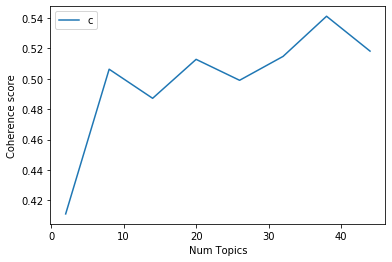

In [43]:
# Show graph
limit=50; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()